In [1]:
#CONDA ENV base_conda (python 3.9.7)
#Import packages
#---------------------------------------
import sys
import os
import glob
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np


#Import your modules
#---------------------------------------
import te_rna_f as ter
sys.path.insert(1, '/cndd3/dburrows/CODE/admin_tools/')
from admin_tools import admin_functions as adm


# Define paths
#----------------------------------------------------------------------
l_code = '/Users/dominicburrows/Dropbox/PhD/Analysis/my_scripts/GitHub/'
l_data = '/Users/dominicburrows/Dropbox/PhD/analysis/Project/'
l_fig = '/Users/dominicburrows/Dropbox/PhD/figures/'

s_code = '/cndd3/dburrows/CODE/'
s_data = '/cndd3/dburrows/DATA/'
s_fig = '/cndd3/dburrows/FIGS/'

%load_ext autoreload
sys.version

'3.9.7 | packaged by conda-forge | (default, Sep 29 2021, 19:23:11) \n[GCC 9.4.0]'

# Load metadata




In [173]:
id_rna = np.unique(np.asarray([i.split('_')[0] for i in meta['sample'].values]))
id_scz = np.unique(np.asarray([i.split('_')[0] for i in scz_meta[scz_meta['DNA_passQC'] == 'SCZ']['DNA_passQC'].index.unique()]))


(58, 14)

In [174]:
np.in1d()

array(['003', '012', '081', '103', '112', '140', '189', '226', '251',
       '263', '270', '302', '306', '323'], dtype='<U3')

In [74]:
# Metadata
meta = pd.read_csv('/cndd3/dburrows/DATA/te/metadata/PE/metadata_RNA_QC.tsv', index_col=0)
meta = meta[meta['RNA_passQC']]

ev_df = pd.read_csv('/cndd3/dburrows/DATA/annotations/rmsk/evolutionary_age.csv')

#Counts data
df = pd.read_csv('/cndd/dburrows/DATA/te/rna/PE.counts/DE/ATEM_CPM.csv', index_col=0)

In [4]:
#Filter low CPM data
thresh = 1 
ind = np.mean(df, axis=1) >thresh #indeces of ones to keep
sub_df = df.loc[ind]
#load in metadata
meta_ = meta

#load in metadata
meta_ = meta
INF = meta_[meta_['period'] == 'Infancy']# <2 infancy
ECH = meta_[meta_['period'] == 'Early_Childhood'] # 2-5 early childhood
LCH = meta_[meta_['period'] == 'Late_Childhood'] #5-12 late childhood
ADO = meta_[meta_['period'] == 'Adolescence'] #12-20 adolescence
ADU = meta_[meta_['period'] == 'Adulthood'] #20-50 adulthood
LADU = meta_[meta_['period'] == 'Late_Adulthood'] #50-80 late adulthood

# PE bulk data

In [83]:
#Load in PE data for each sample
mode='CPM'
ID_l = meta['sample'].values
parent_path = '/cndd/dburrows/DATA/te/rna/PE.counts/ATEM/'
te = ev_df['element'].values
dict = {'element':te}
for ID in ID_l:
    te_v = ter.load_ATEM_family(parent_path + '/Sample_' + ID + '/ATEM_counts.csv', te, mode)
    assert len(te) == len(te_v), 'Error: Not all TE elements were counted'
    #Add to dict
    dict[ID] = te_v
df = pd.DataFrame(dict)
#set first column to index
df.set_index('element', inplace=True)
#df = df.astype(int)

#write to csv
#df.to_csv('/cndd/dburrows/DATA/te/rna/PE.counts/DE/ATEM_' + mode + '.csv')

l1_ind = [x for x,i in enumerate(df.index) if 'L1' in i]#l1 ind
alu_ind = [x for x,i in enumerate(df.index) if 'Alu' in i]#alu ind
sva_ind = [x for x,i in enumerate(df.index) if 'SVA' in i]#sva ind

In [284]:
#Group by TET data
#====================================
mode='CPM'
ID_l = meta_['sample'].values
parent_path = '/cndd/dburrows/DATA/te/rna/PE.counts/TET/'
full_df = pd.DataFrame()
for ID in ID_l:
    ATEM_path = '/cndd/dburrows/DATA/te/rna/PE.counts/TET/Sample_' + ID + '/TEtranscripts_out.cntTable'
    count_mat = pd.read_csv(ATEM_path, sep="\t", header=0) 
    #normalise
    curr_ = count_mat.loc[np.asarray([x for x,i in enumerate(count_mat['gene/TE'].values) if 'L1' in i or 'Alu' in i or 'SVA' in i])]
    curr_['CPM'] = (curr_.iloc[:,1].values/ (sum(curr_.iloc[:,1].values)))*1e6
    curr_['Family'] = np.asarray([i.split(':')[1] for i in curr_['gene/TE'].values])
    curr_['Element'] = np.asarray([i.split(':')[0] for i in curr_['gene/TE'].values])
    curr_['Sample'] = np.full(len(curr_), ID)
    curr_['age'] = np.full(len(curr_), meta_[meta_['sample'] == ID]['age'].values[0])
    curr_['celltype'] = np.full(len(curr_), meta_[meta_['sample'] == ID]['celltype'].values[0])
    curr_['period'] = np.full(len(curr_), meta_[meta_['sample'] == ID]['period'].values[0])
    if ID == ID_l[0]: full_df = curr_
    else: full_df = pd.concat([full_df, curr_], axis=0)
full_df.reset_index()
full_df.to_csv('/cndd/dburrows/DATA/te/rna/PE.counts/DE/TET_counts.csv')

In [ ]:
# Save count data across all donors as dataframe for DESEQ
meta = pd.read_csv('/datasets/Public_Datasets/Dracheva_PsychEncode_development/processed/metadata_RNA_QC.tsv.gz', sep='\t') 
meta = meta[meta['RNA_passQC']]
ev_df = pd.read_csv('/cndd3/dburrows/DATA/te/gtf/annotations/rmsk/evolutionary_age.csv')
guide_df = pd.read_csv('/cndd/dburrows/DATA/te/rna/PE.counts/DE/ATEM_CPM.csv', index_col=0)

#Load in PE data for each sample
mode='Count'
ID_l = meta['sample'].values
parent_path = '/cndd/dburrows/DATA/te/rna/PE.counts/ATEM/'
te = ev_df['element'].values
dict = {'element':te}
for ID in ID_l:
    te_v = ter.load_ATEM_family(parent_path + '/Sample_' + ID + '/ATEM_counts.csv', te, mode)
    assert len(te) == len(te_v), 'Error: Not all TE elements were counted'
    #Add to dict
    dict[ID] = te_v
df = pd.DataFrame(dict)
#set first column to index
df.set_index('element', inplace=True)
df = df.astype(int)

#Filter based on low CPM data
thresh = 1 
ind = np.mean(guide_df, axis=1) >thresh #indeces of ones to keep
sub_df = df.loc[ind]

#write to csv
l1_df = sub_df[sub_df.index.str.contains('L1')]
alu_df = sub_df[sub_df.index.str.contains('Alu')]
sva_df = sub_df[sub_df.index.str.contains('SVA')]

coarse_df = pd.DataFrame()
coarse_df['L1'] = np.mean(l1_df,axis=0).astype(int)
coarse_df['Alu'] = np.mean(alu_df,axis=0).astype(int)
coarse_df['SVA'] = np.mean(sva_df,axis=0).astype(int)

coarse_df.T.to_csv('/cndd/dburrows/DATA/te/rna/PE.counts/DE/ATEM_coarse_sub-COUNT.csv')

In [90]:
l1_df

1105_GABA  1105_GLU  1133_GABA  1133_GLU  1134_GABA  1134_GLU  \
element                                                                  
L1PA6          837       784       1330      1517        925       986   
L1PA4         1758      1692       3056      2775       1980      2037   
L1PA7         1400      1191       2353      2023       1581      1394   
L1PA2          914       840       1558      1246       1004      1034   
L1PA5         1812      1383       2737      2308       2016      1703   
L1PA8A         195       247        282       548        227       364   
L1PA8          270       296        478       494        311       353   
L1PA10         306       248        323       399        214       302   
L1PA3         1714      1504       2863      2466       1935      1759   
L1HS          1278       915       3020      2567       1464      1613   

         1275_GABA  1275_GLU  1277_GABA  1277_GLU  ...  HCT15HBMA007_GLU  \
element                                            ...                     
L1PA6         1106       573        775       899  ...              1219   
L1PA4         2658      1664       1798      2007  ...              2826   
L1PA7         2108      1210       1419      1419  ...              1723   
L1PA2         1257       816        934      1013  ...              1252   
L1PA5         2149      1138       1753      1758  ...              2482   
L1PA8A         239       461        192       370  ...               886   
L1PA8          331       356        265       342  ...               379   
L1PA10         303       315        235       304  ...               269   
L1PA3         2162      1452       1692      1885  ...              2506   
L1HS          2185      1304       1475      1993  ...              1604   

         HCT15HBNA032_GLU  HCT16HCQA020_GABA  HCT16HCQA020_GLU  \
element                                                          
L1PA6                1707               1082              1055   
L1PA4                4282               2757              2769   
L1PA7                1985               1814              1370   
L1PA2                1958               1241              1216   
L1PA5                3403               2503              2279   
L1PA8A                800                501               779   
L1PA8                 587                292               331   
L1PA10                303                371               312   
L1PA3                3448               2344              2148   
L1HS                 2616               2063              1785   

         HCT17HEIA010_GABA  HCT17HEIA010_GLU  HCTYPA008_GABA  HCTYPA008_GLU  \
element                                                                       
L1PA6                 1129              1118            1233           1414   
L1PA4                 2746              2317            2998           3461   
L1PA7                 1892              1518            1891           1994   
L1PA2                 1208              1013            1212           1570   
L1PA5                 2522              1784            2818           2783   
L1PA8A                 386               575             350            917   
L1PA8                  370               347             358            536   
L1PA10                 446               364             372            413   
L1PA3                 2553              1973            2614           2706   
L1HS                  1607              1508            1597           1979   

         HCTZZNA014_GABA  HCTZZNA014_GLU  
element                                   
L1PA6               1135            1193  
L1PA4               2785            2570  
L1PA7               1802            1588  
L1PA2               1193            1107  
L1PA5               2617            2220  
L1PA8A               267             586  
L1PA8                396             468  
L1PA10               326             341  
L1PA3               2480           

In [66]:
# generate design matrix 
# only keep some columns in meta
dm = meta[['celltype', 'sex', 'age']]
age_ = dm['age'].values
new_age = (age_ - np.mean(age_))/np.std(age_)
dm['age'] = new_age
dm.index = meta['sample'].values
#dm.to_csv('/cndd/dburrows/DATA/te/rna/PE.counts/DE/ATEM_design.csv')

/tmp/ipykernel_1329011/3897204032.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dm['race'][dm['race'] !='White'] = 'Black'
/tmp/ipykernel_1329011/3897204032.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dm['AGEYEARS'] = new_age


In [89]:
# generate design matrix with categorical age
#load in metadata
meta = pd.read_csv('/cndd3/dburrows/DATA/te/metadata/PE/metadata_RNA_QC.tsv', index_col=0)
meta = meta[meta['RNA_passQC']]

# only keep some columns in meta
dm = meta[['celltype', 'sex', 'age', 'period']]
#dm['period'][dm['AGEYEARS'] < 3] = 'infancy'

dm.index = meta['sample'].values
dm.to_csv('/cndd/dburrows/DATA/te/rna/PE.counts/DE/ATEM_design_categorical.csv')

/tmp/ipykernel_1329011/2004765898.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dm['race'][dm['race'] !='White'] = 'Black'


In [6]:
#Generate dictionary of null distributions for all comparisons -> U statistics only
#=============
gene_mat = pd.read_csv('/datasets/Public_Datasets/Dracheva_PsychEncode_development/processed/rna_seq/allSamples_rsem_genes_results_TPM_mod.txt.gz', sep='\t', header=0, index_col=0)
#filter low tpm data
thresh = 1
ind = np.mean(gene_mat, axis=1) >thresh #indeces of ones to keep
sub_df = gene_mat.loc[ind]

#make into df with RNA, age, class, celltype
meta_ = meta[['celltype', 'sex', 'age', 'period']]
meta_['period'][meta_['age'] < 2] = 'Infancy'
curr_df = sub_df[meta['sample'].values]

group_df = {'period':[], 'celltype':[], 'Class':[], 'RNA':[]}

#make into df
group_df['RNA'] = np.ravel(curr_df)
group_df['Class'] = np.repeat(curr_df.index.values,len(curr_df.columns.values))
group_df['period'] = meta_['period'].tolist()*len(curr_df.index)
group_df['celltype'] = [i.split('_')[1] for i in curr_df.columns.values.tolist()*len(curr_df.index)]
group_df = pd.DataFrame(group_df)

class_l = group_df['Class'].unique()
cell_l = 'GLU', 'GABA'
period_l = 'Early_Childhood', 'Late_Childhood', 'Adolescence', 'Adulthood', 'Late_Adulthood'
comp_df = ter.inf_paired_comp(class_l, cell_l, period_l, group_df)
comp_df.to_csv('/cndd/dburrows/DATA/te/rna/PE.counts/DE/ATEM_null_test.csv', header=True, index=False)

<ipython-input-6-0f83102a6637>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  meta_['period'][meta_['age'] < 2] = 'Infancy'
<ipython-input-6-0f83102a6637>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  meta_['period'][meta_['age'] < 2] = 'Infancy'


### RNA-age: family-level analysis 

In [1043]:
df = pd.read_csv('/cndd/dburrows/DATA/te/rna/PE.counts/DE/ATEM_CPM.csv', index_col=0)
meta = pd.read_csv('/cndd3/dburrows/DATA/te/metadata/PE/metadata_RNA_QC.tsv', index_col=0)
meta = meta[meta['RNA_passQC']]

#Filter low CPM data
thresh = 1 
ind = np.mean(df, axis=1) >thresh #indeces of ones to keep
sub_df = df.loc[ind]
#load in metadata
meta_ = meta

#load in metadata
meta_ = meta
INF = meta_[meta_['period'] == 'Infancy']# <2 infancy
ECH = meta_[meta_['period'] == 'Early_Childhood'] # 2-5 early childhood
LCH = meta_[meta_['period'] == 'Late_Childhood'] #5-12 late childhood
ADO = meta_[meta_['period'] == 'Adolescence'] #12-20 adolescence
ADU = meta_[meta_['period'] == 'Adulthood'] #20-50 adulthood
LADU = meta_[meta_['period'] == 'Late_Adulthood'] #50-80 late adulthood

In [1045]:
#make into df with RNA, age, class, celltype
curr_df = sub_df
meta = meta
mode = 'coarse'

meta_ = meta[['celltype', 'sex', 'age', 'period']]
meta_['period'][meta_['age'] < 2] = 'Infancy'

if mode == 'coarse':
    group_df = {'period':[], 'celltype':[], 'Class':[], 'RNA':[]}
    l1_v = [np.mean(curr_df.iloc[[x for x,i in enumerate(curr_df.index) if 'L1' in i]][i])for i in meta['sample'].values]
    alu_v = [np.mean(curr_df.iloc[[x for x,i in enumerate(curr_df.index) if 'Alu' in i]][i])for i in meta['sample'].values]
    sva_v = [np.mean(curr_df.iloc[[x for x,i in enumerate(curr_df.index) if 'SVA' in i]][i])for i in meta['sample'].values]
    #make into df
    group_df['RNA'] = l1_v + alu_v + sva_v
    group_df['Class'] = ['L1']*len(l1_v) + ['Alu']*len(alu_v) + ['SVA']*len(sva_v)
    group_df['period'] = np.append(meta_['period'].values, np.append(meta_['period'].values, meta_['period'].values))
    group_df['celltype'] = np.append(meta_['celltype'].values, np.append(meta_['celltype'].values, meta_['celltype'].values))
    group_df = pd.DataFrame(group_df)
group_df

/tmp/ipykernel_2824607/2329280918.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  meta_['period'][meta_['age'] < 2] = 'Infancy'
/tmp/ipykernel_2824607/2329280918.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  meta_['period'][meta_['age'] < 2] = 'Infancy'


period celltype Class       RNA
0        Adolescence     GABA    L1  2.800439
1        Adolescence      GLU    L1  2.942757
2          Adulthood     GABA    L1  4.283278
3          Adulthood      GLU    L1  4.747331
4          Adulthood     GABA    L1  3.776852
..               ...      ...   ...       ...
331  Early_Childhood      GLU   SVA  2.837427
332   Late_Adulthood     GABA   SVA  5.064952
333   Late_Adulthood      GLU   SVA  5.552370
334        Adulthood     GABA   SVA  5.029634
335        Adulthood      GLU   SVA  5.816160

[336 rows x 4 columns]

In [1046]:
class_l = 'L1', 'Alu', 'SVA'
cell_l = 'GLU', 'GABA'
period_l = 'Early_Childhood', 'Late_Childhood', 'Adolescence', 'Adulthood', 'Late_Adulthood'

comp_df = ter.inf_paired_comp(class_l, cell_l, period_l, group_df,'coarse')
sig_df = comp_df[comp_df['padj_sig']==True]
sig_df

celltype Class               Comparison   p value  padj_sig  statistic
3       GLU    L1        infancy_Adulthood  0.001757      True  -3.636235
4       GLU    L1   infancy_Late_Adulthood  0.005379      True  -3.334434
5      GABA    L1  infancy_Early_Childhood  0.004720      True  -3.529399
7      GABA    L1      infancy_Adolescence  0.009078      True  -3.062562
8      GABA    L1        infancy_Adulthood  0.004006      True  -3.357157
9      GABA    L1   infancy_Late_Adulthood  0.000283      True  -4.914362
17     GABA   Alu      infancy_Adolescence  0.008339      True  -3.106647
18     GABA   Alu        infancy_Adulthood  0.005384      True  -3.216854
19     GABA   Alu   infancy_Late_Adulthood  0.000506      True  -4.591116
29     GABA   SVA   infancy_Late_Adulthood  0.002048      True  -3.839367

/home/dburrows/mambaforge/envs/base_conda/lib/python3.9/site-packages/seaborn/categorical.py:3002: UserWarning: The `split` parameter has been renamed to `dodge`.
  warnings.warn(msg, UserWarning)


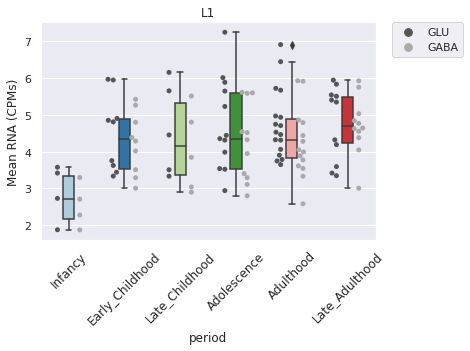

In [46]:
mod='L1'
plot_df = group_df[group_df['Class'] == mod]

#visualise each group with box plot seaborn
import seaborn as sns
sns.set_theme(style="darkgrid")
#sns.violinplot(data=plot_df, x="period", y="RNA", hue="Cell Type", split=True, hue_order=['GLU', 'GABA'], order=['infancy', 'earlychildhood', 'latechildhood', 'adolescence', 'adulthood', 'lateadulthood'], palette="Set1")
#show box plot
sns.boxplot(data=plot_df,x="period", y="RNA", width=0.2,order=['Infancy', 'Early_Childhood', 'Late_Childhood', 'Adolescence', 'Adulthood', 'Late_Adulthood'], palette='Paired')
sns.swarmplot(data=plot_df, x="period", y="RNA", hue="celltype", split=True, hue_order=['GLU', 'GABA'], order=['Infancy', 'Early_Childhood', 'Late_Childhood', 'Adolescence', 'Adulthood', 'Late_Adulthood'], palette='gray')
#move legend off plot
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xticks(rotation=45, fontsize=12)
plt.ylabel('Mean RNA (CPMs)', fontsize=12)
plt.title(mod)
#plt.savefig(s_fig + 'RNA_alu_boxplot.svg', bbox_inches='tight', dpi=300, transparent=False)
plt.show()

/home/dburrows/mambaforge/envs/base_conda/lib/python3.9/site-packages/seaborn/categorical.py:3002: UserWarning: The `split` parameter has been renamed to `dodge`.
  warnings.warn(msg, UserWarning)


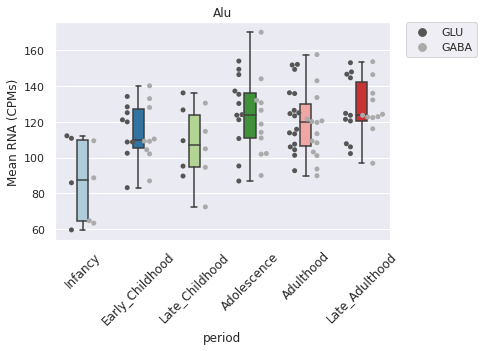

In [47]:
mod='Alu'
plot_df = group_df[group_df['Class'] == mod]

#visualise each group with box plot seaborn
import seaborn as sns
sns.set_theme(style="darkgrid")
#sns.violinplot(data=plot_df, x="period", y="RNA", hue="Cell Type", split=True, hue_order=['GLU', 'GABA'], order=['infancy', 'earlychildhood', 'latechildhood', 'adolescence', 'adulthood', 'lateadulthood'], palette="Set1")
#show box plot
sns.boxplot(data=plot_df,x="period", y="RNA", width=0.2,order=['Infancy', 'Early_Childhood', 'Late_Childhood', 'Adolescence', 'Adulthood', 'Late_Adulthood'], palette='Paired')
sns.swarmplot(data=plot_df, x="period", y="RNA", hue="celltype", split=True, hue_order=['GLU', 'GABA'], order=['Infancy', 'Early_Childhood', 'Late_Childhood', 'Adolescence', 'Adulthood', 'Late_Adulthood'], palette='gray')
#move legend off plot
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xticks(rotation=45, fontsize=12)
plt.ylabel('Mean RNA (CPMs)', fontsize=12)
plt.title(mod)
#plt.savefig(s_fig + 'RNA_alu_boxplot.svg', bbox_inches='tight', dpi=300, transparent=False)
plt.show()

/home/dburrows/mambaforge/envs/base_conda/lib/python3.9/site-packages/seaborn/categorical.py:3002: UserWarning: The `split` parameter has been renamed to `dodge`.
  warnings.warn(msg, UserWarning)


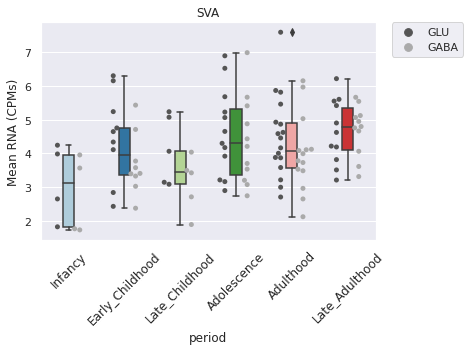

In [48]:
mod='SVA'
plot_df = group_df[group_df['Class'] == mod]

#visualise each group with box plot seaborn
import seaborn as sns
sns.set_theme(style="darkgrid")
#sns.violinplot(data=plot_df, x="period", y="RNA", hue="Cell Type", split=True, hue_order=['GLU', 'GABA'], order=['infancy', 'earlychildhood', 'latechildhood', 'adolescence', 'adulthood', 'lateadulthood'], palette="Set1")
#show box plot
sns.boxplot(data=plot_df,x="period", y="RNA", width=0.2,order=['Infancy', 'Early_Childhood', 'Late_Childhood', 'Adolescence', 'Adulthood', 'Late_Adulthood'], palette='Paired')
sns.swarmplot(data=plot_df, x="period", y="RNA", hue="celltype", split=True, hue_order=['GLU', 'GABA'], order=['Infancy', 'Early_Childhood', 'Late_Childhood', 'Adolescence', 'Adulthood', 'Late_Adulthood'], palette='gray')
#move legend off plot
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xticks(rotation=45, fontsize=12)
plt.ylabel('Mean RNA (CPMs)', fontsize=12)
plt.title(mod)
#plt.savefig(s_fig + 'RNA_alu_boxplot.svg', bbox_inches='tight', dpi=300, transparent=False)
plt.show()

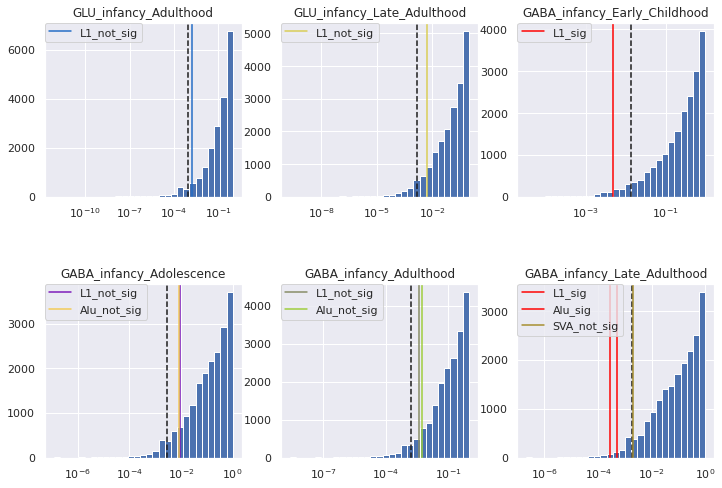

index celltype Class               Comparison   p value  padj_sig  \
0      3      GLU    L1        infancy_Adulthood  0.001757      True   
0      4      GLU    L1   infancy_Late_Adulthood  0.005379      True   
0      5     GABA    L1  infancy_Early_Childhood  0.004720      True   
0      7     GABA    L1      infancy_Adolescence  0.009078      True   
1     17     GABA   Alu      infancy_Adolescence  0.008339      True   
0      8     GABA    L1        infancy_Adulthood  0.004006      True   
1     18     GABA   Alu        infancy_Adulthood  0.005384      True   
0      9     GABA    L1   infancy_Late_Adulthood  0.000283      True   
1     19     GABA   Alu   infancy_Late_Adulthood  0.000506      True   
2     29     GABA   SVA   infancy_Late_Adulthood  0.002048      True   

   statistic                          comb baseline_sig  
0  -3.636235         GLU_infancy_Adulthood      not_sig  
0  -3.334434    GLU_infancy_Late_Adulthood      not_sig  
0  -3.529399  GABA_infancy_Early_Childhood          sig  
0  -3.062562      GABA_infancy_Adolescence      not_sig  
1  -3.106647      GABA_infancy_Adolescence      not_sig  
0  -3.357157        GABA_infancy_Adulthood      not_sig  
1  -3.216854        GABA_infancy_Adulthood      not_sig  
0  -4.914362   GABA_infancy_Late_Adulthood          sig  
1  -4.591116   GABA_infancy_Late_Adulthood          sig  
2  -3.839367   GABA_infancy_Late_Adulthood      not_sig

In [49]:
#Null model -> compare p values
#---------------------------------------
null_df = pd.read_csv('/cndd/dburrows/DATA/te/rna/PE.counts/DE/ATEM_null_test.csv')
final_df = ter.plot_null(null_df, sig_df, 12, 8)
final_df

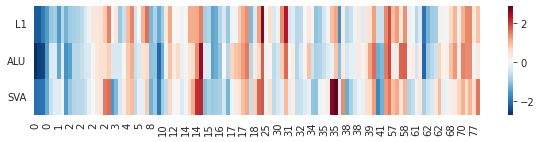

In [174]:
import seaborn as sns
#group for heatmap - GABA
data_l = l1_, alu_, sva_

name_l = ['L1', 'ALU', 'SVA']
heatm = np.zeros(((len(data_l),len(data_l[0][0]))))
for x,d in enumerate(data_l):
    curr = adm.sort_2list(d[1], d[0])
    z  = (curr[1] - np.mean(curr[1])) / (np.std(curr[1]))
    heatm[x,:] = z 

fig, ax = plt.subplots(figsize=(10,2))
sns.heatmap(heatm, cmap='RdBu_r', ax=ax)
ax.set_yticklabels(['L1', 'ALU', 'SVA'], rotation=0)
ax.set_xticklabels(curr[0][ 0::3])
#ax.set_title('LINE')
#ax.set_ylabel('Cell Type')
#plt.savefig('TE_heatmap.svg', dpi=300, bbox_inches='tight', pad_inches=0, transparent=True)
plt.show()

In [30]:
#TET all RNA - passive and active
full_df = pd.read_csv('/cndd/dburrows/DATA/te/rna/PE.counts/DE/TET_counts.csv', index_col=0)
full_df

gene/TE  \
60656          Alu:Alu:SINE   
60657        AluJb:Alu:SINE   
60658        AluJo:Alu:SINE   
60659       AluJr4:Alu:SINE   
60660        AluJr:Alu:SINE   
...                     ...   
61665  SVA_C:SVA:Retroposon   
61666  SVA_D:SVA:Retroposon   
61667  SVA_E:SVA:Retroposon   
61668  SVA_F:SVA:Retroposon   
61826       X9_LINE:L1:LINE   

       /cndd3/dburrows/DATA/te/rna/PE.bam/Sample_1105_GABA/Aligned.sortedByCoord.out.bam  \
60656                                             5542.0                                   
60657                                           519580.0                                   
60658                                           302991.0                                   
60659                                            83062.0                                   
60660                                           349730.0                                   
...                                                  ...                                   
61665                                                NaN                                   
61666                                                NaN                                   
61667                                                NaN                                   
61668                                                NaN                                   
61826                                                NaN                                   

                CPM Family  Element          Sample    age celltype  \
60656    597.596760    Alu      Alu       1105_GABA  16.93     GABA   
60657  56026.583243    Alu    AluJb       1105_GABA  16.93     GABA   
60658  32671.678054    Alu    AluJo       1105_GABA  16.93     GABA   
60659   8956.618918    Alu   AluJr4       1105_GABA  16.93     GABA   
60660  37711.568878    Alu    AluJr       1105_GABA  16.93     GABA   
...             ...    ...      ...             ...    ...      ...   
61665    219.630717    SVA    SVA_C  HCTZZNA014_GLU  39.19      GLU   
61666   1372.588966    SVA    SVA_D  HCTZZNA014_GLU  39.19      GLU   
61667    205.043611    SVA    SVA_E  HCTZZNA014_GLU  39.19      GLU   
61668    399.043877    SVA    SVA_F  HCTZZNA014_GLU  39.19      GLU   
61826    182.050377     L1  X9_LINE  HCTZZNA014_GLU  39.19      GLU   

            period  \
60656  Adolescence   
60657  Adolescence   
60658  Adolescence   
60659  Adolescence   
60660  Adolescence   
...            ...   
61665    Adulthood   
61666    Adulthood   
61667    Adulthood   
61668    Adulthood   
61826    Adulthood   

       /cndd3/dburrows/DATA/te/rna/PE.bam/Sample_1105_GLU/Aligned.sortedByCoord.out.bam  \
60656                                                NaN                                  
60657                                                NaN                                  
60658                                                NaN                                  
60659                                                NaN                                  
60660                                                NaN                                  
...                                                  ...                                  
61665                                                NaN                                  
61666                                                NaN                                  
61667                                                NaN                                  
61668                                                NaN                                  
61826                                                NaN                                  

       ...  \
60656  ...   
60657  ...   
60658  ...   
60659  ...   
60660  ...   
...    ...   
61665  ...   
61666  ...   
61667  ...   
61668  ...   
61826  ...   

       /cndd3/dburrows/DATA/te/rna/PE.bam/Sample_HCT15HBMA007_GLU/Aligned.sortedByCoord.out.bam  \
60656                                                NaN       

/home/dburrows/mambaforge/envs/base_conda/lib/python3.9/site-packages/seaborn/categorical.py:3002: UserWarning: The `split` parameter has been renamed to `dodge`.
  warnings.warn(msg, UserWarning)


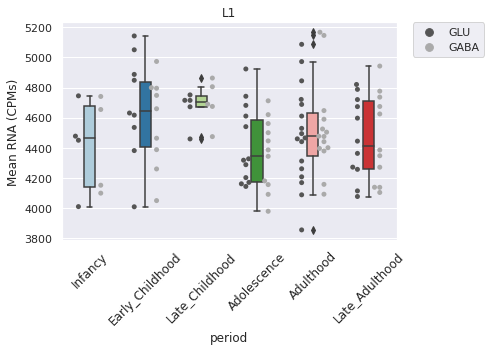

In [303]:
mod='L1'
group_df = full_df
plot_df = group_df[group_df['Family'] == mod]
plot_df = plot_df.groupby(['Sample', 'period', 'celltype']).mean()
plot_df.reset_index(inplace=True)

#visualise each group with box plot seaborn
import seaborn as sns
sns.set_theme(style="darkgrid")
#sns.violinplot(data=plot_df, x="period", y="RNA", hue="Cell Type", split=True, hue_order=['GLU', 'GABA'], order=['infancy', 'earlychildhood', 'latechildhood', 'adolescence', 'adulthood', 'lateadulthood'], palette="Set1")
#show box plot
sns.boxplot(data=plot_df,x="period", y="CPM", width=0.2,order=['Infancy', 'Early_Childhood', 'Late_Childhood', 'Adolescence', 'Adulthood', 'Late_Adulthood'], palette='Paired')
sns.swarmplot(data=plot_df, x="period", y="CPM", hue="celltype", split=True, hue_order=['GLU', 'GABA'], order=['Infancy', 'Early_Childhood', 'Late_Childhood', 'Adolescence', 'Adulthood', 'Late_Adulthood'], palette='gray')
#move legend off plot
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xticks(rotation=45, fontsize=12)
plt.ylabel('Mean RNA (CPMs)', fontsize=12)
plt.title(mod)
#plt.savefig(s_fig + 'RNA_alu_boxplot.svg', bbox_inches='tight', dpi=300, transparent=False)
plt.show()

/home/dburrows/mambaforge/envs/base_conda/lib/python3.9/site-packages/seaborn/categorical.py:3002: UserWarning: The `split` parameter has been renamed to `dodge`.
  warnings.warn(msg, UserWarning)


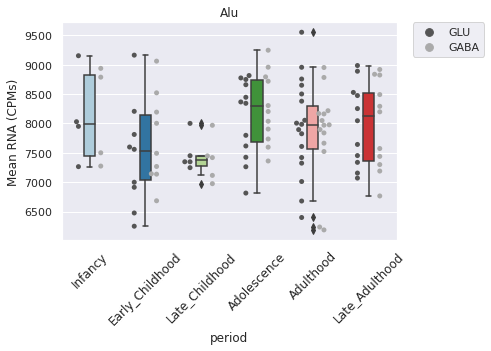

In [304]:
mod='Alu'
group_df = full_df
plot_df = group_df[group_df['Family'] == mod]
plot_df = plot_df.groupby(['Sample', 'period', 'celltype']).mean()
plot_df.reset_index(inplace=True)

#visualise each group with box plot seaborn
import seaborn as sns
sns.set_theme(style="darkgrid")
#sns.violinplot(data=plot_df, x="period", y="RNA", hue="Cell Type", split=True, hue_order=['GLU', 'GABA'], order=['infancy', 'earlychildhood', 'latechildhood', 'adolescence', 'adulthood', 'lateadulthood'], palette="Set1")
#show box plot
sns.boxplot(data=plot_df,x="period", y="CPM", width=0.2,order=['Infancy', 'Early_Childhood', 'Late_Childhood', 'Adolescence', 'Adulthood', 'Late_Adulthood'], palette='Paired')
sns.swarmplot(data=plot_df, x="period", y="CPM", hue="celltype", split=True, hue_order=['GLU', 'GABA'], order=['Infancy', 'Early_Childhood', 'Late_Childhood', 'Adolescence', 'Adulthood', 'Late_Adulthood'], palette='gray')
#move legend off plot
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xticks(rotation=45, fontsize=12)
plt.ylabel('Mean RNA (CPMs)', fontsize=12)
plt.title(mod)
#plt.savefig(s_fig + 'RNA_alu_boxplot.svg', bbox_inches='tight', dpi=300, transparent=False)
plt.show()

/home/dburrows/mambaforge/envs/base_conda/lib/python3.9/site-packages/seaborn/categorical.py:3002: UserWarning: The `split` parameter has been renamed to `dodge`.
  warnings.warn(msg, UserWarning)


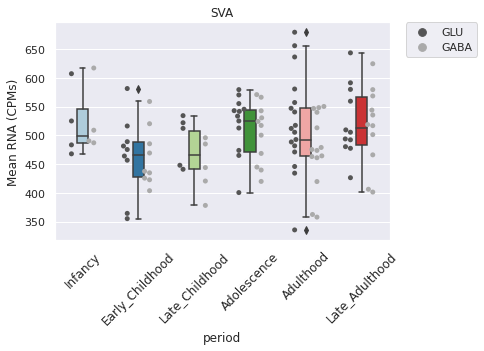

In [309]:
mod='SVA'
group_df = full_df
plot_df = group_df[group_df['Family'] == mod]
plot_df = plot_df.groupby(['Sample', 'period', 'celltype']).mean()
plot_df.reset_index(inplace=True)

#visualise each group with box plot seaborn
import seaborn as sns
sns.set_theme(style="darkgrid")
#sns.violinplot(data=plot_df, x="period", y="RNA", hue="Cell Type", split=True, hue_order=['GLU', 'GABA'], order=['infancy', 'earlychildhood', 'latechildhood', 'adolescence', 'adulthood', 'lateadulthood'], palette="Set1")
#show box plot
sns.boxplot(data=plot_df,x="period", y="CPM", width=0.2,order=['Infancy', 'Early_Childhood', 'Late_Childhood', 'Adolescence', 'Adulthood', 'Late_Adulthood'], palette='Paired')
sns.swarmplot(data=plot_df, x="period", y="CPM", hue="celltype", split=True, hue_order=['GLU', 'GABA'], order=['Infancy', 'Early_Childhood', 'Late_Childhood', 'Adolescence', 'Adulthood', 'Late_Adulthood'], palette='gray')
#move legend off plot
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xticks(rotation=45, fontsize=12)
plt.ylabel('Mean RNA (CPMs)', fontsize=12)
plt.title(mod)
#plt.savefig(s_fig + 'RNA_alu_boxplot.svg', bbox_inches='tight', dpi=300, transparent=False)
plt.show()

### RNA-age: element-level analysis

In [103]:
df = pd.read_csv('/cndd/dburrows/DATA/te/rna/PE.counts/DE/ATEM_CPM.csv', index_col=0)
meta = pd.read_csv('/cndd3/dburrows/DATA/te/metadata/PE/metadata_RNA_QC.tsv', index_col=0)
meta = meta[meta['RNA_passQC']]

#Filter low CPM data
thresh = 1 
ind = np.mean(df, axis=1) >thresh #indeces of ones to keep
sub_df = df.loc[ind]

#load in metadata
meta_ = meta
INF = meta_[meta_['period'] == 'Infancy']# <2 infancy
ECH = meta_[meta_['period'] == 'Early_Childhood'] # 2-5 early childhood
LCH = meta_[meta_['period'] == 'Late_Childhood'] #5-12 late childhood
ADO = meta_[meta_['period'] == 'Adolescence'] #12-20 adolescence
ADU = meta_[meta_['period'] == 'Adulthood'] #20-50 adulthood
LADU = meta_[meta_['period'] == 'Late_Adulthood'] #50-80 late adulthood

In [104]:
#make into df with RNA, age, class, celltype
curr_df = sub_df
meta = meta
mode = 'granular'
meta_ = meta[['celltype', 'sex', 'age', 'period']]
meta_['period'][meta_['age'] < 2] = 'Infancy'
if mode == 'granular':
    group_df = {'period':[], 'celltype':[], 'Class':[], 'Element':[], 'RNA':[]}
    l1_ind = [x for x,i in enumerate(curr_df.index) if 'L1' in i]#l1 ind
    alu_ind = [x for x,i in enumerate(curr_df.index) if 'Alu' in i]#alu ind
    sva_ind = [x for x,i in enumerate(curr_df.index) if 'SVA' in i]#sva ind

    l1_v = np.ravel([curr_df.iloc[l1_ind][i].values for i in meta['sample'].values])
    alu_v = np.ravel([curr_df.iloc[alu_ind][i].values for i in meta['sample'].values])
    sva_v = np.ravel([curr_df.iloc[sva_ind][i].values for i in meta['sample'].values])
    #make into df
    group_df['RNA'] = np.append(l1_v, np.append(alu_v, sva_v))
    group_df['Class'] = np.append(np.tile(curr_df.iloc[l1_ind].index.values, curr_df.shape[1]), 
                                  np.append(np.tile(curr_df.iloc[alu_ind].index.values,curr_df.shape[1]), np.tile(curr_df.iloc[sva_ind].index.values, curr_df.shape[1])))
    group_df['period'] = np.append(np.repeat(meta_['period'], len(l1_ind)).values,
                                  np.append(np.repeat(meta_['period'], len(alu_ind)).values, np.repeat(meta_['period'], len(sva_ind)).values))
    group_df['celltype'] = np.append(np.repeat(meta_['celltype'], len(l1_ind)).values,
                                  np.append(np.repeat(meta_['celltype'], len(alu_ind)).values, np.repeat(meta_['celltype'], len(sva_ind)).values))
    group_df['Element'] = np.append(np.repeat('L1', len(l1_v)),
                                  np.append(np.repeat('Alu', len(alu_v)), np.repeat('SVA', len(sva_v))))
    group_df = pd.DataFrame(group_df)
group_df

/tmp/ipykernel_2692139/4054676503.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  meta_['period'][meta_['age'] < 2] = 'Infancy'
/tmp/ipykernel_2692139/4054676503.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  meta_['period'][meta_['age'] < 2] = 'Infancy'


period celltype  Class Element       RNA
0     Adolescence     GABA  L1PA6      L1  2.235117
1     Adolescence     GABA  L1PA4      L1  4.696105
2     Adolescence     GABA  L1PA7      L1  3.738547
3     Adolescence     GABA  L1PA2      L1  2.440826
4     Adolescence     GABA  L1PA5      L1  4.840751
...           ...      ...    ...     ...       ...
6155    Adulthood      GLU  SVA_F     SVA  6.414233
6156    Adulthood      GLU  SVA_B     SVA  3.921906
6157    Adulthood      GLU  SVA_E     SVA  2.727751
6158    Adulthood      GLU  SVA_C     SVA  4.292978
6159    Adulthood      GLU  SVA_A     SVA  3.081015

[6160 rows x 5 columns]

In [45]:
group_df

gene/TE  \
60656          Alu:Alu:SINE   
60657        AluJb:Alu:SINE   
60658        AluJo:Alu:SINE   
60659       AluJr4:Alu:SINE   
60660        AluJr:Alu:SINE   
...                     ...   
61665  SVA_C:SVA:Retroposon   
61666  SVA_D:SVA:Retroposon   
61667  SVA_E:SVA:Retroposon   
61668  SVA_F:SVA:Retroposon   
61826       X9_LINE:L1:LINE   

       /cndd3/dburrows/DATA/te/rna/PE.bam/Sample_1105_GABA/Aligned.sortedByCoord.out.bam  \
60656                                             5542.0                                   
60657                                           519580.0                                   
60658                                           302991.0                                   
60659                                            83062.0                                   
60660                                           349730.0                                   
...                                                  ...                                   
61665                                                NaN                                   
61666                                                NaN                                   
61667                                                NaN                                   
61668                                                NaN                                   
61826                                                NaN                                   

                CPM Family  Element          Sample    age celltype  \
60656    597.596760    Alu      Alu       1105_GABA  16.93     GABA   
60657  56026.583243    Alu    AluJb       1105_GABA  16.93     GABA   
60658  32671.678054    Alu    AluJo       1105_GABA  16.93     GABA   
60659   8956.618918    Alu   AluJr4       1105_GABA  16.93     GABA   
60660  37711.568878    Alu    AluJr       1105_GABA  16.93     GABA   
...             ...    ...      ...             ...    ...      ...   
61665    219.630717    SVA    SVA_C  HCTZZNA014_GLU  39.19      GLU   
61666   1372.588966    SVA    SVA_D  HCTZZNA014_GLU  39.19      GLU   
61667    205.043611    SVA    SVA_E  HCTZZNA014_GLU  39.19      GLU   
61668    399.043877    SVA    SVA_F  HCTZZNA014_GLU  39.19      GLU   
61826    182.050377     L1  X9_LINE  HCTZZNA014_GLU  39.19      GLU   

            period  \
60656  Adolescence   
60657  Adolescence   
60658  Adolescence   
60659  Adolescence   
60660  Adolescence   
...            ...   
61665    Adulthood   
61666    Adulthood   
61667    Adulthood   
61668    Adulthood   
61826    Adulthood   

       /cndd3/dburrows/DATA/te/rna/PE.bam/Sample_1105_GLU/Aligned.sortedByCoord.out.bam  \
60656                                                NaN                                  
60657                                                NaN                                  
60658                                                NaN                                  
60659                                                NaN                                  
60660                                                NaN                                  
...                                                  ...                                  
61665                                                NaN                                  
61666                                                NaN                                  
61667                                                NaN                                  
61668                                                NaN                                  
61826                                                NaN                                  

       ...  \
60656  ...   
60657  ...   
60658  ...   
60659  ...   
60660  ...   
...    ...   
61665  ...   
61666  ...   
61667  ...   
61668  ...   
61826  ...   

       /cndd3/dburrows/DATA/te/rna/PE.bam/Sample_HCT15HBMA007_GLU/Aligned.sortedByCoord.out.bam  \
60656                                                NaN       

In [50]:
sub_df

Empty DataFrame
Columns: [gene/TE, /cndd3/dburrows/DATA/te/rna/PE.bam/Sample_1105_GABA/Aligned.sortedByCoord.out.bam, CPM, Family, Element, Sample, age, celltype, period, /cndd3/dburrows/DATA/te/rna/PE.bam/Sample_1105_GLU/Aligned.sortedByCoord.out.bam, /cndd3/dburrows/DATA/te/rna/PE.bam/Sample_1133_GABA/Aligned.sortedByCoord.out.bam, /cndd3/dburrows/DATA/te/rna/PE.bam/Sample_1133_GLU/Aligned.sortedByCoord.out.bam, /cndd3/dburrows/DATA/te/rna/PE.bam/Sample_1134_GABA/Aligned.sortedByCoord.out.bam, /cndd3/dburrows/DATA/te/rna/PE.bam/Sample_1134_GLU/Aligned.sortedByCoord.out.bam, /cndd3/dburrows/DATA/te/rna/PE.bam/Sample_1275_GABA/Aligned.sortedByCoord.out.bam, /cndd3/dburrows/DATA/te/rna/PE.bam/Sample_1275_GLU/Aligned.sortedByCoord.out.bam, /cndd3/dburrows/DATA/te/rna/PE.bam/Sample_1277_GABA/Aligned.sortedByCoord.out.bam, /cndd3/dburrows/DATA/te/rna/PE.bam/Sample_1277_GLU/Aligned.sortedByCoord.out.bam, /cndd3/dburrows/DATA/te/rna/PE.bam/Sample_1535_GLU/Aligned.sortedByCoord.out.bam, /cndd3/dburrows/DATA/te/rna/PE.bam/Sample_1539_GABA/Aligned.sortedByCoord.out.bam, /cndd3/dburrows/DATA/te/rna/PE.bam/Sample_1539_GLU/Aligned.sortedByCoord.out.bam, /cndd3/dburrows/DATA/te/rna/PE.bam/Sample_1648_GABA/Aligned.sortedByCoord.out.bam, /cndd3/dburrows/DATA/te/rna/PE.bam/Sample_1648_GLU/Aligned.sortedByCoord.out.bam, /cndd3/dburrows/DATA/te/rna/PE.bam/Sample_1241_GABA/Aligned.sortedByCoord.out.bam, /cndd3/dburrows/DATA/te/rna/PE.bam/Sample_1241_GLU/Aligned.sortedByCoord.out.bam, /cndd3/dburrows/DATA/te/rna/PE.bam/Sample_179134-1401_GABA/Aligned.sortedByCoord.out.bam, /cndd3/dburrows/DATA/te/rna/PE.bam/Sample_179134-1401_GLU/Aligned.sortedByCoord.out.bam, /cndd3/dburrows/DATA/te/rna/PE.bam/Sample_1823_GABA/Aligned.sortedByCoord.out.bam, /cndd3/dburrows/DATA/te/rna/PE.bam/Sample_1823_GLU/Aligned.sortedByCoord.out.bam, /cndd3/dburrows/DATA/te/rna/PE.bam/Sample_1848_GABA/Aligned.sortedByCoord.out.bam, /cndd3/dburrows/DATA/te/rna/PE.bam/Sample_1848_GLU/Aligned.sortedByCoord.out.bam, /cndd3/dburrows/DATA/te/rna/PE.bam/Sample_198034-1435_GABA/Aligned.sortedByCoord.out.bam, /cndd3/dburrows/DATA/te/rna/PE.bam/Sample_198034-1435_GLU/Aligned.sortedByCoord.out.bam, /cndd3/dburrows/DATA/te/rna/PE.bam/Sample_198035-1765_GLU/Aligned.sortedByCoord.out.bam, /cndd3/dburrows/DATA/te/rna/PE.bam/Sample_4321_GABA/Aligned.sortedByCoord.out.bam, /cndd3/dburrows/DATA/te/rna/PE.bam/Sample_4321_GLU/Aligned.sortedByCoord.out.bam, /cndd3/dburrows/DATA/te/rna/PE.bam/Sample_4332_GABA/Aligned.sortedByCoord.out.bam, /cndd3/dburrows/DATA/te/rna/PE.bam/Sample_4332_GLU/Aligned.sortedByCoord.out.bam, /cndd3/dburrows/DATA/te/rna/PE.bam/Sample_4337_GABA/Aligned.sortedByCoord.out.bam, /cndd3/dburrows/DATA/te/rna/PE.bam/Sample_4337_GLU/Aligned.sortedByCoord.out.bam, /cndd3/dburrows/DATA/te/rna/PE.bam/Sample_4369_GABA/Aligned.sortedByCoord.out.bam, /cndd3/dburrows/DATA/te/rna/PE.bam/Sample_4369_GLU/Aligned.sortedByCoord.out.bam, /cndd3/dburrows/DATA/te/rna/PE.bam/Sample_4379_GABA/Aligned.sortedByCoord.out.bam, /cndd3/dburrows/DATA/te/rna/PE.bam/Sample_4379_GLU/Aligned.sortedByCoord.out.bam, /cndd3/dburrows/DATA/te/rna/PE.bam/Sample_4411_GABA/Aligned.sortedByCoord.out.bam, /cndd3/dburrows/DATA/te/rna/PE.bam/Sample_4411_GLU/Aligned.sortedByCoord.out.bam, /cndd3/dburrows/DATA/te/rna/PE.bam/Sample_4414_GABA/Aligned.sortedByCoord.out.bam, /cndd3/dburrows/DATA/te/rna/PE.bam/Sample_4414_GLU/Aligned.sortedByCoord.out.bam, /cndd3/dburrows/DATA/te/rna/PE.bam/Sample_4425_GABA/Aligned.sortedByCoord.out.bam, /cndd3/dburrows/DATA/te/rna/PE.bam/Sample_4425_GLU/Aligned.sortedByCoord.out.bam, /cndd3/dburrows/DATA/te/rna/PE.bam/Sample_4428_GABA/Aligned.sortedByCoord.out.bam, /cndd3/dburrows/DATA/te/rna/PE.bam/Sample_4428_GLU/Aligned.sortedByCoord.out.bam, /cndd3/dburrows/DATA/te/rna/PE.bam/Sample_4545_GABA/Aligned.sortedByCoord.out.bam, /cndd3/dburrows/DATA/te/rna/PE.bam/Sample_4545_GLU/Aligned.sortedByCoord.out.bam, /cndd3/dburrows/DATA/te/rna/PE.bam/Sample_4725_GABA/Aligned.sortedByCoord.out.bam, 

In [53]:
group_df

gene/TE  \
60656          Alu:Alu:SINE   
60657        AluJb:Alu:SINE   
60658        AluJo:Alu:SINE   
60659       AluJr4:Alu:SINE   
60660        AluJr:Alu:SINE   
...                     ...   
61665  SVA_C:SVA:Retroposon   
61666  SVA_D:SVA:Retroposon   
61667  SVA_E:SVA:Retroposon   
61668  SVA_F:SVA:Retroposon   
61826       X9_LINE:L1:LINE   

       /cndd3/dburrows/DATA/te/rna/PE.bam/Sample_1105_GABA/Aligned.sortedByCoord.out.bam  \
60656                                             5542.0                                   
60657                                           519580.0                                   
60658                                           302991.0                                   
60659                                            83062.0                                   
60660                                           349730.0                                   
...                                                  ...                                   
61665                                                NaN                                   
61666                                                NaN                                   
61667                                                NaN                                   
61668                                                NaN                                   
61826                                                NaN                                   

                CPM Family  Element          Sample    age celltype  \
60656    597.596760    Alu      Alu       1105_GABA  16.93     GABA   
60657  56026.583243    Alu    AluJb       1105_GABA  16.93     GABA   
60658  32671.678054    Alu    AluJo       1105_GABA  16.93     GABA   
60659   8956.618918    Alu   AluJr4       1105_GABA  16.93     GABA   
60660  37711.568878    Alu    AluJr       1105_GABA  16.93     GABA   
...             ...    ...      ...             ...    ...      ...   
61665    219.630717    SVA    SVA_C  HCTZZNA014_GLU  39.19      GLU   
61666   1372.588966    SVA    SVA_D  HCTZZNA014_GLU  39.19      GLU   
61667    205.043611    SVA    SVA_E  HCTZZNA014_GLU  39.19      GLU   
61668    399.043877    SVA    SVA_F  HCTZZNA014_GLU  39.19      GLU   
61826    182.050377     L1  X9_LINE  HCTZZNA014_GLU  39.19      GLU   

            period  \
60656  Adolescence   
60657  Adolescence   
60658  Adolescence   
60659  Adolescence   
60660  Adolescence   
...            ...   
61665    Adulthood   
61666    Adulthood   
61667    Adulthood   
61668    Adulthood   
61826    Adulthood   

       /cndd3/dburrows/DATA/te/rna/PE.bam/Sample_1105_GLU/Aligned.sortedByCoord.out.bam  \
60656                                                NaN                                  
60657                                                NaN                                  
60658                                                NaN                                  
60659                                                NaN                                  
60660                                                NaN                                  
...                                                  ...                                  
61665                                                NaN                                  
61666                                                NaN                                  
61667                                                NaN                                  
61668                                                NaN                                  
61826                                                NaN                                  

       ...  \
60656  ...   
60657  ...   
60658  ...   
60659  ...   
60660  ...   
...    ...   
61665  ...   
61666  ...   
61667  ...   
61668  ...   
61826  ...   

       /cndd3/dburrows/DATA/te/rna/PE.bam/Sample_HCT15HBMA007_GLU/Aligned.sortedByCoord.out.bam  \
60656                                                NaN       

In [82]:
curr_df

1105_GABA    1105_GLU   1133_GABA    1133_GLU   1134_GABA  \
element                                                                
L1PA6       2.235117    2.534184    3.165705    4.407509    2.997835   
L1PA4       4.696105    5.471769    7.271643    8.061313    6.415141   
L1PA7       3.738547    3.851378    5.598574    5.875711    5.121100   
L1PA2       2.440826    2.717891    3.708034    3.619289    3.253566   
L1PA5       4.840751    4.471671    6.512239    6.703481    6.531751   
L1PA8A      0.520726    0.798397    0.670972    1.591641    0.735288   
L1PA8       0.721006    0.958400    1.137322    1.434800    1.007376   
L1PA10      0.817140    0.801630    0.768525    1.158877    0.693179   
L1PA3       4.579008    4.861927    6.813502    7.164079    6.270729   
L1HS        3.415163    2.960319    7.186265    7.456606    4.742551   
AluSp     160.783104  169.152316  202.676461  218.970055  151.937715   
AluJo     230.069277  241.417602  277.051915  316.642269  228.169576   
AluJr     266.463236  279.091021  324.276171  365.760888  276.102908   
AluSx     338.095131  358.753410  423.651037  465.055825  325.452204   
AluSz6    155.881838  167.327799  197.253261  221.511760  157.022548   
AluYj4      6.898065    6.733581    8.748377    8.464354    6.494176   
AluSc     106.791716  115.099170  135.443891  149.266281  108.291720   
AluSz     344.991958  370.014356  437.975527  485.552213  349.132338   
AluSc5     21.506062   22.443259   28.060683   29.863967   21.596184   
AluY      310.991800  327.515276  398.991908  428.458039  304.773509   
AluSg4     19.908590   21.510988   25.608739   27.702748   19.583375   
AluSx3     78.695188   83.257965   99.511182  110.205966   78.278845   
AluSq      59.609720   63.638457   76.617889   83.133063   59.329230   
AluJb     445.850665  466.561220  554.604692  620.337048  457.655914   
AluSq2    183.137137  195.301940  237.146694  261.419632  182.470686   
FLAM_C      1.700594    1.506288    1.828519    1.674418    1.459238   
AluSg     119.064001  129.448640  148.562987  164.084666  116.824029   
AluJr4     65.711286   68.495966   81.322882   92.558425   76.113168   
AluSg7     25.489192   26.213918   31.774592   33.887686   25.338700   
AluSx1    357.295882  383.968949  451.693893  495.274417  353.358309   
AluYh3      4.075709    3.941346    4.920053    5.138222    3.505842   
AluYc       7.893119    8.628836    9.941772   11.565855    7.439716   
AluYf1      6.915289    6.093463    8.197839    8.032583    6.159464   
AluSc8     59.893609   63.543664   76.862595   83.533604   60.034425   
AluYa5     23.675473   27.112013   35.100489   40.450578   23.202425   
AluSx4     31.465615   34.207713   39.423276   44.293192   31.907786   
AluYe5      4.847074    5.670021    6.275359    7.244823    4.177280   
AluSq4      5.954304    5.898820    7.513106    7.933614    5.760832   
AluYh3a3    1.075996    1.251199    1.142358    1.424635    1.015204   
AluYk3      2.943260    3.069951    3.979715    4.203140    3.066775   
AluYi6      2.103359    1.380360    3.043073    2.957509    1.304137   
AluYk2      1.571280    1.747316    2.396132    2.467818    1.604838   
AluYm1     12.936508   14.192939   16.281113   18.983659   12.759938   
AluYc3      1.659584    1.889325    2.549536    2.548175    1.516301   
AluYg6      4.022143    3.198222    6.097980    6.337858    3.177608   
AluYb8     24.636943   23.194895   35.788677   33.014905   21.804353   
AluSq10     3.530950    3.699564    4.363343    4.825509    3.446728   
AluYk4      3.031453    2.982946    4.229117    4.250863    2.873506   
AluYd8      3.130788    4.138517    4.214079    4.841508    2.526238   
AluYb9      4.753912    3.768683    7.397669    5.640333    6.961100   
SVA_D       8.240826    8.444586    9.798992   11.349397    5.690111   
SVA_F       3.258322    3.399922    4.234323    4.664312    1.857924   
SVA_B       1.873947    1.946161    2.374179    2.805703    1.423877   
SVA_E       1.642735    1.571474    1.984365    1.7

In [91]:
%autoreload
element = 'L1'
class_l = group_df[group_df['Element'] == element]['Class'].unique()
cell_l = 'GLU', 'GABA'
period_l = 'Early_Childhood', 'Late_Childhood', 'Adolescence', 'Adulthood', 'Late_Adulthood'
sub_df = group_df[group_df['Element'] == element]
comp_df = ter.inf_paired_comp(class_l, cell_l, period_l, sub_df, 'granular')
l1_df = comp_df
sig_df = comp_df[comp_df['padj_sig']==True]
sig_df

celltype  Class               Comparison   p value  padj_sig  statistic  \
19     GABA  L1PA4   infancy_Late_Adulthood  0.000735      True  -4.387085   
33      GLU  L1PA2        infancy_Adulthood  0.000334      True   0.000000   
39     GABA  L1PA2   infancy_Late_Adulthood  0.000224      True  -5.047268   
49     GABA  L1PA5   infancy_Late_Adulthood  0.000395      True  -4.727625   
83      GLU  L1PA3        infancy_Adulthood  0.000334      True   0.000000   
93      GLU   L1HS        infancy_Adulthood  0.000275      True  -4.448797   
95     GABA   L1HS  infancy_Early_Childhood  0.000413      True  -4.984170   
98     GABA   L1HS        infancy_Adulthood  0.000502      True  -4.344797   

    effect_size      l2fc  
19    -2.987927  0.924057  
33    -2.465727  0.639244  
39    -3.600907  0.901231  
49    -3.241269  0.973488  
83    -2.013573  0.674321  
93    -2.979665  0.905897  
95    -3.509883  1.009230  
98    -2.930900  0.910595

/home/dburrows/mambaforge/envs/base_conda/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 9.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/dburrows/mambaforge/envs/base_conda/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 11.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


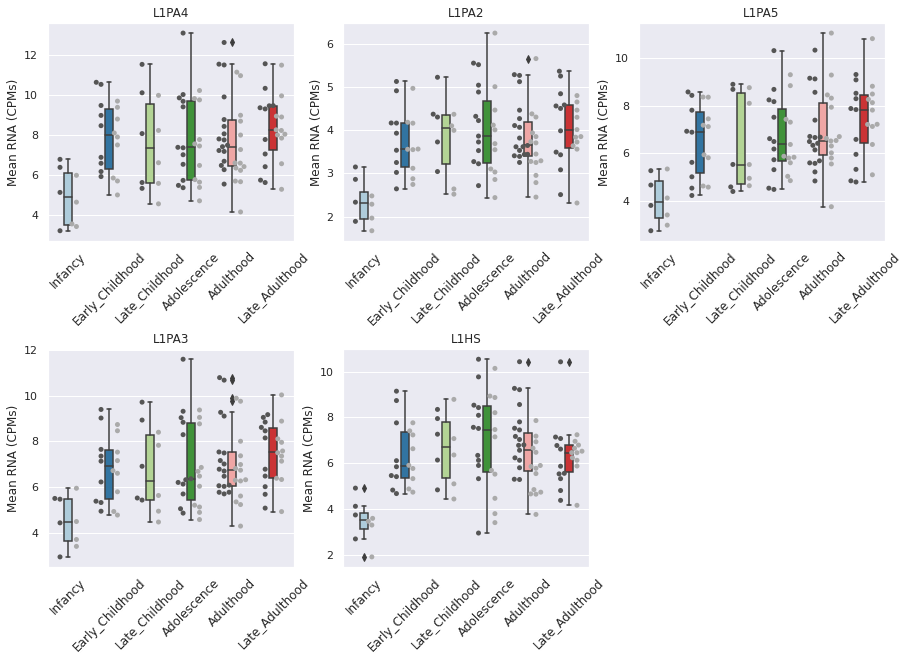

In [8]:
plot_l = sig_df['Class'].unique()
import seaborn as sns
import math
sns.set_theme(style="darkgrid")

fig, axs = plt.subplots(figsize=(15,10))
plt.subplots_adjust(hspace=0.5)
for x,p in enumerate(plot_l):
    ax = plt.subplot(int(math.ceil(len(plot_l)/3)), 3, x + 1)

    plot_df = group_df[group_df['Class'] == p]
    sns.boxplot(data=plot_df,x="period", y="RNA", width=0.2,order=['Infancy', 'Early_Childhood', 'Late_Childhood', 'Adolescence', 'Adulthood', 'Late_Adulthood'], palette='Paired')
    sns.swarmplot(data=plot_df, x="period", y="RNA", hue="celltype", dodge=True, hue_order=['GLU', 'GABA'], order=['Infancy', 'Early_Childhood', 'Late_Childhood', 'Adolescence', 'Adulthood', 'Late_Adulthood'], palette='gray')
    #remove legend
    ax.get_legend().remove()
    #rotate x ticks
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, fontsize=12)
    #set title
    ax.set_title(p, fontsize=12)
    #change y label
    ax.set_ylabel('Mean RNA (CPMs)', fontsize=12)
    #remove x label
    ax.set_xlabel('')
    #remove x tick labels
    #if x == 0 or x == 1 or x == 2: ax.set_xticklabels([])
#plt.savefig(s_fig + 'RNA_l1_multi_boxplot.svg', bbox_inches='tight', dpi=300, transparent=False)
plt.show()


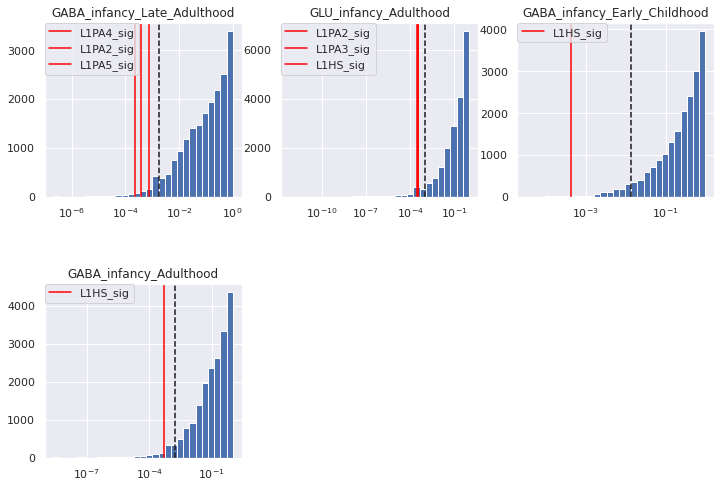

index celltype  Class               Comparison   p value  padj_sig  \
0     19     GABA  L1PA4   infancy_Late_Adulthood  0.000735      True   
1     39     GABA  L1PA2   infancy_Late_Adulthood  0.000224      True   
2     49     GABA  L1PA5   infancy_Late_Adulthood  0.000395      True   
0     33      GLU  L1PA2        infancy_Adulthood  0.000334      True   
1     83      GLU  L1PA3        infancy_Adulthood  0.000334      True   
2     93      GLU   L1HS        infancy_Adulthood  0.000275      True   
0     95     GABA   L1HS  infancy_Early_Childhood  0.000413      True   
0     98     GABA   L1HS        infancy_Adulthood  0.000502      True   

   statistic                          comb baseline_sig  
0  -4.387085   GABA_infancy_Late_Adulthood          sig  
1  -5.047268   GABA_infancy_Late_Adulthood          sig  
2  -4.727625   GABA_infancy_Late_Adulthood          sig  
0   0.000000         GLU_infancy_Adulthood          sig  
1   0.000000         GLU_infancy_Adulthood          sig  
2  -4.448797         GLU_infancy_Adulthood          sig  
0  -4.984170  GABA_infancy_Early_Childhood          sig  
0  -4.344797        GABA_infancy_Adulthood          sig

In [314]:
#Null model -> compare p values
#---------------------------------------
null_df = pd.read_csv('/cndd/dburrows/DATA/te/rna/PE.counts/DE/ATEM_null_test.csv')
final_df = ter.plot_null(null_df, sig_df, 12, 8)
final_df

In [319]:
sig_df = final_df[final_df['baseline_sig'] == 'sig']
sig_df

index celltype  Class               Comparison   p value  padj_sig  \
0     19     GABA  L1PA4   infancy_Late_Adulthood  0.000735      True   
1     39     GABA  L1PA2   infancy_Late_Adulthood  0.000224      True   
2     49     GABA  L1PA5   infancy_Late_Adulthood  0.000395      True   
0     33      GLU  L1PA2        infancy_Adulthood  0.000334      True   
1     83      GLU  L1PA3        infancy_Adulthood  0.000334      True   
2     93      GLU   L1HS        infancy_Adulthood  0.000275      True   
0     95     GABA   L1HS  infancy_Early_Childhood  0.000413      True   
0     98     GABA   L1HS        infancy_Adulthood  0.000502      True   

   statistic                          comb baseline_sig  
0  -4.387085   GABA_infancy_Late_Adulthood          sig  
1  -5.047268   GABA_infancy_Late_Adulthood          sig  
2  -4.727625   GABA_infancy_Late_Adulthood          sig  
0   0.000000         GLU_infancy_Adulthood          sig  
1   0.000000         GLU_infancy_Adulthood          sig  
2  -4.448797         GLU_infancy_Adulthood          sig  
0  -4.984170  GABA_infancy_Early_Childhood          sig  
0  -4.344797        GABA_infancy_Adulthood          sig

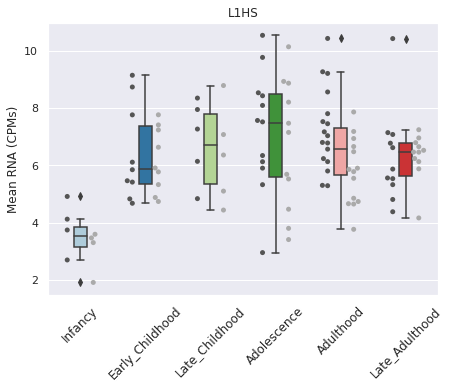

In [10]:
#Show L1HS
p = 'L1HS'
import seaborn as sns
import math
sns.set_theme(style="darkgrid")

fig, ax = plt.subplots(figsize=(7,5))
plt.subplots_adjust(hspace=0.5)

plot_df = group_df[group_df['Class'] == p]
sns.boxplot(data=plot_df,x="period", y="RNA", width=0.2,order=['Infancy', 'Early_Childhood', 'Late_Childhood', 'Adolescence', 'Adulthood', 'Late_Adulthood'], palette='Paired')
sns.swarmplot(data=plot_df, x="period", y="RNA", hue="celltype", dodge=True, hue_order=['GLU', 'GABA'], order=['Infancy', 'Early_Childhood', 'Late_Childhood', 'Adolescence', 'Adulthood', 'Late_Adulthood'], palette='gray')
#remove legend
ax.get_legend().remove()
#rotate x ticks
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, fontsize=12)
#set title
ax.set_title(p, fontsize=12)
#change y label
ax.set_ylabel('Mean RNA (CPMs)', fontsize=12)
#remove x label
ax.set_xlabel('')
#remove x tick labels
#if x == 0 or x == 1 or x == 2: ax.set_xticklabels([])
plt.savefig(s_code + 'prac.svg', bbox_inches='tight', dpi=300, transparent=False)
plt.show()


In [14]:
# Infancy vs adulthood contrast

#what percentile of genes -> 
null_df = pd.read_csv('/cndd/dburrows/DATA/te/rna/PE.counts/DE/ATEM_null_test.csv')
null_df

celltype               Class               Comparison   p value  \
0           GLU  ENSG00000000419.13  infancy_Early_Childhood  0.954787   
1           GLU  ENSG00000000419.13   infancy_Late_Childhood  0.244319   
2           GLU  ENSG00000000419.13      infancy_Adolescence  0.724839   
3           GLU  ENSG00000000419.13        infancy_Adulthood  0.520757   
4           GLU  ENSG00000000419.13   infancy_Late_Adulthood  0.847815   
...         ...                 ...                      ...       ...   
193025     GABA   ENSG00000288698.1  infancy_Early_Childhood  0.198601   
193026     GABA   ENSG00000288698.1   infancy_Late_Childhood  0.109855   
193027     GABA   ENSG00000288698.1      infancy_Adolescence  0.743904   
193028     GABA   ENSG00000288698.1        infancy_Adulthood  0.720915   
193029     GABA   ENSG00000288698.1   infancy_Late_Adulthood  0.851282   

        padj_sig  statistic  
0          False  -0.058002  
1          False  -1.271044  
2          False  -0.359153  
3          False  -0.654306  
4          False  -0.195773  
...          ...        ...  
193025     False  27.000000  
193026     False  17.000000  
193027     False  25.000000  
193028     False  32.000000  
193029     False  20.000000  

[193030 rows x 6 columns]

In [15]:
curr_df = null_df[(null_df['Comparison']=='infancy_Adulthood') & (null_df['statistic'] < 0)]
sub_df = sig_df[(sig_df['Class'] == 'L1HS') & (sig_df['Comparison'] == 'infancy_Adulthood')]
sub_df.reset_index(inplace=True)
curr_df

celltype               Class         Comparison   p value  padj_sig  \
3           GLU  ENSG00000000419.13  infancy_Adulthood  0.520757     False   
8          GABA  ENSG00000000419.13  infancy_Adulthood  0.176389     False   
13          GLU  ENSG00000000457.14  infancy_Adulthood  0.642063     False   
18         GABA  ENSG00000000457.14  infancy_Adulthood  0.801629     False   
23          GLU  ENSG00000000460.17  infancy_Adulthood  0.354267     False   
...         ...                 ...                ...       ...       ...   
192983      GLU   ENSG00000288683.1  infancy_Adulthood  0.144960     False   
192988     GABA   ENSG00000288683.1  infancy_Adulthood  0.928008     False   
192993      GLU   ENSG00000288684.1  infancy_Adulthood  0.152240     False   
192998     GABA   ENSG00000288684.1  infancy_Adulthood  0.061822     False   
193018     GABA   ENSG00000288695.1  infancy_Adulthood  0.881794     False   

        statistic  
3       -0.654306  
8       -1.414470  
13      -0.472341  
18      -0.255452  
23      -0.949543  
...           ...  
192983  -1.520071  
192988  -0.091785  
192993  -1.491528  
192998  -2.008111  
193018  -0.151089  

[17414 rows x 6 columns]

In [16]:
curr_data = curr_df['p value'].values
#drop nan
curr_data = curr_data[~np.isnan(curr_data)]
for i in range(len(sub_df)):
    comp_perc = lambda prac, curr_data: np.round(np.sum(prac < np.sort(curr_data)) / len(curr_data) * 100, 2)
    out = comp_perc(sub_df.loc[i]['p value'], curr_data)
    print(out)

99.43
99.09


In [17]:
#Compare L1HS to known developmentally upregulated genes
import mygene
mg = mygene.MyGeneInfo()
curr_df['unique_symbol'] = [i.split('.')[0] for i in curr_df['Class'].values]
curr_df = curr_df.reset_index()
ginfo = mg.querymany(np.unique(curr_df['unique_symbol'].values), scopes='ensembl.gene', returnall=False)
map_df = pd.DataFrame(ginfo)
map_df = map_df.set_index('query')

#add in gene name
gene_v=[]
for i in range(len(curr_df)):
    curr = map_df.loc[curr_df['unique_symbol'][i]]['symbol']
    if type(curr) != str and type(curr) != pd.core.series.Series and np.isnan(curr)==False:
        print(curr)
        break
    if type(curr) == pd.core.series.Series:
        gene_v = np.append(gene_v, curr[-1])
    elif type(curr) == str:
        gene_v = np.append(gene_v, curr)
    else: gene_v = np.append(gene_v, 'nan')
curr_df['gene'] = gene_v

/tmp/ipykernel_2692139/407009082.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  curr_df['unique_symbol'] = [i.split('.')[0] for i in curr_df['Class'].values]
INFO:biothings.client:querying 1-1000...
INFO:biothings.client:done.
INFO:biothings.client:querying 1001-2000...
INFO:biothings.client:done.
INFO:biothings.client:querying 2001-3000...
INFO:biothings.client:done.
INFO:biothings.client:querying 3001-4000...
INFO:biothings.client:done.
INFO:biothings.client:querying 4001-5000...
INFO:biothings.client:done.
INFO:biothings.client:querying 5001-6000...
INFO:biothings.client:done.
INFO:biothings.client:querying 6001-7000...
INFO:biothings.client:done.
INFO:biothings.client:querying 7001-8000...
INFO:biothings.client:done.
INFO:biothings.clien

In [18]:
sort_ = curr_df.sort_values(by=['p value'])[:20]
sort_

index celltype               Class         Comparison   p value  \
11524  126993      GLU  ENSG00000204653.10  infancy_Adulthood  0.000005   
6557    71598     GABA  ENSG00000151136.15  infancy_Adulthood  0.000007   
9137    99358     GABA  ENSG00000173227.14  infancy_Adulthood  0.000009   
7743    84303      GLU   ENSG00000163833.8  infancy_Adulthood  0.000017   
1688    18278     GABA  ENSG00000100307.13  infancy_Adulthood  0.000020   
8250    89768     GABA  ENSG00000166793.13  infancy_Adulthood  0.000020   
1637    17713      GLU  ENSG00000100092.24  infancy_Adulthood  0.000020   
2138    23013      GLU  ENSG00000103888.17  infancy_Adulthood  0.000021   
2058    22283      GLU  ENSG00000103184.12  infancy_Adulthood  0.000021   
13347  148218     GABA   ENSG00000237172.4  infancy_Adulthood  0.000022   
17329  192153      GLU   ENSG00000287759.1  infancy_Adulthood  0.000022   
9292   101278     GABA  ENSG00000174945.13  infancy_Adulthood  0.000024   
11486  126593      GLU  ENSG00000204396.11  infancy_Adulthood  0.000025   
10375  113678     GABA  ENSG00000185745.10  infancy_Adulthood  0.000036   
2107    22718     GABA  ENSG00000103485.19  infancy_Adulthood  0.000040   
6654    72648     GABA   ENSG00000152137.8  infancy_Adulthood  0.000041   
5728    62708     GABA   ENSG00000141750.7  infancy_Adulthood  0.000041   
5229    57213      GLU  ENSG00000137166.17  infancy_Adulthood  0.000041   
1772    19143      GLU  ENSG00000100628.12  infancy_Adulthood  0.000043   
4548    49798     GABA  ENSG00000131408.15  infancy_Adulthood  0.000046   

       padj_sig  statistic    unique_symbol     gene  
11524      True  -6.305312  ENSG00000204653    ASPDH  
6557       True  -6.520130  ENSG00000151136    ABTB3  
9137       True  -6.365720  ENSG00000173227    SYT12  
7743       True  -5.705240  ENSG00000163833   FBXO40  
1688       True  -5.964356  ENSG00000100307     CBX7  
8250       True  -5.952839  ENSG00000166793    YPEL4  
1637       True  -5.617362  ENSG00000100092   SH3BP1  
2138       True  -5.611206  ENSG00000103888    CEMIP  
2058       True  -5.595499  ENSG00000103184  SEC14L5  
13347      True  -5.918145  ENSG00000237172   B3GNT9  
17329      True  -5.575208  ENSG00000287759      nan  
9292       True  -5.860007  ENSG00000174945     AMZ1  
11486      True  -5.516511  ENSG00000204396     VWA7  
10375      True  -5.659435  ENSG00000185745    IFIT1  
2107       True  -5.604773  ENSG00000103485     QPRT  
6654       True  -5.589297  ENSG00000152137    HSPB8  
5728       True  -5.586413  ENSG00000141750    STAC2  
5229       True  -5.295027  ENSG00000137166    FOXP4  
1772       True  -5.274091  ENSG00000100628     ASB2  
4548       True  -5.527233  ENSG00000131408    NR1H2

In [19]:
sig_df

celltype  Class               Comparison   p value  padj_sig  statistic  \
19     GABA  L1PA4   infancy_Late_Adulthood  0.000735      True  -4.387085   
33      GLU  L1PA2        infancy_Adulthood  0.000334      True   0.000000   
39     GABA  L1PA2   infancy_Late_Adulthood  0.000224      True  -5.047268   
49     GABA  L1PA5   infancy_Late_Adulthood  0.000395      True  -4.727625   
83      GLU  L1PA3        infancy_Adulthood  0.000334      True   0.000000   
93      GLU   L1HS        infancy_Adulthood  0.000275      True  -4.448797   
95     GABA   L1HS  infancy_Early_Childhood  0.000413      True  -4.984170   
98     GABA   L1HS        infancy_Adulthood  0.000502      True  -4.344797   

    effect_size      l2fc  
19    -2.987927  0.924057  
33    -2.465727  0.639244  
39    -3.600907  0.901231  
49    -3.241269  0.973488  
83    -2.013573  0.674321  
93    -2.979665  0.905897  
95    -3.509883  1.009230  
98    -2.930900  0.910595

In [20]:
#known developmental synaptic genes
syn_list = ['KCNS2', 'SNAP25', 'STX1B', 'SYN2']
curr_df[curr_df['gene'].isin(syn_list)][1:]

index celltype               Class         Comparison   p value  \
1586  17078     GABA  ENSG00000099365.11  infancy_Adulthood  0.077644   
4678  51188     GABA  ENSG00000132639.13  infancy_Adulthood  0.007241   
6979  76403      GLU   ENSG00000156486.8  infancy_Adulthood  0.060142   
7040  76958     GABA  ENSG00000157152.17  infancy_Adulthood  0.063701   

      padj_sig  statistic    unique_symbol    gene  
1586     False  -1.885571  ENSG00000099365   STX1B  
4678      True  -3.075553  ENSG00000132639  SNAP25  
6979     False  -1.998800  ENSG00000156486   KCNS2  
7040     False  -1.992172  ENSG00000157152    SYN2

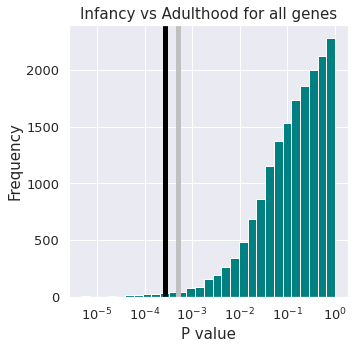

In [21]:
fig,ax = plt.subplots(figsize=(5,5))

#Loop through each comparison, Determine if significant, Group plot
thresh = np.percentile(curr_data, 5)

bins = np.geomspace(np.min(curr_data), np.max(curr_data), num=30)
import seaborn as sns
sns.set_theme(style="darkgrid")

plt.hist(curr_data, bins = bins, color='teal')
#plt.axvline(x=thresh, color='k', linestyle='--', linewidth=3)
final_sig = np.array([])
plt.axvline(x=sub_df.loc[0]['p value'] , c='black', linewidth=5)#, label = str(sub_df.loc[i]['Class']) + '_' + str(sub_df.loc[i]['celltype'])+ '_' + sig_str)
plt.axvline(x=sub_df.loc[1]['p value'] , c='silver', linewidth=5)

#plt.legend in top left
#plt.legend(bbox_to_anchor=(0, 1), loc=2, borderaxespad=0.)
plt.xscale('log')
#set title
ax.set_title('Infancy vs Adulthood for all genes', fontsize=15)
#change y label
ax.set_ylabel('Frequency', fontsize=15)
#remove x label
ax.set_xlabel('P value', fontsize=15)
ax.tick_params(axis='both', which='major', labelsize=13)
plt.savefig(s_code + 'prac.svg', bbox_inches='tight', dpi=300, transparent=False)
plt.show()

In [23]:
sub_df

index celltype Class         Comparison   p value  padj_sig  statistic  \
0     93      GLU  L1HS  infancy_Adulthood  0.000275      True  -4.448797   
1     98     GABA  L1HS  infancy_Adulthood  0.000502      True  -4.344797   

   effect_size      l2fc  
0    -2.979665  0.905897  
1    -2.930900  0.910595

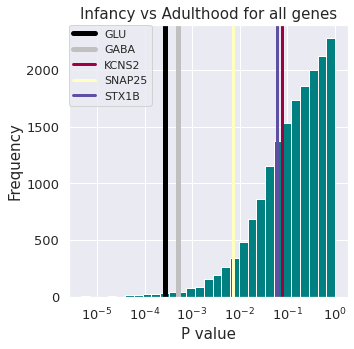

In [29]:
# Define your color palette
colormap = plt.cm.get_cmap('Spectral', 3)  # Get 10 colors from the 'viridis' colormap

# Set the color cycler
fig,ax = plt.subplots(figsize=(5,5))

#Loop through each comparison, Determine if significant, Group plot
thresh = np.percentile(curr_data, 5)

bins = np.geomspace(np.min(curr_data), np.max(curr_data), num=30)
import seaborn as sns
sns.set_theme(style="darkgrid")

plt.hist(curr_data, bins = bins, color='teal')
#plt.axvline(x=thresh, color='k', linestyle='--', linewidth=3)
final_sig = np.array([])
plt.axvline(x=sub_df.loc[0]['p value'] , c='black', linewidth=5, label='GLU')#, label = str(sub_df.loc[i]['Class']) + '_' + str(sub_df.loc[i]['celltype'])+ '_' + sig_str)
plt.axvline(x=sub_df.loc[1]['p value'] , c='silver', linewidth=5, label='GABA')

#known developmental synaptic genes
syn_list = ['KCNS2', 'SNAP25', 'STX1B']
plot_l = curr_df[curr_df['gene'].isin(syn_list)][1:]
plot_l.index = np.arange(0,3,1)
for p in range(len(plot_l)):
    plt.axvline(x=plot_l.loc[p]['p value'], linewidth=3, label=syn_list[p], c=colormap(p))

#plt.legend in top left
plt.legend(bbox_to_anchor=(0, 1), loc=2, borderaxespad=0.)
plt.xscale('log')
#set title
ax.set_title('Infancy vs Adulthood for all genes', fontsize=15)
#change y label
ax.set_ylabel('Frequency', fontsize=15)
#remove x label
ax.set_xlabel('P value', fontsize=15)
ax.tick_params(axis='both', which='major', labelsize=13)
plt.savefig(s_code + 'prac.svg', bbox_inches='tight', dpi=300, transparent=False)
plt.show()

In [991]:
fig,ax = plt.subplots(figsize=(5,5))

#Loop through each comparison, Determine if significant, Group plot
thresh = np.percentile(curr_data, 5)

bins = np.geomspace(np.min(curr_data), np.max(curr_data), num=30)
import seaborn as sns
sns.set_theme(style="darkgrid")

plt.hist(curr_data, bins = bins, color='teal')
plt.axvline(x=thresh, color='k', linestyle='--', linewidth=3)
final_sig = np.array([])
plt.axvline(x=sub_df.loc[0]['p value'] , c='black', linewidth=5)#, label = str(sub_df.loc[i]['Class']) + '_' + str(sub_df.loc[i]['celltype'])+ '_' + sig_str)
plt.axvline(x=sub_df.loc[1]['p value'] , c='silver', linewidth=5)

#plt.legend in top left
#plt.legend(bbox_to_anchor=(0, 1), loc=2, borderaxespad=0.)
plt.xscale('log')
plt.show()

index celltype Class         Comparison   p value  padj_sig  statistic
0     93      GLU  L1HS  infancy_Adulthood  0.000275      True  -4.448797
1     98     GABA  L1HS  infancy_Adulthood  0.000502      True  -4.344797

In [34]:
sub_df.loc['L1HS'].values

array([ 3.4151628 ,  2.96031912,  7.18626478,  7.45660564,  4.74255078,
        5.29432054,  7.23960731,  4.83411512,  4.66701128,  7.17370291,
        6.80388664,  6.48023974,  6.78474687,  4.65453491,  5.30687508,
        5.86270972,  7.80771529,  6.4637804 ,  4.81429694,  5.52909138,
        5.9072126 ,  6.65556405, 10.42713652,  4.16954606,  5.54017187,
       10.54021436,  7.76797158,  9.14732557,  6.36504304,  7.27078317,
        4.44454463,  6.14393595,  5.33285023,  5.46741317,  6.63687404,
        5.42021291,  3.60026724,  4.12746777,  1.91964933,  2.70362916,
        3.30868088,  4.91942234,  3.47223536,  3.74887104,  5.78458607,
        6.13418498,  5.90605727,  6.23978753,  7.15467272,  7.52133466,
        6.96125185,  5.56426706,  5.10576104,  4.84298125,  5.692438  ,
        7.57061362,  7.86540738,  7.52979961,  7.47391611,  8.53621041,
        6.79616239,  4.38540422,  8.93319387,  6.34678979,  3.80694672,
        5.3301243 ,  8.20935674,  8.09515011,  7.24711864,  7.08

In [50]:
meta_ = meta.set_index(list(meta)[0])
l1hs = meta_.loc[sub_df.loc['L1HS'].index.values]
cpm = sub_df.loc['L1HS']
gaba_age = l1hs[l1hs['celltype'] == 'GABA']['age'].values
gaba_cpm = sub_df.loc['L1HS'][l1hs['celltype'] == 'GABA'].values

glu_age = l1hs[l1hs['celltype'] == 'GLU']['age'].values
glu_cpm = sub_df.loc['L1HS'][l1hs['celltype'] == 'GLU'].values

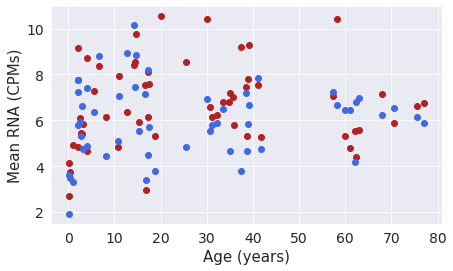

In [52]:
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import seaborn as sns
sns.set_style("darkgrid")

# Create a new figure and plot the original data points
plt.figure(figsize=(7, 4))
plt.scatter(glu_age, glu_cpm, c='firebrick', label = 'GLU L1HS')
plt.scatter(gaba_age, gaba_cpm, c='royalblue', label = 'GABA L1HS')


# Add labels, legend, and title
plt.ylabel('Mean RNA (CPMs)', fontsize=15)
plt.xlabel('Age (years)', fontsize=15)
#make tick labels bigger
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.savefig(s_code + 'prac.svg', bbox_inches='tight', dpi=300, transparent=False)
# Show the plot
plt.grid(True)
plt.show()

In [83]:
def do(age, cpm, std, k):
    import scipy
    age = scipy.ndimage.gaussian_filter1d(age, std)
    cpm = scipy.ndimage.gaussian_filter1d(cpm, std)
    sorted_indices = np.argsort(age)
    age_sorted = age[sorted_indices]
    cpm_sorted = cpm[sorted_indices]
    #cell_types_sorted = np.array(cell_types)[sorted_indices]
    
    # Use splines to fit a smooth curve
    spline = make_interp_spline(age_sorted, cpm_sorted, k=k)
    age_smooth = np.linspace(min(age), max(age), 100)
    cpm_smooth = spline(age_smooth)

    # Calculate the derivative of the spline
    derivative_smooth = spline(age_smooth, 3)
    
    return(age_smooth, cpm_smooth, derivative_smooth)
    

In [82]:
spline?

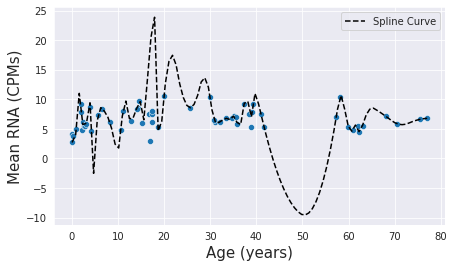

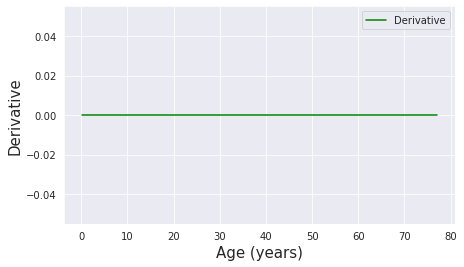

In [84]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline
import seaborn as sns

# Data points
# age = np.concatenate([glu_age, gaba_age])
# cpm = np.concatenate([glu_cpm, gaba_cpm])
# cell_types = ['GLU'] * len(glu_age) + ['GABA'] * len(gaba_age)

# Sort data by age


glu_age_smooth, glu_cpm_smooth, glu_d_smooth = do(glu_age, glu_cpm, 0.1, 2)


# Plot the original data points
plt.figure(figsize=(7, 4))
sns.scatterplot(x=age, y=cpm)

# Plot the spline curve
plt.plot(glu_age_smooth, glu_cpm_smooth, color='black', linestyle='dashed', label='Spline Curve')

# Add labels, legend, and title
plt.ylabel('Mean RNA (CPMs)', fontsize=15)
plt.xlabel('Age (years)', fontsize=15)
plt.legend()
plt.grid(True)
plt.show()

# Plot the derivative of the spline
plt.figure(figsize=(7, 4))
plt.plot(glu_age_smooth, glu_d_smooth, color='green', label='Derivative')

# Add labels, legend, and title
plt.ylabel('Derivative', fontsize=15)
plt.xlabel('Age (years)', fontsize=15)
plt.legend()
plt.grid(True)
plt.show()

In [36]:
full_df

gene/TE  \
60656          Alu:Alu:SINE   
60657        AluJb:Alu:SINE   
60658        AluJo:Alu:SINE   
60659       AluJr4:Alu:SINE   
60660        AluJr:Alu:SINE   
...                     ...   
61665  SVA_C:SVA:Retroposon   
61666  SVA_D:SVA:Retroposon   
61667  SVA_E:SVA:Retroposon   
61668  SVA_F:SVA:Retroposon   
61826       X9_LINE:L1:LINE   

       /cndd3/dburrows/DATA/te/rna/PE.bam/Sample_1105_GABA/Aligned.sortedByCoord.out.bam  \
60656                                             5542.0                                   
60657                                           519580.0                                   
60658                                           302991.0                                   
60659                                            83062.0                                   
60660                                           349730.0                                   
...                                                  ...                                   
61665                                                NaN                                   
61666                                                NaN                                   
61667                                                NaN                                   
61668                                                NaN                                   
61826                                                NaN                                   

                CPM Family  Element          Sample    age celltype  \
60656    597.596760    Alu      Alu       1105_GABA  16.93     GABA   
60657  56026.583243    Alu    AluJb       1105_GABA  16.93     GABA   
60658  32671.678054    Alu    AluJo       1105_GABA  16.93     GABA   
60659   8956.618918    Alu   AluJr4       1105_GABA  16.93     GABA   
60660  37711.568878    Alu    AluJr       1105_GABA  16.93     GABA   
...             ...    ...      ...             ...    ...      ...   
61665    219.630717    SVA    SVA_C  HCTZZNA014_GLU  39.19      GLU   
61666   1372.588966    SVA    SVA_D  HCTZZNA014_GLU  39.19      GLU   
61667    205.043611    SVA    SVA_E  HCTZZNA014_GLU  39.19      GLU   
61668    399.043877    SVA    SVA_F  HCTZZNA014_GLU  39.19      GLU   
61826    182.050377     L1  X9_LINE  HCTZZNA014_GLU  39.19      GLU   

            period  \
60656  Adolescence   
60657  Adolescence   
60658  Adolescence   
60659  Adolescence   
60660  Adolescence   
...            ...   
61665    Adulthood   
61666    Adulthood   
61667    Adulthood   
61668    Adulthood   
61826    Adulthood   

       /cndd3/dburrows/DATA/te/rna/PE.bam/Sample_1105_GLU/Aligned.sortedByCoord.out.bam  \
60656                                                NaN                                  
60657                                                NaN                                  
60658                                                NaN                                  
60659                                                NaN                                  
60660                                                NaN                                  
...                                                  ...                                  
61665                                                NaN                                  
61666                                                NaN                                  
61667                                                NaN                                  
61668                                                NaN                                  
61826                                                NaN                                  

       ...  \
60656  ...   
60657  ...   
60658  ...   
60659  ...   
60660  ...   
...    ...   
61665  ...   
61666  ...   
61667  ...   
61668  ...   
61826  ...   

       /cndd3/dburrows/DATA/te/rna/PE.bam/Sample_HCT15HBMA007_GLU/Aligned.sortedByCoord.out.bam  \
60656                                                NaN       

/home/dburrows/mambaforge/envs/base_conda/lib/python3.9/site-packages/seaborn/categorical.py:3002: UserWarning: The `split` parameter has been renamed to `dodge`.
  warnings.warn(msg, UserWarning)


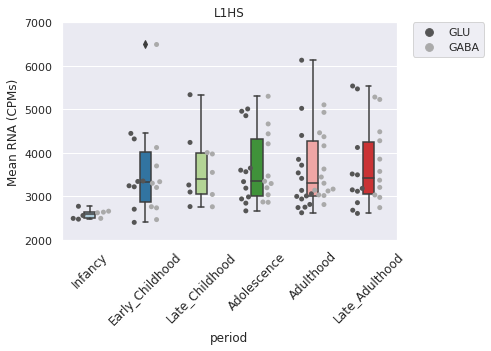

In [42]:
mod='L1HS'
group_df = full_df
plot_df = group_df[group_df['Element'] == mod]
plot_df = plot_df.groupby(['Sample', 'period', 'celltype']).mean()
plot_df.reset_index(inplace=True)

#visualise each group with box plot seaborn
import seaborn as sns
sns.set_theme(style="darkgrid")
#sns.violinplot(data=plot_df, x="period", y="RNA", hue="Cell Type", split=True, hue_order=['GLU', 'GABA'], order=['infancy', 'earlychildhood', 'latechildhood', 'adolescence', 'adulthood', 'lateadulthood'], palette="Set1")
#show box plot
sns.boxplot(data=plot_df,x="period", y="CPM", width=0.2,order=['Infancy', 'Early_Childhood', 'Late_Childhood', 'Adolescence', 'Adulthood', 'Late_Adulthood'], palette='Paired')
sns.swarmplot(data=plot_df, x="period", y="CPM", hue="celltype", split=True, hue_order=['GLU', 'GABA'], order=['Infancy', 'Early_Childhood', 'Late_Childhood', 'Adolescence', 'Adulthood', 'Late_Adulthood'], palette='gray')
#move legend off plot
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xticks(rotation=45, fontsize=12)
plt.ylabel('Mean RNA (CPMs)', fontsize=12)
plt.title(mod)
plt.ylim(2000,7000)
plt.savefig(s_code + 'prac.svg', bbox_inches='tight', dpi=300, transparent=False)
plt.show()

In [67]:
%autoreload
element='L1HS'
class_l = ['L1HS']
cell_l = 'GLU', 'GABA'
period_l = 'Early_Childhood', 'Late_Childhood', 'Adolescence', 'Adulthood', 'Late_Adulthood'
sub_df = group_df[group_df['Element'] == element]

comp_df = {'celltype':[], 'Class':[], 'Comparison':[], 'p value':[], 'padj_sig': [], 'statistic':[], 'effect_size':[], 'l2fc':[]}
for cl in class_l:
    for cell in cell_l:
        for p in period_l:
            #get data
            curr_df = sub_df[sub_df['Element'] == cl]
            curr_df = curr_df[curr_df['celltype'] == cell]
            curr_df['RNA'] = curr_df['CPM']
            per_df = curr_df[curr_df['period'] == p]
            per_df['RNA'] = per_df['CPM']
            #get data for comparison
            comp_df['celltype'].append(cell)
            comp_df['Class'].append(cl)
            comp_df['Comparison'].append('infancy' + '_' + p)
            
            comp_df['p value'].append(ter.paired_test(curr_df['RNA'][curr_df['period'] == 'Infancy'], per_df['RNA'].values)[1])
            comp_df['statistic'].append(ter.paired_test(curr_df['RNA'][curr_df['period'] == 'Infancy'], per_df['RNA'].values)[0])
            comp_df['effect_size'].append((np.mean(curr_df['RNA'][curr_df['period'] == 'Infancy'].values) - np.mean(per_df['RNA'].values))/np.sqrt(((np.std(curr_df['RNA'][curr_df['period'] == 'Infancy'].values))**2 + (np.std(per_df['RNA'].values))**2)/2))
            comp_df['l2fc'].append(np.log2(np.mean(per_df['RNA'].values/(np.mean(curr_df['RNA'][curr_df['period'] == 'Infancy'].values)))))


if mode == 'coarse': scalar = 5
elif mode== 'granular': scalar = (5*len(class_l))
comp_df['padj_sig'] = np.asarray(comp_df['p value']) < 0.05/scalar
comp_df = pd.DataFrame(comp_df)
l1_df = comp_df
sig_df = comp_df[comp_df['padj_sig']==True]
sig_df

/tmp/ipykernel_2692139/83811128.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  per_df['RNA'] = per_df['CPM']
/tmp/ipykernel_2692139/83811128.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  per_df['RNA'] = per_df['CPM']
/tmp/ipykernel_2692139/83811128.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/

celltype Class              Comparison   p value  padj_sig  statistic  \
2      GLU  L1HS     infancy_Adolescence  0.002198      True        1.0   
3      GLU  L1HS       infancy_Adulthood  0.002339      True        3.0   
4      GLU  L1HS  infancy_Late_Adulthood  0.005861      True        2.0   

   effect_size      l2fc  
2    -1.827866  0.496996  
3    -1.129746  0.572979  
4    -1.487705  0.488435

In [16]:
#Plot coarse levels of L1, Alu and SVA as a function of age for different cell types
curr_df = sub_df

#group by celltype
meta_gaba = meta[meta['celltype'] == 'GABA']
meta_glu = meta[meta['celltype'] == 'GLU']

l1_gaba = ter.te_group_el(curr_df, meta_gaba, 'L1')
l1_glu = ter.te_group_el(curr_df, meta_glu, 'L1')
alu_gaba = ter.te_group_el(curr_df, meta_gaba, 'Alu')
alu_glu = ter.te_group_el(curr_df, meta_glu, 'Alu')
sva_gaba = ter.te_group_el(curr_df, meta_gaba, 'SVA')
sva_glu = ter.te_group_el(curr_df, meta_glu, 'SVA')

l1_ = ter.te_group_el(curr_df, meta, 'L1')
alu_ = ter.te_group_el(curr_df, meta, 'Alu')
sva_ = ter.te_group_el(curr_df, meta, 'SVA')

KeyError: 'AGEYEARS'

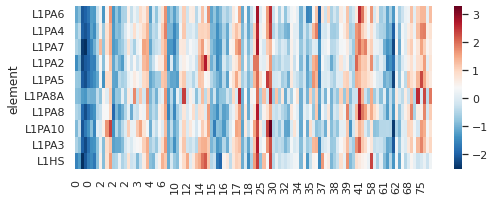

In [327]:
import seaborn as sns
#heatmap
data_l = l1_
#sort columns by sort_name
sort_age, sort_name = adm.sort_2list(data_l[1], data_l[0].columns.values)
sort_df = data_l[0][sort_name]

fig, ax = plt.subplots(figsize=(8,3))
z = (sort_df - np.mean(sort_df, axis=1).values.reshape(-1, 1)) / np.std(sort_df, axis=1).values.reshape(-1, 1)
#only plot L1PA4, LPA2, L1PA5, LPA3, L1HS

sns.heatmap(z, cmap='RdBu_r', ax=ax)
# ax.set_yticklabels(['L1', 'ALU', 'SVA'], rotation=0)
ax.set_xticklabels(sort_age[ 0::4])
#ax.set_title('LINE')
#ax.set_ylabel('Cell Type')
plt.show()

In [25]:
#split into df by age label
thresh = 1 
ind = np.mean(df, axis=1) >thresh #indeces of ones to keep
sub_df = df.loc[ind]
inp = ter.te_group_el(sub_df, meta, 'L1')
l1_ = inp
adjp_df = ter.spear_adjp(inp[0], inp[1], 0.05)
sig_te = adjp_df[adjp_df['adj_pval'] < 0.05]['geneid'].values
age_l = [INF, ECH, LCH, ADO, ADU, LADU]
name_l = ['INF', 'ECH', 'LCH', 'ADO', 'ADU', 'LADU']

#group for line plot
group_df = {'class':[], 'CPM':[], 'age':[]}   
for x,l in enumerate(age_l):
    group_df['class']= np.append(group_df['class'], sig_te)
    group_df['CPM'] = np.append(group_df['CPM'],np.mean(inp[0][l['sample'].values],axis=1).loc[sig_te].values)
    group_df['age'] = np.append(group_df['age'], np.full(len(sig_te), int(np.mean(l['AGEYEARS'].values) + 1)))

# #group for scatter plot
scat_df = {'class':[], 'CPM':[], 'age':[]}
for x,l in enumerate(sig_te):
    scat_df['class'] = np.append(scat_df['class'], np.full(inp[0].shape[1], l))
    scat_df['CPM'] = np.append(scat_df['CPM'], inp[0].loc[l].values)
    scat_df['age'] = np.append(scat_df['age'], inp[1])

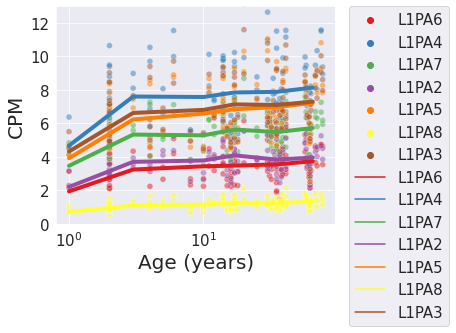

In [28]:
import seaborn as sns
curr_l = l1_
name_l = sig_te
sns.set_style('darkgrid')
fig,ax = plt.subplots(figsize=(5,4))
#set background style in seaborn
pal = 'Set1'
sns.scatterplot(x='age', y='CPM', hue='class', data=scat_df, ax=ax, alpha = 0.5, palette=pal)
sns.lineplot(x='age', y='CPM', hue='class', data=group_df, ax=ax, alpha = 1, linewidth=4, palette=pal)
plt.xscale('log')
#hide legend
#ax.get_legend().remove()
#make x and y labels bigger
ax.set_xlabel('Age (years)', fontsize=20)
ax.set_ylabel('CPM', fontsize=20)
#make ticks larger
ax.tick_params(axis='both', which='major', labelsize=15)
#plt.legend()
#plot legend off to side
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize=15)
plt.ylim(0,13)
#plt.savefig('L1_age.svg', dpi=300, bbox_inches='tight', pad_inches=0, transparent=True)
plt.show()

In [93]:
#======================
###ALU
#======================

#Filter low CPM data
thresh = 50
ind = np.mean(df, axis=1) >thresh #indeces of ones to keep
sub_df = df.loc[ind]

#make into df with RNA, age, class, celltype
curr_df = sub_df
meta = meta
mode = 'granular'
meta_ = meta[['celltype', 'sex', 'age', 'period']]
meta_['period'][meta_['age'] < 2] = 'Infancy'

if mode == 'granular':
    group_df = {'period':[], 'celltype':[], 'Class':[], 'Element':[], 'RNA':[]}
    l1_ind = [x for x,i in enumerate(curr_df.index) if 'L1' in i]#l1 ind
    alu_ind = [x for x,i in enumerate(curr_df.index) if 'Alu' in i]#alu ind
    sva_ind = [x for x,i in enumerate(curr_df.index) if 'SVA' in i]#sva ind

    l1_v = np.ravel([curr_df.iloc[l1_ind][i].values for i in meta['sample'].values])
    alu_v = np.ravel([curr_df.iloc[alu_ind][i].values for i in meta['sample'].values])
    sva_v = np.ravel([curr_df.iloc[sva_ind][i].values for i in meta['sample'].values])
    #make into df
    group_df['RNA'] = np.append(l1_v, np.append(alu_v, sva_v))
    group_df['Class'] = np.append(np.tile(curr_df.iloc[l1_ind].index.values, curr_df.shape[1]), 
                                  np.append(np.tile(curr_df.iloc[alu_ind].index.values,curr_df.shape[1]), np.tile(curr_df.iloc[sva_ind].index.values, curr_df.shape[1])))
    group_df['period'] = np.append(np.repeat(meta_['period'], len(l1_ind)).values,
                                  np.append(np.repeat(meta_['period'], len(alu_ind)).values, np.repeat(meta_['period'], len(sva_ind)).values))
    group_df['celltype'] = np.append(np.repeat(meta_['celltype'], len(l1_ind)).values,
                                  np.append(np.repeat(meta_['celltype'], len(alu_ind)).values, np.repeat(meta_['celltype'], len(sva_ind)).values))
    group_df['Element'] = np.append(np.repeat('L1', len(l1_v)),
                                  np.append(np.repeat('Alu', len(alu_v)), np.repeat('SVA', len(sva_v))))
    group_df = pd.DataFrame(group_df)


/tmp/ipykernel_2692139/1608130322.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  meta_['period'][meta_['age'] < 2] = 'Infancy'
/tmp/ipykernel_2692139/1608130322.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  meta_['period'][meta_['age'] < 2] = 'Infancy'


In [94]:
element = 'Alu'
class_l = group_df[group_df['Element'] == element]['Class'].unique()
cell_l = 'GLU', 'GABA'
period_l = 'Early_Childhood', 'Late_Childhood', 'Adolescence', 'Adulthood', 'Late_Adulthood'
sub_df = group_df[group_df['Element'] == element]

comp_df = ter.inf_paired_comp(class_l, cell_l, period_l, sub_df, 'granular')
alu_df = comp_df
sig_df = comp_df[comp_df['padj_sig']==True]
sig_df

celltype   Class              Comparison   p value  padj_sig  statistic  \
19      GABA   AluJo  infancy_Late_Adulthood  0.000170      True  -5.204524   
29      GABA   AluJr  infancy_Late_Adulthood  0.000287      True  -4.905354   
49      GABA  AluSz6  infancy_Late_Adulthood  0.000379      True  -4.750312   
69      GABA   AluSz  infancy_Late_Adulthood  0.000507      True  -4.589318   
109     GABA   AluJb  infancy_Late_Adulthood  0.000287      True  -4.906253   
139     GABA  AluJr4  infancy_Late_Adulthood  0.000388      True  -4.737218   

     effect_size      l2fc  
19     -3.033528  0.773979  
29     -2.914856  0.774420  
49     -2.733551  0.680074  
69     -2.698336  0.636880  
109    -2.849389  0.740041  
139    -2.878144  0.775270

/home/dburrows/mambaforge/envs/base_conda/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 7.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/dburrows/mambaforge/envs/base_conda/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 9.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/dburrows/mambaforge/envs/base_conda/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 7.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/dburrows/mambaforge/envs/base_conda/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 9.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


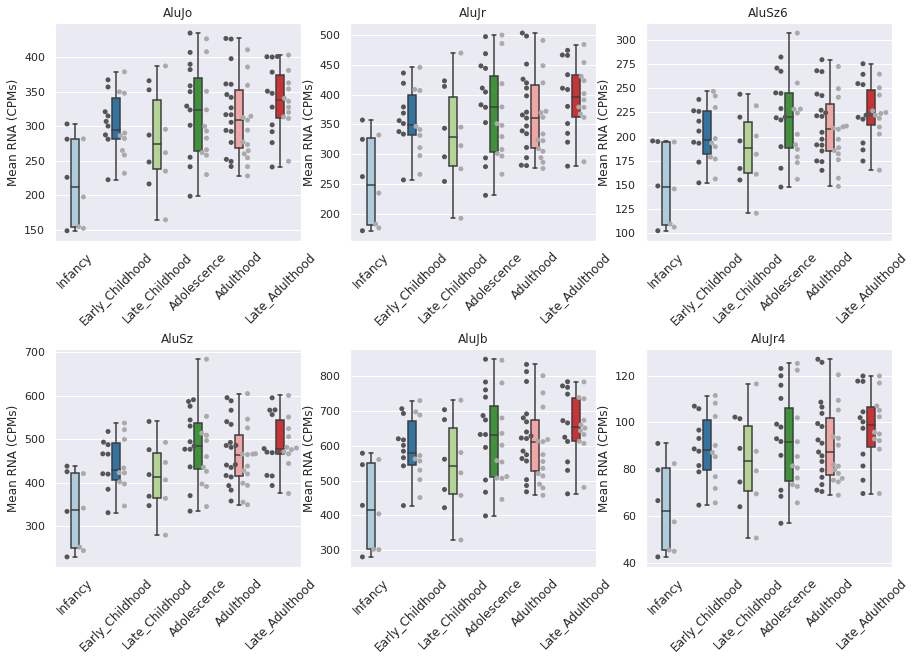

In [328]:
plot_l = sig_df['Class'].unique()
import seaborn as sns
sns.set_theme(style="darkgrid")

fig, axs = plt.subplots(figsize=(15,10))
plt.subplots_adjust(hspace=0.5)
for x,p in enumerate(plot_l):
    ax = plt.subplot(int(math.ceil(len(plot_l)/3)), 3, x + 1)

    plot_df = group_df[group_df['Class'] == p]
    sns.boxplot(data=plot_df,x="period", y="RNA", width=0.2,order=['Infancy', 'Early_Childhood', 'Late_Childhood', 'Adolescence', 'Adulthood', 'Late_Adulthood'], palette='Paired')
    sns.swarmplot(data=plot_df, x="period", y="RNA", hue="celltype", dodge=True, hue_order=['GLU', 'GABA'], order=['Infancy', 'Early_Childhood', 'Late_Childhood', 'Adolescence', 'Adulthood', 'Late_Adulthood'], palette='gray')
    #remove legend
    ax.get_legend().remove()
    #rotate x ticks
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, fontsize=12)
    #set title
    ax.set_title(p, fontsize=12)
    #change y label
    ax.set_ylabel('Mean RNA (CPMs)', fontsize=12)
    #remove x label
    ax.set_xlabel('')
    #remove x tick labels
    #if x == 0 or x == 1 or x == 2: ax.set_xticklabels([])
#plt.savefig(s_fig + 'RNA_l1_multi_boxplot.svg', bbox_inches='tight', dpi=300, transparent=False)
plt.show()


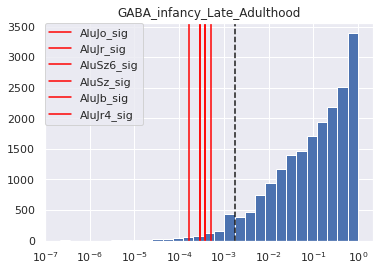

index celltype   Class              Comparison   p value  padj_sig  \
0     19     GABA   AluJo  infancy_Late_Adulthood  0.000170      True   
1     29     GABA   AluJr  infancy_Late_Adulthood  0.000287      True   
2     49     GABA  AluSz6  infancy_Late_Adulthood  0.000379      True   
3     69     GABA   AluSz  infancy_Late_Adulthood  0.000507      True   
4    109     GABA   AluJb  infancy_Late_Adulthood  0.000287      True   
5    139     GABA  AluJr4  infancy_Late_Adulthood  0.000388      True   

   statistic                         comb baseline_sig  
0  -5.204524  GABA_infancy_Late_Adulthood          sig  
1  -4.905354  GABA_infancy_Late_Adulthood          sig  
2  -4.750312  GABA_infancy_Late_Adulthood          sig  
3  -4.589318  GABA_infancy_Late_Adulthood          sig  
4  -4.906253  GABA_infancy_Late_Adulthood          sig  
5  -4.737218  GABA_infancy_Late_Adulthood          sig

In [329]:
#Null model -> compare p values
#---------------------------------------
null_df = pd.read_csv('/cndd/dburrows/DATA/te/rna/PE.counts/DE/ATEM_null_test.csv')
final_df = ter.plot_null(null_df, sig_df, 20, 4)
final_df

/home/dburrows/mambaforge/envs/base_conda/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 7.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/dburrows/mambaforge/envs/base_conda/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 20.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/dburrows/mambaforge/envs/base_conda/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 7.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/dburrows/mambaforge/envs/base_conda/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 8.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)

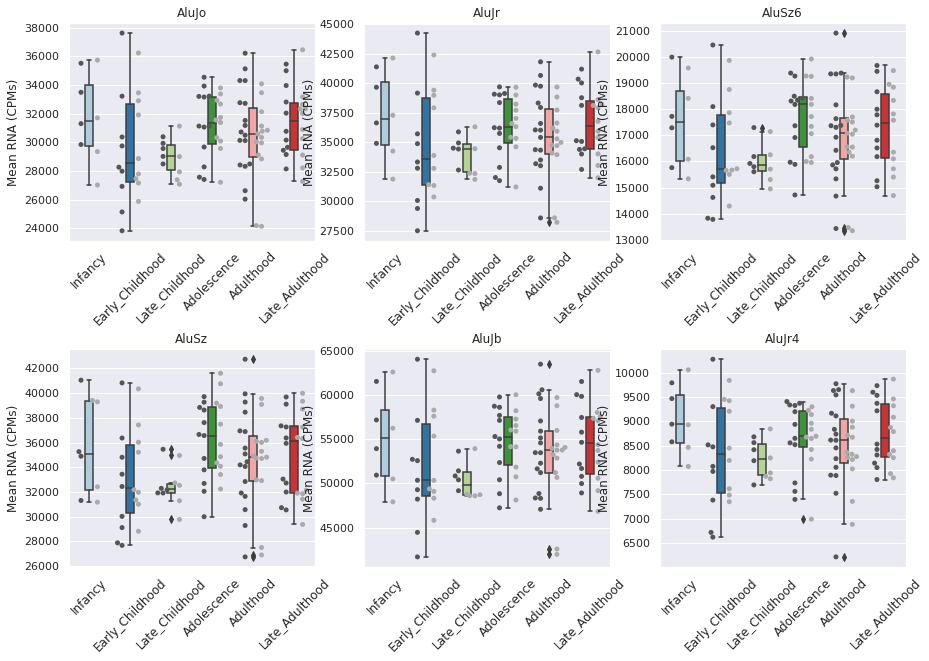

In [330]:
sig_df = final_df[final_df['baseline_sig'] == 'sig']

#Plot TET passive and active transcripts
plot_l = sig_df['Class'].unique()
import seaborn as sns
import math
sns.set_theme(style="darkgrid")

fig, axs = plt.subplots(figsize=(15,10))
plt.subplots_adjust(hspace=0.5)
for x,p in enumerate(plot_l):
    ax = plt.subplot(int(math.ceil(len(plot_l)/3)), 3, x + 1)

    group_df = full_df
    plot_df = group_df[group_df['Element'] == p]
    plot_df = plot_df.groupby(['Sample', 'period', 'celltype']).mean()
    plot_df.reset_index(inplace=True)
    sns.boxplot(data=plot_df,x="period", y="CPM", width=0.2,order=['Infancy', 'Early_Childhood', 'Late_Childhood', 'Adolescence', 'Adulthood', 'Late_Adulthood'], palette='Paired')
    sns.swarmplot(data=plot_df, x="period", y="CPM", hue="celltype", dodge=True, hue_order=['GLU', 'GABA'], order=['Infancy', 'Early_Childhood', 'Late_Childhood', 'Adolescence', 'Adulthood', 'Late_Adulthood'], palette='gray')
    #remove legend
    ax.get_legend().remove()
    #rotate x ticks
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, fontsize=12)
    #set title
    ax.set_title(p, fontsize=12)
    #change y label
    ax.set_ylabel('Mean RNA (CPMs)', fontsize=12)
    #remove x label
    ax.set_xlabel('')
    #remove x tick labels
    #if x == 0 or x == 1 or x == 2: ax.set_xticklabels([])
#plt.savefig(s_fig + 'RNA_l1_multi_boxplot.svg', bbox_inches='tight', dpi=300, transparent=False)
plt.show()


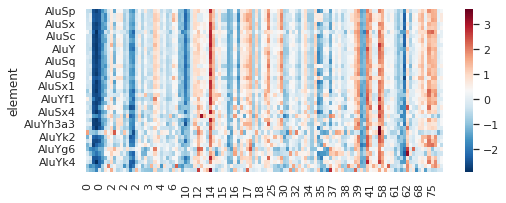

In [378]:
import seaborn as sns
#heatmap
data_l = alu_
#sort columns by sort_name
sort_age, sort_name = adm.sort_2list(data_l[1], data_l[0].columns.values)
sort_df = data_l[0][sort_name]

fig, ax = plt.subplots(figsize=(8,3))
z = (sort_df - np.mean(sort_df, axis=1).values.reshape(-1, 1)) / np.std(sort_df, axis=1).values.reshape(-1, 1)
sns.heatmap(z, cmap='RdBu_r', ax=ax)
# ax.set_yticklabels(['L1', 'ALU', 'SVA'], rotation=0)
ax.set_xticklabels(sort_age[ 0::4])
#ax.set_title('LINE')
#ax.set_ylabel('Cell Type')
plt.show()

In [32]:
#split into df by age label
thresh = 100
ind = np.mean(df, axis=1) >thresh #indeces of ones to keep
sub_df = df.loc[ind]
inp = ter.te_group_el(sub_df, meta, 'Alu')
alu_ = inp
adjp_df = ter.spear_adjp(inp[0], inp[1], 0.05)
sig_te = adjp_df[adjp_df['adj_pval'] < 0.05]['geneid'].values[:6]
age_l = [INF, ECH, LCH, ADO, ADU, LADU]
name_l = ['INF', 'ECH', 'LCH', 'ADO', 'ADU', 'LADU']

#group for line plot
group_df = {'class':[], 'CPM':[], 'age':[]}   
for x,l in enumerate(age_l):
    group_df['class']= np.append(group_df['class'], sig_te)
    group_df['CPM'] = np.append(group_df['CPM'],np.mean(inp[0][l['sample'].values],axis=1).loc[sig_te].values)
    group_df['age'] = np.append(group_df['age'], np.full(len(sig_te), int(np.mean(l['AGEYEARS'].values) + 1)))

# #group for scatter plot
scat_df = {'class':[], 'CPM':[], 'age':[]}
for x,l in enumerate(sig_te):
    scat_df['class'] = np.append(scat_df['class'], np.full(inp[0].shape[1], l))
    scat_df['CPM'] = np.append(scat_df['CPM'], inp[0].loc[l].values)
    scat_df['age'] = np.append(scat_df['age'], inp[1])

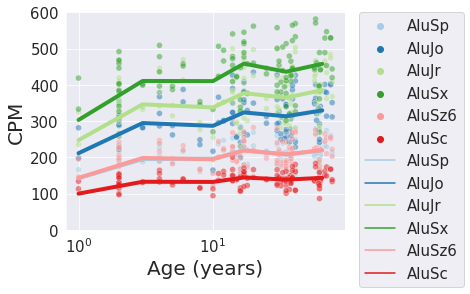

In [42]:
import seaborn as sns
curr_l = alu_
name_l = sig_te
sns.set_style('darkgrid')
fig,ax = plt.subplots(figsize=(5,4))
#set background style in seaborn
pal = 'Paired'
sns.scatterplot(x='age', y='CPM', hue='class', data=scat_df, ax=ax, alpha = 0.5, palette=pal)
sns.lineplot(x='age', y='CPM', hue='class', data=group_df, ax=ax, alpha = 1, linewidth=4, palette=pal)
plt.xscale('log')
#hide legend
#ax.get_legend().remove()
#make x and y labels bigger
ax.set_xlabel('Age (years)', fontsize=20)
ax.set_ylabel('CPM', fontsize=20)
#make ticks larger
ax.tick_params(axis='both', which='major', labelsize=15)
#plt.legend()
#plot legend off to side
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize=15)
plt.ylim(0,600)
#plt.savefig('alu_age.svg', dpi=300, bbox_inches='tight', pad_inches=0, transparent=True)
plt.show()

In [101]:
group_df['Element'].unique()

array(['Alu'], dtype=object)

In [105]:
#======================
###SVA
#======================
element = 'SVA'
class_l = group_df[group_df['Element'] == element]['Class'].unique()
cell_l = 'GLU', 'GABA'
period_l = 'Early_Childhood', 'Late_Childhood', 'Adolescence', 'Adulthood', 'Late_Adulthood'
sub_df = group_df[group_df['Element'] == element]
comp_df = ter.inf_paired_comp(class_l, cell_l, period_l, sub_df, 'granular')
sva_df = comp_df
sig_df = comp_df[comp_df['padj_sig']==True]
sig_df

celltype  Class              Comparison   p value  padj_sig  statistic  \
29     GABA  SVA_B  infancy_Late_Adulthood  0.000510      True  -4.586548   
59     GABA  SVA_A  infancy_Late_Adulthood  0.001179      True  -4.132590   

    effect_size      l2fc  
29    -2.944238  0.983353  
59    -2.507411  0.867932

/home/dburrows/mambaforge/envs/base_conda/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 11.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/dburrows/mambaforge/envs/base_conda/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 5.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/dburrows/mambaforge/envs/base_conda/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 9.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/dburrows/mambaforge/envs/base_conda/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 5.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)

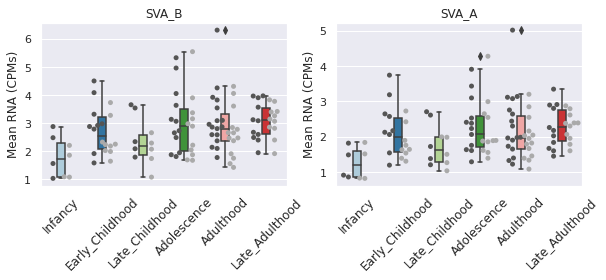

In [334]:
plot_l = sig_df['Class'].unique()
import seaborn as sns
sns.set_theme(style="darkgrid")

fig, axs = plt.subplots(figsize=(15,3))
plt.subplots_adjust(hspace=0.5)
for x,p in enumerate(plot_l):
    ax = plt.subplot(int(math.ceil(len(plot_l)/3)), 3, x + 1)

    plot_df = group_df[group_df['Class'] == p]
    sns.boxplot(data=plot_df,x="period", y="RNA", width=0.2,order=['Infancy', 'Early_Childhood', 'Late_Childhood', 'Adolescence', 'Adulthood', 'Late_Adulthood'], palette='Paired')
    sns.swarmplot(data=plot_df, x="period", y="RNA", hue="celltype", dodge=True, hue_order=['GLU', 'GABA'], order=['Infancy', 'Early_Childhood', 'Late_Childhood', 'Adolescence', 'Adulthood', 'Late_Adulthood'], palette='gray')
    #remove legend
    ax.get_legend().remove()
    #rotate x ticks
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, fontsize=12)
    #set title
    ax.set_title(p, fontsize=12)
    #change y label
    ax.set_ylabel('Mean RNA (CPMs)', fontsize=12)
    #remove x label
    ax.set_xlabel('')
    #remove x tick labels
    #if x == 0 or x == 1 or x == 2: ax.set_xticklabels([])
#plt.savefig(s_fig + 'RNA_l1_multi_boxplot.svg', bbox_inches='tight', dpi=300, transparent=False)
plt.show()


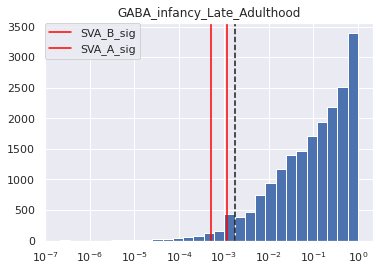

index celltype  Class              Comparison   p value  padj_sig  \
0     29     GABA  SVA_B  infancy_Late_Adulthood  0.000510      True   
1     59     GABA  SVA_A  infancy_Late_Adulthood  0.001179      True   

   statistic                         comb baseline_sig  
0  -4.586548  GABA_infancy_Late_Adulthood          sig  
1  -4.132590  GABA_infancy_Late_Adulthood          sig

In [335]:
#Null model -> compare p values
#---------------------------------------
null_df = pd.read_csv('/cndd/dburrows/DATA/te/rna/PE.counts/DE/ATEM_null_test.csv')
final_df = ter.plot_null(null_df, sig_df, 20, 4)
final_df

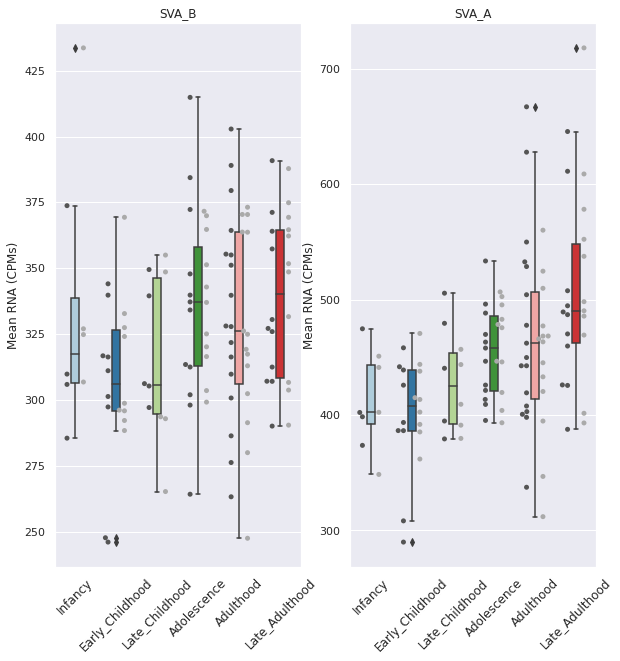

In [336]:
sig_df = final_df[final_df['baseline_sig'] == 'sig']

#Plot TET passive and active transcripts
plot_l = sig_df['Class'].unique()
import seaborn as sns
import math
sns.set_theme(style="darkgrid")

fig, axs = plt.subplots(figsize=(15,10))
plt.subplots_adjust(hspace=0.5)
for x,p in enumerate(plot_l):
    ax = plt.subplot(int(math.ceil(len(plot_l)/3)), 3, x + 1)

    group_df = full_df
    plot_df = group_df[group_df['Element'] == p]
    plot_df = plot_df.groupby(['Sample', 'period', 'celltype']).mean()
    plot_df.reset_index(inplace=True)
    sns.boxplot(data=plot_df,x="period", y="CPM", width=0.2,order=['Infancy', 'Early_Childhood', 'Late_Childhood', 'Adolescence', 'Adulthood', 'Late_Adulthood'], palette='Paired')
    sns.swarmplot(data=plot_df, x="period", y="CPM", hue="celltype", dodge=True, hue_order=['GLU', 'GABA'], order=['Infancy', 'Early_Childhood', 'Late_Childhood', 'Adolescence', 'Adulthood', 'Late_Adulthood'], palette='gray')
    #remove legend
    ax.get_legend().remove()
    #rotate x ticks
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, fontsize=12)
    #set title
    ax.set_title(p, fontsize=12)
    #change y label
    ax.set_ylabel('Mean RNA (CPMs)', fontsize=12)
    #remove x label
    ax.set_xlabel('')
    #remove x tick labels
    #if x == 0 or x == 1 or x == 2: ax.set_xticklabels([])
#plt.savefig(s_fig + 'RNA_l1_multi_boxplot.svg', bbox_inches='tight', dpi=300, transparent=False)
plt.show()


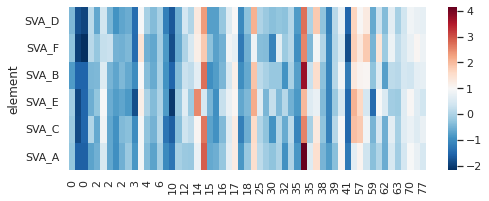

In [415]:
import seaborn as sns
#heatmap
data_l = sva_gaba
#sort columns by sort_name
sort_age, sort_name = adm.sort_2list(data_l[1], data_l[0].columns.values)
sort_df = data_l[0][sort_name]

fig, ax = plt.subplots(figsize=(8,3))
z = (sort_df - np.mean(sort_df, axis=1).values.reshape(-1, 1)) / np.std(sort_df, axis=1).values.reshape(-1, 1)
sns.heatmap(z, cmap='RdBu_r', ax=ax)
# ax.set_yticklabels(['L1', 'ALU', 'SVA'], rotation=0)
ax.set_xticklabels(sort_age[ 0::2])
#ax.set_title('LINE')
#ax.set_ylabel('Cell Type')
plt.show()

In [45]:
#split into df by age label
thresh = 1 
ind = np.mean(df, axis=1) >thresh #indeces of ones to keep
sub_df = df.loc[ind]
inp = ter.te_group_el(sub_df, meta, 'SVA')
sva_ = inp
adjp_df = ter.spear_adjp(inp[0], inp[1], 0.05)
sig_te = adjp_df[adjp_df['adj_pval'] < 0.05]['geneid'].values
age_l = [INF, ECH, LCH, ADO, ADU, LADU]
name_l = ['INF', 'ECH', 'LCH', 'ADO', 'ADU', 'LADU']

#group for line plot
group_df = {'class':[], 'CPM':[], 'age':[]}   
for x,l in enumerate(age_l):
    group_df['class']= np.append(group_df['class'], sig_te)
    group_df['CPM'] = np.append(group_df['CPM'],np.mean(inp[0][l['sample'].values],axis=1).loc[sig_te].values)
    group_df['age'] = np.append(group_df['age'], np.full(len(sig_te), int(np.mean(l['AGEYEARS'].values) + 1)))

# #group for scatter plot
scat_df = {'class':[], 'CPM':[], 'age':[]}
for x,l in enumerate(sig_te):
    scat_df['class'] = np.append(scat_df['class'], np.full(inp[0].shape[1], l))
    scat_df['CPM'] = np.append(scat_df['CPM'], inp[0].loc[l].values)
    scat_df['age'] = np.append(scat_df['age'], inp[1])

/var/tmp/ipykernel_647149/3916128849.py:22: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  plt.ylim(0,22)


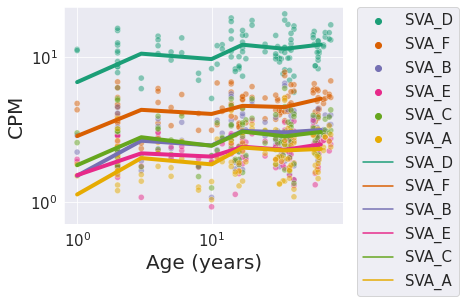

In [51]:
import seaborn as sns
curr_l = sva_
name_l = sig_te
sns.set_style('darkgrid')
fig,ax = plt.subplots(figsize=(5,4))
#set background style in seaborn
pal = 'Dark2'
sns.scatterplot(x='age', y='CPM', hue='class', data=scat_df, ax=ax, alpha = 0.5, palette=pal)
sns.lineplot(x='age', y='CPM', hue='class', data=group_df, ax=ax, alpha = 1, linewidth=4, palette=pal)
plt.xscale('log')
plt.yscale('log')
#hide legend
#ax.get_legend().remove()
#make x and y labels bigger
ax.set_xlabel('Age (years)', fontsize=20)
ax.set_ylabel('CPM', fontsize=20)
#make ticks larger
ax.tick_params(axis='both', which='major', labelsize=15)
#plt.legend()
#plot legend off to side
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize=15)
plt.ylim(0,22)
#plt.savefig('alu_age.svg', dpi=300, bbox_inches='tight', pad_inches=0, transparent=True)
plt.show()

### Celltype differences

In [77]:
# Save count data across all donors as dataframe
#meta = pd.read_csv('/datasets/Public_Datasets/Dracheva_PsychEncode_development/processed/PEC_RNAmeta.csv')
ev_df = pd.read_csv('/cndd3/dburrows/DATA/annotations/rmsk/evolutionary_age.csv')
guide_df = pd.read_csv('/cndd/dburrows/DATA/te/rna/PE.counts/DE/ATEM_CPM.csv', index_col=0)

#Load in PE data for each sample
mode='Count'
ID_l = meta['sample'].values
parent_path = '/cndd/dburrows/DATA/te/rna/PE.counts/ATEM/'
te = ev_df['element'].values
dict = {'element':te}
for ID in ID_l:
    te_v = ter.load_ATEM_family(parent_path + '/Sample_' + ID + '/ATEM_counts.csv', te, mode)
    assert len(te) == len(te_v), 'Error: Not all TE elements were counted'
    #Add to dict
    dict[ID] = te_v
df = pd.DataFrame(dict)
#set first column to index
df.set_index('element', inplace=True)
df = df.astype(int)

#Filter based on low CPM data
thresh = 1 
ind = np.mean(guide_df, axis=1) >thresh #indeces of ones to keep
sub_df = df.loc[ind]

#write to csv
l1_df = sub_df[sub_df.index.str.contains('L1')]
alu_df = sub_df[sub_df.index.str.contains('Alu')]
sva_df = sub_df[sub_df.index.str.contains('SVA')]

coarse_df = pd.DataFrame()
coarse_df['L1'] = np.mean(l1_df,axis=0).astype(int)
coarse_df['Alu'] = np.mean(alu_df,axis=0).astype(int)
coarse_df['SVA'] = np.mean(sva_df,axis=0).astype(int)

#coarse_df.T.to_csv('/cndd/dburrows/DATA/te/rna/PE.counts/DE/ATEM_coarse_sub-COUNT.csv')

In [88]:
l1_df

1105_GABA  1105_GLU  1133_GABA  1133_GLU  1134_GABA  1134_GLU  \
element                                                                  
L1PA6          837       784       1330      1517        925       986   
L1PA4         1758      1692       3056      2775       1980      2037   
L1PA7         1400      1191       2353      2023       1581      1394   
L1PA2          914       840       1558      1246       1004      1034   
L1PA5         1812      1383       2737      2308       2016      1703   
L1PA8A         195       247        282       548        227       364   
L1PA8          270       296        478       494        311       353   
L1PA10         306       248        323       399        214       302   
L1PA3         1714      1504       2863      2466       1935      1759   
L1HS          1278       915       3020      2567       1464      1613   

         1275_GABA  1275_GLU  1277_GABA  1277_GLU  ...  HCT15HBMA007_GLU  \
element                                            ...                     
L1PA6         1106       573        775       899  ...              1219   
L1PA4         2658      1664       1798      2007  ...              2826   
L1PA7         2108      1210       1419      1419  ...              1723   
L1PA2         1257       816        934      1013  ...              1252   
L1PA5         2149      1138       1753      1758  ...              2482   
L1PA8A         239       461        192       370  ...               886   
L1PA8          331       356        265       342  ...               379   
L1PA10         303       315        235       304  ...               269   
L1PA3         2162      1452       1692      1885  ...              2506   
L1HS          2185      1304       1475      1993  ...              1604   

         HCT15HBNA032_GLU  HCT16HCQA020_GABA  HCT16HCQA020_GLU  \
element                                                          
L1PA6                1707               1082              1055   
L1PA4                4282               2757              2769   
L1PA7                1985               1814              1370   
L1PA2                1958               1241              1216   
L1PA5                3403               2503              2279   
L1PA8A                800                501               779   
L1PA8                 587                292               331   
L1PA10                303                371               312   
L1PA3                3448               2344              2148   
L1HS                 2616               2063              1785   

         HCT17HEIA010_GABA  HCT17HEIA010_GLU  HCTYPA008_GABA  HCTYPA008_GLU  \
element                                                                       
L1PA6                 1129              1118            1233           1414   
L1PA4                 2746              2317            2998           3461   
L1PA7                 1892              1518            1891           1994   
L1PA2                 1208              1013            1212           1570   
L1PA5                 2522              1784            2818           2783   
L1PA8A                 386               575             350            917   
L1PA8                  370               347             358            536   
L1PA10                 446               364             372            413   
L1PA3                 2553              1973            2614           2706   
L1HS                  1607              1508            1597           1979   

         HCTZZNA014_GABA  HCTZZNA014_GLU  
element                                   
L1PA6               1135            1193  
L1PA4               2785            2570  
L1PA7               1802            1588  
L1PA2               1193            1107  
L1PA5               2617            2220  
L1PA8A               267             586  
L1PA8                396             468  
L1PA10               326             341  
L1PA3               2480           

In [5]:
# generate design matrix 
# only keep some columns in meta
dm = meta[['Cell Type', 'sex', 'race', 'AGEYEARS']]
dm['race'][dm['race'] !='White'] = 'Black'
age_ = dm['AGEYEARS'].values
new_age = (age_ - np.mean(age_))/np.std(age_)
dm['AGEYEARS'] = new_age
dm.index = meta['sample'].values
dm.to_csv('/cndd/dburrows/DATA/te/rna/PE.counts/DE/ATEM_design.csv')

/var/tmp/ipykernel_470872/603997467.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dm['race'][dm['race'] !='White'] = 'Black'
/var/tmp/ipykernel_470872/603997467.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dm['AGEYEARS'] = new_age


In [ ]:
! ls /cndd3/dburrows/DATA/annotations

In [70]:
#Load in CPMS
df = pd.read_csv('/cndd/dburrows/DATA/te/rna/PE.counts/DE/ATEM_sub-COUNT.csv', index_col=0)
coarse_df = pd.read_csv('/cndd/dburrows/DATA/te/rna/PE.counts/DE/ATEM_coarse_sub-COUNT.csv', index_col=0)

#Load in evolutionary age
evol_age = pd.read_csv('/cndd3/dburrows/DATA/annotations/rmsk/evolutionary_age.csv')

#Load in DESEQ results
cell_res = pd.read_csv('/cndd/dburrows/DATA/te/rna/PE.counts/DE/granular_DESEQ-celltype.csv', index_col=0)
cell_coarse_res = pd.read_csv('/cndd/dburrows/DATA/te/rna/PE.counts/DE/coarse_DESEQ-celltype.csv', index_col=0)

In [7]:
coarse_df

1105-GABA  1105-GLU  1133-GABA  1133-GLU  1134-GABA  1134-GLU  1275-GABA  \
L1        1048       910       1800      1634       1165      1154       1449   
Alu      33677     29473      47639     43062      27722     28226      40165   
SVA       1150       977       1566      1432        653       823       1027   

     1275-GLU  1277-GABA  1277-GLU  ...  Hct16HCQA020-GABA  Hct16HCQA020-GLU  \
L1        928       1053      1199  ...               1496              1404   
Alu     27638      31958     37755  ...              36411             35359   
SVA      1700        935      1238  ...               1183              1265   

     Hct16HECA028-GABA  Hct16HECA028-GLU  Hct17HEIA010-GABA  Hct17HEIA010-GLU  \
L1                1163              1212               1485              1251   
Alu              30038             30148              36973             28021   
SVA               1014              1121                803               731   

     HctYPA008-GABA  HctYPA008-GLU  HctZZNA014-GABA  HctZZNA014-GLU  
L1             1544           1777             1506            1483  
Alu           38144          43851            44298           39375  
SVA            1318           1659             1557            1507  

[3 rows x 116 columns]

In [10]:
cell_coarse_res

baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
L1    1305.805637        0.027627  0.025846  1.068887  0.285121  0.285121
Alu  35497.096985       -0.033106  0.021770 -1.520743  0.128324  0.285121
SVA   1281.101311        0.058480  0.051566  1.134076  0.256763  0.285121

In [8]:
#GLU vs GABA comparison
cell_res[cell_res['padj'] < 0.05]

baseMean  log2FoldChange     lfcSE       stat        pvalue  \
L1PA6   1023.886841        0.216371  0.044559   4.855791  1.199071e-06   
L1PA8A   407.104400        0.873616  0.085287  10.243266  1.268789e-24   
L1PA8    357.603820        0.197672  0.043159   4.580087  4.647824e-06   
AluYj4  2590.220936       -0.135907  0.017574  -7.733364  1.047413e-14   
FLAM_C   587.731689       -0.240696  0.036359  -6.620075  3.590169e-11   
AluYf1  2329.548675       -0.130927  0.018265  -7.168086  7.605350e-13   
AluYk3  1178.286955       -0.096515  0.018866  -5.115694  3.125896e-07   
AluYi6   661.930972       -0.243020  0.061900  -3.926004  8.636868e-05   
AluYc3   719.884953       -0.077428  0.025597  -3.024855  2.487523e-03   
AluYb8  8473.110616       -0.112198  0.043309  -2.590631  9.580022e-03   
AluYk4  1146.504809       -0.074699  0.018583  -4.019830  5.824008e-05   
AluYb9  1680.094836       -0.371541  0.065254  -5.693761  1.242714e-08   
SVA_F   1355.085997        0.157041  0.062257   2.522460  1.165370e-02   
SVA_C    852.001437        0.256123  0.066388   3.857969  1.143332e-04   

                padj  
L1PA6   9.592564e-06  
L1PA8A  7.105218e-23  
L1PA8   3.253477e-05  
AluYj4  2.932758e-13  
FLAM_C  5.026237e-10  
AluYf1  1.419665e-11  
AluYk3  2.917503e-06  
AluYi6  4.836646e-04  
AluYc3  1.160844e-02  
AluYb8  4.126779e-02  
AluYk4  3.623827e-04  
AluYb9  1.391839e-07  
SVA_F   4.661482e-02  
SVA_C   5.820601e-04

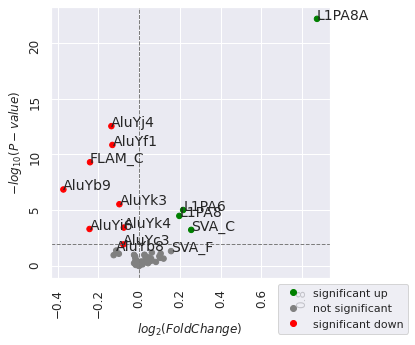

In [71]:
#left = GABA > GLU
#right = GLU > GABA
from bioinfokit import analys, visuz
cell_res['geneid'] = cell_res.index
normp_inadj = np.max(cell_res['pvalue'][cell_res['padj'] < 0.05])

# load dataset as pandas dataframe
visuz.GeneExpression.volcano(df=cell_res, lfc='log2FoldChange', pv='padj', dim = (5,5), dotsize=30, 
                             geneid = 'geneid', genenames = tuple(cell_res[cell_res['padj'] < 0.05]['geneid'].values), 
                             valpha = 1,gstyle=1, sign_line=True
                             ,plotlegend=True, legendpos='upper right',
                             legendanchor=(1.30,0), pv_thr = (normp_inadj,normp_inadj), lfc_thr=(0,0), 
                             axtickfontsize=12, axlabelfontsize=12, gfont=14, figtype='svg', figname=s_fig + '/ATEM_PE_celltype', show=True)
                            

In [12]:
ter.spear_adjp(l1_glu[0], l1_glu[1], 0.05)

stat      pval  adj_pval  geneid
L1PA6   0.269557  0.038962  0.160812   L1PA6
L1PA4   0.168678  0.201571  0.251964   L1PA4
L1PA7   0.202752  0.123538  0.176482   L1PA7
L1PA2   0.207286  0.115190  0.176482   L1PA2
L1PA5   0.258296  0.048244  0.160812   L1PA5
L1PA8A  0.217640  0.097748  0.176482  L1PA8A
L1PA8   0.324047  0.012288  0.122882   L1PA8
L1PA10 -0.021439  0.871957  0.871957  L1PA10
L1PA3   0.241331  0.065569  0.163922   L1PA3
L1HS    0.090320  0.496308  0.551453    L1HS

In [11]:
cell_lfc = cell_res['log2FoldChange'][cell_res.index.str.contains('L1')]
cell_lfc

L1PA6     0.216371
L1PA4     0.061157
L1PA7    -0.024415
L1PA2     0.059199
L1PA5    -0.099300
L1PA8A    0.873616
L1PA8     0.197672
L1PA10    0.106013
L1PA3     0.017310
L1HS      0.099561
Name: log2FoldChange, dtype: float64

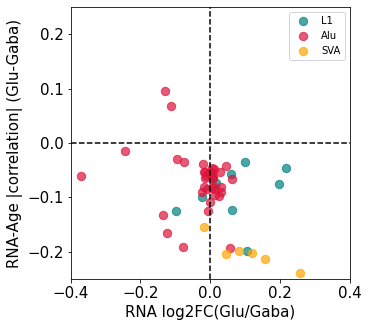

In [19]:
# Plot GLU/GABA logfoldchange against GLU/GABA correlation with age
# are there some TEs that show age effects only in one cell type?
fig,ax = plt.subplots(figsize=(5,5))
cell_lfc = cell_res['log2FoldChange'][cell_res.index.str.contains('L1')]
age_corr = (np.abs(ter.spear_adjp(l1_glu[0], l1_glu[1], 0.05)['stat'])) - np.abs((ter.spear_adjp(l1_gaba[0], l1_gaba[1], 0.05)['stat']))
plt.scatter(cell_lfc, age_corr, color='teal', label = 'L1', s=70, alpha=0.7)

cell_lfc = cell_res['log2FoldChange'][cell_res.index.str.contains('Alu')]
age_corr = (np.abs(ter.spear_adjp(alu_glu[0], alu_glu[1], 0.05)['stat'])) - np.abs((ter.spear_adjp(alu_gaba[0], alu_gaba[1], 0.05)['stat']))
plt.scatter(cell_lfc, age_corr, color='crimson', label = 'Alu', s=70, alpha=0.7)

cell_lfc = cell_res['log2FoldChange'][cell_res.index.str.contains('SVA')]
age_corr = (np.abs(ter.spear_adjp(sva_glu[0], sva_glu[1], 0.05)['stat'])) - np.abs((ter.spear_adjp(sva_gaba[0], sva_gaba[1], 0.05)['stat']))
plt.scatter(cell_lfc, age_corr, color='orange', label = 'SVA', s=70, alpha=0.7)
#make legend bigger
plt.legend()
#label axes
plt.xlabel('RNA log2FC(Glu/Gaba)', fontsize=15)
plt.ylabel('RNA-Age |correlation| (Glu-Gaba)', fontsize=15)
#draw horizontal and vertical lines at 0
plt.axhline(y=0, color='k', linestyle='--')
plt.axvline(x=0, color='k', linestyle='--')
#extend x and y limits
plt.xlim(-0.4,0.4)
plt.ylim(-0.25,0.25)
#mmake ticks bigger
plt.tick_params(axis='both', which='major', labelsize=15)
plt.savefig(s_fig + '/ATEM_PE_celltype_agecorr.svg', dpi=300, bbox_inches='tight', pad_inches=0, transparent=True)
plt.show()

In [1074]:
l1_df

celltype   Class               Comparison   p value  padj_sig  statistic
0        GLU   AluSp  infancy_Early_Childhood  0.087809     False  -1.873403
1        GLU   AluSp   infancy_Late_Childhood  0.222598     False  -1.338415
2        GLU   AluSp      infancy_Adolescence  0.007884     False  -3.096663
3        GLU   AluSp        infancy_Adulthood  0.011757     False  -2.786780
4        GLU   AluSp   infancy_Late_Adulthood  0.007953     False  -3.131306
..       ...     ...                      ...       ...       ...        ...
155     GABA  AluSc8  infancy_Early_Childhood  0.022438     False  -2.653694
156     GABA  AluSc8   infancy_Late_Childhood  0.158749     False  -1.577228
157     GABA  AluSc8      infancy_Adolescence  0.008343     False  -3.106402
158     GABA  AluSc8        infancy_Adulthood  0.006058     False  -3.160656
159     GABA  AluSc8   infancy_Late_Adulthood  0.001658     False  -3.951225

[160 rows x 6 columns]

In [87]:
l1_df

1105_GABA  1105_GLU  1133_GABA  1133_GLU  1134_GABA  1134_GLU  \
element                                                                  
L1PA6          837       784       1330      1517        925       986   
L1PA4         1758      1692       3056      2775       1980      2037   
L1PA7         1400      1191       2353      2023       1581      1394   
L1PA2          914       840       1558      1246       1004      1034   
L1PA5         1812      1383       2737      2308       2016      1703   
L1PA8A         195       247        282       548        227       364   
L1PA8          270       296        478       494        311       353   
L1PA10         306       248        323       399        214       302   
L1PA3         1714      1504       2863      2466       1935      1759   
L1HS          1278       915       3020      2567       1464      1613   

         1275_GABA  1275_GLU  1277_GABA  1277_GLU  ...  HCT15HBMA007_GLU  \
element                                            ...                     
L1PA6         1106       573        775       899  ...              1219   
L1PA4         2658      1664       1798      2007  ...              2826   
L1PA7         2108      1210       1419      1419  ...              1723   
L1PA2         1257       816        934      1013  ...              1252   
L1PA5         2149      1138       1753      1758  ...              2482   
L1PA8A         239       461        192       370  ...               886   
L1PA8          331       356        265       342  ...               379   
L1PA10         303       315        235       304  ...               269   
L1PA3         2162      1452       1692      1885  ...              2506   
L1HS          2185      1304       1475      1993  ...              1604   

         HCT15HBNA032_GLU  HCT16HCQA020_GABA  HCT16HCQA020_GLU  \
element                                                          
L1PA6                1707               1082              1055   
L1PA4                4282               2757              2769   
L1PA7                1985               1814              1370   
L1PA2                1958               1241              1216   
L1PA5                3403               2503              2279   
L1PA8A                800                501               779   
L1PA8                 587                292               331   
L1PA10                303                371               312   
L1PA3                3448               2344              2148   
L1HS                 2616               2063              1785   

         HCT17HEIA010_GABA  HCT17HEIA010_GLU  HCTYPA008_GABA  HCTYPA008_GLU  \
element                                                                       
L1PA6                 1129              1118            1233           1414   
L1PA4                 2746              2317            2998           3461   
L1PA7                 1892              1518            1891           1994   
L1PA2                 1208              1013            1212           1570   
L1PA5                 2522              1784            2818           2783   
L1PA8A                 386               575             350            917   
L1PA8                  370               347             358            536   
L1PA10                 446               364             372            413   
L1PA3                 2553              1973            2614           2706   
L1HS                  1607              1508            1597           1979   

         HCTZZNA014_GABA  HCTZZNA014_GLU  
element                                   
L1PA6               1135            1193  
L1PA4               2785            2570  
L1PA7               1802            1588  
L1PA2               1193            1107  
L1PA5               2617            2220  
L1PA8A               267             586  
L1PA8                396             468  
L1PA10               326             341  
L1PA3               2480           

In [106]:
#Compare the infancy -> adulthood effects in GLU vs GABA
cat_df = pd.concat([l1_df, alu_df, sva_df])
curr_df = cat_df[(cat_df['Comparison'] == 'infancy_Adulthood') & (cat_df['statistic']<0)]
curr_df

celltype   Class         Comparison   p value  padj_sig  statistic  \
3        GLU   L1PA6  infancy_Adulthood  0.006498     False  -3.056262   
8       GABA   L1PA6  infancy_Adulthood  0.009003     False  -2.971279   
13       GLU   L1PA4  infancy_Adulthood  0.014917     False  -2.676786   
18      GABA   L1PA4  infancy_Adulthood  0.014070     False  -2.755655   
28      GABA   L1PA7  infancy_Adulthood  0.002635     False  -3.555626   
38      GABA   L1PA2  infancy_Adulthood  0.001909     False  -3.708173   
43       GLU   L1PA5  infancy_Adulthood  0.003441     False  -3.339918   
48      GABA   L1PA5  infancy_Adulthood  0.005185     False  -3.234712   
53       GLU  L1PA8A  infancy_Adulthood  0.001331     False  -3.758183   
58      GABA  L1PA8A  infancy_Adulthood  0.086518     False  -1.826331   
63       GLU   L1PA8  infancy_Adulthood  0.003404     False  -3.344712   
68      GABA   L1PA8  infancy_Adulthood  0.009790     False  -2.931016   
73       GLU  L1PA10  infancy_Adulthood  0.089546     False  -1.789147   
88      GABA   L1PA3  infancy_Adulthood  0.013481     False  -2.776424   
93       GLU    L1HS  infancy_Adulthood  0.000275      True  -4.448797   
98      GABA    L1HS  infancy_Adulthood  0.000502      True  -4.344797   
3        GLU   AluSp  infancy_Adulthood  0.011757     False  -2.786780   
8       GABA   AluSp  infancy_Adulthood  0.007445     False  -3.062284   
13       GLU   AluJo  infancy_Adulthood  0.017363     False  -2.605957   
18      GABA   AluJo  infancy_Adulthood  0.004990     False  -3.252932   
23       GLU   AluJr  infancy_Adulthood  0.023949     False  -2.453961   
28      GABA   AluJr  infancy_Adulthood  0.005459     False  -3.210256   
33       GLU   AluSx  infancy_Adulthood  0.013011     False  -2.740092   
38      GABA   AluSx  infancy_Adulthood  0.006794     False  -3.105965   
43       GLU  AluSz6  infancy_Adulthood  0.013081     False  -2.737618   
48      GABA  AluSz6  infancy_Adulthood  0.006434     False  -3.132007   
53       GLU   AluSc  infancy_Adulthood  0.013642     False  -2.718218   
58      GABA   AluSc  infancy_Adulthood  0.005387     False  -3.216534   
63       GLU   AluSz  infancy_Adulthood  0.013031     False  -2.739398   
68      GABA   AluSz  infancy_Adulthood  0.004786     False  -3.272750   
73       GLU    AluY  infancy_Adulthood  0.012359     False  -2.763811   
78      GABA    AluY  infancy_Adulthood  0.008848     False  -2.979607   
83       GLU  AluSx3  infancy_Adulthood  0.014718     False  -2.683011   
88      GABA  AluSx3  infancy_Adulthood  0.007561     False  -3.054905   
93       GLU   AluSq  infancy_Adulthood  0.011082     False  -2.813913   
98      GABA   AluSq  infancy_Adulthood  0.008973     False  -2.972858   
103      GLU   AluJb  infancy_Adulthood  0.012598     False  -2.754973   
108     GABA   AluJb  infancy_Adulthood  0.005685     False  -3.190921   
113      GLU  AluSq2  infancy_Adulthood  0.010430     False  -2.841691   
118     GABA  AluSq2  infancy_Adulthood  0.006795     False  -3.105894   
123      GLU   AluSg  infancy_Adulthood  0.009035     False  -2.907161   
128     GABA   AluSg  infancy_Adulthood  0.007039     False  -3.089077   
133      GLU  AluJr4  infancy_Adulthood  0.032726     False  -2.303363   
138     GABA  AluJr4  infancy_Adulthood  0.003544     False  -3.415253   
143      GLU  AluSx1  infancy_Adulthood  0.014077     False  -2.703675   
148     GABA  AluSx1  infancy_Adulthood  0.005468     False  -3.209457   
153      GLU  AluSc8  infancy_Adulthood  0.013687     False  -2.716707   
158     GABA  AluSc8  infancy_Adulthood  0.006058     False  -3.160656   
3        GLU   SVA_D  infancy_Adulthood  0.048827     False  -2.105012   
8       GABA   SVA_D  infancy_Adulthood  0.093492     False  -1.783444   
13       GLU   SVA_F  infancy_Adulthood  0.174205     False  -1.411704   
18      GABA   SVA_F  infancy_Adulthood  0.105499     False  -1.715776   
28      GABA   SVA_B  infancy_Adulthood  0.035018     False  -2.303293   
33      

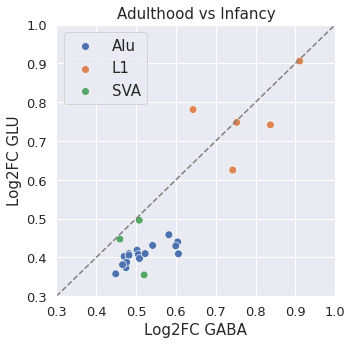

In [107]:
fig,ax = plt.subplots(figsize=(5,5))

plot_df = curr_df.pivot(index='Class', columns='celltype', values='l2fc')

ind = []
for i in plot_df.index:
    if 'L1' in i: ind.append(i[:2])
    else: ind.append(i[:3])
plot_df['family'] = ind
sns.scatterplot(data = plot_df, x='GABA', y='GLU', hue='family', s=60)
plt.plot([0.3, 1], [0.3, 1], linestyle='--', color='gray')
plt.xlim(0.3,1)
plt.ylim(0.3,1)
plt.legend(fontsize=15)
#set title
ax.set_title('Adulthood vs Infancy', fontsize=15)
#change y label
ax.set_ylabel('Log2FC GLU', fontsize=15)
#remove x label
ax.set_xlabel('Log2FC GABA', fontsize=15)
ax.tick_params(axis='both', which='major', labelsize=13)
plt.savefig(s_code + 'prac.svg', bbox_inches='tight', dpi=300, transparent=False)
plt.show()

In [110]:
2**-2

0.25

In [1151]:
test_df = plot_df[(np.isnan(plot_df['GLU']) | np.isnan(plot_df['GABA']))==False]
test_df

celltype      GABA       GLU family
Class                              
AluJb    -0.582298 -0.458556    Alu
AluJo    -0.604426 -0.440052    Alu
AluJr    -0.599712 -0.429767    Alu
AluJr4   -0.606392 -0.409507    Alu
AluSc    -0.448987 -0.357940    Alu
AluSc8   -0.474717 -0.373692    Alu
AluSg    -0.470143 -0.402969    Alu
AluSp    -0.502612 -0.418930    Alu
AluSq    -0.481968 -0.409911    Alu
AluSq2   -0.482327 -0.405973    Alu
AluSx    -0.505776 -0.407853    Alu
AluSx1   -0.508696 -0.397322    Alu
AluSx3   -0.476439 -0.387603    Alu
AluSz    -0.522913 -0.409962    Alu
AluSz6   -0.541592 -0.431017    Alu
AluY     -0.466140 -0.381354    Alu
L1HS     -0.910595 -0.905897     L1
L1PA4    -0.742649 -0.625192     L1
L1PA5    -0.837051 -0.741541     L1
L1PA6    -0.752566 -0.747909     L1
L1PA8    -0.642944 -0.780908     L1
L1PA8A   -0.409731 -1.436160     L1
SVA_D    -0.508116 -0.496000    SVA
SVA_E    -0.459515 -0.447454    SVA
SVA_F    -0.520281 -0.355054    SVA

In [1154]:
p,t = ter.paired_test(test_df['GABA'], test_df['GLU'])
p,t

(153.0, 0.002035157807278379)

### RNA-loci: chromosome

In [173]:
# Visualise significant RNA age-up regions on chromosomes
# load chromosome file
file = pd.read_csv('/cndd3/dburrows/DATA/annotations/rmsk/rmsk.hg38.bed')
file_sm = pd.read_csv('/cndd3/dburrows/DATA/annotations/rmsk/rmsk.hg38.filt-5ptrim.merge.bed', sep='\t', header=None)
file_sm = file_sm.rename(columns={0:'genoName', 5:'repFamily',8:'genoStart', 9: 'genoEnd', 4:'repName'})
hg38 = pd.read_csv('/cndd2/jchien/iGenome/hg38/hg38.chrom_1-X.sizes', sep= '\t', header=None, index_col=0)
centromeres = pd.read_csv('/cndd3/dburrows/DATA/annotations/genome/hg38/hg38.centromere.bed', sep= '\t', header=None, index_col=0)

# #Load in histogram for INF and ADU
# chroms=[f'chr{i+1}' for i in range(22)]+['chrX'] #+ ['chrY']


# #GABA L1
# fam='L1'
# INF_l = ter.count_genomeregion(meta,hg38, chroms, period='Infancy', celltype='GABA', fam=fam)
# EC_l = ter.count_genomeregion(meta,hg38, chroms, period='Early_Childhood', celltype='GABA', fam=fam)
# ADO_l = ter.count_genomeregion(meta,hg38, chroms, period='Adolescence', celltype='GABA', fam=fam)
# ADU_l = ter.count_genomeregion(meta,hg38, chroms, period='Adulthood', celltype='GABA', fam=fam)
# LADU_l = ter.count_genomeregion(meta,hg38, chroms, period='Late_Adulthood', celltype='GABA', fam=fam)

# inf_ec = ter.young_old_histcomp(INF_l[1], EC_l[1])
# inf_ado = ter.young_old_histcomp(INF_l[1], ADO_l[1])
# inf_adu = ter.young_old_histcomp(INF_l[1], ADU_l[1])
# inf_ladu = ter.young_old_histcomp(INF_l[1], LADU_l[1])



In [174]:
def do(curr):
    chroms=[f'chr{i+1}' for i in range(22)]+['chrX'] #+ ['chrY']
    # curr_chr = chroms[0]
    # curr_chr

    #split up into bins
    binsize = 1e6
    curr['centre'] = (curr['genoStart'] + curr['genoEnd']) / 2
    curr['binned'] = (curr['centre']//binsize)*binsize/1e6
    curr

    hist = curr.groupby(['genoName', 'binned'])['genoStart'].count()
    hist=hist.unstack()
    hist = hist.loc[[c for c in chroms if c in hist.index]]
    #hist = hist.T

    import seaborn as sns
    cmap=plt.cm.Reds.copy()
    cmap.set_bad('white')
    fig,ax = plt.subplots(figsize=(10,10))
    ax=sns.heatmap(hist,
                cmap=cmap,
                vmin=0,
    #                 vmax=150,
                vmax=hist.iloc[:-1].quantile(.95).max(),
               cbar_kws={'shrink':.5,'label':'n TEs per Mbp',
                        'location':'right','anchor':(-2,.2)})#,
                    # ax=ax)

    ax.set_xlabel('Position (Mbp)', fontsize=20)
    ax.set_xticks(np.arange(0,300,50),labels=np.arange(0,300,50))
    plt.xticks(fontsize=15, rotation = 0)
    plt.yticks(fontsize=15)

    hg38_ = hg38.copy()
    hg38_['length_mbp']=hg38_.iloc[:,0]/1e6
    ax.barh(y=np.arange(len(chroms))+0.5,width=hg38_.loc[chroms,'length_mbp'],
           height=1,color=(0,0,0,0),edgecolor='k'
          )
    ax.set_ylabel('')
    for ichrom,chrom in enumerate(chroms):
        cu = centromeres[centromeres.index==chrom]
        cu_start, cu_end = cu.iloc[0][1], cu.iloc[1][2]
        #       print(ichrom+0.5,cu.iloc[i]['end'],cu.iloc[i]['start'])
        ax.barh(y=ichrom+0.5,width=(cu_end-cu_start)/1e6,left=cu_start/1e6,
               height=1,color='k',edgecolor='k'
              )
    #       ax.plot(cu.iloc[i][['start','end']]/1e6, [ichrom+.5,ichrom+.5], 'k-',markersize=5,linewidth=5,)

    cbar = ax.collections[0].colorbar
    cbar.ax.tick_params(labelsize=15)  # You can adjust the label size as needed (e.g., 15)
    cbar.set_label('n TEs per Mbp', fontsize=20) 
    # Show the plot
    #plt.savefig('prac.svg', transparent=True)
    plt.show()


/tmp/ipykernel_133717/1307679977.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  curr['centre'] = (curr['genoStart'] + curr['genoEnd']) / 2
/tmp/ipykernel_133717/1307679977.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  curr['binned'] = (curr['centre']//binsize)*binsize/1e6


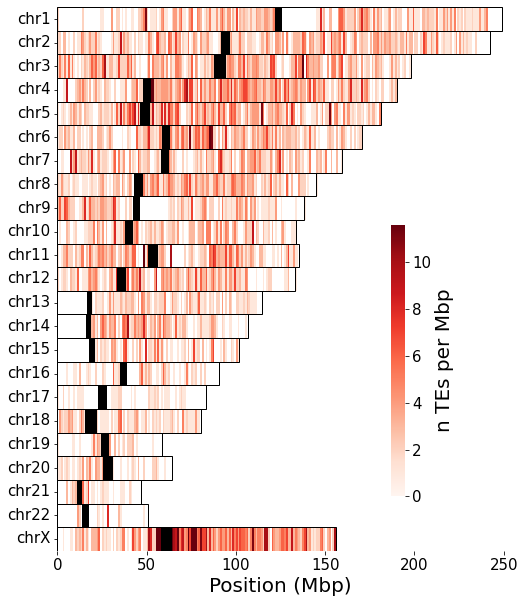

In [175]:
#L1 expression in genome
curr = file_sm[file_sm['repFamily'] == 'L1']
do(curr)

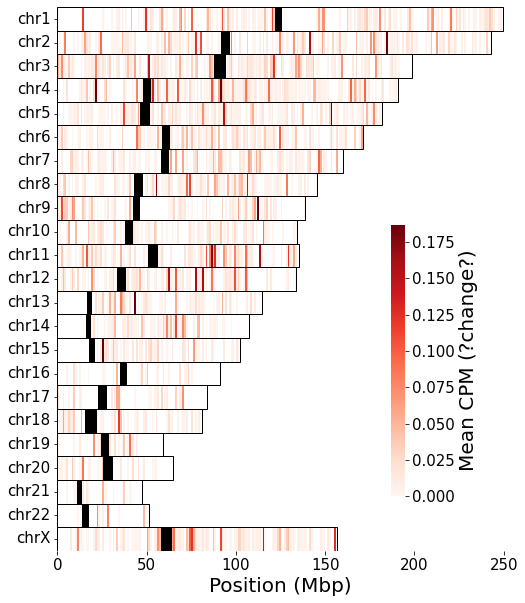

In [176]:
#Infancy RNA expression at L1
ter.ideogram(INF_l[0], hg38, chroms, centromeres, thresh=0)

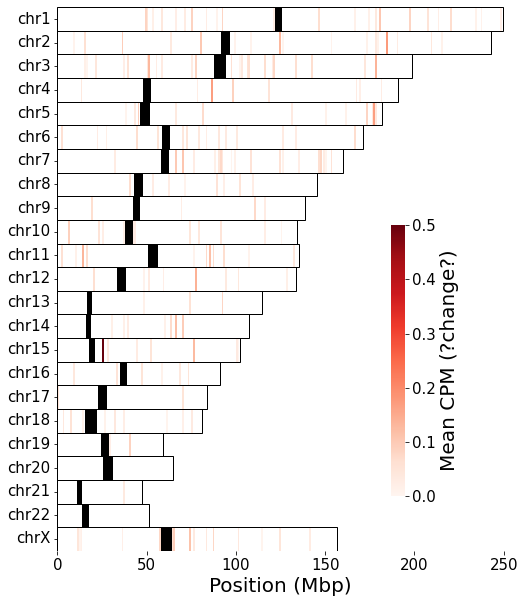

In [160]:
#Plot significant RNA age-up regions - infancy -> early childhood
diff_ = EC_l[0] - INF_l[0]
ter.ideogram(diff_[inf_ec], hg38, chroms, centromeres, thresh=0)

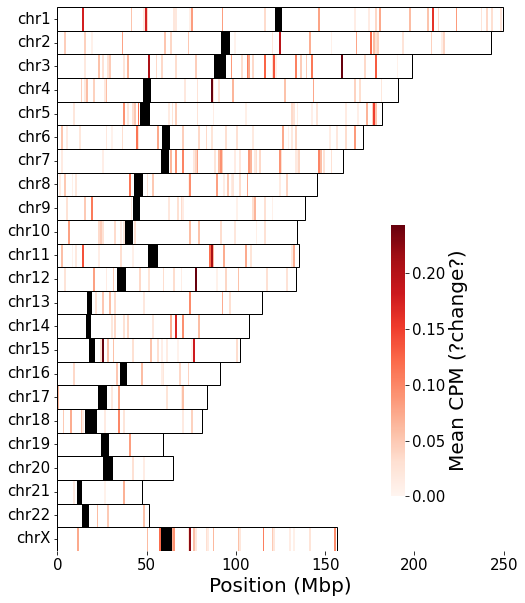

In [163]:
#Plot significant RNA age-up regions - infancy -> adulthood
diff_ = LADU_l[0] - INF_l[0]
ter.ideogram(diff_[inf_ladu], hg38, chroms, centromeres, thresh=0)

In [177]:
#GABA Alu
fam='Alu'
INF_l = ter.count_genomeregion(meta,hg38, chroms, period='Infancy', celltype='GABA', fam=fam)
ADO_l = ter.count_genomeregion(meta,hg38, chroms, period='Adolescence', celltype='GABA', fam=fam)
ADU_l = ter.count_genomeregion(meta,hg38, chroms, period='Adulthood', celltype='GABA', fam=fam)

inf_ado = ter.young_old_histcomp(INF_l[1], ADO_l[1])
inf_adu = ter.young_old_histcomp(INF_l[1], ADU_l[1])

/home/dburrows/mambaforge/envs/base_conda/lib/python3.9/site-packages/scipy/stats/morestats.py:1757: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "


/tmp/ipykernel_133717/1307679977.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  curr['centre'] = (curr['genoStart'] + curr['genoEnd']) / 2
/tmp/ipykernel_133717/1307679977.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  curr['binned'] = (curr['centre']//binsize)*binsize/1e6


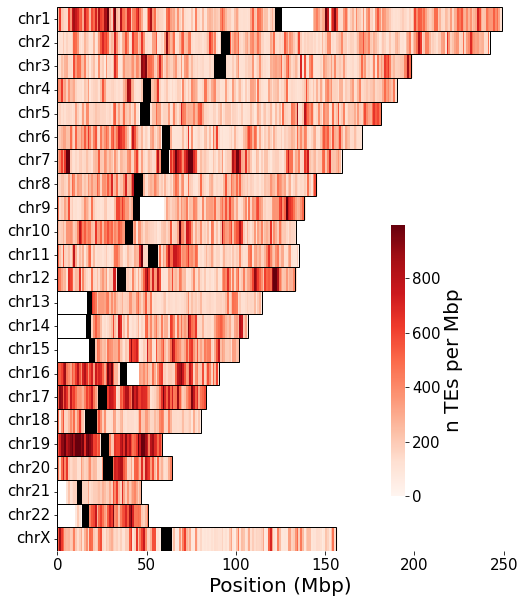

In [178]:
#Alu expression in genome
curr = file_sm[file_sm['repFamily'] == 'Alu']
do(curr)

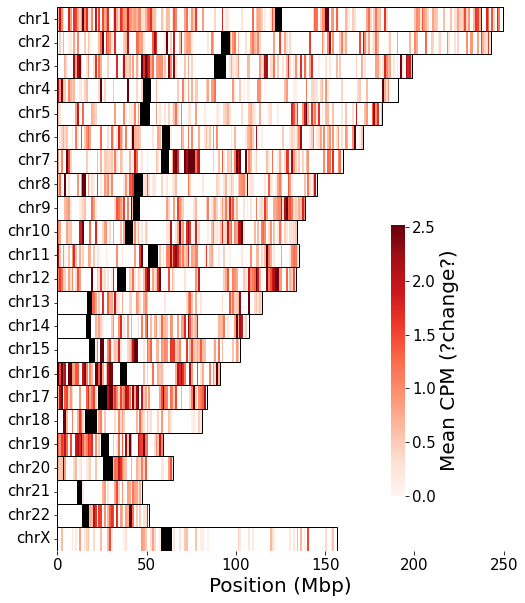

In [179]:
#Plot significant ALu RNA age-up regions - infancy -> adolescence
diff_ = ADO_l[0] - INF_l[0]
ter.ideogram(diff_[inf_ado], hg38, chroms, centromeres, thresh=0)

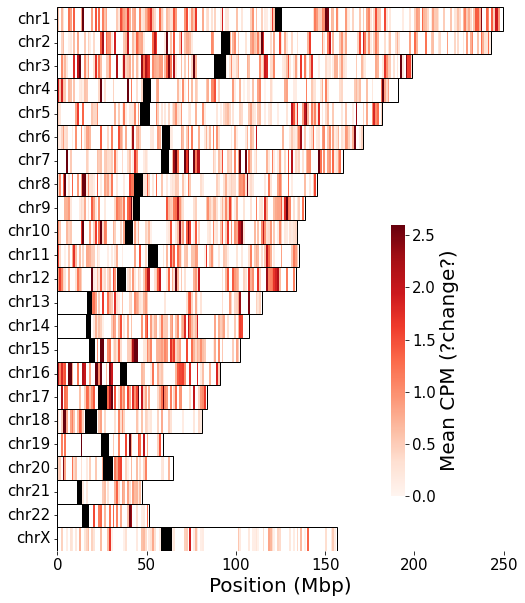

In [180]:
#Plot significant ALu RNA age-up regions - infancy -> adolescence
diff_ = ADU_l[0] - INF_l[0]
ter.ideogram(diff_[inf_adu], hg38, chroms, centromeres, thresh=0)

In [181]:
#GABA SVA
fam='SVA'
INF_l = ter.count_genomeregion(meta,hg38, chroms, period='Infancy', celltype='GABA', fam=fam)
LADU_l = ter.count_genomeregion(meta,hg38, chroms, period='Late_Adulthood', celltype='GABA', fam=fam)
inf_ladu = ter.young_old_histcomp(INF_l[1], LADU_l[1])

/home/dburrows/mambaforge/envs/base_conda/lib/python3.9/site-packages/scipy/stats/morestats.py:1757: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "


/tmp/ipykernel_133717/1307679977.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  curr['centre'] = (curr['genoStart'] + curr['genoEnd']) / 2
/tmp/ipykernel_133717/1307679977.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  curr['binned'] = (curr['centre']//binsize)*binsize/1e6


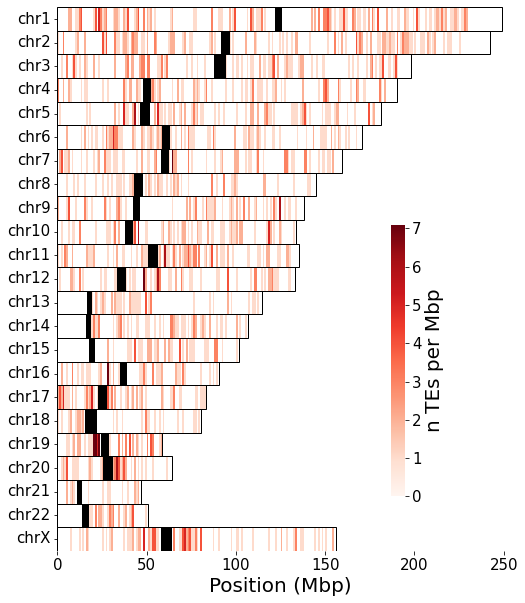

In [182]:
#SVA expression in genome
curr = file_sm[file_sm['repFamily'] == 'SVA']
do(curr)

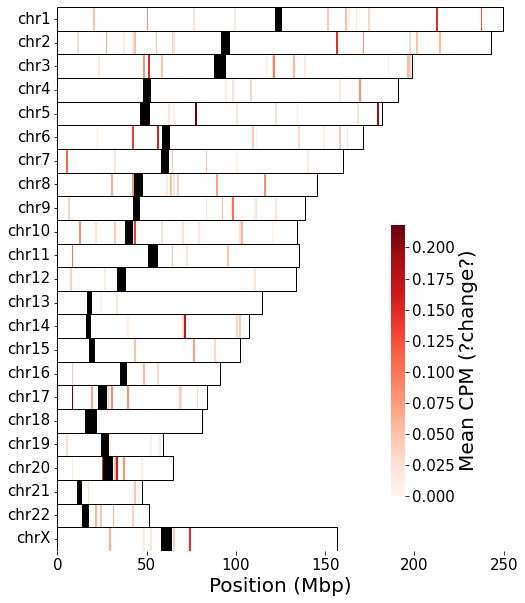

In [183]:
#Plot significant ALu RNA age-up regions - infancy -> adolescence
diff_ = LADU_l[0] - INF_l[0]
ter.ideogram(diff_[inf_ladu], hg38, chroms, centromeres, thresh=0)

In [324]:
#Distributions across chromosomes
#====================================

#Group by chromosome across samples
#====================================
mode='CPM'
ID_l = meta_['sample'].values
parent_path = '/cndd/dburrows/DATA/te/rna/PE.counts/ATEM/'
full_df = pd.DataFrame()
for ID in ID_l:
    ATEM_path = '/cndd/dburrows/DATA/te/rna/PE.counts/ATEM/Sample_' + ID + '/ATEM_counts.csv'
    count_mat = pd.read_csv(ATEM_path, sep="\t", header=0) 
    chr_list = [i for i in count_mat['Chromosome'].unique() if len(i) < 6]
    for chr in chr_list:
        curr_ = count_mat[count_mat['Chromosome'] == chr]
        sumd_ = curr_.groupby('gene_id').sum()
        sumd_['Chromosome'] = np.full(len(sumd_), chr)
        sumd_['Sample'] = np.full(len(sumd_), ID)
        sumd_['age'] = np.full(len(sumd_), meta_[meta_['sample'] == ID]['age'].values[0])
        sumd_['celltype'] = np.full(len(sumd_), meta_[meta_['sample'] == ID]['celltype'].values[0])
        sumd_['period'] = np.full(len(sumd_), meta_[meta_['sample'] == ID]['period'].values[0])
        newv = []
        for i in sumd_.index.values: 
            if 'L1' in i: newv = np.append(newv, i[:2])
            else: newv = np.append(newv, i[:3])
        sumd_['Family'] = newv
        if chr == chr_list[0]: sum_df = sumd_
        else: sum_df = pd.concat([sum_df, sumd_], axis=0)
    full_df = pd.concat([full_df, sum_df], axis=0)
full_df.drop(['Start', 'End'], axis=1, inplace=True)
full_df = full_df.drop(np.append(full_df[full_df['Family'] == 'FRA'].index.values,full_df[full_df['Family'] == 'FLA'].index.values))
full_df.to_csv('/cndd/dburrows/DATA/te/rna/PE.counts/DE/ATEM_chr_counts.csv')

In [615]:
pd.DataFrame(full_df.groupby('Family').sum()['CPM']).loc[full_df['Family']]['CPM'].values
#Normalise by total reads of a family

array([512976.79913534, 512976.79913534, 512976.79913534, ...,
         2825.98201386,   2825.98201386,   2825.98201386])

In [623]:
full_df = pd.read_csv('/cndd/dburrows/DATA/te/rna/PE.counts/DE/ATEM_chr_counts.csv')

#NORMALISE BY CHR LENGTH and remove chry
length_df = pd.read_csv('/cndd3/dburrows/DATA/annotations/genome/hg38/hg38.chrom_1-X.sizes', sep = '\t', header=None, index_col=0)
#Normalise by chromosome length
full_df = full_df[full_df['Chromosome'].isin(['chrY']) == False]
full_df['chrlength'] = length_df.loc[full_df['Chromosome']].values
full_df['CPM_normlength'] = (full_df['CPM']/full_df['chrlength'])*1e6
full_df['CPM_normlength_normTE'] = (full_df['CPM_normlength']/pd.DataFrame(full_df.groupby('Family').mean()['CPM']).loc[full_df['Family']]['CPM'].values)

#Normalise by total reads of a family

full_df

gene_id         Count        CPM Chromosome          Sample    age  \
0        AluJb  16667.466667  44.508650       chr1       1105_GABA  16.93   
1        AluJo   8410.400000  22.459055       chr1       1105_GABA  16.93   
2        AluJr   9033.700000  24.123509       chr1       1105_GABA  16.93   
3       AluJr4   2339.500000   6.247379       chr1       1105_GABA  16.93   
4        AluSc   3714.883333   9.920190       chr1       1105_GABA  16.93   
...        ...           ...        ...        ...             ...    ...   
170822   SVA_B     40.000000   0.154292       chrX  HCTZZNA014_GLU  39.19   
170823   SVA_C     21.000000   0.081003       chrX  HCTZZNA014_GLU  39.19   
170824   SVA_D    184.500000   0.711671       chrX  HCTZZNA014_GLU  39.19   
170825   SVA_E     29.000000   0.111862       chrX  HCTZZNA014_GLU  39.19   
170826   SVA_F     39.500000   0.152363       chrX  HCTZZNA014_GLU  39.19   

       celltype       period Family  chrlength  CPM_normlength  \
0          GABA  Adolescence    Alu  248956422        0.178781   
1          GABA  Adolescence    Alu  248956422        0.090213   
2          GABA  Adolescence    Alu  248956422        0.096899   
3          GABA  Adolescence    Alu  248956422        0.025094   
4          GABA  Adolescence    Alu  248956422        0.039847   
...         ...          ...    ...        ...             ...   
170822      GLU    Adulthood    SVA  156040895        0.000989   
170823      GLU    Adulthood    SVA  156040895        0.000519   
170824      GLU    Adulthood    SVA  156040895        0.004561   
170825      GLU    Adulthood    SVA  156040895        0.000717   
170826      GLU    Adulthood    SVA  156040895        0.000976   

        CPM_normlength_normTE  
0                    0.038897  
1                    0.019627  
2                    0.021082  
3                    0.005460  
4                    0.008669  
...                       ...  
170822               0.005118  
170823               0.002687  
170824               0.023606  
170825               0.003710  
170826               0.005054  

[166408 rows x 12 columns]

In [542]:
full_df['Family'].unique()

array(['Alu', 'L1', 'SVA'], dtype=object)

In [539]:
full_df

gene_id         Count        CPM Chromosome          Sample    age  \
0        AluJb  16667.466667  44.508650       chr1       1105_GABA  16.93   
1        AluJo   8410.400000  22.459055       chr1       1105_GABA  16.93   
2        AluJr   9033.700000  24.123509       chr1       1105_GABA  16.93   
3       AluJr4   2339.500000   6.247379       chr1       1105_GABA  16.93   
4        AluSc   3714.883333   9.920190       chr1       1105_GABA  16.93   
...        ...           ...        ...        ...             ...    ...   
170822   SVA_B     40.000000   0.154292       chrX  HCTZZNA014_GLU  39.19   
170823   SVA_C     21.000000   0.081003       chrX  HCTZZNA014_GLU  39.19   
170824   SVA_D    184.500000   0.711671       chrX  HCTZZNA014_GLU  39.19   
170825   SVA_E     29.000000   0.111862       chrX  HCTZZNA014_GLU  39.19   
170826   SVA_F     39.500000   0.152363       chrX  HCTZZNA014_GLU  39.19   

       celltype       period Family  chrlength  CPM_normlength  
0          GABA  Adolescence    Alu  248956422        0.178781  
1          GABA  Adolescence    Alu  248956422        0.090213  
2          GABA  Adolescence    Alu  248956422        0.096899  
3          GABA  Adolescence    Alu  248956422        0.025094  
4          GABA  Adolescence    Alu  248956422        0.039847  
...         ...          ...    ...        ...             ...  
170822      GLU    Adulthood    SVA  156040895        0.000989  
170823      GLU    Adulthood    SVA  156040895        0.000519  
170824      GLU    Adulthood    SVA  156040895        0.004561  
170825      GLU    Adulthood    SVA  156040895        0.000717  
170826      GLU    Adulthood    SVA  156040895        0.000976  

[166408 rows x 11 columns]

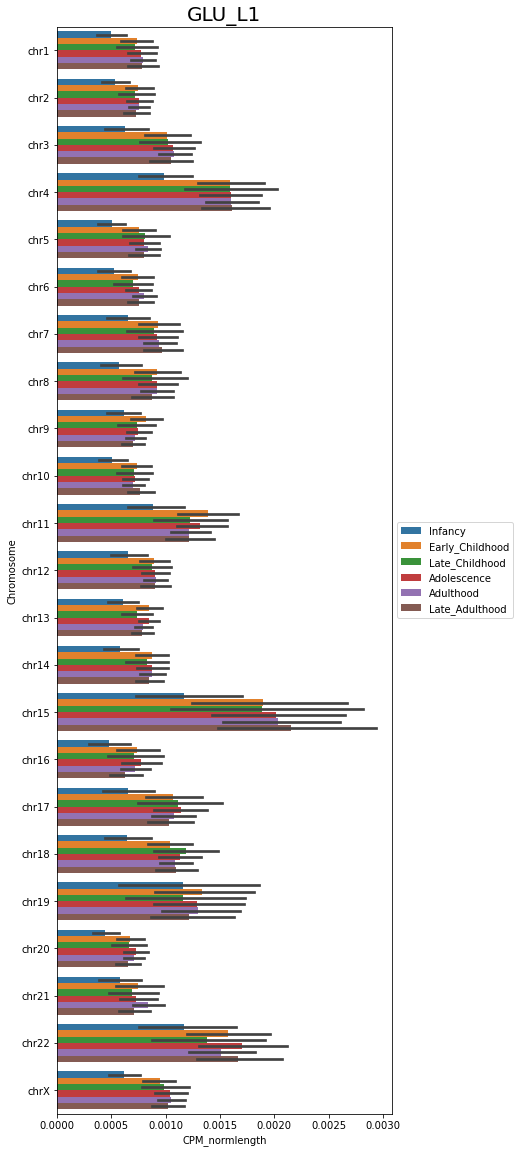

In [533]:
# Chr accumulation differences by age
#==============================================
chr_li = ['chr'+str(i) for i in np.arange(1, 23)]
chr_li.append('chrX')

cell = 'GLU'
clss = 'L1'
fig,ax = plt.subplots(figsize=(6, 20))
sns.barplot(data=full_df[(full_df['celltype']==cell) & (full_df['Family'] == clss)], x='CPM_normlength', y = 'Chromosome', hue = 'period'
            , order = chr_li,
            hue_order=['Infancy', 'Early_Childhood', 'Late_Childhood', 'Adolescence', 'Adulthood', 'Late_Adulthood'])

#move legend
plt.title(cell + '_' + clss, fontsize=20)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()


In [639]:
#calculat mean difference between INF vs LA
la_df = full_df.groupby(['period', 'Family','Chromosome','celltype']).mean().loc['Late_Adulthood']['CPM_normlength']
inf_df = full_df.groupby(['period', 'Family', 'Chromosome','celltype']).mean().loc['Infancy']['CPM_normlength']
diff_df = la_df - inf_df
diff_df = pd.DataFrame(diff_df)
diff_df.rename(columns={'CPM_normlength': 'CPMnl_diff'}, inplace=True)
diff_df = diff_df.reset_index()
diff_df

Family Chromosome celltype  CPMnl_diff
0      Alu       chr1     GABA    0.015203
1      Alu       chr1      GLU    0.010950
2      Alu      chr10     GABA    0.016633
3      Alu      chr10      GLU    0.012614
4      Alu      chr11     GABA    0.012316
..     ...        ...      ...         ...
133    SVA       chr8      GLU    0.000422
134    SVA       chr9     GABA    0.000505
135    SVA       chr9      GLU    0.000317
136    SVA       chrX     GABA    0.000495
137    SVA       chrX      GLU    0.000477

[138 rows x 4 columns]

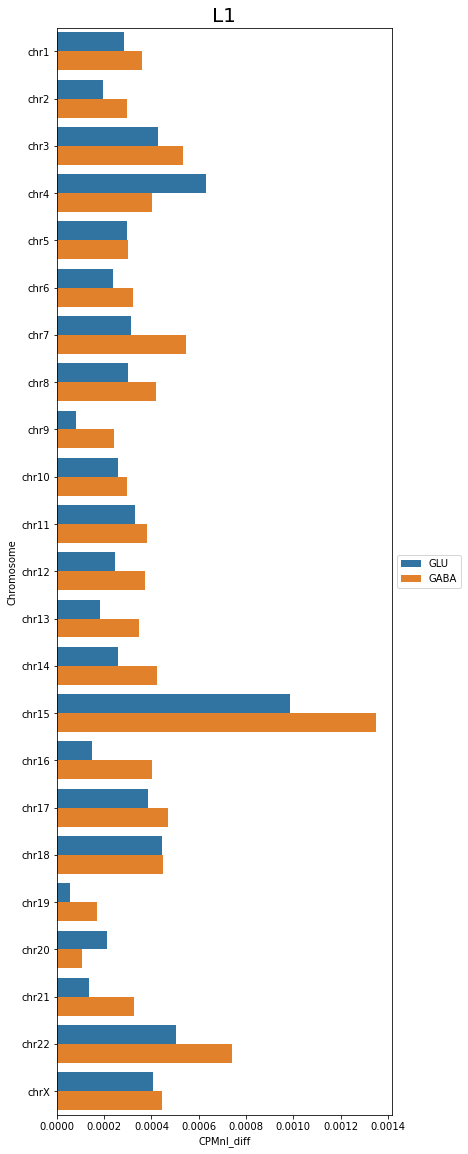

In [594]:
# INF - LA RNA differences by celltype
#========================================
chr_li = ['chr'+str(i) for i in np.arange(1, 23)]
chr_li.append('chrX')

clss = 'L1'
fig,ax = plt.subplots(figsize=(6, 20))
sns.barplot(data=diff_df[diff_df['Family']==clss], x='CPMnl_diff', y = 'Chromosome', hue = 'celltype'
            , order = chr_li,
            hue_order=['GLU', 'GABA'])

#move legend
plt.title(clss, fontsize=20)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()


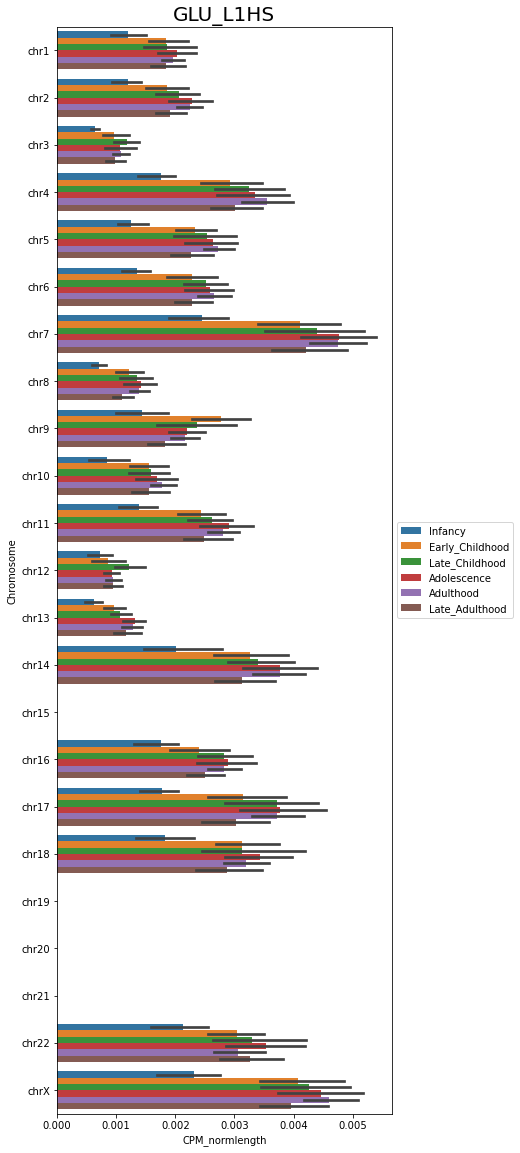

In [644]:
# Chr accumulation differences by age
#L1HS only
#==============================================
chr_li = ['chr'+str(i) for i in np.arange(1, 23)]
chr_li.append('chrX')

cell = 'GLU'
clss = 'L1HS'
fig,ax = plt.subplots(figsize=(6, 20))
sns.barplot(data=full_df[(full_df['celltype']==cell) & (full_df['gene_id'] == clss)], x='CPM_normlength', y = 'Chromosome', hue = 'period'
            , order = chr_li,
            hue_order=['Infancy', 'Early_Childhood', 'Late_Childhood', 'Adolescence', 'Adulthood', 'Late_Adulthood'])

#move legend
plt.title(cell + '_' + clss, fontsize=20)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()


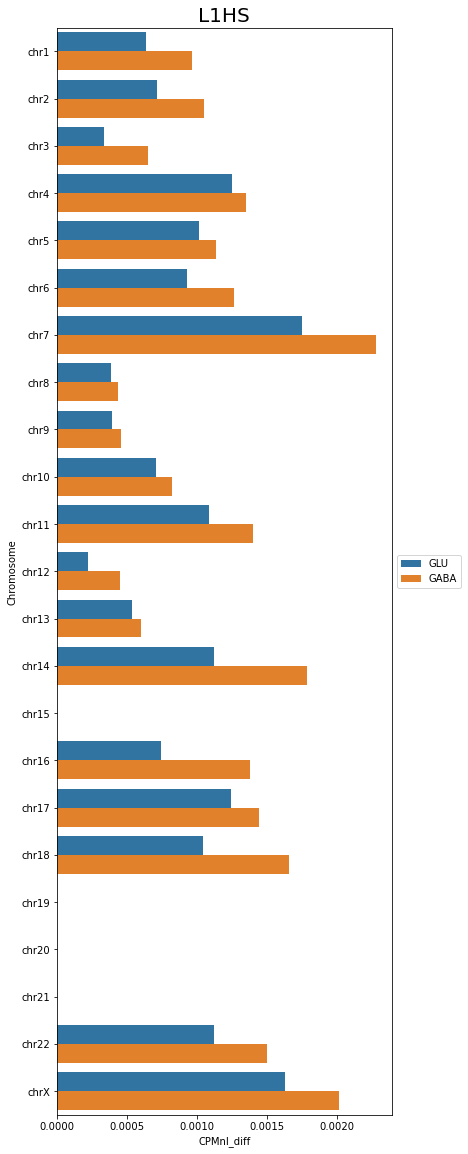

In [646]:
#calculat mean difference between INF vs LA in L1HS
la_df = full_df.groupby(['period', 'gene_id','Chromosome','celltype']).mean().loc['Late_Adulthood'].loc['L1HS']['CPM_normlength']
inf_df = full_df.groupby(['period', 'gene_id', 'Chromosome','celltype']).mean().loc['Infancy'].loc['L1HS']['CPM_normlength']
diff_df = la_df - inf_df
diff_df = pd.DataFrame(diff_df)
diff_df.rename(columns={'CPM_normlength': 'CPMnl_diff'}, inplace=True)
diff_df = diff_df.reset_index()

# INF - LA RNA differences by celltype
#========================================
chr_li = ['chr'+str(i) for i in np.arange(1, 23)]
chr_li.append('chrX')

clss = 'L1HS'
fig,ax = plt.subplots(figsize=(6, 20))
sns.barplot(data=diff_df, x='CPMnl_diff', y = 'Chromosome', hue = 'celltype'
            , order = chr_li,
            hue_order=['GLU', 'GABA'])

#move legend
plt.title(clss, fontsize=20)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()


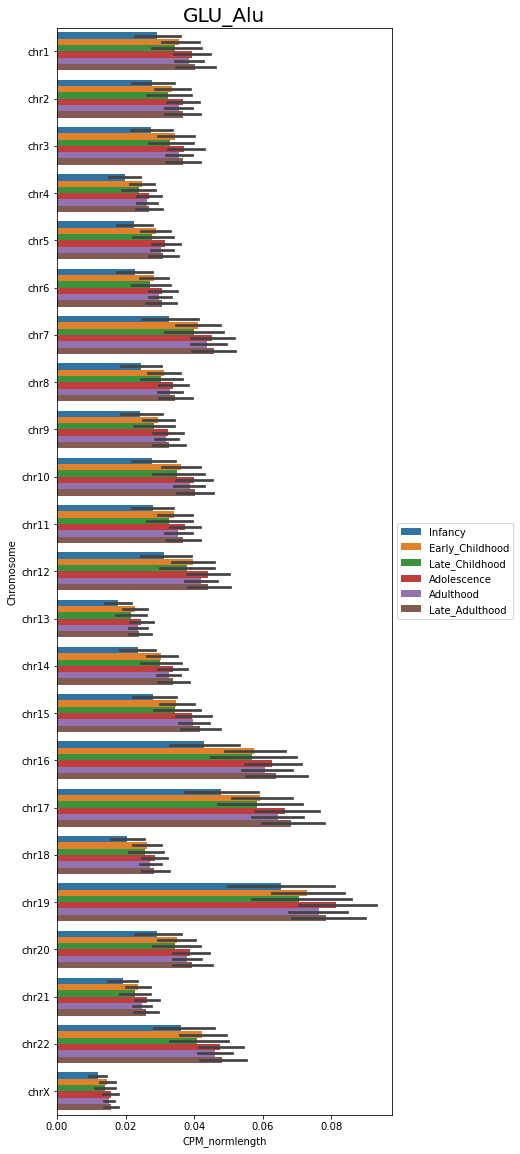

In [595]:
# Chr accumulation differences by age
#==============================================
chr_li = ['chr'+str(i) for i in np.arange(1, 23)]
chr_li.append('chrX')

cell = 'GLU'
clss = 'Alu'
fig,ax = plt.subplots(figsize=(6, 20))
sns.barplot(data=full_df[(full_df['celltype']==cell) & (full_df['Family'] == clss)], x='CPM_normlength', y = 'Chromosome', hue = 'period'
            , order = chr_li,
            hue_order=['Infancy', 'Early_Childhood', 'Late_Childhood', 'Adolescence', 'Adulthood', 'Late_Adulthood'])

#move legend
plt.title(cell + '_' + clss, fontsize=20)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()


In [643]:
#calculat mean difference between INF vs LA in L1HS
la_df = full_df.groupby(['period', 'gene_id','Chromosome','celltype']).mean().loc['Late_Adulthood'].loc['L1HS']['CPM_normlength']
inf_df = full_df.groupby(['period', 'gene_id', 'Chromosome','celltype']).mean().loc['Infancy'].loc['L1HS']['CPM_normlength']
diff_df = la_df - inf_df
diff_df = pd.DataFrame(diff_df)
diff_df.rename(columns={'CPM_normlength': 'CPMnl_diff'}, inplace=True)
diff_df = diff_df.reset_index()
di
# INF - LA RNA differences by celltype
#========================================
chr_li = ['chr'+str(i) for i in np.arange(1, 23)]
chr_li.append('chrX')

clss = 'L1'
fig,ax = plt.subplots(figsize=(6, 20))
sns.barplot(data=diff_df[diff_df['Family']==clss], x='CPMnl_diff', y = 'Chromosome', hue = 'celltype'
            , order = chr_li,
            hue_order=['GLU', 'GABA'])

#move legend
plt.title(clss, fontsize=20)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()


Chromosome celltype  CPMnl_diff
0        chr1     GABA    0.000965
1        chr1      GLU    0.000634
2       chr10     GABA    0.000819
3       chr10      GLU    0.000707
4       chr11     GABA    0.001400
5       chr11      GLU    0.001089
6       chr12     GABA    0.000448
7       chr12      GLU    0.000223
8       chr13     GABA    0.000599
9       chr13      GLU    0.000538
10      chr14     GABA    0.001787
11      chr14      GLU    0.001121
12      chr16     GABA    0.001381
13      chr16      GLU    0.000744
14      chr17     GABA    0.001442
15      chr17      GLU    0.001240
16      chr18     GABA    0.001659
17      chr18      GLU    0.001046
18       chr2     GABA    0.001053
19       chr2      GLU    0.000718
20      chr22     GABA    0.001503
21      chr22      GLU    0.001120
22       chr3     GABA    0.000649
23       chr3      GLU    0.000339
24       chr4     GABA    0.001348
25       chr4      GLU    0.001250
26       chr5     GABA    0.001134
27       chr5      GLU    0.001015
28       chr6     GABA    0.001268
29       chr6      GLU    0.000932
30       chr7     GABA    0.002278
31       chr7      GLU    0.001753
32       chr8     GABA    0.000438
33       chr8      GLU    0.000386
34       chr9     GABA    0.000455
35       chr9      GLU    0.000392
36       chrX     GABA    0.002016
37       chrX      GLU    0.001632

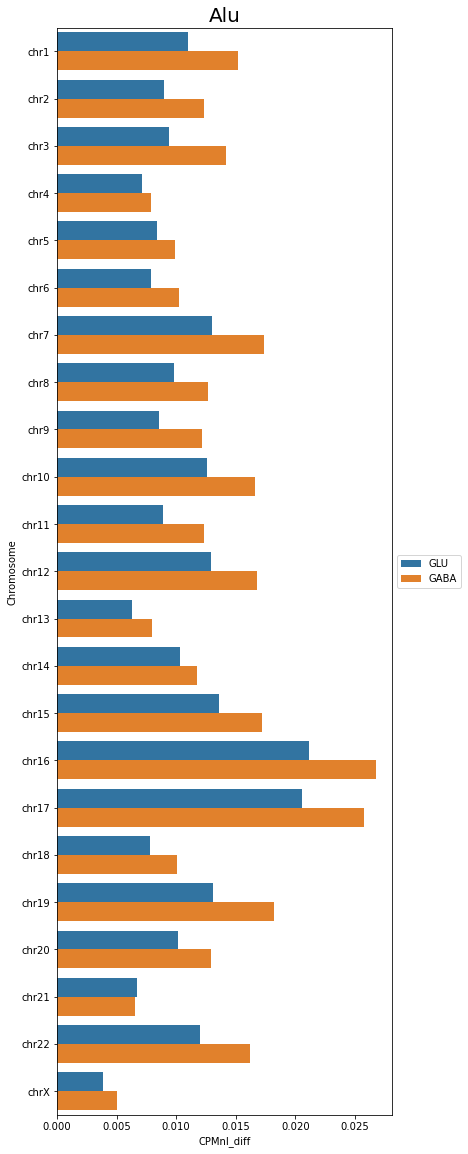

In [597]:
# INF - LA RNA differences by celltype
#========================================
chr_li = ['chr'+str(i) for i in np.arange(1, 23)]
chr_li.append('chrX')

clss = 'Alu'
fig,ax = plt.subplots(figsize=(6, 20))
sns.barplot(data=diff_df[diff_df['Family']==clss], x='CPMnl_diff', y = 'Chromosome', hue = 'celltype'
            , order = chr_li,
            hue_order=['GLU', 'GABA'])

#move legend
plt.title(clss, fontsize=20)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()


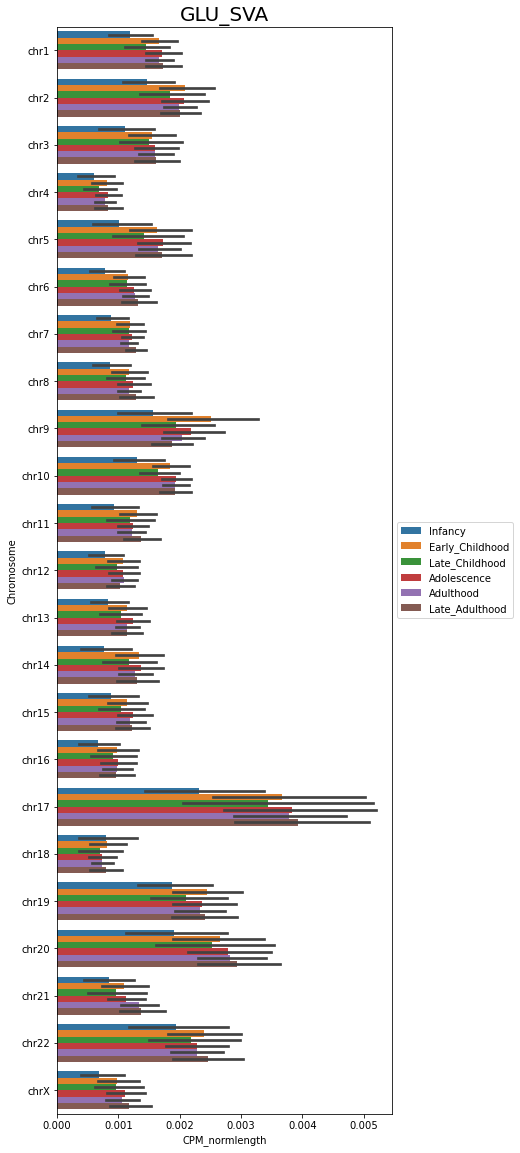

In [598]:
# Chr accumulation differences by age
#==============================================
chr_li = ['chr'+str(i) for i in np.arange(1, 23)]
chr_li.append('chrX')

cell = 'GLU'
clss = 'SVA'
fig,ax = plt.subplots(figsize=(6, 20))
sns.barplot(data=full_df[(full_df['celltype']==cell) & (full_df['Family'] == clss)], x='CPM_normlength', y = 'Chromosome', hue = 'period'
            , order = chr_li,
            hue_order=['Infancy', 'Early_Childhood', 'Late_Childhood', 'Adolescence', 'Adulthood', 'Late_Adulthood'])

#move legend
plt.title(cell + '_' + clss, fontsize=20)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

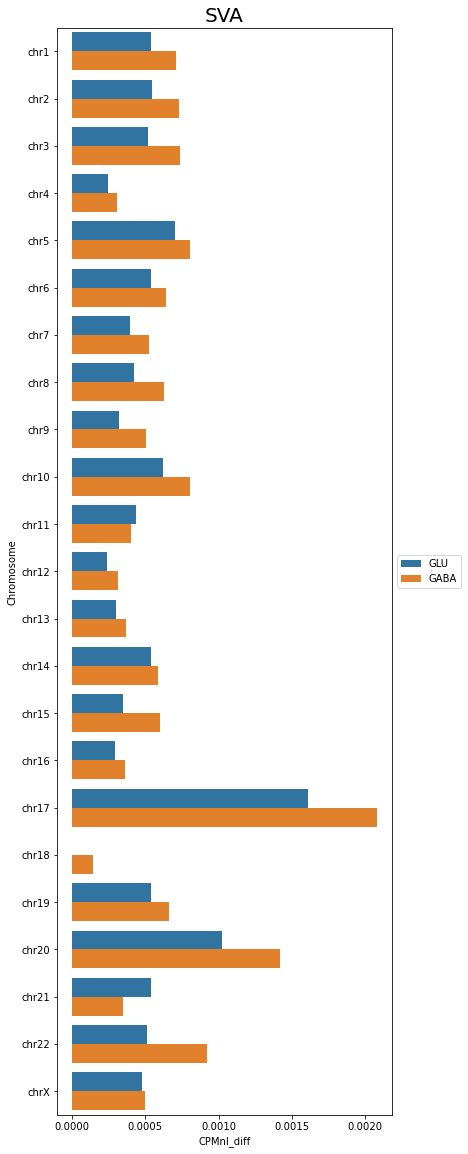

In [600]:
# INF - LA RNA differences by celltype
#========================================
chr_li = ['chr'+str(i) for i in np.arange(1, 23)]
chr_li.append('chrX')

clss = 'SVA'
fig,ax = plt.subplots(figsize=(6, 20))
sns.barplot(data=diff_df[diff_df['Family']==clss], x='CPMnl_diff', y = 'Chromosome', hue = 'celltype'
            , order = chr_li,
            hue_order=['GLU', 'GABA'])

#move legend
plt.title(clss, fontsize=20)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()


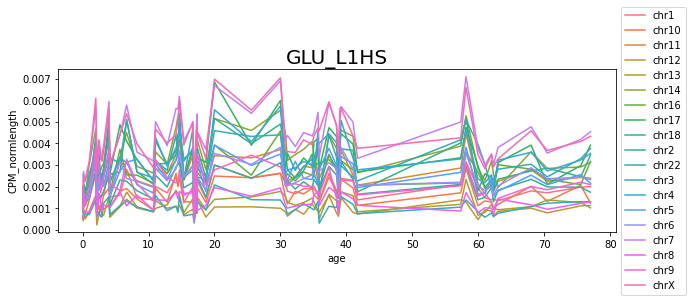

In [636]:
import seaborn as sns
cell = 'GLU'
clss = 'L1HS'
fig,ax = plt.subplots(figsize=(10, 3))
sns.lineplot(data=full_df[(full_df['celltype']==cell) & (full_df['gene_id'] == clss)], x='age', y = 'CPM_normlength', hue = 'Chromosome')
#move legend
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title(cell + '_' + clss, fontsize=20)
plt.show()

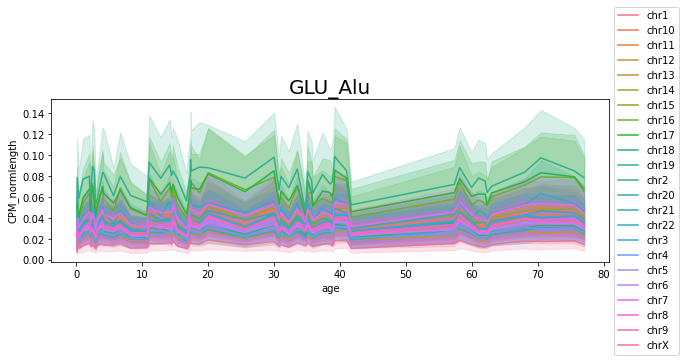

In [509]:
import seaborn as sns
cell = 'GLU'
clss = 'Alu'
fig,ax = plt.subplots(figsize=(10, 3))
sns.lineplot(data=full_df[(full_df['celltype']==cell) & (full_df['Family'] == clss)], x='age', y = 'CPM_normlength', hue = 'Chromosome')
#move legend
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title(cell + '_' + clss, fontsize=20)
plt.show()

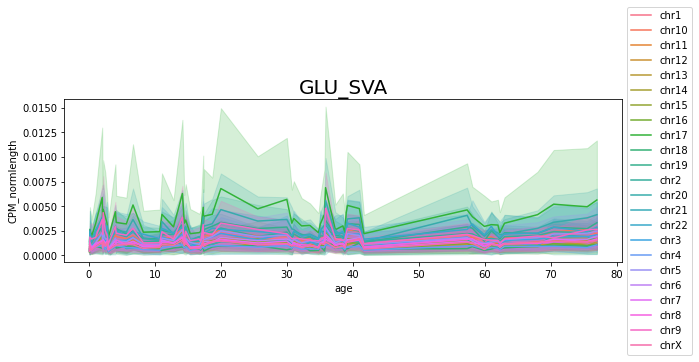

In [510]:
import seaborn as sns
cell = 'GLU'
clss = 'SVA'
fig,ax = plt.subplots(figsize=(10, 3))
sns.lineplot(data=full_df[(full_df['celltype']==cell) & (full_df['Family'] == clss)], x='age', y = 'CPM_normlength', hue = 'Chromosome')
#move legend
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title(cell + '_' + clss, fontsize=20)
plt.show()

In [601]:
full_df

gene_id         Count        CPM Chromosome          Sample    age  \
0        AluJb  16667.466667  44.508650       chr1       1105_GABA  16.93   
1        AluJo   8410.400000  22.459055       chr1       1105_GABA  16.93   
2        AluJr   9033.700000  24.123509       chr1       1105_GABA  16.93   
3       AluJr4   2339.500000   6.247379       chr1       1105_GABA  16.93   
4        AluSc   3714.883333   9.920190       chr1       1105_GABA  16.93   
...        ...           ...        ...        ...             ...    ...   
170822   SVA_B     40.000000   0.154292       chrX  HCTZZNA014_GLU  39.19   
170823   SVA_C     21.000000   0.081003       chrX  HCTZZNA014_GLU  39.19   
170824   SVA_D    184.500000   0.711671       chrX  HCTZZNA014_GLU  39.19   
170825   SVA_E     29.000000   0.111862       chrX  HCTZZNA014_GLU  39.19   
170826   SVA_F     39.500000   0.152363       chrX  HCTZZNA014_GLU  39.19   

       celltype       period Family  chrlength  CPM_normlength  
0          GABA  Adolescence    Alu  248956422        0.178781  
1          GABA  Adolescence    Alu  248956422        0.090213  
2          GABA  Adolescence    Alu  248956422        0.096899  
3          GABA  Adolescence    Alu  248956422        0.025094  
4          GABA  Adolescence    Alu  248956422        0.039847  
...         ...          ...    ...        ...             ...  
170822      GLU    Adulthood    SVA  156040895        0.000989  
170823      GLU    Adulthood    SVA  156040895        0.000519  
170824      GLU    Adulthood    SVA  156040895        0.004561  
170825      GLU    Adulthood    SVA  156040895        0.000717  
170826      GLU    Adulthood    SVA  156040895        0.000976  

[166408 rows x 11 columns]

In [637]:
full_df

gene_id         Count        CPM Chromosome          Sample    age  \
0        AluJb  16667.466667  44.508650       chr1       1105_GABA  16.93   
1        AluJo   8410.400000  22.459055       chr1       1105_GABA  16.93   
2        AluJr   9033.700000  24.123509       chr1       1105_GABA  16.93   
3       AluJr4   2339.500000   6.247379       chr1       1105_GABA  16.93   
4        AluSc   3714.883333   9.920190       chr1       1105_GABA  16.93   
...        ...           ...        ...        ...             ...    ...   
170822   SVA_B     40.000000   0.154292       chrX  HCTZZNA014_GLU  39.19   
170823   SVA_C     21.000000   0.081003       chrX  HCTZZNA014_GLU  39.19   
170824   SVA_D    184.500000   0.711671       chrX  HCTZZNA014_GLU  39.19   
170825   SVA_E     29.000000   0.111862       chrX  HCTZZNA014_GLU  39.19   
170826   SVA_F     39.500000   0.152363       chrX  HCTZZNA014_GLU  39.19   

       celltype       period Family  chrlength  CPM_normlength  \
0          GABA  Adolescence    Alu  248956422        0.178781   
1          GABA  Adolescence    Alu  248956422        0.090213   
2          GABA  Adolescence    Alu  248956422        0.096899   
3          GABA  Adolescence    Alu  248956422        0.025094   
4          GABA  Adolescence    Alu  248956422        0.039847   
...         ...          ...    ...        ...             ...   
170822      GLU    Adulthood    SVA  156040895        0.000989   
170823      GLU    Adulthood    SVA  156040895        0.000519   
170824      GLU    Adulthood    SVA  156040895        0.004561   
170825      GLU    Adulthood    SVA  156040895        0.000717   
170826      GLU    Adulthood    SVA  156040895        0.000976   

        CPM_normlength_normTE  
0                    0.038897  
1                    0.019627  
2                    0.021082  
3                    0.005460  
4                    0.008669  
...                       ...  
170822               0.005118  
170823               0.002687  
170824               0.023606  
170825               0.003710  
170826               0.005054  

[166408 rows x 12 columns]

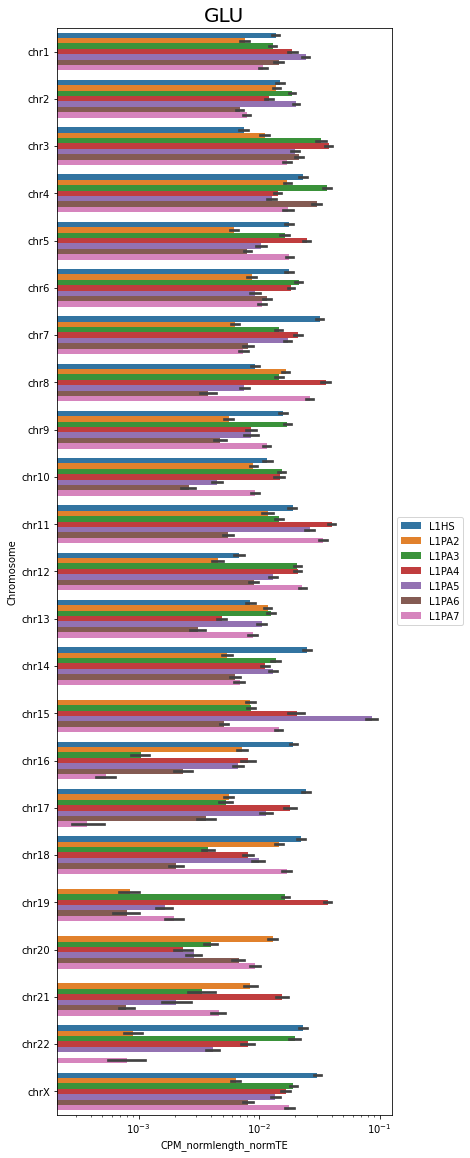

In [638]:
# TE differences by chromosomes
#==============================================

cell = 'GLU'
fig,ax = plt.subplots(figsize=(6, 20))
sns.barplot(data=full_df[(full_df['celltype']==cell) & (full_df['Family']=='L1') ], x='CPM_normlength_normTE', y = 'Chromosome', hue = 'gene_id'
            , order = chr_li, hue_order = ['L1HS','L1PA2', 'L1PA3', 'L1PA4', 'L1PA5', 'L1PA6', 'L1PA7' ])

#move legend
plt.xscale('log')
plt.title(cell, fontsize=20)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

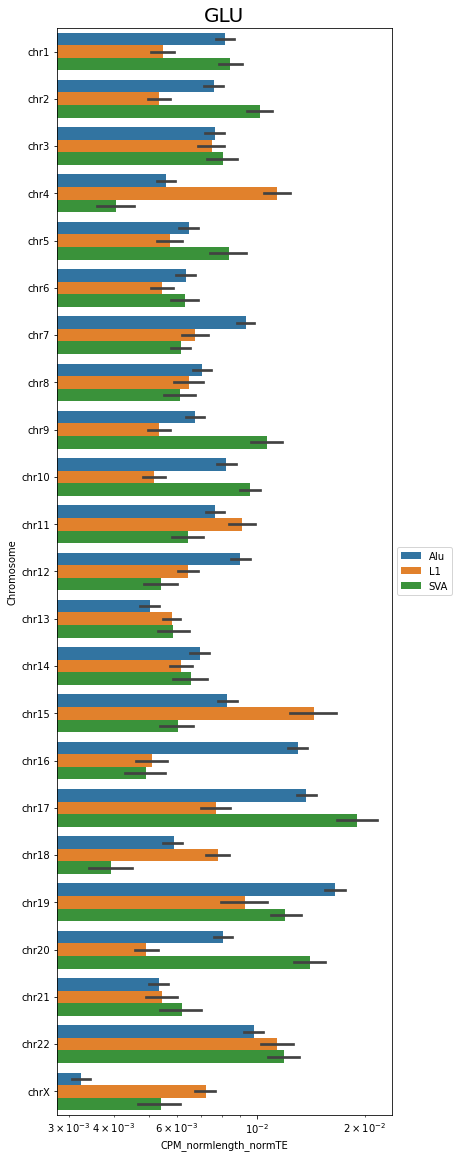

In [628]:
# TE differences by chromosomes
#==============================================

cell = 'GLU'
fig,ax = plt.subplots(figsize=(6, 20))
sns.barplot(data=full_df[full_df['celltype']==cell], x='CPM_normlength_normTE', y = 'Chromosome', hue = 'Family'
            , order = chr_li)

#move legend
plt.xscale('log')
plt.title(cell, fontsize=20)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

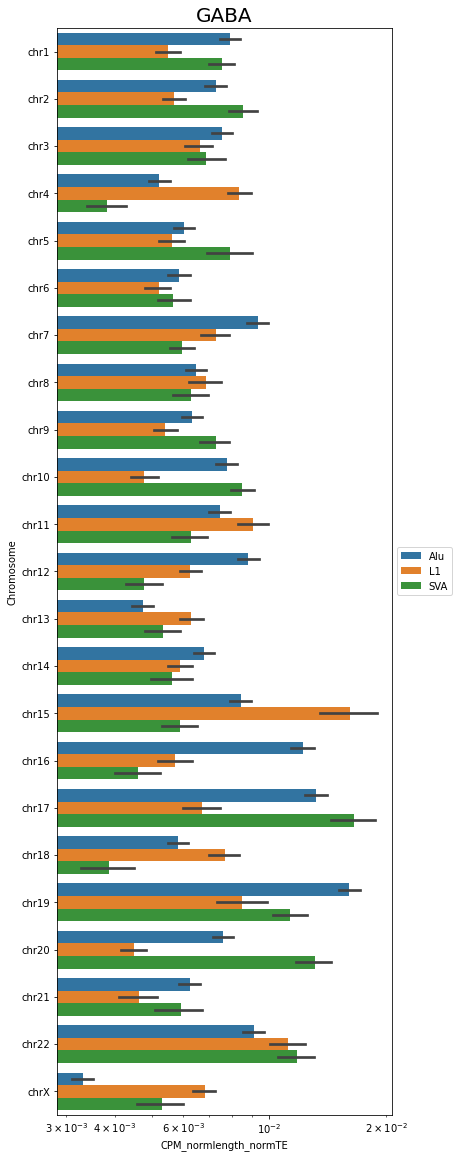

In [627]:
# TE differences by chromosomes
#==============================================

cell = 'GABA'
fig,ax = plt.subplots(figsize=(6, 20))
sns.barplot(data=full_df[full_df['celltype']==cell], x='CPM_normlength_normTE', y = 'Chromosome', hue = 'Family'
            , order = chr_li)

#move legend
plt.xscale('log')
plt.title(cell, fontsize=20)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

In [629]:
full_df

gene_id         Count        CPM Chromosome          Sample    age  \
0        AluJb  16667.466667  44.508650       chr1       1105_GABA  16.93   
1        AluJo   8410.400000  22.459055       chr1       1105_GABA  16.93   
2        AluJr   9033.700000  24.123509       chr1       1105_GABA  16.93   
3       AluJr4   2339.500000   6.247379       chr1       1105_GABA  16.93   
4        AluSc   3714.883333   9.920190       chr1       1105_GABA  16.93   
...        ...           ...        ...        ...             ...    ...   
170822   SVA_B     40.000000   0.154292       chrX  HCTZZNA014_GLU  39.19   
170823   SVA_C     21.000000   0.081003       chrX  HCTZZNA014_GLU  39.19   
170824   SVA_D    184.500000   0.711671       chrX  HCTZZNA014_GLU  39.19   
170825   SVA_E     29.000000   0.111862       chrX  HCTZZNA014_GLU  39.19   
170826   SVA_F     39.500000   0.152363       chrX  HCTZZNA014_GLU  39.19   

       celltype       period Family  chrlength  CPM_normlength  \
0          GABA  Adolescence    Alu  248956422        0.178781   
1          GABA  Adolescence    Alu  248956422        0.090213   
2          GABA  Adolescence    Alu  248956422        0.096899   
3          GABA  Adolescence    Alu  248956422        0.025094   
4          GABA  Adolescence    Alu  248956422        0.039847   
...         ...          ...    ...        ...             ...   
170822      GLU    Adulthood    SVA  156040895        0.000989   
170823      GLU    Adulthood    SVA  156040895        0.000519   
170824      GLU    Adulthood    SVA  156040895        0.004561   
170825      GLU    Adulthood    SVA  156040895        0.000717   
170826      GLU    Adulthood    SVA  156040895        0.000976   

        CPM_normlength_normTE  
0                    0.038897  
1                    0.019627  
2                    0.021082  
3                    0.005460  
4                    0.008669  
...                       ...  
170822               0.005118  
170823               0.002687  
170824               0.023606  
170825               0.003710  
170826               0.005054  

[166408 rows x 12 columns]

In [632]:
full_df[(full_df['celltype']==cell) & (full_df['Family']==family)]['gene_id']

45          L1HS
46         L1MA1
47         L1MA2
48         L1MA3
49         L1MA4
           ...  
169283     L1PA8
169284    L1PA8A
169285     L1PB1
169286     L1PB2
169287     L1PBa
Name: gene_id, Length: 18848, dtype: object

In [ ]:
L1PA6     0.216371
L1PA4     0.061157
L1PA7, L1PA2, L1PA5, L1PA8A, L1PA8, L1PA10, L1PA3, L1HS

In [630]:
# TE differences by chromosomes, split by subfamilies
#==============================================

cell = 'GABA'
family = 'L1'
fig,ax = plt.subplots(figsize=(6, 20))
sns.barplot(data=full_df[(full_df['celltype']==cell) & (full_df['Family']==family)], x='CPM_normlength', y = 'Chromosome', hue = 'gene_id'
            , order = chr_li)

#move legend
plt.xscale('log')
plt.title(cell, fontsize=20)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

KeyboardInterrupt: 

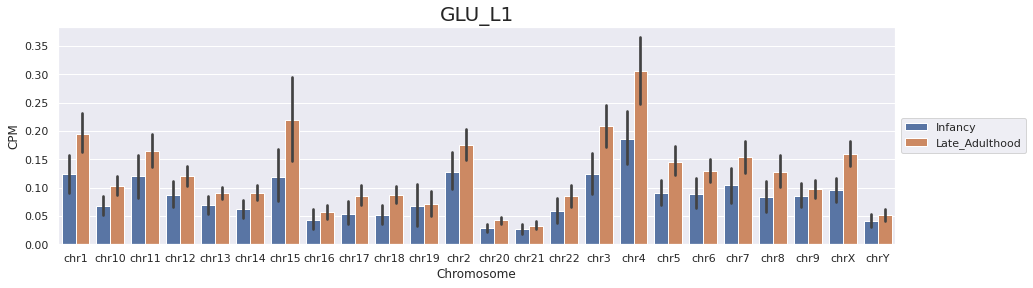

In [213]:
#NORMALISE BY CHR LENGTH


cell = 'GLU'
clss = 'L1'
fig,ax = plt.subplots(figsize=(15, 4))
sns.barplot(data=full_df[(full_df['celltype']==cell) & (full_df['Family'] == clss)], x='Chromosome', y = 'CPM', hue = 'period', hue_order=['Infancy', 'Late_Adulthood'])

#move legend
plt.title(cell + '_' + clss, fontsize=20)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

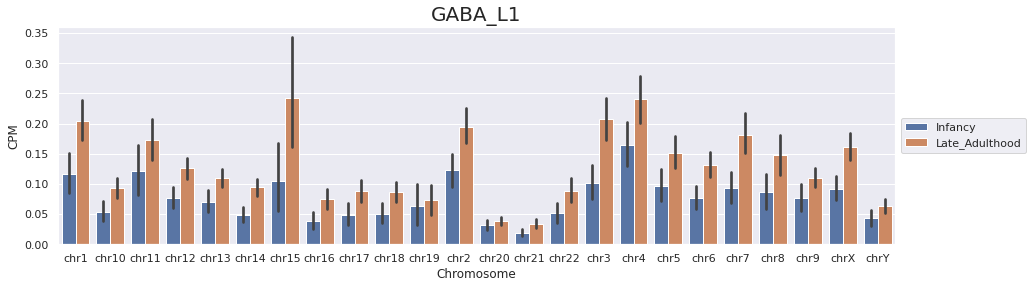

In [216]:
cell = 'GABA'
clss = 'L1'
fig,ax = plt.subplots(figsize=(15, 4))
sns.barplot(data=full_df[(full_df['celltype']==cell) & (full_df['Family'] == clss)], x='Chromosome', y = 'CPM', hue = 'period', hue_order=['Infancy', 'Late_Adulthood'])

#move legend
plt.title(cell + '_' + clss, fontsize=20)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

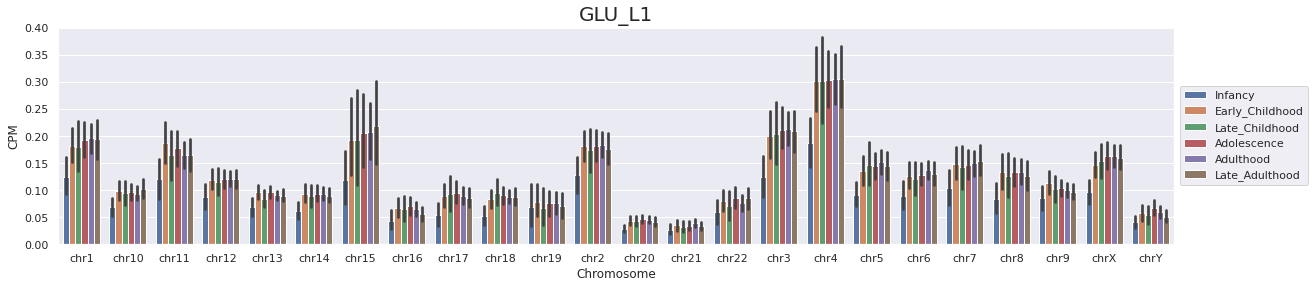

In [223]:
cell = 'GLU'
clss = 'L1'
fig,ax = plt.subplots(figsize=(20, 4))
sns.barplot(data=full_df[(full_df['celltype']==cell) & (full_df['Family'] == clss)], x='Chromosome', y = 'CPM', hue = 'period', 
            hue_order=['Infancy', 'Early_Childhood', 'Late_Childhood', 'Adolescence', 'Adulthood', 'Late_Adulthood'])

#move legend
plt.title(cell + '_' + clss, fontsize=20)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

In [228]:
unq = sig_df['Class'].unique()
unq

array(['L1PA4', 'L1PA2', 'L1PA5', 'L1PA3', 'L1HS'], dtype=object)

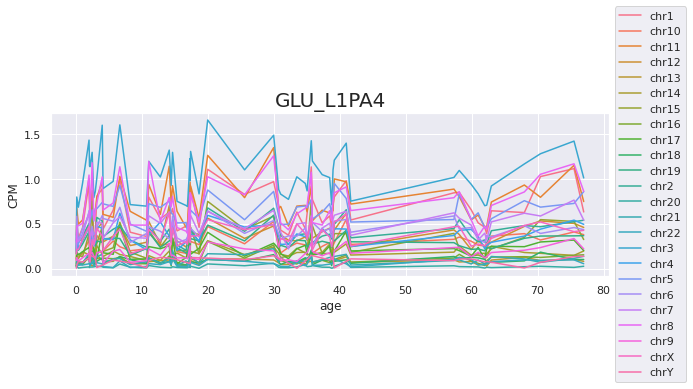

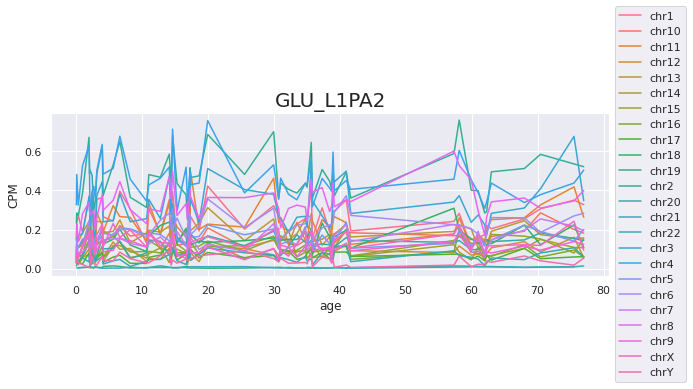

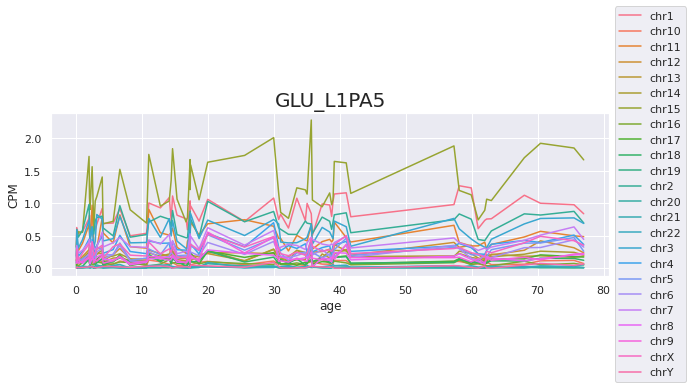

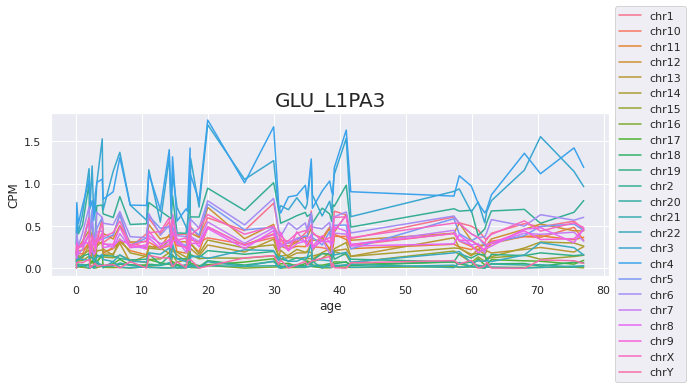

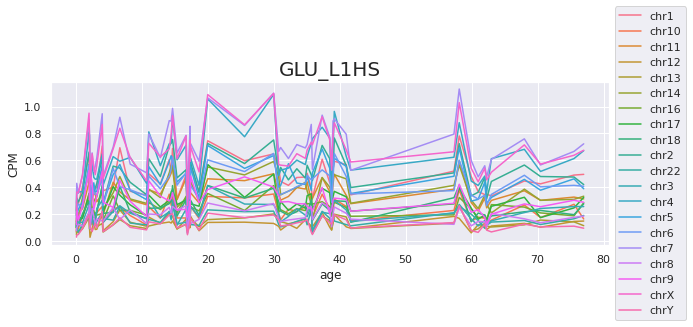

In [229]:
#GRANULAR
for u in unq:
    cell = 'GLU'
    clss = u
    fig,ax = plt.subplots(figsize=(10, 3))
    sns.lineplot(data=full_df[(full_df['celltype']==cell) & (full_df['gene_id'] == clss)], x='age', y = 'CPM', hue = 'Chromosome')
    #move legend
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.title(cell + '_' + clss, fontsize=20)
    plt.show()

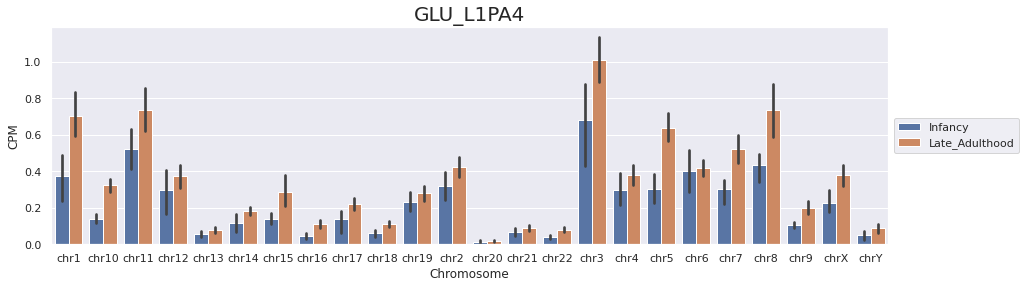

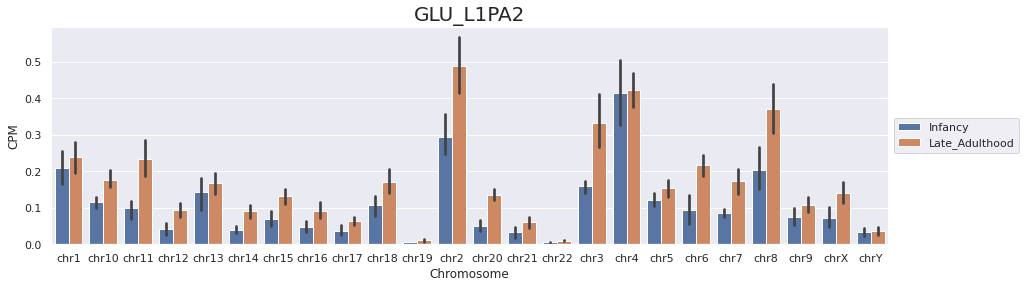

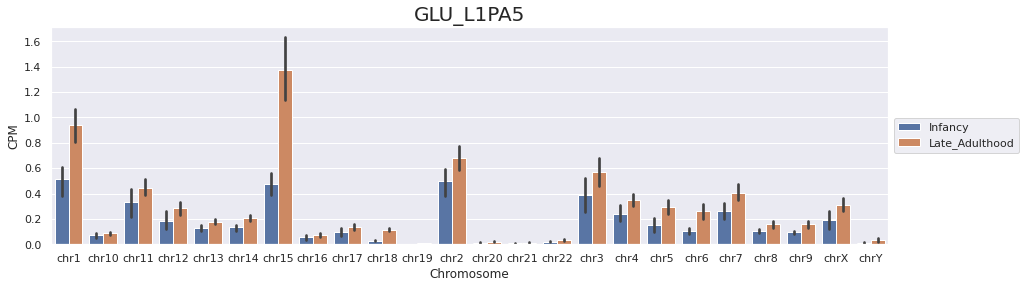

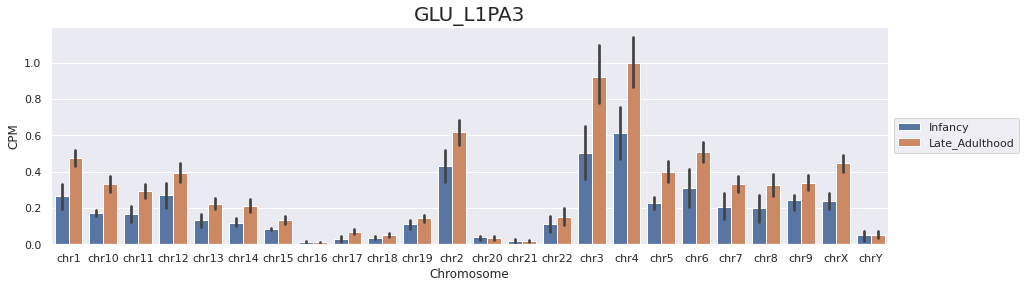

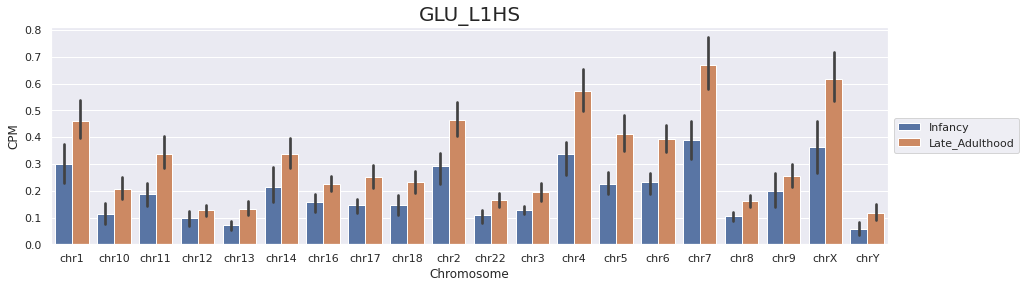

In [231]:
for u in unq:
    cell = 'GLU'
    clss = u
    fig,ax = plt.subplots(figsize=(15, 4))
    sns.barplot(data=full_df[(full_df['celltype']==cell) & (full_df['gene_id'] == clss)], x='Chromosome', y = 'CPM', hue = 'period', hue_order=['Infancy', 'Late_Adulthood'])

    #move legend
    plt.title(cell + '_' + clss, fontsize=20)
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.show()

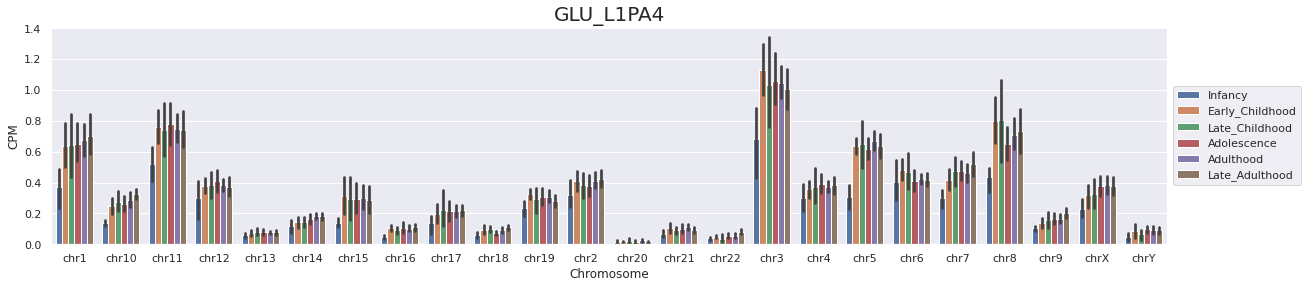

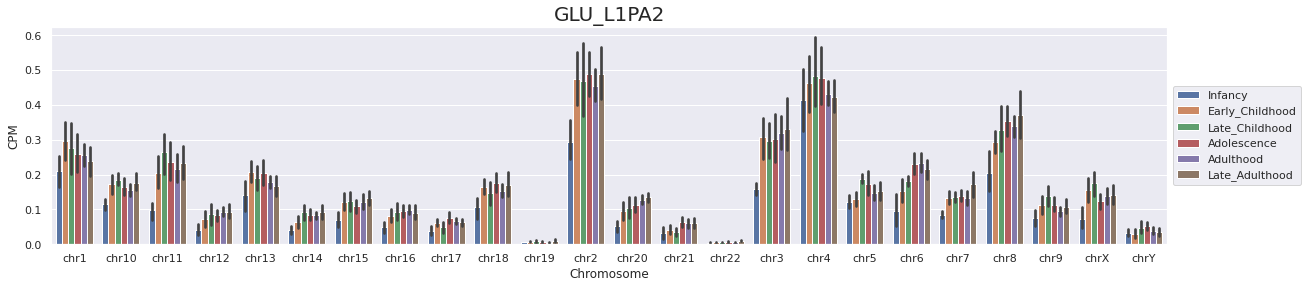

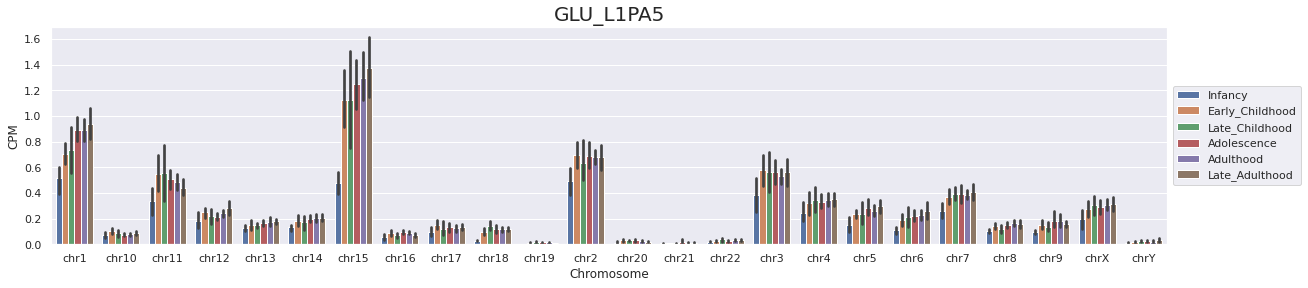

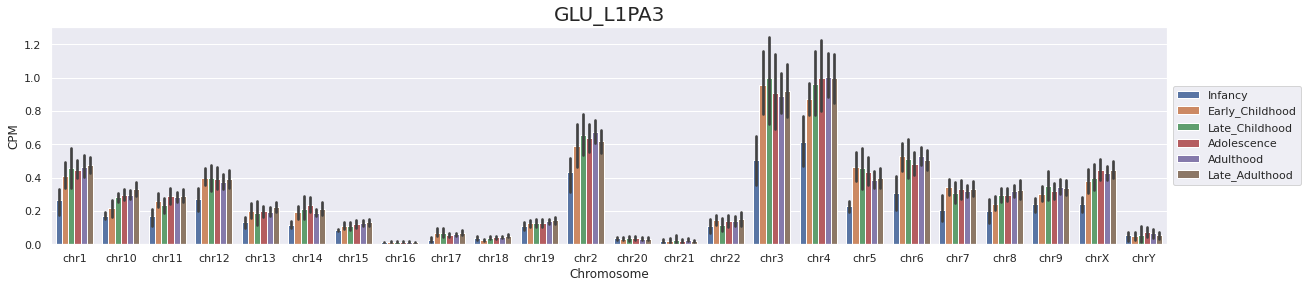

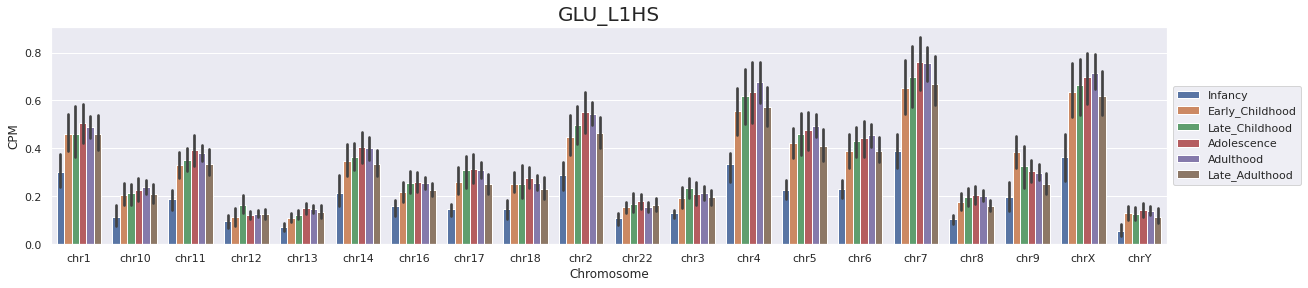

In [234]:
for u in unq:
    cell = 'GLU'
    clss = u
    fig,ax = plt.subplots(figsize=(20, 4))
    sns.barplot(data=full_df[(full_df['celltype']==cell) & (full_df['gene_id'] == clss)], x='Chromosome', y = 'CPM', hue = 'period', 
               hue_order=['Infancy', 'Early_Childhood', 'Late_Childhood', 'Adolescence', 'Adulthood', 'Late_Adulthood'])

    #move legend
    plt.title(cell + '_' + clss, fontsize=20)
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.show()

### RNA-loc: gene regions

In [597]:
#========================================================================
##NB DO NOT RE-RUN!! WILL DUPLICATE SITES
#========================================================================


#%%bash
# Calculate the relative abundance of gene-loci-types at TE loci, and RNA age-up loci
# are TEs + age-up hotspots enriched for certain gene regions? 
#========================================================================

#Merge together all annotated regions and cat into one file
#========================================================================

os.chdir('/cndd2/jchien/iGenome/')
str_list = ['3utr', '5utr', 'cds', 'exon', 'exon_1st', 'exon_lncRNA', 'exon_proteincoding',
           'intron', 'intron_1st', 'intron_lncRNA', 'intron_proteincoding', 'transcript_TSS+-1k', 
    'cpgIslandExt', 'cpgShore_up', 'cpgShore_down']
for string in str_list:
    if 'cpg' in string:
        run = f"""
        echo {string}
        zcat {string}.hg38.bed.gz  \
            | cut -f1-3 | awk '{{$4="{string}";$5="NA";print;}}' OFS=$'\t' \
            | bedtools merge -c 4,5,5,5 -o distinct >> /cndd3/dburrows/DATA/annotations/gencode/gencode.v37.CGI.hg38.jofan.bed
        """
        
    else:
        run = f"""
        echo {string}

        zcat /cndd2/jchien/iGenome/gencodev37/gencode.v37.annotation.{string}_filter.bed.gz \
            | awk '{{a=$5; $5="{string}"; $6=a; print;}}' OFS=$'\t' \
            | bedtools merge -s -c 5,8,6,7 -o distinct >> /cndd3/dburrows/DATA/annotations/gencode/gencode.v37.gene_annotation.hg38.jofan.bed
        """

    get_ipython().run_cell_magic('bash', '', run)

3utr
5utr
cds
exon
exon_1st
exon_lncRNA
exon_proteincoding
intron
intron_1st
intron_lncRNA
intron_proteincoding
transcript_TSS+-1k
cpgIslandExt
cpgShore_up
cpgShore_down


In [598]:
%%bash
#sort by chromosome name and start position
#=====================================================
curr_path=/cndd3/dburrows/DATA/annotations/

#First swap columns of rmsk bed file -> sign must be at 6th position, and put full_length_positions at 2 and 3
#awk ' { t = $4; $4 = $6; $6 = t; st=$9; end=$10; $9=$2; $10=$3; $2=st; $3=end; print; } ' OFS=$'\t' rmsk/rmsk.hg38.filt-5ptrim.merge.bed  > rmsk/rmsk.hg38.filt-5ptrim.merge.rerr.bed

#save ordered chromosome names
awk '{print $1}' $curr_path/gencode/gencode.v37.gene_annotation.hg38.jofan.bed \
| sort -V | uniq > $curr_path/gencode/chr.txt

#remove any non-canonical chrs from rmsk file
grep -w -f  $curr_path/gencode/chr.txt $curr_path/rmsk/rmsk.hg38.filt-5ptrim.merge.rerr.bed \
> $curr_path/rmsk/rmsk.hg38.filt-5ptrim.merge.rerr.canon.bed

#bedtools sort rmsk
bedtools sort -g $curr_path/gencode/chr.txt -i $curr_path/rmsk/rmsk.hg38.filt-5ptrim.merge.rerr.canon.bed \
> $curr_path/rmsk/rmsk.hg38.filt-5ptrim.merge.canon.sort.bed

#bedtools sort gene_annotations
bedtools sort -g $curr_path/gencode/chr.txt -i $curr_path/gencode/gencode.v37.gene_annotation.hg38.jofan.bed \
 > $curr_path/gencode/gencode.v37.gene_annotation.hg38.jofan.sort.bed
bedtools sort -g $curr_path/gencode/chr.txt -i $curr_path/gencode/gencode.v37.CGI.hg38.jofan.bed \
 > $curr_path/gencode/gencode.v37.CGI.hg38.jofan.sort.bed

In [599]:
#check how many of each locitype remains in file
for string in str_list:
    print(string)
    if "cpg" in string:
        run = f""" grep {string} /cndd3/dburrows/DATA/annotations/gencode/gencode.v37.CGI.hg38.jofan.sort.bed \
            | wc -l 
    
    """
    else:
        run = f""" grep {string} /cndd3/dburrows/DATA/annotations/gencode/gencode.v37.gene_annotation.hg38.jofan.sort.bed \
            | wc -l 
    
    """
    get_ipython().run_cell_magic('bash', '', run)

3utr
154262
5utr
139276
cds
212282
exon
700765
exon_1st
102913
exon_lncRNA
63876
exon_proteincoding
226379
intron
638493
intron_1st
76315
intron_lncRNA
29980
intron_proteincoding
165534
transcript_TSS+-1k
81277
cpgIslandExt
27949
cpgShore_up
25492
cpgShore_down
25517


In [600]:
%%bash
#Filter annotation by rmsk
#========================================================================
cd /cndd3/dburrows/DATA/annotations/

#filter annotation by full-length rmsk
#===========
#reduce gene_labels to those only overlapping rmsk bed file, enforce strandedness
# -u reports a only once if any overlap with b
bedtools intersect -u -s -sorted -a gencode/gencode.v37.gene_annotation.hg38.jofan.sort.bed -b rmsk/rmsk.hg38.filt-5ptrim.merge.canon.sort.bed > rmsk/gencode.v37.gene_annotation.hg38.jofan.rmsk_intersect.bed
bedtools intersect -u -sorted -a gencode/gencode.v37.CGI.hg38.jofan.sort.bed -b rmsk/rmsk.hg38.filt-5ptrim.merge.canon.sort.bed > rmsk/gencode.v37.CGI.hg38.jofan.rmsk_intersect.bed

In [601]:
#check how many of each locitype remains in file
for string in str_list:
    print(string)
    if "cpg" in string:
        run = f""" grep {string} /cndd3/dburrows/DATA/annotations/rmsk/gencode.v37.CGI.hg38.jofan.rmsk_intersect.bed \
            | wc -l 
    
    """
    else:
        run = f""" grep {string} /cndd3/dburrows/DATA/annotations/rmsk/gencode.v37.gene_annotation.hg38.jofan.rmsk_intersect.bed \
            | wc -l 
    
    """
    get_ipython().run_cell_magic('bash', '', run)

3utr
6815
5utr
3867
cds
283
exon
22493
exon_1st
5446
exon_lncRNA
3158
exon_proteincoding
3415
intron
182660
intron_1st
29080
intron_lncRNA
12886
intron_proteincoding
58045
transcript_TSS+-1k
22444
cpgIslandExt
22
cpgShore_up
12529
cpgShore_down
12526


In [654]:
#calculate normalisation factors across the whole genome
#loci_type
cpg_list = ['cpgIslandExt', 'cpgShore_up', 'cpgShore_down']
cpi = pd.read_csv('/cndd3/dburrows/DATA/annotations/gencode/gencode.v37.CGI.hg38.jofan.sort.bed',
                   sep='\t', header=None)
norm_dic={}
for cpg in cpg_list:
    print(cpg)
    norm_dic.update({cpg:sum(cpi[cpi[3] == cpg][2].values - cpi[cpi[3] == cpg][1].values)})
    
str_list = ['3utr', '5utr', 'cds', 'exon', 'exon_1st', 'exon_lncRNA', 'exon_proteincoding',
           'intron', 'intron_1st', 'intron_lncRNA', 'intron_proteincoding', 'transcript_TSS+-1k']
ga = pd.read_csv('/cndd3/dburrows/DATA/annotations/gencode/gencode.v37.gene_annotation.hg38.jofan.sort.bed',
                   sep='\t', header=None)
for st in str_list:
    print(st)
    norm_dic.update({st:sum(ga[ga[3] == st][2].values - ga[ga[3] == st][1].values)})
    
#TE_class, TE_family, TE_gene

#full-length only!
te_dic={}
rmsk = pd.read_csv('/cndd3/dburrows/DATA/annotations/rmsk/rmsk.hg38.filt-5ptrim.merge.canon.sort.bed',
                   sep='\t', header=None)

class_l = rmsk[3].unique()
gene_l = rmsk[4].unique()
for clas in class_l:te_dic.update({clas:sum(rmsk[rmsk[3] == clas][2].values - rmsk[rmsk[3] == clas][1].values)})
for gene in gene_l: te_dic.update({gene:sum(rmsk[rmsk[4] == gene][2].values - rmsk[rmsk[4] == gene][1].values)})

#all insertions
te_all_dic={}
filename = '/cndd3/dburrows/DATA/annotations/rmsk/hg38.fa.out'
rmsk_all = te.read_rmsk(filename)

for clas in class_l: te_all_dic.update({clas:sum(rmsk_all[rmsk_all['repFamily'] == clas]['genoEnd'].values -  rmsk_all[rmsk_all['repFamily'] == clas]['genoStart'].values)})
for gene in gene_l: te_all_dic.update({gene:sum(rmsk_all[rmsk_all['repName'] == gene]['genoEnd'].values -  rmsk_all[rmsk_all['repName'] == gene]['genoStart'].values)})
    
np.save('/cndd3/dburrows/DATA/annotations/gencode/gene_annotation_coverage.WG.npy', norm_dic)
np.save('/cndd3/dburrows/DATA/annotations/rmsk/TE_coverage.5pfilt.npy', te_dic)
np.save('/cndd3/dburrows/DATA/annotations/rmsk/TE_coverage.WG.npy', te_all_dic)

cpgIslandExt
cpgShore_up
cpgShore_down
3utr
5utr
cds
exon
exon_1st
exon_lncRNA
exon_proteincoding
intron
intron_1st
intron_lncRNA
intron_proteincoding
transcript_TSS+-1k


In [676]:
%%bash
#Locitype abundance at full-length TEs
#=========================================================

# 1. filtered rmsk -> bedtools intersect, stranded, bp overlap
#=========================================================
curr_path=/cndd3/dburrows/DATA/annotations/
echo $curr_path
#all locitypes (stranded)
bedtools intersect -s -wo -sorted -a $curr_path/rmsk/rmsk.hg38.filt-5ptrim.merge.canon.sort.bed \
-b $curr_path/rmsk/gencode.v37.gene_annotation.hg38.jofan.rmsk_intersect.bed \
> $curr_path/rmsk/rmsk.hg38.filt-5ptrim.merge.gene_annotation_intersect.bed

# #CGIs (unstranded)
bedtools intersect -wo -sorted -a $curr_path/rmsk/rmsk.hg38.filt-5ptrim.merge.canon.sort.bed \
-b $curr_path/rmsk/gencode.v37.CGI.hg38.jofan.rmsk_intersect.bed \
> $curr_path/rmsk/rmsk.hg38.filt-5ptrim.merge.CGI_intersect.bed

/cndd3/dburrows/DATA/annotations/


In [772]:
#load in normalisation factors
gene_dic = np.load('/cndd3/dburrows/DATA/annotations/gencode/gene_annotation_coverage.WG.npy', allow_pickle=True).item()
TE_full_dic = np.load('/cndd3/dburrows/DATA/annotations/rmsk/TE_coverage.5pfilt.npy', allow_pickle=True).item()
TE_all_dic = np.load('/cndd3/dburrows/DATA/annotations/rmsk/TE_coverage.WG.npy', allow_pickle=True).item()

column_names = ['TE_chromosome', 'TE_start', 'TE_end', 'TE_family', 'TE_gene', 'TE_strand', 'TE_class', 'TE_length'
                , 'TE_tss_start', 'TE_tss_end', 'loci_chromosome', 'loci_start', 'loci_end','loci_type', 'loci_function', 'loci_strand', 'loci_genes', 
                'bp_overlap']
rmsk_int_full = pd.read_csv('/cndd3/dburrows/DATA/annotations/rmsk/rmsk.hg38.filt-5ptrim.merge.gene_annotation_intersect.bed', 
                   sep='\t', header=None, names=column_names)

rmsk_cgi_int_full = pd.read_csv('/cndd3/dburrows/DATA/annotations/rmsk/rmsk.hg38.filt-5ptrim.merge.CGI_intersect.bed', 
                   sep='\t', header=None, names=column_names)

In [773]:
#Full-length TEs
# SCORE -> normalise by total bps across whole genome, normalise by each class/gene/family

#gene_annotations
gene_norm_v = np.asarray([gene_dic[i] for i in rmsk_int_full['loci_type'].values])
rmsk_int_full['loci_type_bpm'] = (rmsk_int_full['bp_overlap'].values / gene_norm_v)*1e6
TEfam_norm_v = np.asarray([TE_full_dic[i] for i in rmsk_int_full['TE_family'].values])
TEgene_norm_v = np.asarray([TE_full_dic[i] for i in rmsk_int_full['TE_gene'].values])

rmsk_int_full['TEfam_bpb'] = (rmsk_int_full['loci_type_bpm'].values / TEfam_norm_v)*1e3
rmsk_int_full['TEgene_bpb'] = (rmsk_int_full['loci_type_bpm'].values / TEgene_norm_v)*1e3

#CGIs
cgi_norm_v = np.asarray([gene_dic[i] for i in rmsk_cgi_int_full['loci_type'].values])
rmsk_cgi_int_full['loci_type_bpm'] = (rmsk_cgi_int_full['bp_overlap'].values / cgi_norm_v)*1e6

TEfam_norm_v = np.asarray([TE_full_dic[i] for i in rmsk_cgi_int_full['TE_family'].values])
TEgene_norm_v = np.asarray([TE_full_dic[i] for i in rmsk_cgi_int_full['TE_gene'].values])

rmsk_cgi_int_full['TEfam_bpb'] = (rmsk_cgi_int_full['loci_type_bpm'].values / TEfam_norm_v)*1e6
rmsk_cgi_int_full['TEgene_bpb'] = (rmsk_cgi_int_full['loci_type_bpm'].values / TEgene_norm_v)*1e6


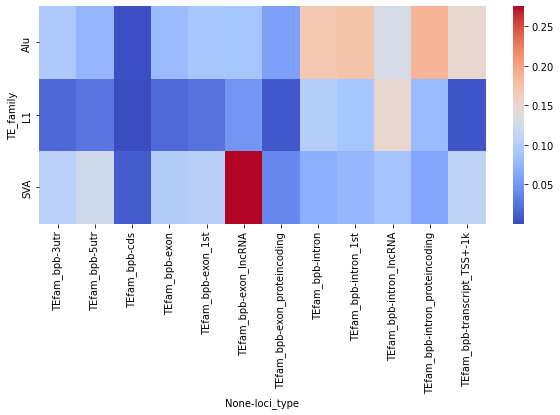

In [808]:
# visualise TE abundance by loci_type
curr = rmsk_int_full
curr_g = curr.groupby(['TE_family', 'loci_type']).sum()[['TEfam_bpb']]
curr_g = curr_g.unstack()

fig,ax = plt.subplots(figsize=(10,4))
sns.heatmap(data=curr_g, cmap='coolwarm')
plt.show()

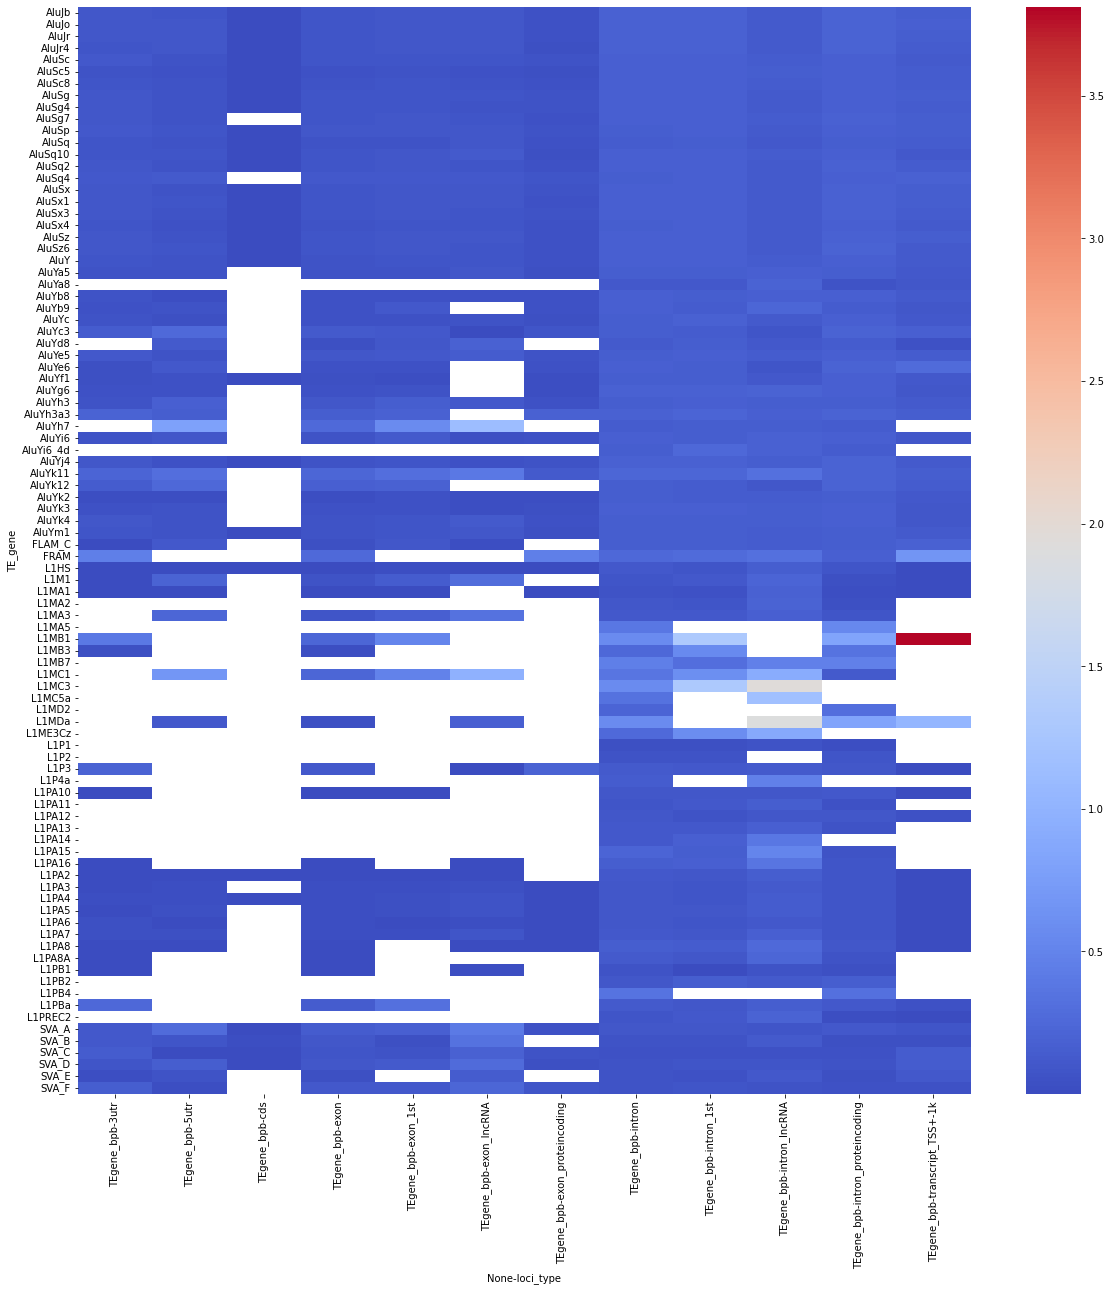

In [820]:
# visualise TE abundance by loci_type
curr = rmsk_int_full
curr_g = curr.groupby(['TE_gene', 'loci_type']).sum()[['TEgene_bpb']]
curr_g = curr_g.unstack()

fig,ax = plt.subplots(figsize=(20,20))
sns.heatmap(data=curr_g, cmap='coolwarm')
plt.show()

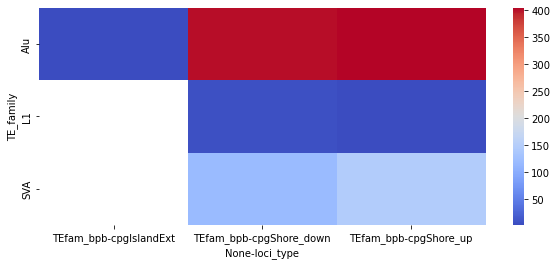

In [806]:
# visualise TE abundance by loci_type
curr = rmsk_cgi_int_full
curr_g = curr.groupby(['TE_family', 'loci_type']).sum()[['TEfam_bpb']]
curr_g = curr_g.unstack()

fig,ax = plt.subplots(figsize=(10,4))
sns.heatmap(data=curr_g, cmap='coolwarm')
plt.show()

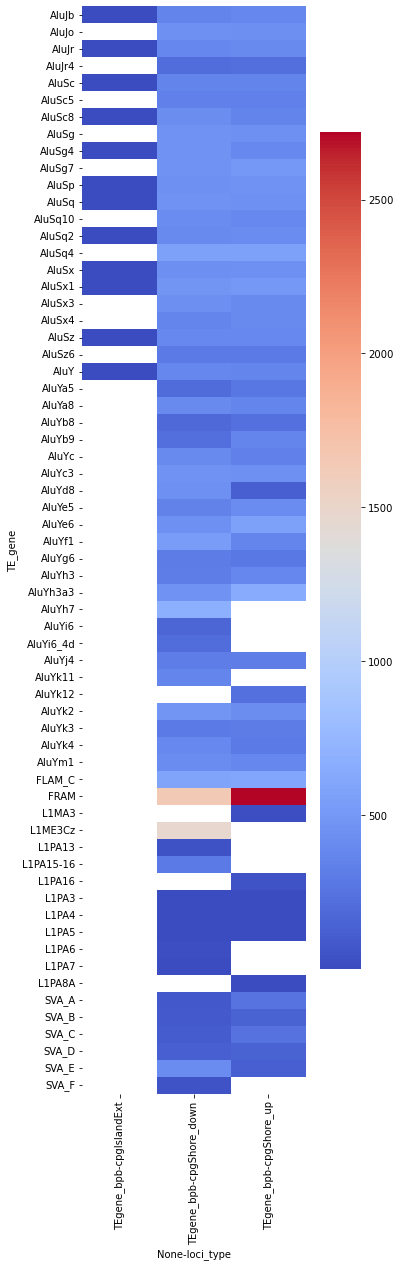

In [823]:
# visualise TE abundance by loci_type
curr = rmsk_cgi_int_full
curr_g = curr.groupby(['TE_gene', 'loci_type']).sum()[['TEgene_bpb']]
curr_g = curr_g.unstack()

fig,ax = plt.subplots(figsize=(5,20))
sns.heatmap(data=curr_g, cmap='coolwarm')
plt.show()

In [253]:
# age up hotspots -> visualise enrichment in age up regions for gene types
# ATEM.csv -> reorganise columns, bedtools intersect, stranded, bp overlap, retain CPM info
# Split data by TE class, split data by gene type, bin data by ideogram, sum over CPM + normalise CPM
# multiprocess pool
# stats, sig test across abundance for each class with samples, each donor is a sample for that bin ->
# within a binned region, which gene loci are differentially abundanct? 

In [259]:
%%bash
#generate complete bed file
cd /cndd2/jchien/iGenome/gencodev37/
zcat gencode.v37.annotation.3utr.bed.gz | head

chr1	29554	30039	ENST00000473358.1	+	utr3_1	MIR1302-2HG-202	lncRNA
chr1	30267	30667	ENST00000469289.1	+	utr3_1	MIR1302-2HG-201	lncRNA
chr1	30366	30503	ENST00000607096.1	+	utr3_1	MIR1302-2-201	miRNA
chr1	30564	30667	ENST00000473358.1	+	utr3_2	MIR1302-2HG-202	lncRNA
chr1	30976	31097	ENST00000473358.1	+	utr3_3	MIR1302-2HG-202	lncRNA
chr1	30976	31109	ENST00000469289.1	+	utr3_2	MIR1302-2HG-201	lncRNA
chr1	70009	70108	ENST00000335137.4	+	utr3_1	OR4F5-201	protein_coding
chr1	70009	71585	ENST00000641515.2	+	utr3_3	OR4F5-202	protein_coding
chr1	160446	160690	ENST00000496488.1	+	utr3_1	AL627309.4-201	lncRNA
chr1	161314	161525	ENST00000496488.1	+	utr3_2	AL627309.4-201	lncRNA


In [262]:
%%bash
#generate complete bed file
cd /cndd2/jchien/iGenome/gencodev37/
zcat gencode.v37.annotation.5utr.bed.gz | head

chr1	17369	17436	ENST00000619216.1	-	utr5_1	MIR6859-1-201	miRNA
chr1	34554	35174	ENST00000417324.1	-	utr5_1	FAM138A-201	lncRNA
chr1	35245	35481	ENST00000461467.1	-	utr5_1	FAM138A-202	lncRNA
chr1	35277	35481	ENST00000417324.1	-	utr5_2	FAM138A-201	lncRNA
chr1	35721	36073	ENST00000461467.1	-	utr5_2	FAM138A-202	lncRNA
chr1	35721	36081	ENST00000417324.1	-	utr5_3	FAM138A-201	lncRNA
chr1	65419	65433	ENST00000641515.2	+	utr5_1	OR4F5-202	protein_coding
chr1	65520	65564	ENST00000641515.2	+	utr5_2	OR4F5-202	protein_coding
chr1	69055	69090	ENST00000335137.4	+	utr5_1	OR4F5-201	protein_coding
chr1	89295	91629	ENST00000466430.5	-	utr5_1	AL627309.1-201	lncRNA


In [10]:
###OLD OLD OLD OLD

%%bash
#Gene locations distributions -> intergenic, intragenic, intron, exon etc.
#========================================================================

# Preprocess gene_label datafile -> 
#Find intersect of filtered rmsk bed file and hg38 annotation, to reduce size, and format
#============================================================================================
#First swap columns of bed file -> sign must be at 6th position, and put full_length_positions at 2 and 3
awk ' { t = $4; $4 = $6; $6 = t; st=$9; end=$10; $9=$2; $10=$3; $2=st; $3=end; print; } ' OFS=$'\t' rmsk.hg38.filt-5ptrim.merge.bed  > rmsk.hg38.filt-5ptrim.merge.rerr.bed

#reduce gene_labels to those only overlapping rmsk bed file, unstranded as we want sense + antisense TEs
# -u reports a only once if any overlap with b
bedtools intersect -u -a gencode.v44.annotation.hg38.genelabels.bed -b ../rmsk/rmsk.hg38.filt-5ptrim.merge.rerr.bed > ../rmsk/gencode.v44.annotation.hg38.rmsk_intersect.bed

#Split up 4th column into gene id and type
awk 'BEGIN{OFS="\t"} {split($4, a, "_"); $4 = a[1]; $5 = a[2]; print}' gencode.v44.annotation.hg38.rmsk_intersect.bed > tmp_split.bed
mv tmp_split.bed gencode.v44.annotation.hg38.rmsk_intersect.bed

#remove duplicated gene loci (exons from isoforms) that have the same chromosome, start+end position gene_label, and strand
awk '!seen[$1,$2,$3,$5,$6]++' gencode.v44.annotation.hg38.rmsk_intersect.bed > tmp_seen.bed
mv tmp_seen.bed gencode.v44.annotation.hg38.rmsk_intersect.bed

#create dict of gene names and transcript ids
#awk -F'\t' '{split($9, a, ";"); gene_id = gene_name = transcript_id = ""; for (i in a) {split(a[i], b, " "); if (b[1] == "transcript_id") transcript_id = b[2]; if (b[1] == "gene_name") gene_name = b[2]; if (b[1] == "gene_id") gene_id = b[2];} if (transcript_id != "" && gene_name != "") { gene[transcript_id] = gene_name; }} END {for (t in gene) print t, gene[t]}' gencode.v44.annotation.hg38.gtf  > transcript_to_gene.txt
zcat gencode.v44.annotation.hg38.tablebrowser.gtf.gz | awk 'BEGIN{OFS="\t"} {print $2, $13} ' > transcript_to_gene.txt

In [ ]:
# Calculate the relative abundance of gene-loci-types at RNA age-up loci
# are age-up hotspots enriched for certain gene regions? 
#========================================================================

%%bash
# Preprocess gene_label datafile -> 
#Find intersect of filtered rmsk bed file and hg38 annotation, to reduce size, and format
#============================================================================================
#First swap columns of bed file -> sign must be at 6th position, and put full_length_positions at 2 and 3
awk ' { t = $4; $4 = $6; $6 = t; st=$9; end=$10; $9=$2; $10=$3; $2=st; $3=end; print; } ' OFS=$'\t' rmsk.hg38.filt-5ptrim.merge.bed  > rmsk.hg38.filt-5ptrim.merge.rerr.bed

#reduce gene_labels to those only overlapping rmsk bed file, enforce strandedness
# -u reports a only once if any overlap with b
bedtools intersect -u -s -a gencode.v44.annotation.hg38.genelabels.bed -b ../rmsk/rmsk.hg38.filt-5ptrim.merge.rerr.bed > ../rmsk/gencode.v44.annotation.hg38.rmsk_intersect.bed

#Split up 4th column into gene id and type
awk 'BEGIN{OFS="\t"} {split($4, a, "_"); $4 = a[1]; $5 = a[2]; print}' gencode.v44.annotation.hg38.rmsk_intersect.bed > tmp_split.bed
mv tmp_split.bed gencode.v44.annotation.hg38.rmsk_intersect.bed

#remove duplicated gene loci (exons from isoforms) that have the same chromosome, start+end position gene_label, and strand
awk '!seen[$1,$2,$3,$5,$6]++' gencode.v44.annotation.hg38.rmsk_intersect.bed > tmp_seen.bed
mv tmp_seen.bed gencode.v44.annotation.hg38.rmsk_intersect.bed

#create dict of gene names and transcript ids
#awk -F'\t' '{split($9, a, ";"); gene_id = gene_name = transcript_id = ""; for (i in a) {split(a[i], b, " "); if (b[1] == "transcript_id") transcript_id = b[2]; if (b[1] == "gene_name") gene_name = b[2]; if (b[1] == "gene_id") gene_id = b[2];} if (transcript_id != "" && gene_name != "") { gene[transcript_id] = gene_name; }} END {for (t in gene) print t, gene[t]}' gencode.v44.annotation.hg38.gtf  > transcript_to_gene.txt
zcat gencode.v44.annotation.hg38.tablebrowser.gtf.gz | awk 'BEGIN{OFS="\t"} {print $2, $13} ' > transcript_to_gene.txt

In [186]:
# add gene name to genelabels file
#=======================================
rmsk_path = '/cndd3/dburrows/DATA/annotations/rmsk/'
genc_path = '/cndd3/dburrows/DATA/annotations/gencode/'

genc = pd.read_csv(rmsk_path + 'gencode.v44.annotation.hg38.rmsk_intersect.bed', sep='\t', header=None)
ref = pd.read_csv(genc_path + 'transcript_to_gene.txt', sep='\t', index_col = 0)
genc[6] = ref.loc[genc[3].values].values
genc.to_csv(rmsk_path + 'gencode.v44.annotation.hg38.rmsk_intersect.bed',  sep='\t', header=None, index=None)


In [ ]:
#Reduce down genelabels file to remove overlapped gene regions of same class
#============================================================================



In [ ]:
%%bash
#convert ATEM_COUNTS.csv to bed file, with re-positioned columns, and add index to each read
#========================================================================================
awk '{ strand = $4; start=$8; end=$9; $4=$6; $8=$2; $9=$3; $6=strand; $2=start; $3=end;  print;} ' OFS=$'\t' ATEM_counts.csv | tail -n +2 > ATEM_counts.bed
#add column of ID values to bed file
awk '{print $0 "\t" "ID" NR}' OFS=$'\t' ATEM_counts.bed > tmp_file.bed
mv tmp_file.bed ATEM_counts.bed

In [ ]:
#Find intersection between ATEM_reads and gene loci
#========================================================================================

# bedtools intersect for gene annotations, sense only (stranded); report both a and b for each overlap
bedtools intersect -s -wo -b /cndd3/dburrows/DATA/annotations/rmsk/gencode.v44.annotation.hg38.rmsk_intersect.bed -a ATEM_counts.bed > tmp_file_intragenic.bed



In [199]:
#CONDA ENV base (python 3.9.12)
#Import packages
#---------------------------------------
import json
import pandas as pd
import sys
import numpy as np
import glob
import pysam

#Import your modules
#---------------------------------------
sys.path.insert(1, '/cndd3/dburrows/CODE/te_ageing/')
import te_rna_f as te
sys.path.insert(1, '/cndd3/dburrows/CODE/admin_tools/')
from admin_tools import admin_functions as adm

#Read in required files for filtering
os.chdir('/cndd3/dburrows/CODE/te_rna_ageing/snakemake/workflow_PE-GABA.ATEM/')
js = json.load(open(glob.glob('*config*')[0])) #CHANGE TO MAKE MORE FLEXIBLE?
bed_pl = pd.read_csv("/cndd3/dburrows/DATA/annotations/rmsk/rmsk.hg38.filt-5ptrim.plus.full.sort.bed", sep='\t', header=None)
bed_pl.columns =['Chromosome', 'Start', 'End', 'Strand', 'gene_id', 'family_id', 'class_id', 'length', 'full_Start', 'full_End']
bed_pl = bed_pl.drop(columns=['length'])
bed_mi = pd.read_csv("/cndd3/dburrows/DATA/annotations/rmsk/rmsk.hg38.filt-5ptrim.minus.full.sort.bed",sep='\t', header=None)
bed_mi.columns =['Chromosome', 'Start', 'End', 'Strand', 'gene_id', 'family_id', 'class_id', 'length', 'full_Start', 'full_End']
bed_mi = bed_mi.drop(columns=['length'])

# bam_pl = pr.read_bam(snakemake.input.bam_pl, as_df=True) 
# bam_mi = pr.read_bam(snakemake.input.bam_mi, as_df=True) 
bam_pl = te.pysam_subset('/cndd/dburrows/DATA/te/rna/PE.counts/ATEM_old/Sample_1105_GABA/plus.5pfilt.bam') 
bam_mi = te.pysam_subset('/cndd/dburrows/DATA/te/rna/PE.counts/ATEM_old/Sample_1105_GABA/minus.5pfilt.bam') 


[W::hts_idx_load3] The index file is older than the data file: /cndd/dburrows/DATA/te/rna/PE.counts/ATEM_old/Sample_1105_GABA/plus.5pfilt.bam.bai


In [ ]:
#find overlap with complete bam file
#=======================================

# bedtools intersect for gene annotations, sense only (stranded)
bedtools intersect -s -wo -b /cndd3/dburrows/DATA/annotations/rmsk/gencode.v44.annotation.hg38.rmsk_intersect.bed -a ATEM_counts.bed > tmp_file_intragenic.bed

# bedtools no-intersect for gene regions, for intergenic sense only, -> stranded
bedtools intersect -s -wo -v -b /cndd3/dburrows/DATA/annotations/rmsk/gencode.v44.annotation.hg38.rmsk_intersect.bed -a ATEM_counts.bed > tmp_file_intergenic.bed
awk 'BEGIN {OFS="\t"} {$13 = "NA"; $14 = "NA"; $15 = "NA"; $16 = "NA"; $17 = "NA"; $18 = "NA"; $19 = "NA"; print}' tmp_file_intergenic.bed > tmp_file_intergenic.pad.bed #add empty columns for concatenating
cat tmp_file_intragenic.bed tmp_file_intergenic.pad.bed > ATEM_counts.genelabels.bed
rm tmp_file_intragenic.bed
rm tmp_file_intergenic.bed
rm tmp_file_intergenic.pad.bed


In [204]:
rmsk_path = '/cndd3/dburrows/DATA/annotations/rmsk/'
genc = pd.read_csv(rmsk_path + 'gencode.v44.annotation.hg38.rmsk_intersect.bed', sep='\t', header=None)
genc

0         1         2                   3  \
0                          chr1  67113613  67113745   ENST00000544837.5   
1                          chr1  75204474  75206606   ENST00000370855.5   
2                          chr1  83865023  83869961  ENST00000260505.13   
3                          chr1  83865027  83870082   ENST00000480174.5   
4                          chr1   1048528   1049059   ENST00000492947.1   
...                         ...       ...       ...                 ...   
194911  chr15_KI270727v1_random    149400    154894   ENST00000614604.4   
194912  chr15_KI270727v1_random    162311    166679   ENST00000614604.4   
194913  chr22_KI270734v1_random    148478    150349   ENST00000615165.1   
194914  chr22_KI270734v1_random    156497    161688   ENST00000615165.1   
194915  chr22_KI270734v1_random    156497    161313   ENST00000621424.4   

             4  5                6  
0         utr3  -         C1orf141  
1         utr3  -          SLC44A5  
2         utr3  -            TTLL7  
3         utr3  -            TTLL7  
4         utr3  +             AGRN  
...        ... ..              ...  
194911  intron  -  ENSG00000276760  
194912  intron  -  ENSG00000276760  
194913  intron  -  ENSG00000277196  
194914  intron  -  ENSG00000277196  
194915  intron  -  ENSG00000277196  

[194916 rows x 7 columns]

In [205]:
#for each chr and strand
strand = '-'
chrom = 'chr1'

In [237]:
curr = genc[(genc[0] == chrom) & (genc[5] == strand)]
curr = curr.reset_index(drop=True)
curr

0          1          2                   3       4  5  \
0     chr1   67113613   67113745   ENST00000544837.5    utr3  -   
1     chr1   75204474   75206606   ENST00000370855.5    utr3  -   
2     chr1   83865023   83869961  ENST00000260505.13    utr3  -   
3     chr1   83865027   83870082   ENST00000480174.5    utr3  -   
4     chr1   39838109   39841913   ENST00000648678.1    utr3  -   
...    ...        ...        ...                 ...     ... ..   
7911  chr1  248698905  248745141   ENST00000651827.1  intron  -   
7912  chr1  248722205  248745141   ENST00000566597.5  intron  -   
7913  chr1  248739849  248745141   ENST00000590317.4  intron  -   
7914  chr1  248816884  248824752   ENST00000366472.6  intron  -   
7915  chr1  248821261  248824752   ENST00000475978.1  intron  -   

                    6  
0            C1orf141  
1             SLC44A5  
2               TTLL7  
3               TTLL7  
4               TRIT1  
...               ...  
7911  ENSG00000286015  
7912  ENSG00000286015  
7913            LYPD8  
7914          SH3BP5L  
7915          SH3BP5L  

[7916 rows x 7 columns]

In [207]:
#Get array of all chr positions and their corresponding indeces
comb_vec = np.asarray([(np.arange(curr[1].values[i], curr[2].values[i]+1), 
  np.full(len(np.arange(curr[1].values[i], curr[2].values[i]+1)), curr.index[i])) 
 for i in range(len(curr))], dtype=object)


In [209]:
#Flatten and combine chr positions and indeces together
flat_locs = np.concatenate(comb_vec[:,0])
flat_ind = np.concatenate(comb_vec[:,1])
unq = np.unique(flat_locs, return_counts=True,return_index=True)

In [213]:
flat_locs.shape

(128069898,)

In [212]:
unq

(array([    92240,     92241,     92242, ..., 248824750, 248824751,
        248824752]),
 array([ 96330630,  96330631,  96330632, ..., 128066403, 128066404,
        128066405]),
 array([1, 1, 1, ..., 2, 2, 2]))

In [214]:
def consecutive(data, stepsize=1):
    return np.split(data, np.where(np.diff(data) != stepsize)[0]+1)

#find all the chromosome positions with more than one value
rep_v = unq[0] [unq[2]>1]
rep_v = np.sort(rep_v)
rep_l = consecutive(rep_v) #return lists of consecutive sequences


In [217]:
rep_l

[array([120932, 120933, 120934, ..., 129052, 129053, 129054]),
 array([141473, 141474, 141475, ..., 143009, 143010, 143011]),
 array([165942, 165943, 165944, ..., 168163, 168164, 168165]),
 array([368250, 368251, 368252, 368253, 368254, 368255, 368256, 368257,
        368258, 368259, 368260, 368261, 368262, 368263, 368264, 368265,
        368266, 368267, 368268, 368269, 368270, 368271, 368272, 368273,
        368274, 368275, 368276, 368277, 368278, 368279, 368280, 368281,
        368282, 368283, 368284, 368285, 368286, 368287, 368288, 368289,
        368290, 368291, 368292, 368293, 368294, 368295, 368296, 368297,
        368298, 368299, 368300, 368301, 368302, 368303, 368304, 368305,
        368306, 368307, 368308, 368309, 368310, 368311, 368312, 368313,
        368314, 368315, 368316, 368317, 368318, 368319, 368320, 368321,
        368322, 368323, 368324, 368325, 368326, 368327, 368328, 368329,
        368330, 368331, 368332, 368333, 368334, 368335, 368336, 368337,
        368338, 368

In [218]:
len(rep_l)

1718

In [219]:
#loop over sequence lists
curr_rep = rep_l[0]
maxi = np.max(curr_rep)
mini = np.min(curr_rep)
curr_rep, maxi, mini

(array([120932, 120933, 120934, ..., 129052, 129053, 129054]), 129054, 120932)

In [223]:
curr_rep, flat_locs

(array([120932, 120933, 120934, ..., 129052, 129053, 129054]),
 array([ 67113613,  67113614,  67113615, ..., 248824750, 248824751,
        248824752]))

In [225]:
#find all the gene_loci_indeces that overlap for this sequence
curr_ind = np.unique(flat_ind[np.in1d(flat_locs, curr_rep)])
curr_ind

array([2185, 4596])

In [226]:
curr.loc[curr_ind]

0       1       2                  3       4  5                6
2185  chr1  120932  129054  ENST00000610542.1  intron  -  ENSG00000238009
4596  chr1  112804  129054  ENST00000471248.1  intron  -  ENSG00000238009

In [242]:
gene_type = np.unique(curr.loc[curr_ind][4])

if len(gene_type) == 1: gene_loci = gene_type[0]
elif len(gene_type) > 1: gene_loci = '_'.join(gene_type)
else: print('missing gene label')
    
gene_name =  np.unique(curr.loc[curr_ind][6])
if len(gene_name) == 1: gene_name_c = gene_name[0]
elif len(gene_name) > 1: gene_name_c = '_'.join(gene_name)
else: print('missing gene label')

In [229]:
gene_type, gene_name

(array(['intron'], dtype=object), array(['ENSG00000238009'], dtype=object))

In [238]:
curr

0          1          2                   3       4  5  \
0     chr1   67113613   67113745   ENST00000544837.5    utr3  -   
1     chr1   75204474   75206606   ENST00000370855.5    utr3  -   
2     chr1   83865023   83869961  ENST00000260505.13    utr3  -   
3     chr1   83865027   83870082   ENST00000480174.5    utr3  -   
4     chr1   39838109   39841913   ENST00000648678.1    utr3  -   
...    ...        ...        ...                 ...     ... ..   
7911  chr1  248698905  248745141   ENST00000651827.1  intron  -   
7912  chr1  248722205  248745141   ENST00000566597.5  intron  -   
7913  chr1  248739849  248745141   ENST00000590317.4  intron  -   
7914  chr1  248816884  248824752   ENST00000366472.6  intron  -   
7915  chr1  248821261  248824752   ENST00000475978.1  intron  -   

                    6  
0            C1orf141  
1             SLC44A5  
2               TTLL7  
3               TTLL7  
4               TRIT1  
...               ...  
7911  ENSG00000286015  
7912  ENSG00000286015  
7913            LYPD8  
7914          SH3BP5L  
7915          SH3BP5L  

[7916 rows x 7 columns]

In [239]:
#make new version of df, and append contiguous region to it
new_curr = curr.copy()
new_curr = pd.concat([new_curr, pd.DataFrame([[chrom,mini,maxi,'NAN',gene_loci,strand, gene_name_c]])])
new_curr = new_curr.reset_index(drop=True)
new_curr

0          1          2                   3       4  5  \
0     chr1   67113613   67113745   ENST00000544837.5    utr3  -   
1     chr1   75204474   75206606   ENST00000370855.5    utr3  -   
2     chr1   83865023   83869961  ENST00000260505.13    utr3  -   
3     chr1   83865027   83870082   ENST00000480174.5    utr3  -   
4     chr1   39838109   39841913   ENST00000648678.1    utr3  -   
...    ...        ...        ...                 ...     ... ..   
7912  chr1  248722205  248745141   ENST00000566597.5  intron  -   
7913  chr1  248739849  248745141   ENST00000590317.4  intron  -   
7914  chr1  248816884  248824752   ENST00000366472.6  intron  -   
7915  chr1  248821261  248824752   ENST00000475978.1  intron  -   
7916  chr1     120932     129054                 NAN  intron  -   

                    6  
0            C1orf141  
1             SLC44A5  
2               TTLL7  
3               TTLL7  
4               TRIT1  
...               ...  
7912  ENSG00000286015  
7913            LYPD8  
7914          SH3BP5L  
7915          SH3BP5L  
7916  ENSG00000238009  

[7917 rows x 7 columns]

In [244]:
curr_ind

array([2185, 4596])

In [245]:
#mop up remaining
# Boolean masks for the conditions
left_left = curr.loc[curr_ind][1].values < mini
right_left = curr.loc[curr_ind][2].values > maxi
left_left, right_left

(array([False,  True]), array([False, False]))

In [246]:
new_curr.loc[curr_ind]

0       1       2                  3       4  5                6
2185  chr1  120932  129054  ENST00000610542.1  intron  -  ENSG00000238009
4596  chr1  112804  129054  ENST00000471248.1  intron  -  ENSG00000238009

In [ ]:
#EXTEND LEFT
curr.iat[curr_ind][left_left == True][2] = mini - 1
curr.loc[curr_ind][left_left == True][2]


In [250]:
curr.[curr_ind][left_left == True][

SyntaxError: unexpected EOF while parsing (1470765809.py, line 1)

In [251]:
#EXTEND RIGHT
#what about left and right? make sure split up correctly

In [ ]:
#Drop any within
#curr = curr.drop(index=curr.loc[curr_ind][left_left | right_left == False].index.values)


In [ ]:

# Boolean masks for the conditions
condition1 = curr.loc[curr_ind][1].values < mini
condition2 = curr.loc[curr_ind][2].values > maxi

# Where both conditions are true
both_true = curr[condition1 & condition2]

# Where both conditions are false
both_false = curr.index[~(condition1 | condition2)]

# Where one is true but not the other
one_true = curr.index[(condition1 & ~condition2) | (~condition1 & condition2)]

print("Both True:", both_true)
print("Both False:", both_false)
print("One True but Not the Other:", one_true)

In [ ]:
#sort by start pos

In [ ]:
#assert check

In [403]:
strand = '-'
chrom = 'chr1'
curr = genc[(genc[6] == 'TTLL7') & (genc[4] == 'intron')]
curr = curr.reset_index(drop=True)
curr

0         1         2                   3       4  5      6
0   chr1  83870082  83882962  ENST00000260505.13  intron  -  TTLL7
1   chr1  83890481  83904078  ENST00000260505.13  intron  -  TTLL7
2   chr1  83904159  83906328  ENST00000260505.13  intron  -  TTLL7
3   chr1  83911363  83917603  ENST00000260505.13  intron  -  TTLL7
4   chr1  83921394  83929135  ENST00000260505.13  intron  -  TTLL7
5   chr1  83933766  83937851  ENST00000260505.13  intron  -  TTLL7
6   chr1  83942679  83947123  ENST00000260505.13  intron  -  TTLL7
7   chr1  83948695  83949864  ENST00000260505.13  intron  -  TTLL7
8   chr1  83949986  83951844  ENST00000260505.13  intron  -  TTLL7
9   chr1  83952387  83998930  ENST00000260505.13  intron  -  TTLL7
10  chr1  83942679  83945999   ENST00000472688.5  intron  -  TTLL7
11  chr1  83869977  83879892   ENST00000477524.5  intron  -  TTLL7
12  chr1  83890481  83902153   ENST00000477524.5  intron  -  TTLL7
13  chr1  83913040  83917603   ENST00000477524.5  intron  -  TTLL7
14  chr1  83938016  83947123   ENST00000488014.5  intron  -  TTLL7
15  chr1  83870082  83882668   ENST00000474957.5  intron  -  TTLL7
16  chr1  83933766  83998930   ENST00000474957.5  intron  -  TTLL7
17  chr1  83870082  83879892   ENST00000480533.1  intron  -  TTLL7
18  chr1  83929230  83998930   ENST00000482783.1  intron  -  TTLL7

In [404]:
#Get array of all chr positions and their corresponding indeces
comb_vec = np.asarray([(np.arange(curr[1].values[i], curr[2].values[i]+1), 
  np.full(len(np.arange(curr[1].values[i], curr[2].values[i]+1)), curr.index[i])) 
 for i in range(len(curr))], dtype=object)


In [405]:
#Flatten and combine chr positions and indeces together
flat_locs = np.concatenate(comb_vec[:,0])
flat_ind = np.concatenate(comb_vec[:,1])
unq = np.unique(flat_locs, return_counts=True,return_index=True)

In [307]:
unq

(array([83869977, 83869978, 83869979, ..., 83998928, 83998929, 83998930]),
 array([104057, 104058, 104059, ..., 100733, 100734, 100735]),
 array([1, 1, 1, ..., 3, 3, 3]))

In [406]:
def consecutive(data, stepsize=1):
    return np.split(data, np.where(np.diff(data) != stepsize)[0]+1)

#find all the chromosome positions with more than one value
rep_v = unq[0] [unq[2]>1]
rep_v = np.sort(rep_v)
rep_l = consecutive(rep_v) #return lists of consecutive sequences
rep_l

[array([83870082, 83870083, 83870084, ..., 83882666, 83882667, 83882668]),
 array([83890481, 83890482, 83890483, ..., 83902151, 83902152, 83902153]),
 array([83913040, 83913041, 83913042, ..., 83917601, 83917602, 83917603]),
 array([83933766, 83933767, 83933768, ..., 83998928, 83998929, 83998930])]

In [407]:
#loop over sequence lists
curr_rep = rep_l[0]
maxi = np.max(curr_rep)
mini = np.min(curr_rep)
curr_rep, maxi, mini

(array([83870082, 83870083, 83870084, ..., 83882666, 83882667, 83882668]),
 83882668,
 83870082)

In [408]:
#edit curr, then join at end
curr

0         1         2                   3       4  5      6
0   chr1  83870082  83882962  ENST00000260505.13  intron  -  TTLL7
1   chr1  83890481  83904078  ENST00000260505.13  intron  -  TTLL7
2   chr1  83904159  83906328  ENST00000260505.13  intron  -  TTLL7
3   chr1  83911363  83917603  ENST00000260505.13  intron  -  TTLL7
4   chr1  83921394  83929135  ENST00000260505.13  intron  -  TTLL7
5   chr1  83933766  83937851  ENST00000260505.13  intron  -  TTLL7
6   chr1  83942679  83947123  ENST00000260505.13  intron  -  TTLL7
7   chr1  83948695  83949864  ENST00000260505.13  intron  -  TTLL7
8   chr1  83949986  83951844  ENST00000260505.13  intron  -  TTLL7
9   chr1  83952387  83998930  ENST00000260505.13  intron  -  TTLL7
10  chr1  83942679  83945999   ENST00000472688.5  intron  -  TTLL7
11  chr1  83869977  83879892   ENST00000477524.5  intron  -  TTLL7
12  chr1  83890481  83902153   ENST00000477524.5  intron  -  TTLL7
13  chr1  83913040  83917603   ENST00000477524.5  intron  -  TTLL7
14  chr1  83938016  83947123   ENST00000488014.5  intron  -  TTLL7
15  chr1  83870082  83882668   ENST00000474957.5  intron  -  TTLL7
16  chr1  83933766  83998930   ENST00000474957.5  intron  -  TTLL7
17  chr1  83870082  83879892   ENST00000480533.1  intron  -  TTLL7
18  chr1  83929230  83998930   ENST00000482783.1  intron  -  TTLL7

In [409]:
#find all the gene_loci_indeces that overlap for this sequence
curr_ind = np.unique(flat_ind[np.in1d(flat_locs, curr_rep)])
curr_ind

array([ 0, 11, 15, 17])

In [410]:
gene_type = np.unique(curr.loc[curr_ind][4])

if len(gene_type) == 1: gene_loci = gene_type[0]
elif len(gene_type) > 1: gene_loci = '_'.join(gene_type)
else: print('missing gene label')
    
gene_name =  np.unique(curr.loc[curr_ind][6])
if len(gene_name) == 1: gene_name_c = gene_name[0]
elif len(gene_name) > 1: gene_name_c = '_'.join(gene_name)
else: print('missing gene label')
    

In [411]:
curr = pd.concat([curr, pd.DataFrame([[chrom,mini,maxi,'NAN',gene_loci,strand, gene_name_c]])])
curr = curr.reset_index(drop=True)
curr


0         1         2                   3       4  5      6
0   chr1  83870082  83882962  ENST00000260505.13  intron  -  TTLL7
1   chr1  83890481  83904078  ENST00000260505.13  intron  -  TTLL7
2   chr1  83904159  83906328  ENST00000260505.13  intron  -  TTLL7
3   chr1  83911363  83917603  ENST00000260505.13  intron  -  TTLL7
4   chr1  83921394  83929135  ENST00000260505.13  intron  -  TTLL7
5   chr1  83933766  83937851  ENST00000260505.13  intron  -  TTLL7
6   chr1  83942679  83947123  ENST00000260505.13  intron  -  TTLL7
7   chr1  83948695  83949864  ENST00000260505.13  intron  -  TTLL7
8   chr1  83949986  83951844  ENST00000260505.13  intron  -  TTLL7
9   chr1  83952387  83998930  ENST00000260505.13  intron  -  TTLL7
10  chr1  83942679  83945999   ENST00000472688.5  intron  -  TTLL7
11  chr1  83869977  83879892   ENST00000477524.5  intron  -  TTLL7
12  chr1  83890481  83902153   ENST00000477524.5  intron  -  TTLL7
13  chr1  83913040  83917603   ENST00000477524.5  intron  -  TTLL7
14  chr1  83938016  83947123   ENST00000488014.5  intron  -  TTLL7
15  chr1  83870082  83882668   ENST00000474957.5  intron  -  TTLL7
16  chr1  83933766  83998930   ENST00000474957.5  intron  -  TTLL7
17  chr1  83870082  83879892   ENST00000480533.1  intron  -  TTLL7
18  chr1  83929230  83998930   ENST00000482783.1  intron  -  TTLL7
19  chr1  83870082  83882668                 NAN  intron  -  TTLL7

In [412]:
left_left, right_left

(array([False,  True, False, False]), array([ True, False, False, False]))

In [413]:
# Boolean masks for the conditions
left_left = curr.loc[curr_ind][1].values < mini
right_left = curr.loc[curr_ind][2].values > maxi
#curr = curr.drop(index=curr.loc[curr_ind][left_left | right_left == False].index.values)

In [417]:
#EXTEND LEFT
curr.iat[curr_ind][left_left == True][2] = mini - 1
curr.loc[curr_ind][left_left == True][2]


ValueError: Invalid call for scalar access (getting)!

In [422]:
curr.loc[curr_ind][left_left == True].index[0]

11

In [429]:
curr.loc[curr.loc[curr_ind][left_left == True].index[0]][2] = mini - 1


/tmp/ipykernel_2824607/3047121860.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  curr.loc[curr.loc[curr_ind][left_left == True].index[0]][2] = mini - 1


In [425]:
[left_left == True]

[array([False,  True, False, False])]

In [ ]:
curr

In [ ]:
#EXTEND RIGHT

In [ ]:
#EXTEND BOTH

In [392]:
#DROP
curr.loc[curr_ind][left_left | right_left == False]

KeyError: '[15, 17] not in index'

In [381]:
curr.loc[curr_ind]

0         1         2                   3       4  5      6
0   chr1  83870082  83882962  ENST00000260505.13  intron  -  TTLL7
11  chr1  83869977  83879892   ENST00000477524.5  intron  -  TTLL7
15  chr1  83870082  83882668   ENST00000474957.5  intron  -  TTLL7
17  chr1  83870082  83879892   ENST00000480533.1  intron  -  TTLL7

In [370]:
curr.loc[curr_ind] [left_left or right_left]

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [354]:
curr.loc[curr_ind] [left_left]

0         1         2                  3       4  5      6
11  chr1  83869977  83879892  ENST00000477524.5  intron  -  TTLL7

In [356]:
curr.loc[curr_ind][right_left]

0         1         2                   3       4  5      6
0  chr1  83870082  83882962  ENST00000260505.13  intron  -  TTLL7

In [351]:
# Boolean masks for the conditions
left_left = curr.loc[curr_ind][1].values < mini
right_left = curr.loc[curr_ind][2].values > maxi

#where 
#left_left & right_left, left_left
left_left

array([False,  True, False, False])

In [334]:
curr.loc[curr_ind][2].values > maxi

array([ True, False, False, False])

In [346]:
curr.loc[curr_ind][1].values < mini & curr.loc[curr_ind][2].values > maxi

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [322]:
curr.loc[curr_ind][2].values > maxi

array([ True, False, False, False])

In [349]:
# Boolean masks for the conditions
left_left = curr.loc[curr_ind][1].values < mini
right_left = curr.loc[curr_ind][2].values > maxi

#where 
left_left & right_left, left_left


array([False, False, False, False])

In [335]:
# Boolean masks for the conditions
condition1 = curr.loc[curr_ind][1].values < mini
condition2 = curr.loc[curr_ind][2].values > maxi

# Where both conditions are true
both_true = curr[condition1 & condition2]

# Where both conditions are false
both_false = curr.index[~(condition1 | condition2)]

# Where one is true but not the other
one_true = curr.index[(condition1 & ~condition2) | (~condition1 & condition2)]

print("Both True:", both_true)
print("Both False:", both_false)
print("One True but Not the Other:", one_true)

IndexError: boolean index did not match indexed array along dimension 0; dimension is 20 but corresponding boolean dimension is 4

In [ ]:
# combine into one, append,
#change current ones to exist outside

def clip(curr):
    pd.concat()

In [ ]:
#deal with gene name -> if multiple, append both, split by _
#deal with label -> if multiple, append all, split by _


In [ ]:
# assert; run again check no remaining overlaps

In [ ]:
%%bash
#convert ATEM_COUNTS.csv to bed file, with re-positioned columns, and add index to each read
#========================================================================================
awk '{ strand = $4; start=$8; end=$9; $4=$6; $8=$2; $9=$3; $6=strand; $2=start; $3=end;  print;} ' OFS=$'\t' ATEM_counts_full.csv | tail -n +2 > ATEM_counts.bed
#add column of ID values to bed file
awk '{print $0 "\t" "ID" NR}' OFS=$'\t' ATEM_counts.bed > tmp_file.bed
mv tmp_file.bed ATEM_counts.bed


#assert!

In [ ]:
%%bash
#remove un-wanted columns, and split up geneid_type columnsq
cut -f 1-12,14-16,18 ATEM_counts.genelabels.bed > tmp_file.bed
mv tmp_file.bed ATEM_counts.genelabels.bed
awk 'BEGIN{OFS="\t"} {split($15, a, "_"); $15 = $16; $16 = a[1]; $17 = a[2]; print}' ATEM_counts.genelabels.bed > tmp_file.bed
mv tmp_file.bed ATEM_counts.genelabels.bed

#assert!

In [ ]:
#Option 1
#=============

# bedtools intersect for gene annotations, sense and antisense, -> not stranded
bedtools intersect -wo -b /cndd3/dburrows/DATA/annotations/rmsk/gencode.v44.annotation.hg38.rmsk_intersect.bed -a ATEM_counts.bed > tmp_file_intragenic.bed

# bedtools no-intersect for gene regions, for intergenic sense only, -> stranded
bedtools intersect -s -wo -v -b /cndd3/dburrows/DATA/annotations/rmsk/gencode.v44.annotation.hg38.rmsk_intersect.bed -a ATEM_counts.bed > tmp_file_intergenic.bed
awk 'BEGIN {OFS="\t"} {$13 = "NA"; $14 = "NA"; $15 = "NA"; $16 = "NA"; $17 = "NA"; $18 = "NA"; $19 = "NA"; print}' tmp_file_intergenic.bed > tmp_file_intergenic.pad.bed #add empty columns for concatenating
cat tmp_file_intragenic.bed tmp_file_intergenic.pad.bed > ATEM_counts.genelabels.bed
rm tmp_file_intragenic.bed
rm tmp_file_intergenic.bed
rm tmp_file_intergenic.pad.bed

In [ ]:
#Python

# properly format, label sense etc

# get counts correctly

# assert!

#make names unique?

In [ ]:
#snakemake

In [ ]:
%%bash
#Option2
#==========

#convert ATEM_COUNTS to bed file, a unique list of all insertions
#========================================================================================
awk '{ strand = $4; start=$8; end=$9; $4=$6; $8=$2; $9=$3; $6=strand; $2=start; $3=end;  print;} ' OFS=$'\t' ATEM_counts_full.csv | tail -n +2 > ATEM_counts.bed
cut -f 1-9 ATEM_counts_unq.bed > tmp_file.bed
mv tmp_file.bed ATEM_counts_unq.bed
#remove repeats
awk '!seen[$1,$2,$3,$6]++' ATEM_counts_unq.bed > tmp_file.bed
mv tmp_file.bed ATEM_counts_unq.bed


In [ ]:
#remove spliced reads from original bam file
samtools view -h Aligned.sortedByCoord.out.bam | awk '/^@/ {{print;next}} !($6 ~ /N/)' | samtools view -bo Aligned.sortedByCoord.out.nosplice.bam
samtools index Aligned.sortedByCoord.out.nosplice.bam

In [ ]:
#find intersection of nosplice bam file with ATEM_counts_unq.bed, output bed
bedtools intersect -s -wo -bed -abam /cndd3/dburrows/DATA/te/rna/PE.bam/Sample_1105_GABA/Aligned.sortedByCoord.out.nosplice.bam -b ATEM_counts_unq.bed > ATEM_counts.allrna_intersect.bed


In [ ]:
#find unique counts for each insertion
awk 'BEGIN {OFS="\t"} {id_count[$4]++; print $0, id_count[$4]}' ATEM_counts.allrna_intersect.bed > temp_counts.bed
mv temp_counts.bed ATEM_counts.allrna_intersect.bed

#make sure count value is max it can be not just looping up

#assert!


In [ ]:
#intersect bam file with ATEM_counts_unq.bed -> find all reads from 'active' loci, stranded
#========================================================================================

#First convert bam to bed
bedtools bamtobed -i Aligned.sortedByCoord.out.bam > Aligned.sortedByCoord.out.bed

#Next intersect rnabed file with ATEM_counts.bed -> find all reads from 'active' loci, stranded, retain counts
bedtools intersect -s -wo -a /cndd3/dburrows/DATA/te/rna/PE.bam/Sample_1105_GABA/Aligned.sortedByCoord.out.bed -b ATEM_counts.bed > ATEM_counts.allrna_intersect.bed

# Multimapping stats

In [287]:
#RERUN ON NEW OUTPUT
#Look at multimapping stats for L1HS 5p tss only
import pysam
import pandas as pd
bed=pd.read_csv('/cndd3/dburrows/DATA/annotations/rmsk/rmsk.hg38.filt-5ptrim.merge.bed', sep='\t', header=None)
sub_bed = bed[bed[4] == 'L1HS']
store = sub_bed[3]
sub_bed[3] = sub_bed[5]
sub_bed[5] = store
sub_bed.to_csv('/cndd3/dburrows/DATA/annotations/rmsk/rmsk.hg38.filt-5ptrim.merge.L1HS.bed', sep='\t', header=None, index=None)

/tmp/ipykernel_2692139/2480146391.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_bed[3] = sub_bed[5]
/tmp/ipykernel_2692139/2480146391.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_bed[5] = store


In [239]:
path='/cndd/dburrows/DATA/te/rna/PE.counts/ATEM_old/'
dir_list = glob.glob(path + '*Samp*')

for x,d in enumerate(dir_list):
    # #filter 5ptss by L1HS loci
    run = f""" bedtools intersect -s -wa -a {d}/5pfilt-tss.bam -b /cndd3/dburrows/DATA/annotations/rmsk/rmsk.hg38.filt-5ptrim.merge.L1HS.bed \
    > {d}/5pfilt-tss.L1HS.bam
        """ 
    get_ipython().run_cell_magic('bash', '', run)
    if x%int(len(dir_list)/10) == 0: print(f'{int(x/(len(dir_list))*100)}% Done')

0% Done
9% Done
18% Done
28% Done
37% Done
47% Done
56% Done
66% Done
75% Done
85% Done
94% Done


In [250]:
%autoreload
df = pd.DataFrame()
for x,d in enumerate(dir_list):
    curr_ = ter.multimap_stats(d+'/5pfilt-tss.L1HS.bam')
    df = pd.concat([df,curr_])
    if x%int((len(dir_list))/10) == 0: print(f'{x}% Done')

[E::idx_find_and_load] Could not retrieve index file for '/cndd/dburrows/DATA/te/rna/PE.counts/ATEM_old/Sample_5401_GABA/5pfilt-tss.L1HS.bam'
[E::idx_find_and_load] Could not retrieve index file for '/cndd/dburrows/DATA/te/rna/PE.counts/ATEM_old/Sample_5744_GABA/5pfilt-tss.L1HS.bam'
[E::idx_find_and_load] Could not retrieve index file for '/cndd/dburrows/DATA/te/rna/PE.counts/ATEM_old/Sample_198035-1765_GABA/5pfilt-tss.L1HS.bam'


0% Done


[E::idx_find_and_load] Could not retrieve index file for '/cndd/dburrows/DATA/te/rna/PE.counts/ATEM_old/Sample_1275_GLU/5pfilt-tss.L1HS.bam'
[E::idx_find_and_load] Could not retrieve index file for '/cndd/dburrows/DATA/te/rna/PE.counts/ATEM_old/Sample_4379_GLU/5pfilt-tss.L1HS.bam'
[E::idx_find_and_load] Could not retrieve index file for '/cndd/dburrows/DATA/te/rna/PE.counts/ATEM_old/Sample_198034-1435_GLU/5pfilt-tss.L1HS.bam'
[E::idx_find_and_load] Could not retrieve index file for '/cndd/dburrows/DATA/te/rna/PE.counts/ATEM_old/Sample_HCT16HECA028_GABA/5pfilt-tss.L1HS.bam'
[E::idx_find_and_load] Could not retrieve index file for '/cndd/dburrows/DATA/te/rna/PE.counts/ATEM_old/Sample_5293_GABA/5pfilt-tss.L1HS.bam'
[E::idx_find_and_load] Could not retrieve index file for '/cndd/dburrows/DATA/te/rna/PE.counts/ATEM_old/Sample_HCT17HEIA010_GABA/5pfilt-tss.L1HS.bam'
[E::idx_find_and_load] Could not retrieve index file for '/cndd/dburrows/DATA/te/rna/PE.counts/ATEM_old/Sample_1848_GABA/5pfilt-

11% Done


[E::idx_find_and_load] Could not retrieve index file for '/cndd/dburrows/DATA/te/rna/PE.counts/ATEM_old/Sample_5570_GLU/5pfilt-tss.L1HS.bam'
[E::idx_find_and_load] Could not retrieve index file for '/cndd/dburrows/DATA/te/rna/PE.counts/ATEM_old/Sample_5977_GLU/5pfilt-tss.L1HS.bam'
[E::idx_find_and_load] Could not retrieve index file for '/cndd/dburrows/DATA/te/rna/PE.counts/ATEM_old/Sample_4545_GABA/5pfilt-tss.L1HS.bam'
[E::idx_find_and_load] Could not retrieve index file for '/cndd/dburrows/DATA/te/rna/PE.counts/ATEM_old/Sample_1133_GLU/5pfilt-tss.L1HS.bam'
[E::idx_find_and_load] Could not retrieve index file for '/cndd/dburrows/DATA/te/rna/PE.counts/ATEM_old/Sample_6285_GLU/5pfilt-tss.L1HS.bam'
[E::idx_find_and_load] Could not retrieve index file for '/cndd/dburrows/DATA/te/rna/PE.counts/ATEM_old/Sample_1134_GLU/5pfilt-tss.L1HS.bam'
[E::idx_find_and_load] Could not retrieve index file for '/cndd/dburrows/DATA/te/rna/PE.counts/ATEM_old/Sample_3739_GLU/5pfilt-tss.L1HS.bam'
[E::idx_find

22% Done


[E::idx_find_and_load] Could not retrieve index file for '/cndd/dburrows/DATA/te/rna/PE.counts/ATEM_old/Sample_4321_GLU/5pfilt-tss.L1HS.bam'
[E::idx_find_and_load] Could not retrieve index file for '/cndd/dburrows/DATA/te/rna/PE.counts/ATEM_old/Sample_4369_GABA/5pfilt-tss.L1HS.bam'
[E::idx_find_and_load] Could not retrieve index file for '/cndd/dburrows/DATA/te/rna/PE.counts/ATEM_old/Sample_5977_GABA/5pfilt-tss.L1HS.bam'
[E::idx_find_and_load] Could not retrieve index file for '/cndd/dburrows/DATA/te/rna/PE.counts/ATEM_old/Sample_4414_GABA/5pfilt-tss.L1HS.bam'
[E::idx_find_and_load] Could not retrieve index file for '/cndd/dburrows/DATA/te/rna/PE.counts/ATEM_old/Sample_1133_GABA/5pfilt-tss.L1HS.bam'
[E::idx_find_and_load] Could not retrieve index file for '/cndd/dburrows/DATA/te/rna/PE.counts/ATEM_old/Sample_4425_GABA/5pfilt-tss.L1HS.bam'
[E::idx_find_and_load] Could not retrieve index file for '/cndd/dburrows/DATA/te/rna/PE.counts/ATEM_old/Sample_5643_GLU/5pfilt-tss.L1HS.bam'
[E::idx_

33% Done


[E::idx_find_and_load] Could not retrieve index file for '/cndd/dburrows/DATA/te/rna/PE.counts/ATEM_old/Sample_5871_GABA/5pfilt-tss.L1HS.bam'
[E::idx_find_and_load] Could not retrieve index file for '/cndd/dburrows/DATA/te/rna/PE.counts/ATEM_old/Sample_5326_GABA/5pfilt-tss.L1HS.bam'
[E::idx_find_and_load] Could not retrieve index file for '/cndd/dburrows/DATA/te/rna/PE.counts/ATEM_old/Sample_4725_GLU/5pfilt-tss.L1HS.bam'
[E::idx_find_and_load] Could not retrieve index file for '/cndd/dburrows/DATA/te/rna/PE.counts/ATEM_old/Sample_5976_GLU/5pfilt-tss.L1HS.bam'
[E::idx_find_and_load] Could not retrieve index file for '/cndd/dburrows/DATA/te/rna/PE.counts/ATEM_old/Sample_5387_GLU/5pfilt-tss.L1HS.bam'
[E::idx_find_and_load] Could not retrieve index file for '/cndd/dburrows/DATA/te/rna/PE.counts/ATEM_old/Sample_1539_GLU/5pfilt-tss.L1HS.bam'
[E::idx_find_and_load] Could not retrieve index file for '/cndd/dburrows/DATA/te/rna/PE.counts/ATEM_old/Sample_4411_GABA/5pfilt-tss.L1HS.bam'
[E::idx_fi

44% Done


[E::idx_find_and_load] Could not retrieve index file for '/cndd/dburrows/DATA/te/rna/PE.counts/ATEM_old/Sample_HCT15HBMA007_GABA/5pfilt-tss.L1HS.bam'
[E::idx_find_and_load] Could not retrieve index file for '/cndd/dburrows/DATA/te/rna/PE.counts/ATEM_old/Sample_HCT17HEIA010_GLU/5pfilt-tss.L1HS.bam'
[E::idx_find_and_load] Could not retrieve index file for '/cndd/dburrows/DATA/te/rna/PE.counts/ATEM_old/Sample_5976_GABA/5pfilt-tss.L1HS.bam'
[E::idx_find_and_load] Could not retrieve index file for '/cndd/dburrows/DATA/te/rna/PE.counts/ATEM_old/Sample_1277_GABA/5pfilt-tss.L1HS.bam'
[E::idx_find_and_load] Could not retrieve index file for '/cndd/dburrows/DATA/te/rna/PE.counts/ATEM_old/Sample_5936_GLU/5pfilt-tss.L1HS.bam'
[E::idx_find_and_load] Could not retrieve index file for '/cndd/dburrows/DATA/te/rna/PE.counts/ATEM_old/Sample_6285_GABA/5pfilt-tss.L1HS.bam'
[E::idx_find_and_load] Could not retrieve index file for '/cndd/dburrows/DATA/te/rna/PE.counts/ATEM_old/Sample_1823_GABA/5pfilt-tss.L1

55% Done


[E::idx_find_and_load] Could not retrieve index file for '/cndd/dburrows/DATA/te/rna/PE.counts/ATEM_old/Sample_5871_GLU/5pfilt-tss.L1HS.bam'
[E::idx_find_and_load] Could not retrieve index file for '/cndd/dburrows/DATA/te/rna/PE.counts/ATEM_old/Sample_5184_GABA/5pfilt-tss.L1HS.bam'
[E::idx_find_and_load] Could not retrieve index file for '/cndd/dburrows/DATA/te/rna/PE.counts/ATEM_old/Sample_HCTYPA008_GLU/5pfilt-tss.L1HS.bam'
[E::idx_find_and_load] Could not retrieve index file for '/cndd/dburrows/DATA/te/rna/PE.counts/ATEM_old/Sample_5309_GLU/5pfilt-tss.L1HS.bam'
[E::idx_find_and_load] Could not retrieve index file for '/cndd/dburrows/DATA/te/rna/PE.counts/ATEM_old/Sample_4337_GABA/5pfilt-tss.L1HS.bam'
[E::idx_find_and_load] Could not retrieve index file for '/cndd/dburrows/DATA/te/rna/PE.counts/ATEM_old/Sample_4411_GLU/5pfilt-tss.L1HS.bam'
[E::idx_find_and_load] Could not retrieve index file for '/cndd/dburrows/DATA/te/rna/PE.counts/ATEM_old/Sample_4428_GABA/5pfilt-tss.L1HS.bam'
[E::i

66% Done


[E::idx_find_and_load] Could not retrieve index file for '/cndd/dburrows/DATA/te/rna/PE.counts/ATEM_old/Sample_5086_GLU/5pfilt-tss.L1HS.bam'
[E::idx_find_and_load] Could not retrieve index file for '/cndd/dburrows/DATA/te/rna/PE.counts/ATEM_old/Sample_HCTZZNA014_GLU/5pfilt-tss.L1HS.bam'
[E::idx_find_and_load] Could not retrieve index file for '/cndd/dburrows/DATA/te/rna/PE.counts/ATEM_old/Sample_5086_GABA/5pfilt-tss.L1HS.bam'
[E::idx_find_and_load] Could not retrieve index file for '/cndd/dburrows/DATA/te/rna/PE.counts/ATEM_old/Sample_1848_GLU/5pfilt-tss.L1HS.bam'
[E::idx_find_and_load] Could not retrieve index file for '/cndd/dburrows/DATA/te/rna/PE.counts/ATEM_old/Sample_1105_GABA/5pfilt-tss.L1HS.bam'
[E::idx_find_and_load] Could not retrieve index file for '/cndd/dburrows/DATA/te/rna/PE.counts/ATEM_old/Sample_1134_GABA/5pfilt-tss.L1HS.bam'
[E::idx_find_and_load] Could not retrieve index file for '/cndd/dburrows/DATA/te/rna/PE.counts/ATEM_old/Sample_HCT15HAWA031_GLU/5pfilt-tss.L1HS.b

77% Done


[E::idx_find_and_load] Could not retrieve index file for '/cndd/dburrows/DATA/te/rna/PE.counts/ATEM_old/Sample_5309_GABA/5pfilt-tss.L1HS.bam'
[E::idx_find_and_load] Could not retrieve index file for '/cndd/dburrows/DATA/te/rna/PE.counts/ATEM_old/Sample_5918_GLU/5pfilt-tss.L1HS.bam'
[E::idx_find_and_load] Could not retrieve index file for '/cndd/dburrows/DATA/te/rna/PE.counts/ATEM_old/Sample_HCTYPA008_GABA/5pfilt-tss.L1HS.bam'
[E::idx_find_and_load] Could not retrieve index file for '/cndd/dburrows/DATA/te/rna/PE.counts/ATEM_old/Sample_5606_GLU/5pfilt-tss.L1HS.bam'
[E::idx_find_and_load] Could not retrieve index file for '/cndd/dburrows/DATA/te/rna/PE.counts/ATEM_old/Sample_5617_GLU/5pfilt-tss.L1HS.bam'
[E::idx_find_and_load] Could not retrieve index file for '/cndd/dburrows/DATA/te/rna/PE.counts/ATEM_old/Sample_5161_GLU/5pfilt-tss.L1HS.bam'
[E::idx_find_and_load] Could not retrieve index file for '/cndd/dburrows/DATA/te/rna/PE.counts/ATEM_old/Sample_5451_GABA/5pfilt-tss.L1HS.bam'
[E::i

88% Done


[E::idx_find_and_load] Could not retrieve index file for '/cndd/dburrows/DATA/te/rna/PE.counts/ATEM_old/Sample_1277_GLU/5pfilt-tss.L1HS.bam'
[E::idx_find_and_load] Could not retrieve index file for '/cndd/dburrows/DATA/te/rna/PE.counts/ATEM_old/Sample_5077_GLU/5pfilt-tss.L1HS.bam'
[E::idx_find_and_load] Could not retrieve index file for '/cndd/dburrows/DATA/te/rna/PE.counts/ATEM_old/Sample_1648_GLU/5pfilt-tss.L1HS.bam'
[E::idx_find_and_load] Could not retrieve index file for '/cndd/dburrows/DATA/te/rna/PE.counts/ATEM_old/Sample_5787_GLU/5pfilt-tss.L1HS.bam'
[E::idx_find_and_load] Could not retrieve index file for '/cndd/dburrows/DATA/te/rna/PE.counts/ATEM_old/Sample_4725_GABA/5pfilt-tss.L1HS.bam'
[E::idx_find_and_load] Could not retrieve index file for '/cndd/dburrows/DATA/te/rna/PE.counts/ATEM_old/Sample_5446_GLU/5pfilt-tss.L1HS.bam'
[E::idx_find_and_load] Could not retrieve index file for '/cndd/dburrows/DATA/te/rna/PE.counts/ATEM_old/Sample_4428_GLU/5pfilt-tss.L1HS.bam'
[E::idx_find

99% Done


[E::idx_find_and_load] Could not retrieve index file for '/cndd/dburrows/DATA/te/rna/PE.counts/ATEM_old/Sample_1105_GLU/5pfilt-tss.L1HS.bam'
[E::idx_find_and_load] Could not retrieve index file for '/cndd/dburrows/DATA/te/rna/PE.counts/ATEM_old/Sample_4414_GLU/5pfilt-tss.L1HS.bam'
[E::idx_find_and_load] Could not retrieve index file for '/cndd/dburrows/DATA/te/rna/PE.counts/ATEM_old/Sample_5936_GABA/5pfilt-tss.L1HS.bam'
[E::idx_find_and_load] Could not retrieve index file for '/cndd/dburrows/DATA/te/rna/PE.counts/ATEM_old/Sample_5401_GLU/5pfilt-tss.L1HS.bam'
[E::idx_find_and_load] Could not retrieve index file for '/cndd/dburrows/DATA/te/rna/PE.counts/ATEM_old/Sample_1241_GABA/5pfilt-tss.L1HS.bam'
[E::idx_find_and_load] Could not retrieve index file for '/cndd/dburrows/DATA/te/rna/PE.counts/ATEM_old/Sample_5387_GABA/5pfilt-tss.L1HS.bam'
[E::idx_find_and_load] Could not retrieve index file for '/cndd/dburrows/DATA/te/rna/PE.counts/ATEM_old/Sample_5293_GLU/5pfilt-tss.L1HS.bam'
[E::idx_fi

110% Done


[E::idx_find_and_load] Could not retrieve index file for '/cndd/dburrows/DATA/te/rna/PE.counts/ATEM_old/Sample_6032_GLU/5pfilt-tss.L1HS.bam'
[E::idx_find_and_load] Could not retrieve index file for '/cndd/dburrows/DATA/te/rna/PE.counts/ATEM_old/Sample_6007_GLU/5pfilt-tss.L1HS.bam'
[E::idx_find_and_load] Could not retrieve index file for '/cndd/dburrows/DATA/te/rna/PE.counts/ATEM_old/Sample_1535_GLU/5pfilt-tss.L1HS.bam'
[E::idx_find_and_load] Could not retrieve index file for '/cndd/dburrows/DATA/te/rna/PE.counts/ATEM_old/Sample_5326_GLU/5pfilt-tss.L1HS.bam'
[E::idx_find_and_load] Could not retrieve index file for '/cndd/dburrows/DATA/te/rna/PE.counts/ATEM_old/Sample_HCT15HBNA032_GLU/5pfilt-tss.L1HS.bam'


In [259]:
df.iloc[:,2:]

perc_unq_vs_multi_singlereads  perc_unq_vs_multi_allreads
0                       62.994350                   14.584696
0                       64.448669                   14.612069
0                       61.374046                   12.392109
0                       65.811966                   15.177398
0                       58.899676                   10.569106
..                            ...                         ...
0                       62.931034                   15.498938
0                       59.401709                   12.455197
0                       61.473684                   12.646167
0                       65.654206                   16.637063
0                       62.360248                   16.628023

[116 rows x 2 columns]

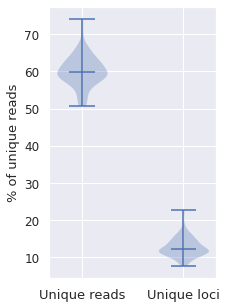

In [260]:
#Look at multimapping stats for L1HS 5p tss only
#matplotlib barplot
import matplotlib.pyplot as plt

fig,ax = plt.subplots(figsize=(3,5))
ax.violinplot(df.iloc[:,2:],
                  showmeans=False,
                  showmedians=True)
ax.yaxis.grid(True)
plt.xticks([1, 2], ['Unique reads', 'Unique loci'], fontsize=13)
plt.ylabel('% of unique reads', fontsize=13)
plt.yticks(fontsize=12)
#increase size of x labels

# ax.set_xlabel('Four separate samples')
# ax.set_ylabel('Observed values')

# ax.set_ylabel('fruit supply')
# ax.set_title('Fruit supply by kind and color')
# ax.legend(title='Fruit color')
#plt.savefig(s_fig+'multimap.svg', dpi = 300, transparent = True)
plt.show()

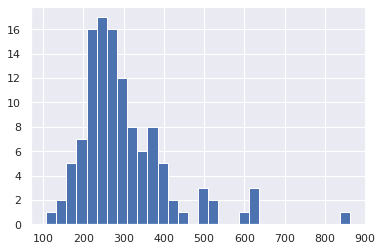

In [267]:
#Look at multimapping stats for L1HS 5p tss only

# Plot how many unique reads there are per donor
plt.hist(df['n_unique'],bins=30)
plt.show()

In [303]:
#Look at multimapping stats for entire L1HS
import pysam
import pandas as pd
bed=pd.read_csv('/cndd3/dburrows/DATA/annotations/rmsk/rmsk.hg38.filt-5ptrim.merge.bed', sep='\t', header=None)
sub_bed = bed[bed[4] == 'L1HS']
store = sub_bed[3]
sub_bed[3] = sub_bed[5]
sub_bed[5] = store
sub_bed[[1, 2]] = sub_bed[[8, 9]]
sub_bed.to_csv('/cndd3/dburrows/DATA/annotations/rmsk/rmsk.hg38.filt-5ptrim.merge.L1HS_all.bed', sep='\t', header=None, index=None)

/tmp/ipykernel_2692139/3432131160.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_bed[3] = sub_bed[5]
/tmp/ipykernel_2692139/3432131160.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_bed[5] = store
/tmp/ipykernel_2692139/3432131160.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html

In [313]:
%%bash
#sort as bam file is larger 
curr_path=/cndd3/dburrows/DATA/annotations/
#remove any non-canonical chrs from rmsk file
grep -w -f  $curr_path/gencode/chr.txt $curr_path/rmsk/rmsk.hg38.filt-5ptrim.merge.L1HS_all.bed\
> $curr_path/rmsk/rmsk.hg38.filt-5ptrim.merge.L1HS_all.canon.bed

#sort
bedtools sort -g /cndd3/dburrows/DATA/annotations/gencode/chr.txt -i /cndd3/dburrows/DATA/annotations/rmsk/rmsk.hg38.filt-5ptrim.merge.L1HS_all.canon.bed \
> /cndd3/dburrows/DATA/annotations/rmsk/rmsk.hg38.filt-5ptrim.merge.L1HS_all.canon.sorted.bed

In [ ]:

# filter
#remove uneeded klarge files
# check once

#put into multi process

In [22]:

# Assuming you have a chr.txt file with one chromosome per line
# And a BAM file you want to filter

# Create a variable to hold the list of chromosomes
! chromosomes=$(paste -s -d, /cndd3/dburrows/DATA/annotations/gencode/chr.txt)
! $chromosomes
# Use samtools to filter the BAM file
samtools view -b in.bam $chromosomes > filtered.bam

In [27]:
! ls -ltrh /cndd3/dburrows/DATA/te/rna/PE.bam/Sample_5643_GLU

total 18G
-rw-r--r-- 1 dburrows cogsci-cndd-dev 4.3G May  8  2023 Aligned.toTranscriptome.out.bam
-rw-r--r-- 1 dburrows cogsci-cndd-dev  13M May  8  2023 SJ.out.tab
-rw-r--r-- 1 dburrows cogsci-cndd-dev 1.6M May  8  2023 ReadsPerGene.out.tab
-rw-r--r-- 1 dburrows cogsci-cndd-dev  13G May  8  2023 Aligned.sortedByCoord.out.bam
-rw-r--r-- 1 dburrows cogsci-cndd-dev 2.2K May  8  2023 Log.progress.out
-rw-r--r-- 1 dburrows cogsci-cndd-dev  20K May  8  2023 Log.out
-rw-r--r-- 1 dburrows cogsci-cndd-dev 2.0K May  8  2023 Log.final.out
drwx--S--- 3 dburrows cogsci-cndd-dev    3 May  8  2023 _STARtmp
-rw-r--r-- 1 dburrows cogsci-cndd-dev 5.4M May  8  2023 Aligned.sortedByCoord.out.bam.bai
-rwxr-xr-x 1 dburrows cogsci-cndd-dev 1.2K May  8  2023 log.workspace
-rw-r--r-- 1 dburrows cogsci-cndd-dev 1.2G Jan 10 05:34 Aligned.sortedByCoord.out.r2.bam


In [30]:
in_path = '/cndd3/dburrows/DATA/te/rna/PE.bam/'
out_path='/cndd/dburrows/DATA/te/rna/PE.counts/ATEM/'

dir_list = [os.path.basename(i) for i in glob.glob(in_path + '*Samp*')]
x=0
d=dir_list[0]

# remove read 1
run = f"""
samtools view -b -F 0x40 {in_path}/{d}/Aligned.sortedByCoord.out.bam > {in_path}/{d}/Aligned.sortedByCoord.out.r2.bam
samtools index {in_path}/{d}/Aligned.sortedByCoord.out.r2.bam
chromosomes=$(paste -s -d, /cndd3/dburrows/DATA/annotations/gencode/chr.txt)
samtools view -b {in_path}/{d}/Aligned.sortedByCoord.out.r2.bam $chromosomes > {in_path}/{d}/Aligned.sortedByCoord.out.r2.canon.bam
"""

# # #filter 5ptss by L1HS loci
# run = f""" bedtools intersect -s -sorted -wb -b {bam_path}/{d}/Aligned.sortedByCoord.out.bam -a /cndd3/dburrows/DATA/annotations/rmsk/rmsk.hg38.filt-5ptrim.merge.L1HS_all.canon.sorted.bed \
# > {d}/L1HS_all.bam
#     """ 
get_ipython().run_cell_magic('bash', '', run)


Process is interrupted.


In [304]:
path='/cndd/dburrows/DATA/te/rna/PE.counts/ATEM/'
bam_path = '/cndd3/dburrows/DATA/te/rna/PE.bam/'
dir_list = glob.glob(path + '*Samp*')

for x,d in enumerate(dir_list):
    run = f""" grep -w -f  /cndd3/dburrows.D/gencode/chr.txt $curr_path/rmsk/rmsk.hg38.filt-5ptrim.merge.L1HS_all.bed\
> $curr_path/rmsk/rmsk.hg38.filt-5ptrim.merge.L1HS_all.canon.bed
"""
    
    # #filter 5ptss by L1HS loci
    run = f""" bedtools intersect -s -sorted -wb -b {bam_path}/{d}/Aligned.sortedByCoord.out.bam -a /cndd3/dburrows/DATA/annotations/rmsk/rmsk.hg38.filt-5ptrim.merge.L1HS_all.canon.sorted.bed \
    > {d}/L1HS_all.bam
        """ 
    get_ipython().run_cell_magic('bash', '', run)
    if x%int(len(dir_list)/10) == 0: print(f'{int(x/(len(dir_list))*100)}% Done')

0          1          2   3     4  5     6     7          8  \
64       chr1   85748520   85754548  L1  L1HS  +  LINE  6029   85748520   
65       chr1   85927068   85933100  L1  L1HS  +  LINE  6031   85927068   
185      chr1  197707715  197713746  L1  L1HS  +  LINE  6030  197707715   
291     chr10   85355507   85361538  L1  L1HS  +  LINE  6031   85355507   
450     chr11   85324759   85330821  L1  L1HS  +  LINE  6031   85324759   
...       ...        ...        ...  ..   ... ..   ...   ...        ...   
474670   chrX   66180697   66186728  L1  L1HS  -  LINE  6031   66180697   
474748   chrX   83059585   83065637  L1  L1HS  -  LINE  6031   83059585   
474892   chrX  141421203  141427246  L1  L1HS  -  LINE  6031  141421203   
474911   chrX  155516017  155522048  L1  L1HS  -  LINE  6031  155516017   
474922   chrY    5606145    5612199  L1  L1HS  -  LINE  6031    5606145   

                9  
64       85754548  
65       85933100  
185     197713746  
291      85361538  
450      85330821  
...           ...  
474670   66186728  
474748   83065637  
474892  141427246  
474911  155522048  
474922    5612199  

[177 rows x 10 columns]

In [325]:
! ls /cndd3/dburrows/DATA/te/rna/PE.bam//Sample_1275_GLU

Aligned.sortedByCoord.out.bam	   Log.out		 SJ.out.tab
Aligned.sortedByCoord.out.bam.bai  Log.progress.out	 _STARtmp
Aligned.toTranscriptome.out.bam    log.workspace
Log.final.out			   ReadsPerGene.out.tab


In [ ]:
#use pool multiprocessing
import multiprocessing
import glob

def process_directory(d):
    # The commands to be executed for each directory
    d=os.path.basename(d)
    run = f""" grep -w -f  /cndd3/dburrows.D/gencode/chr.txt $curr_path/rmsk/rmsk.hg38.filt-5ptrim.merge.L1HS_all.bed\
> $curr_path/rmsk/rmsk.hg38.filt-5ptrim.merge.L1HS_all.canon.bed
"""
    run = f""" bedtools intersect -s -sorted -wb -b {bam_path}/{d}/Aligned.sortedByCoord.out.bam -a /cndd3/dburrows/DATA/annotations/rmsk/rmsk.hg38.filt-5ptrim.merge.L1HS_all.canon.sorted.bed \
    > {d}/L1HS_all.bam
    """
    get_ipython().run_cell_magic('bash', '', run)
    # Additional code for each directory can be added here

#this section shows what default arguments will be run if just executing the script
if __name__ == "__main__":
    path = '/cndd/dburrows/DATA/te/rna/PE.counts/ATEM_old/'
    bam_path = '/cndd3/dburrows/DATA/te/rna/PE.bam/'
    dir_list = glob.glob(path + '*Samp*')

    # Create a pool of 10 worker processes
    with multiprocessing.Pool(10) as pool:
        # Map the process_directory function to each item in dir_list
        pool.map(process_directory, dir_list)

    print("All tasks completed.")

In [324]:
dir_list

['/cndd/dburrows/DATA/te/rna/PE.counts/ATEM_old/Sample_5401_GABA',
 '/cndd/dburrows/DATA/te/rna/PE.counts/ATEM_old/Sample_5744_GABA',
 '/cndd/dburrows/DATA/te/rna/PE.counts/ATEM_old/Sample_198035-1765_GABA',
 '/cndd/dburrows/DATA/te/rna/PE.counts/ATEM_old/Sample_1275_GLU',
 '/cndd/dburrows/DATA/te/rna/PE.counts/ATEM_old/Sample_4379_GLU',
 '/cndd/dburrows/DATA/te/rna/PE.counts/ATEM_old/Sample_198034-1435_GLU',
 '/cndd/dburrows/DATA/te/rna/PE.counts/ATEM_old/Sample_HCT16HECA028_GABA',
 '/cndd/dburrows/DATA/te/rna/PE.counts/ATEM_old/Sample_5293_GABA',
 '/cndd/dburrows/DATA/te/rna/PE.counts/ATEM_old/Sample_HCT17HEIA010_GABA',
 '/cndd/dburrows/DATA/te/rna/PE.counts/ATEM_old/Sample_1848_GABA',
 '/cndd/dburrows/DATA/te/rna/PE.counts/ATEM_old/Sample_5744_GLU',
 '/cndd/dburrows/DATA/te/rna/PE.counts/ATEM_old/Sample_4332_GABA',
 '/cndd/dburrows/DATA/te/rna/PE.counts/ATEM_old/Sample_4379_GABA',
 '/cndd/dburrows/DATA/te/rna/PE.counts/ATEM_old/Sample_4337_GLU',
 '/cndd/dburrows/DATA/te/rna/PE.count

In [ ]:
import pysam
#calculate multi-mapper statistics
ratio_l = []
unq_v = []
for x,c in enumerate(curr_l):
    df = te.multimap_stats(c+'/5pfilt-tss.bam')
    #save csv 
    df.to_csv(c + '/multimap_stats.csv')
    print(str(x) + ' of ' + str(len(curr_l)))


In [ ]:
prac = pd.DataFrame()
for c in curr_l:     
    multimap = pd.read_csv(c + '/multimap_stats.csv', sep=',', header=0, index_col=0)  
    prac = pd.concat([prac, multimap])
prac = prac.iloc[:,2:]
prac

In [240]:
#Calculate extent of multimapping at L1HS 5prime aligning reads
path='/cndd/dburrows/DATA/te/rna/PE.counts/ATEM_old/'
dir_list = glob.glob(path + '*Samp*')

for x,d in enumerate(dir_list):
    run = f"""samtools view {d}/5pfilt-tss.L1HS.bam | wc -l"""
    
    get_ipython().run_cell_magic('bash', '', run)

1529
2320
3244
1522
1722
2148
1983
3032
1935
1997
3484
2174
2097
1942
3507
6079
2151
3096
3095
1944
2053
1926
1503
2838
2227
3023
720
3718
1491
1812
2683
2812
1901
1887
3793
1993
2383
2273
3911
2103
2219
866
2434
1857
5006
2513
1802
1952
1812
2946
3471
2167
1184
1488
1838
2839
2395
3074
2318
3210
1620
1299
1465
2066
1903
2169
2545
1814
2911
2004
3409
1510
1805
2915
1500
2619
2348
2286
2239
2957
4802
1902
2160
1878
1738
3628
2962
3141
3173
2753
2428
2976
1578
2346
2023
2952
1566
2104
2308
2485
1097
1364
3887
1820
2206
3118
3746
4170
1761
1799
2494
1884
2232
2309
1689
3019


In [233]:
len(dir_list/

TypeError: unsupported operand type(s) for /: 'list' and 'int'

In [217]:
for x, d in enumerate(dir_list):
    if x
    int(116/10)

11

In [ ]:
#check how many of each locitype remains in file
for string in str_list:
    print(string)
    if "cpg" in string:
        run = f""" grep {string} /cndd3/dburrows/DATA/annotations/rmsk/gencode.v37.CGI.hg38.jofan.rmsk_intersect.bed \
            | wc -l 
    
    """
    else:
        run = f""" grep {string} /cndd3/dburrows/DATA/annotations/rmsk/gencode.v37.gene_annotation.hg38.jofan.rmsk_intersect.bed \
            | wc -l 
    
    """
    get_ipython().run_cell_magic('bash', '', run)
    
    
%%bash
#Locitype abundance at full-length TEs
#=========================================================

# 1. filtered rmsk -> bedtools intersect, stranded, bp overlap
#=========================================================
curr_path=/cndd3/dburrows/DATA/annotations/
echo $curr_path
#all locitypes (stranded)
bedtools intersect -s -wo -sorted -a $curr_path/rmsk/rmsk.hg38.filt-5ptrim.merge.canon.sort.bed \
-b $curr_path/rmsk/gencode.v37.gene_annotation.hg38.jofan.rmsk_intersect.bed \
> $curr_path/rmsk/rmsk.hg38.filt-5ptrim.merge.gene_annotation_intersect.bed

# #CGIs (unstranded)
bedtools intersect -wo -sorted -a $curr_path/rmsk/rmsk.hg38.filt-5ptrim.merge.canon.sort.bed \
-b $curr_path/rmsk/gencode.v37.CGI.hg38.jofan.rmsk_intersect.bed \
> $curr_path/rmsk/rmsk.hg38.filt-5ptrim.merge.CGI_intersect.bed

In [ ]:
path='/cndd/dburrows/DATA/te/rna/PE.counts/ATEM_old/Sample_1105_GABA/5pfilt-tss.bam'
import pysam
import pandas as pd
fin = pysam.AlignmentFile(path, 'rb')
count=0
test=[]
for x,read in enumerate(fin):
    print(read.query_name)
    if x==10: break
#     test = np.append(test,read.query_name)
#     count+=1

In [186]:
import pysam
prac = '/cndd/dburrows/DATA/te/rna/PE.counts/ATEM_old/Sample_1105_GABA/5pfilt-tss.bam'
fin = pysam.AlignmentFile(prac, 'rb')
fin

In [ ]:
%%bash

samtools view -h -F 256 input.bam > 5pfilt-tss.unique.bam

# CZI single cell
* should i just do normal DE Wilcoxon across two groups?
* check that youre using DESEQ correctly

In [421]:
# Metadata
meta = pd.read_csv('/cndd3/dburrows/DATA/te/metadata/CZI/CZI-metadata.csv')
ev_df = pd.read_csv('/cndd3/dburrows/DATA/te/annotations/rmsk/evolutionary_age.csv')
meta

sequencing_id sample donor chunk  ncells_pass_qc Sample ID  \
0           CZI1   OF1A   OF1     A             NaN       OF1   
1           CZI2   OM1A   OM1     A             NaN       OM1   
2           CZI3   OM2A   OM2     A             NaN       OM2   
3           CZI4   OF1A   OF1     A             NaN       OF1   
4           CZI5   OF1B   OF1     B             NaN       OF1   
5           CZI6   YF1A   YF1     A             NaN       YF1   
6           CZI7   YM1A   YM1     A             NaN       YM1   
7           CZI8   YM1B   YM1     B             NaN       YM1   
8           CZI9   YM3B   YM3     B             NaN       YM3   
9          CZI10   YF2B   YF2     B             NaN       YF2   
10         CZI11   YM2B   YM2     B             NaN       YM2   
11         CZI12   YM3A   YM3     A             NaN       YM3   
12         CZI13   YF1B   YF1     B             NaN       YF1   
13         CZI14   OM3A   OM3     A             NaN       OM3   
14         CZI15   OF2B   OF2     B             NaN       OF2   
15         CZI16   OF3A   OF3     A             NaN       OF3   
16         CZI17   OM3B   OM3     B             NaN       OM3   
17         CZI18   OF3B   OF3     B             NaN       OF3   
18         CZI19   YF1A   YF1     A             NaN       YF1   
19         CZI20   YF2A   YF2     A             NaN       YF2   
20         CZI21   YM2A   YM2     A             NaN       YM2   
21         CZI22   OM1B   OM1     B             NaN       OM1   
22         CZI23   OF2A   OF2     A             NaN       OF2   

                     NOTES Brain bank ID  Priority Status of tissue sample  \
0                      NaN          3543         6          arrived 9-9-20   
1                      NaN          3805         1          arrived 9-9-20   
2                      NaN          4634         5          arrived 9-9-20   
3                      NaN          3543         6          arrived 9-9-20   
4                      NaN          3543         6          arrived 9-9-20   
5                      NaN         13019        11                received   
6   YM1a ran out of tissue         13237         7                received   
7   YM1a ran out of tissue         13237         7                received   
8                      NaN          5679         9          arrived 9-9-20   
9                      NaN         13260        10                received   
10                     NaN          5730         8          arrived 9-9-20   
11                     NaN          5679         9          arrived 9-9-20   
12                     NaN         13019        11                received   
13                     NaN         HctYC         3                received   
14                     NaN          3603         2          arrived 9-9-20   
15                     NaN         HctYH        12                received   
16                     NaN         HctYC         3                received   
17                     NaN         HctYH        12                received   
18                     NaN         13019        11                received   
19                     NaN         13260        10                received   
20                     NaN          5730         8          arrived 9-9-20   
21                     NaN          3805         1          arrived 9-9-20   
22                     NaN          3603         2          arrived 9-9-20   

    ...  RIN (from brain bank docs)  RIN (remeasured on our samples)  \
0   ...                         7.5                              6.6   
1   ...                         8.9                              4.8   
2   ...                         8.4                              2.0   
3   ...                         7.5                              6.6   
4   ...                         7.5                              6.6   
5   ...                         8.1                              7.0   
6   ...                         6.6                              

In [487]:
#Find all those with > 1CPM expression or 50 for Alu
df = pd.read_csv('/cndd/dburrows/DATA/te/rna/PE.counts/DE/ATEM_CPM.csv', index_col=0)
meta = pd.read_csv('//cndd3/dburrows/DATA/te/metadata/PE/PEC_RNAmeta.csv')

#Filter low CPM data
thresh = 1
ind = np.mean(df, axis=1) >thresh #indeces of ones to keep
sub_df = df.loc[ind]
sub1 = sub_df.index.values
sub1 = [i  for i in sub1 if 'Alu' not in i]

thresh = 50
ind = np.mean(df, axis=1) >thresh #indeces of ones to keep
sub_df = df.loc[ind]
sub_te = np.append(sub_df.index.values,sub1)
sub_te

array(['AluSp', 'AluJo', 'AluJr', 'AluSx', 'AluSz6', 'AluSc', 'AluSz',
       'AluY', 'AluSx3', 'AluSq', 'AluJb', 'AluSq2', 'AluSg', 'AluJr4',
       'AluSx1', 'AluSc8', 'L1PA6', 'L1PA4', 'L1PA7', 'L1PA2', 'L1PA5',
       'L1PA8A', 'L1PA8', 'L1PA10', 'L1PA3', 'L1HS', 'FLAM_C', 'SVA_D',
       'SVA_F', 'SVA_B', 'SVA_E', 'SVA_C', 'SVA_A'], dtype=object)

In [422]:
dm = meta[['sequencing_id', 'donor', 'Subject Sex', 'Subject Age']]
age_ = dm['Subject Age'].values

age_ = age_.astype('object')
less = np.where(age_ < 50)[0]
more = np.where(age_ >= 50)[0]
age_[less] ='Y'
age_[more] = 'O'
age_

array(['O', 'O', 'O', 'O', 'O', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'O', 'O', 'O', 'O', 'O', 'Y', 'Y', 'Y', 'O', 'O'], dtype=object)

In [424]:
#Make design matrix
dm = meta[['sequencing_id', 'donor', 'Subject Sex', 'Subject Age']]
age_ = dm['Subject Age'].values

age_ = age_.astype('object')
less = np.where(age_ < 50)[0]
more = np.where(age_ >= 50)[0]
age_[less] ='Y'
age_[more] = 'O'
dm['Subject Age'] = age_
# new_age = (age_ - np.mean(age_))/np.std(age_)
# dm['age_stand'] = new_age
dm = dm.drop([0,2,5,6,13])
dm.to_csv('/cndd3/dburrows/DATA/te/rna/CZI.counts/DESEQ/ATEM_design.csv')
dm

/tmp/ipykernel_1405454/2521802042.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dm['Subject Age'] = age_


sequencing_id donor Subject Sex Subject Age
1           CZI2   OM1        Male           O
3           CZI4   OF1      Female           O
4           CZI5   OF1      Female           O
7           CZI8   YM1        Male           Y
8           CZI9   YM3        Male           Y
9          CZI10   YF2      Female           Y
10         CZI11   YM2        Male           Y
11         CZI12   YM3        Male           Y
12         CZI13   YF1      Female           Y
14         CZI15   OF2      Female           O
15         CZI16   OF3      Female           O
16         CZI17   OM3        Male           O
17         CZI18   OF3      Female           O
18         CZI19   YF1      Female           Y
19         CZI20   YF2      Female           Y
20         CZI21   YM2        Male           Y
21         CZI22   OM1        Male           O
22         CZI23   OF2      Female           O

In [488]:
#Find all unique cell types
cell_l = []
os.chdir('/cndd3/dburrows/DATA/te/rna/CZI.counts/ATEM/pseudobulk/')
samp_l = glob.glob('*CZI*')
for s in samp_l:
    os.chdir(s)
    cell_l = np.append(cell_l,[glob.glob('*ATEM*')[i].split('.')[0] for i in range(len(glob.glob('*ATEM*')))])
    os.chdir('..')
unq_cell = np.unique(cell_l)
unq_cell

array(['CGE_ADARB2_ADAM33', 'CGE_LAMP5', 'CGE_LAMP5_LHX6', 'CGE_PAX6',
       'CGE_VIP', 'Glia_Astro', 'Glia_Oligo', 'L2-4IT_CUX2',
       'L3-5IT_RORB_PLCH1', 'L4-5IT_RORB_ARHGAP15', 'L4-5IT_RORB_LRRK1',
       'L4-5IT_RORB_TSHZ2', 'L56NP_TLE4_TSHZ2', 'L6', 'L6IT_THEMIS_CUX1',
       'L6IT_THEMIS_LINC00343', 'MGE_PVALB', 'MGE_SST', 'MGE_SST_CLMP'],
      dtype='<U32')

In [504]:
#Make gene x sample matrix for each cell type for DESEQ
os.chdir('/cndd3/dburrows/DATA/te/rna/CZI.counts/ATEM/pseudobulk/')
samp_l = dm['sequencing_id'].values
mode='Count'
for cell in unq_cell:
    te = sub_te #include those with CPMs > 1
    dict = {'element':te}
    for s in samp_l:
        os.chdir(glob.glob('*' + s + '_*')[0])
        curr_cell = glob.glob(cell + '.*ATEM*')
        if len(curr_cell)!=0:
            te_v = ter.load_ATEM_family(curr_cell[0], te, mode)

        else:
            te_v = np.zeros(len(te))

        assert len(te) == len(te_v), 'Error: Not all TE elements were counted'
        #Add to dict
        dict[s] = te_v

        #if len(curr_cell) == 0:
        os.chdir('..')
    df = pd.DataFrame(dict)
    #set first column to index
    df.set_index('element', inplace=True)
    df = df.astype(int)
    df+=1
    l1_df = df.iloc[16:26]
    l1_df.to_csv('/cndd3/dburrows/DATA/te/rna/CZI.counts/DESEQ/' + cell + '_' + mode + 'L1.ATEM.csv')
    alu_df = df.iloc[:16]
    alu_df.to_csv('/cndd3/dburrows/DATA/te/rna/CZI.counts/DESEQ/' + cell + '_' + mode + 'ALU.ATEM.csv')
    sva_df = df.iloc[27:]
    sva_df.to_csv('/cndd3/dburrows/DATA/te/rna/CZI.counts/DESEQ/' + cell + '_' + mode + 'SVA.ATEM.csv')
    

In [515]:
#put all LFC and padj into a dataframe for cells x TEs 
def heatmat(string, factor):
    os.chdir('/cndd3/dburrows/DATA/te/rna/CZI.counts/DESEQ/')

    heat_line, heat_sine, heat_sva = pd.DataFrame(), pd.DataFrame(), pd.DataFrame()
    for cell in unq_cell:
        LINE_df = pd.read_csv(cell + '_CountL1..DESEQ_' + factor + '.csv')
        heat_line[cell] = LINE_df[string].values

        SINE_df = pd.read_csv(cell + '_CountALU..DESEQ_' + factor + '.csv')
        heat_sine[cell] = SINE_df[string].values

        SVA_df = pd.read_csv(cell + '_CountSVA..DESEQ_' + factor + '.csv')
        heat_sva[cell] = SVA_df[string].values

    heat_line = heat_line.T
    heat_sine = heat_sine.T
    heat_sva = heat_sva.T
    return heat_line, heat_sine, heat_sva

In [516]:
#EFFECT OF AGE
line_lfc, sine_lfc, sva_lfc = heatmat('log2FoldChange', 'age')
line_padj, sine_padj, sva_padj = heatmat('padj', 'age')

In [521]:
l1_df.index

Index(['L1PA6', 'L1PA4', 'L1PA7', 'L1PA2', 'L1PA5', 'L1PA8A', 'L1PA8',
       'L1PA10', 'L1PA3', 'L1HS'],
      dtype='object', name='element')

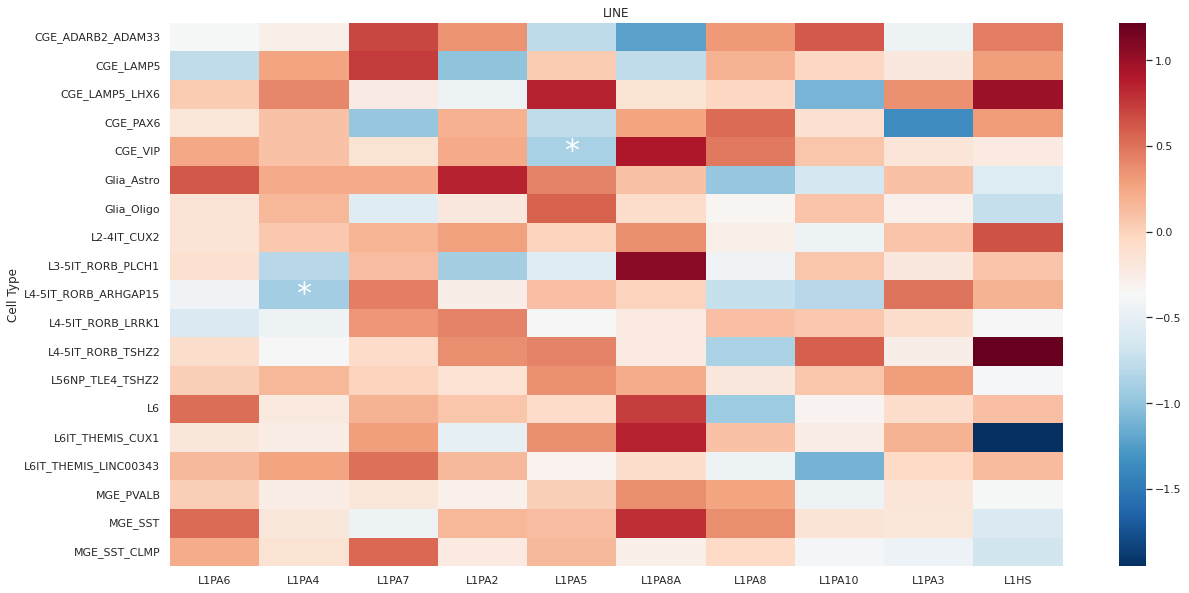

In [532]:
#OLD VS YOUNG
#make a heatmap of heat_line
import seaborn as sns
fig, ax = plt.subplots(figsize=(20,10))
sns.heatmap(line_lfc*-1, cmap='RdBu_r', ax=ax, xticklabels=l1_df.index.values)
#add * symbol to indicate significance
for i in range(len(line_lfc)):
    for j in range(len(line_lfc.columns)):
        if line_padj.iloc[i,j] < 0.05:
            ax.text(j+0.5, i+0.5, '*', ha='center', va='center', color='white', fontsize=30)
ax.set_title('LINE')
ax.set_ylabel('Cell Type')
#label x ticks with list of strings
plt.show()

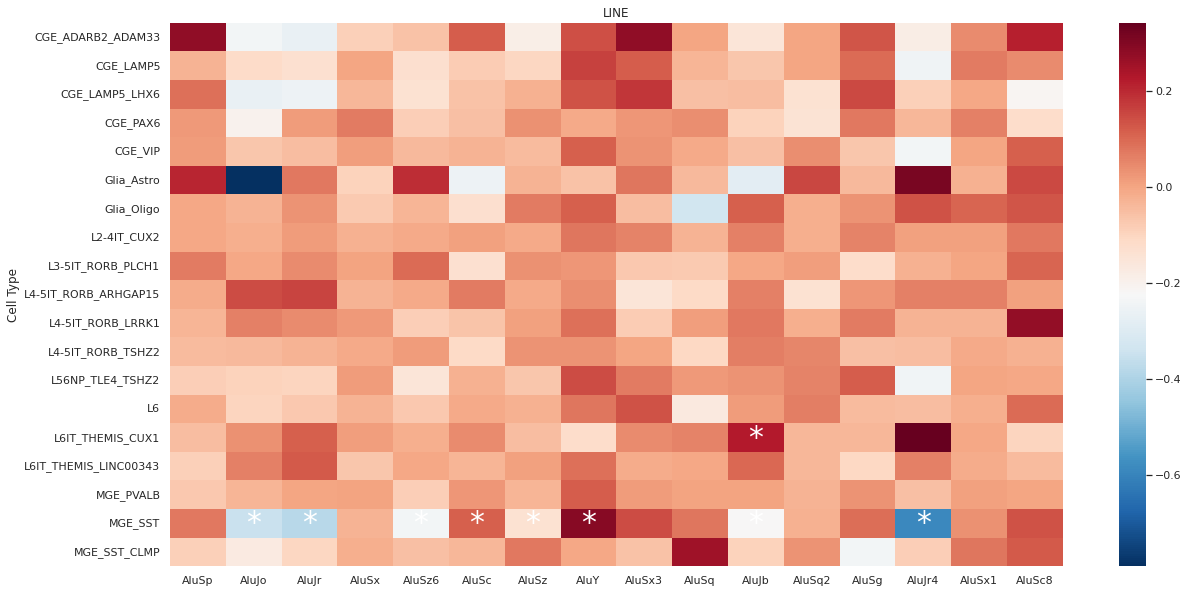

In [534]:
#OLD VS YOUNG
#make a heatmap of heat_line
import seaborn as sns
fig, ax = plt.subplots(figsize=(20,10))
sns.heatmap(sine_lfc*-1, cmap='RdBu_r', ax=ax, xticklabels=alu_df.index.values)
#add * symbol to indicate significance
for i in range(len(sine_lfc)):
    for j in range(len(sine_lfc.columns)):
        if sine_padj.iloc[i,j] < 0.05:
            ax.text(j+0.5, i+0.5, '*', ha='center', va='center', color='white', fontsize=30)
ax.set_title('LINE')
ax.set_ylabel('Cell Type')
#label x ticks with list of strings
plt.show()

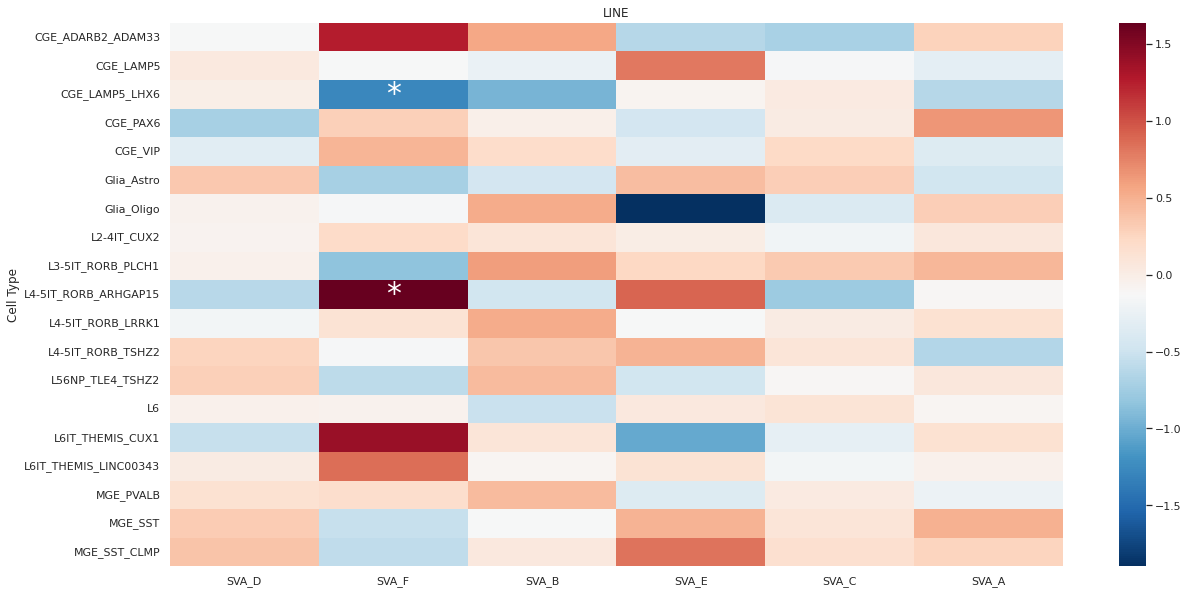

In [537]:
#OLD VS YOUNG
#make a heatmap of heat_line
import seaborn as sns
fig, ax = plt.subplots(figsize=(20,10))
sns.heatmap(sva_lfc*-1, cmap='RdBu_r', ax=ax, xticklabels=sva_df.index.values)
#add * symbol to indicate significance
for i in range(len(sva_lfc)):
    for j in range(len(sva_lfc.columns)):
        if sva_padj.iloc[i,j] < 0.05:
            ax.text(j+0.5, i+0.5, '*', ha='center', va='center', color='white', fontsize=30)
ax.set_title('LINE')
ax.set_ylabel('Cell Type')
#label x ticks with list of strings
plt.show()

In [538]:
#EFFECT OF SEX
line_lfc, sine_lfc, sva_lfc = heatmat('log2FoldChange', 'sex')
line_padj, sine_padj, sva_padj = heatmat('padj', 'sex')

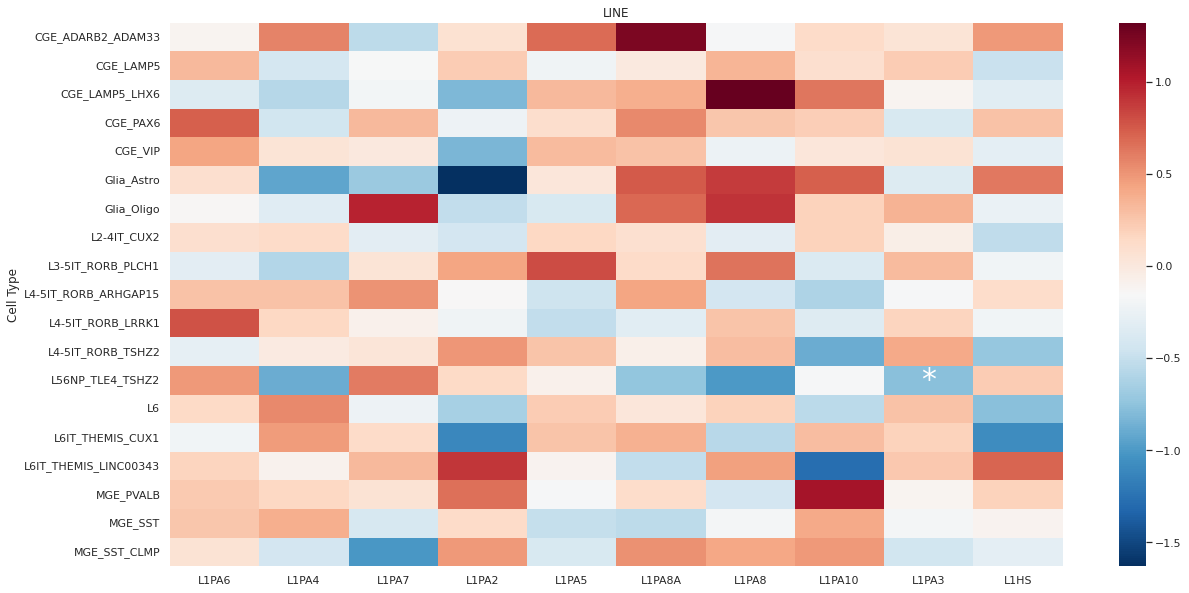

In [539]:
#SEX
#make a heatmap of heat_line
import seaborn as sns
fig, ax = plt.subplots(figsize=(20,10))
sns.heatmap(line_lfc*-1, cmap='RdBu_r', ax=ax, xticklabels=l1_df.index.values)
#add * symbol to indicate significance
for i in range(len(line_lfc)):
    for j in range(len(line_lfc.columns)):
        if line_padj.iloc[i,j] < 0.05:
            ax.text(j+0.5, i+0.5, '*', ha='center', va='center', color='white', fontsize=30)
ax.set_title('LINE')
ax.set_ylabel('Cell Type')
#label x ticks with list of strings
plt.show()

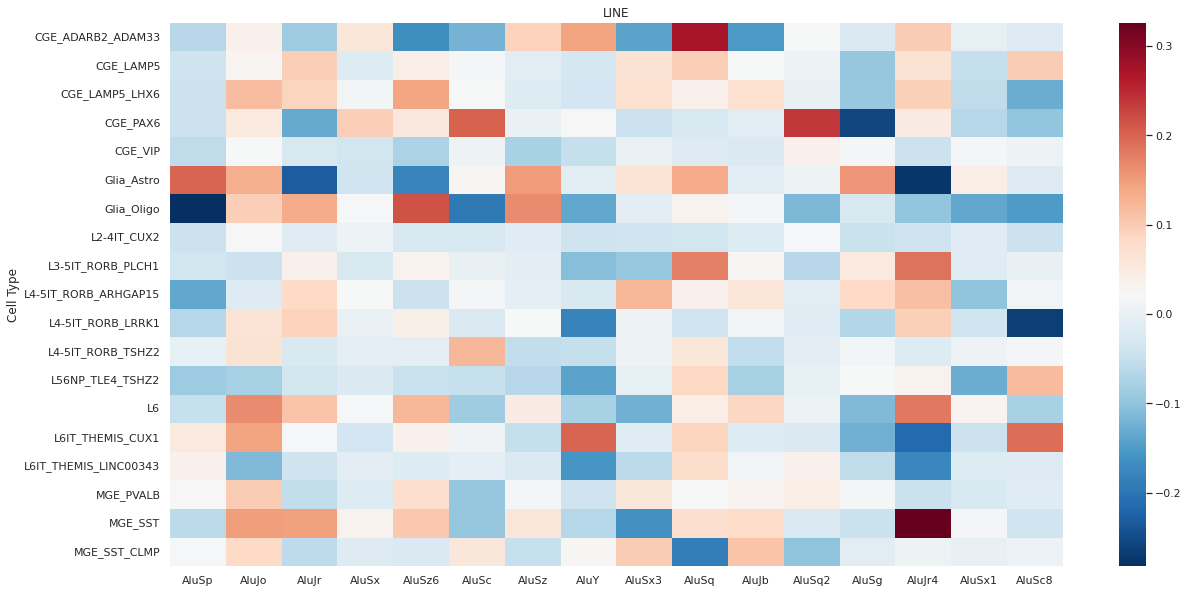

In [540]:
#M VS F
#make a heatmap of heat_line
import seaborn as sns
fig, ax = plt.subplots(figsize=(20,10))
sns.heatmap(sine_lfc*-1, cmap='RdBu_r', ax=ax, xticklabels=alu_df.index.values)
#add * symbol to indicate significance
for i in range(len(sine_lfc)):
    for j in range(len(sine_lfc.columns)):
        if sine_padj.iloc[i,j] < 0.05:
            ax.text(j+0.5, i+0.5, '*', ha='center', va='center', color='white', fontsize=30)
ax.set_title('LINE')
ax.set_ylabel('Cell Type')
#label x ticks with list of strings
plt.show()

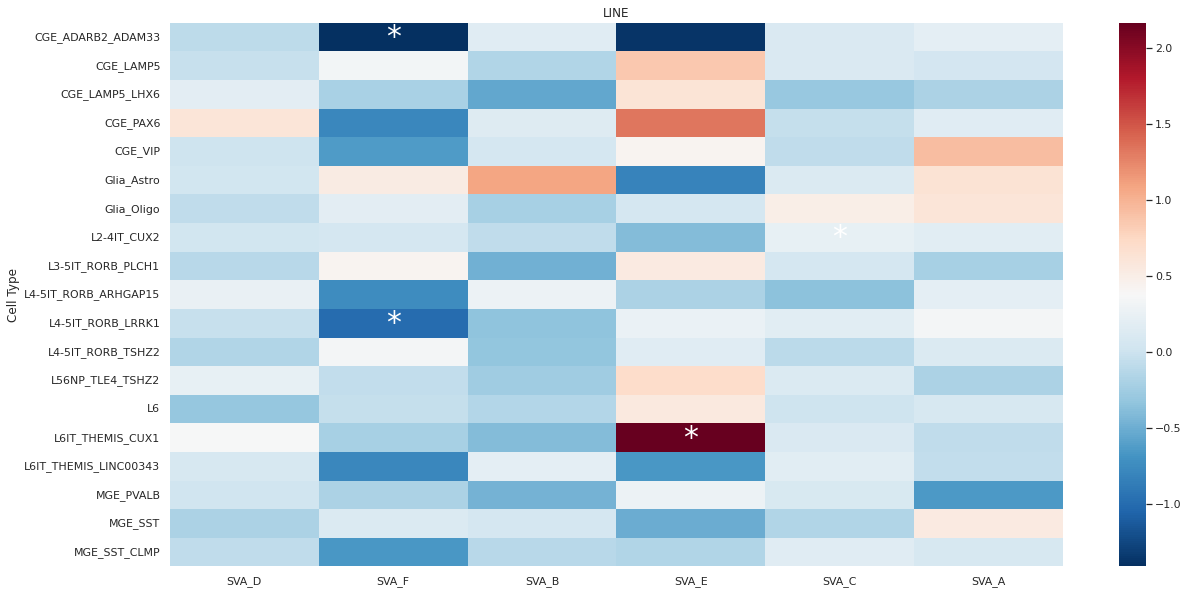

In [541]:
#M VS F
#make a heatmap of heat_line
import seaborn as sns
fig, ax = plt.subplots(figsize=(20,10))
sns.heatmap(sva_lfc*-1, cmap='RdBu_r', ax=ax, xticklabels=sva_df.index.values)
#add * symbol to indicate significance
for i in range(len(sva_lfc)):
    for j in range(len(sva_lfc.columns)):
        if sva_padj.iloc[i,j] < 0.05:
            ax.text(j+0.5, i+0.5, '*', ha='center', va='center', color='white', fontsize=30)
ax.set_title('LINE')
ax.set_ylabel('Cell Type')
#label x ticks with list of strings
plt.show()

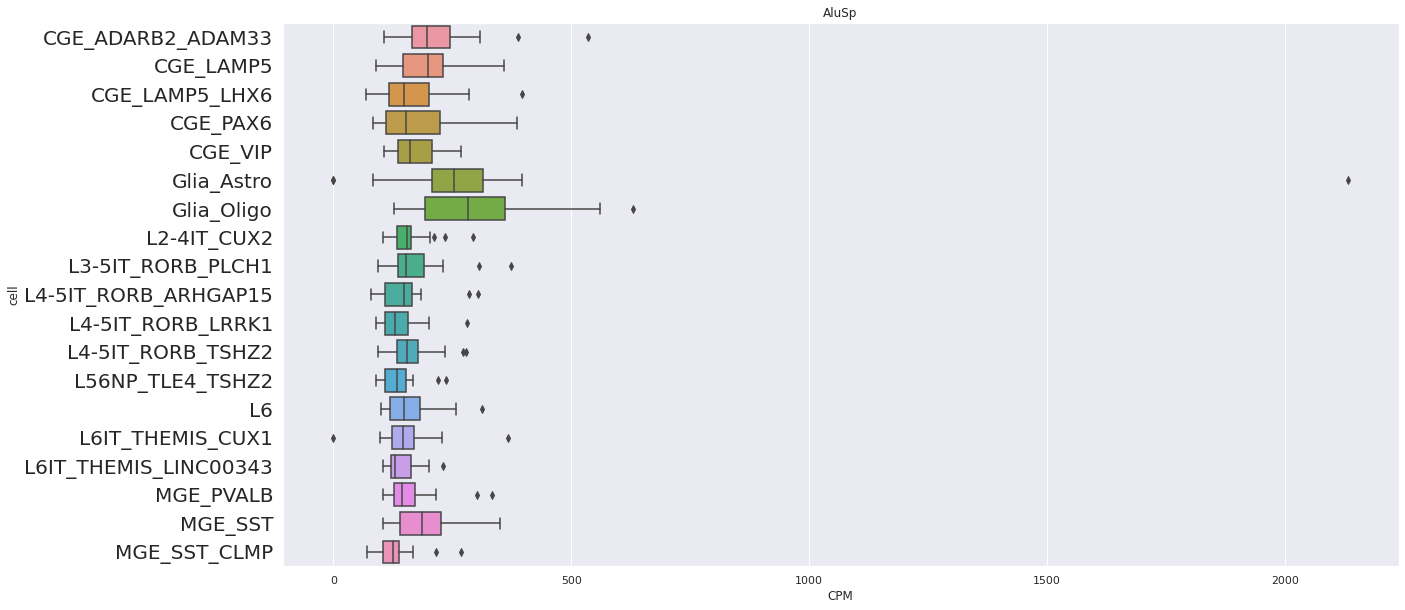

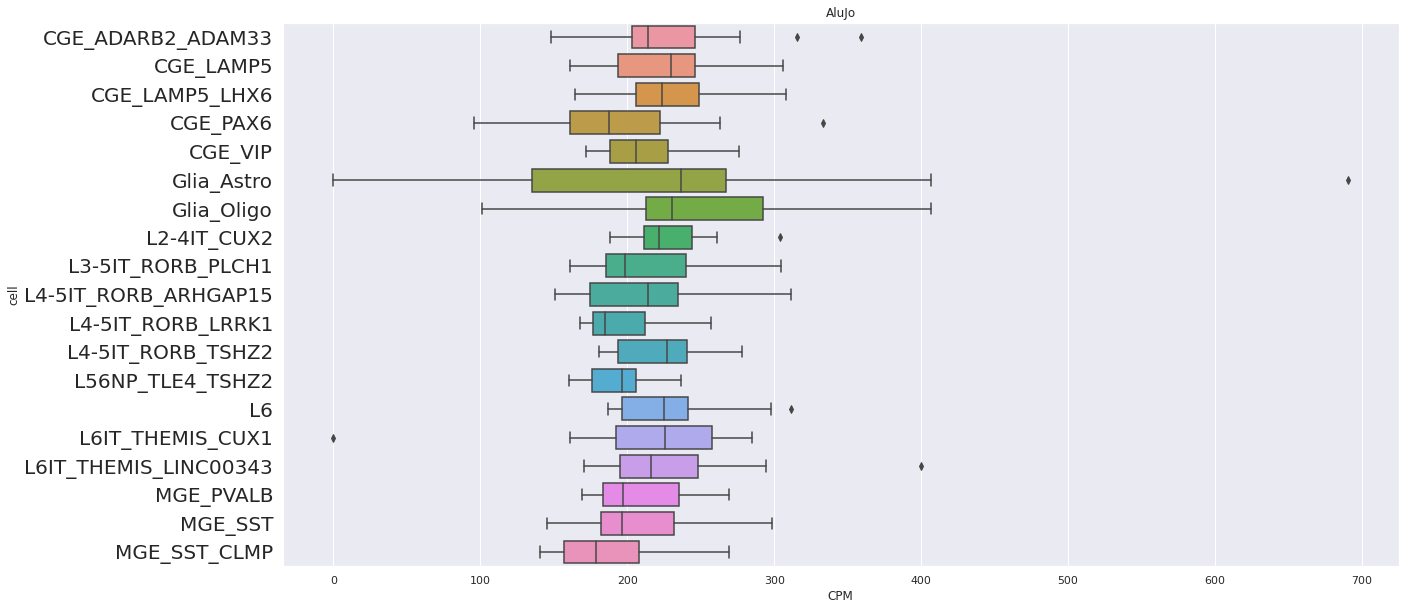

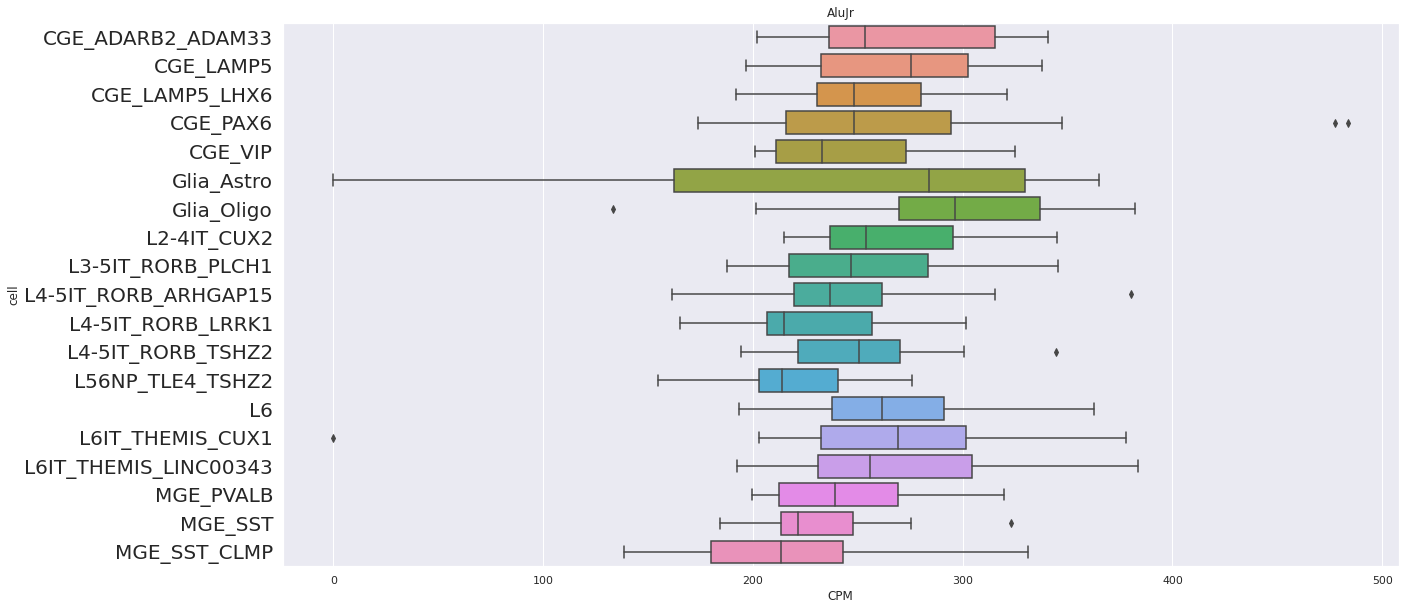

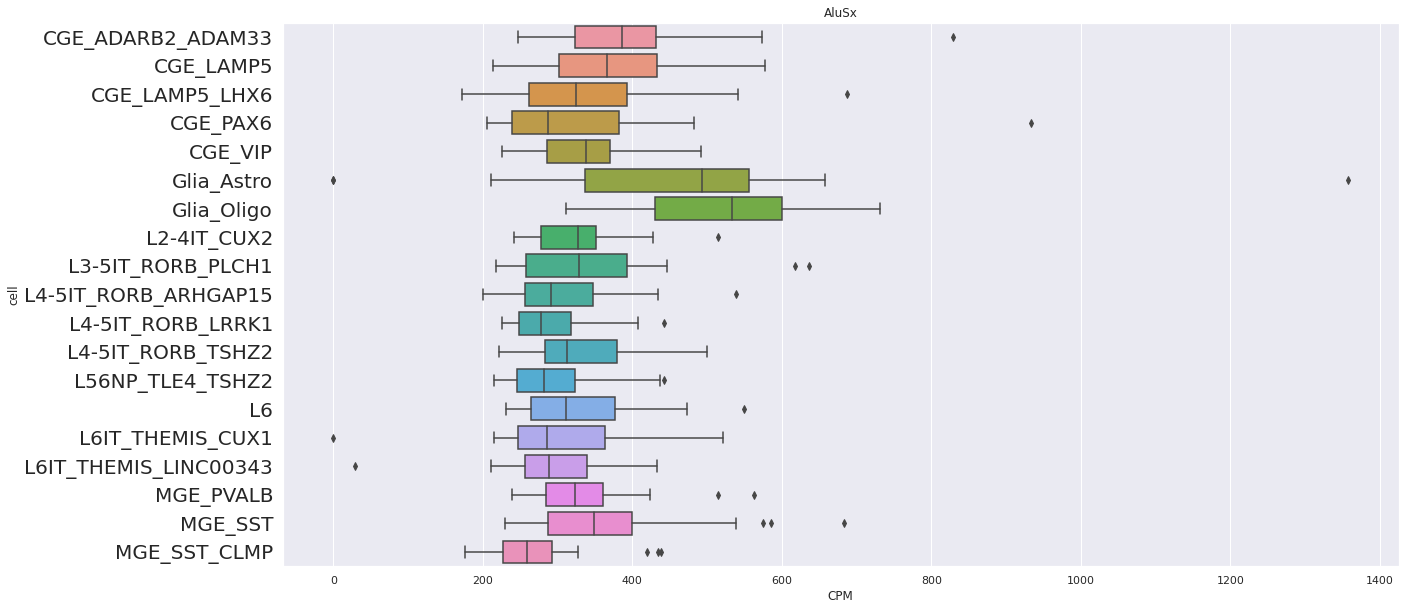

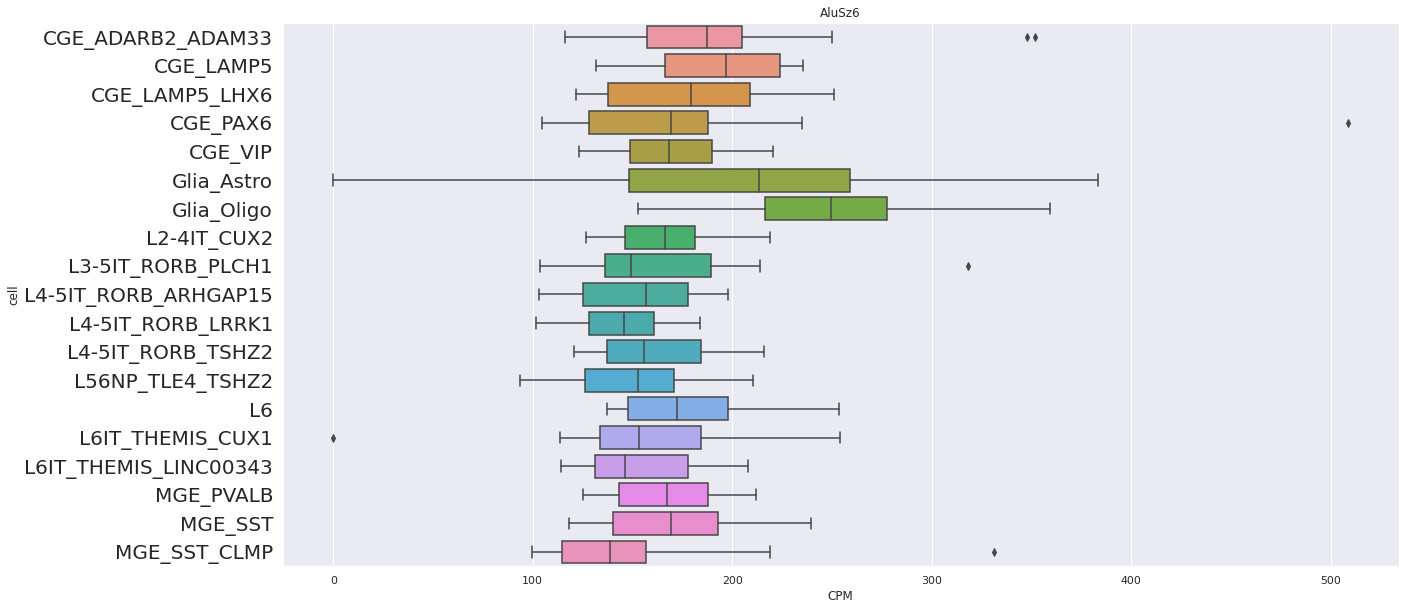

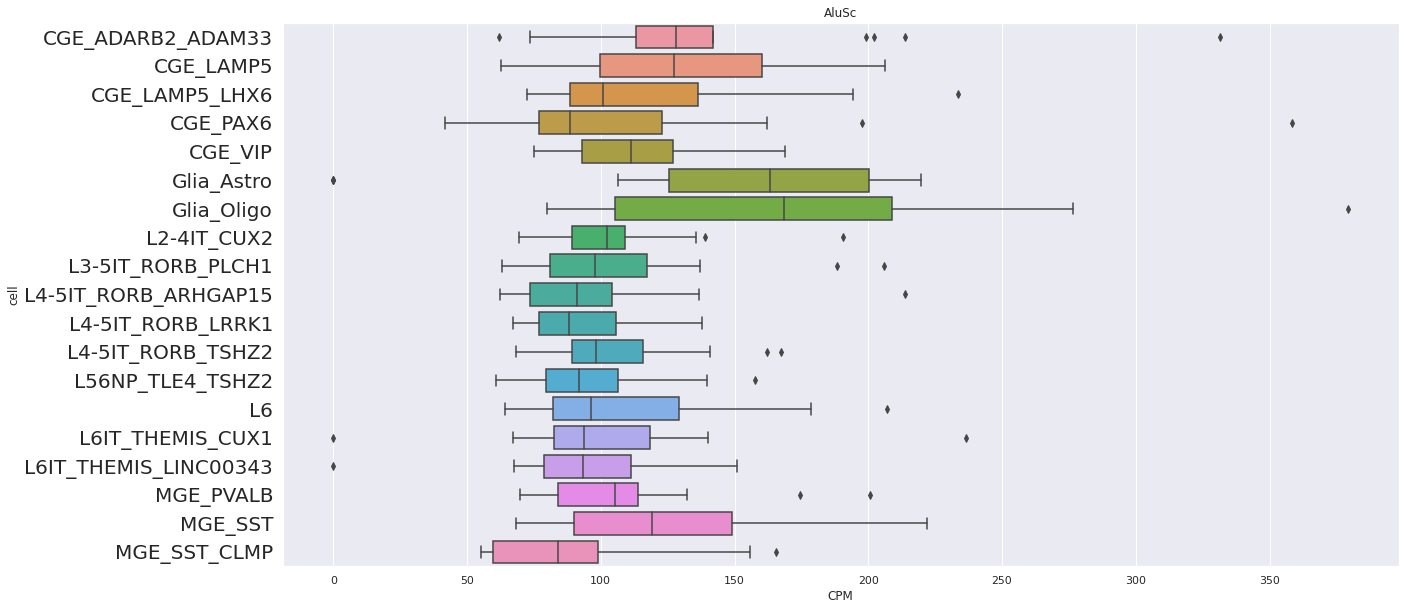

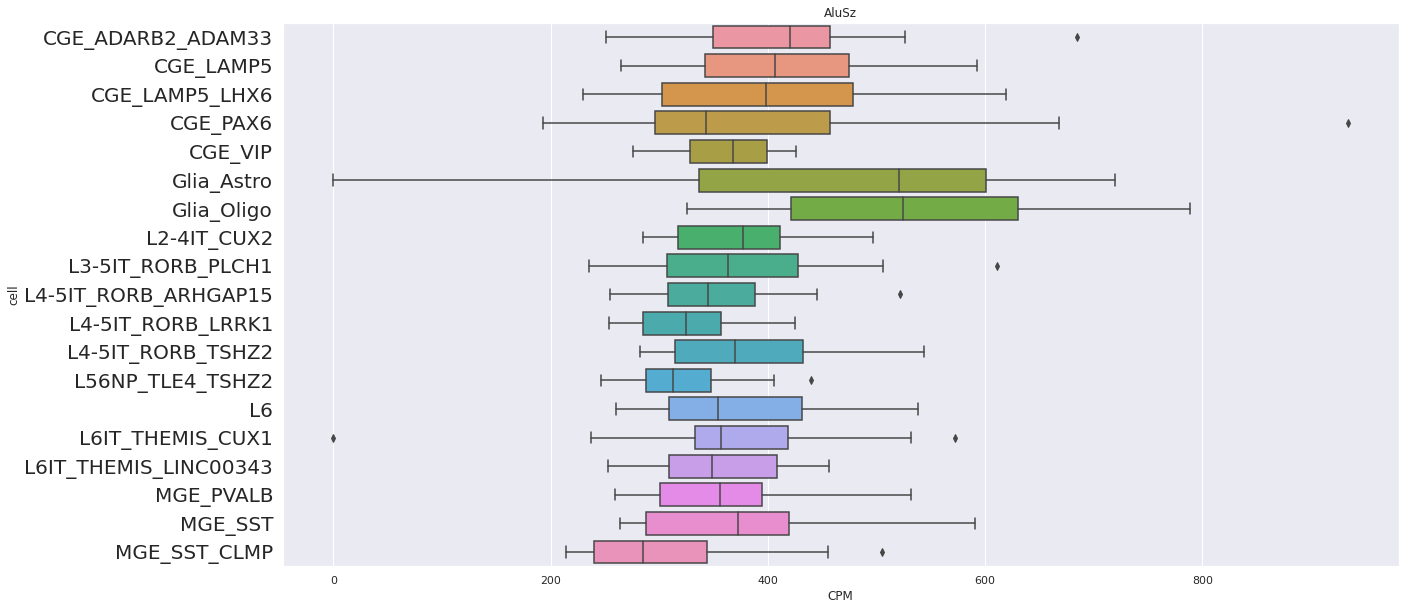

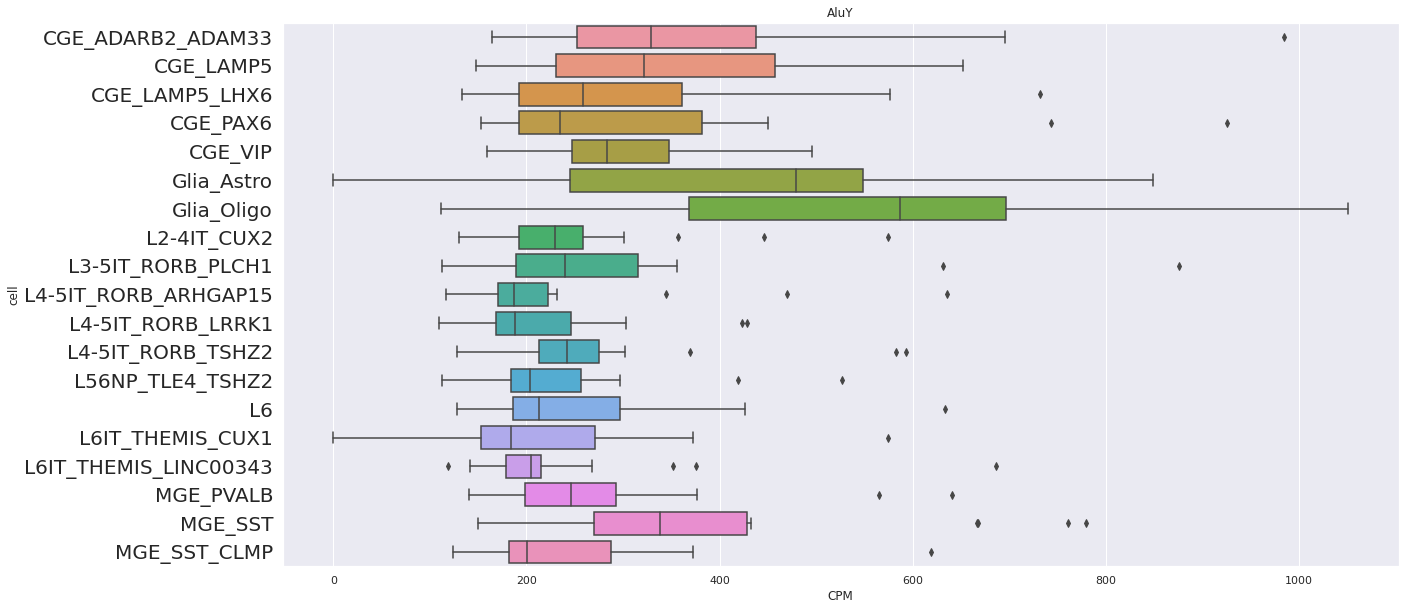

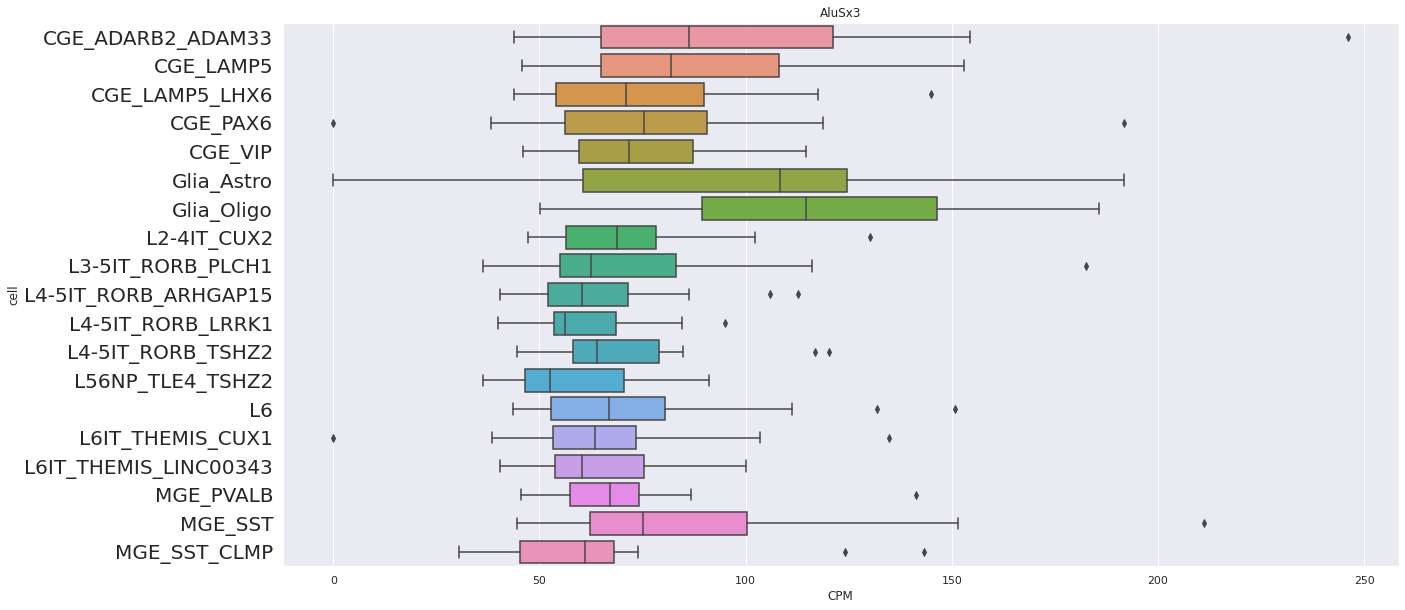

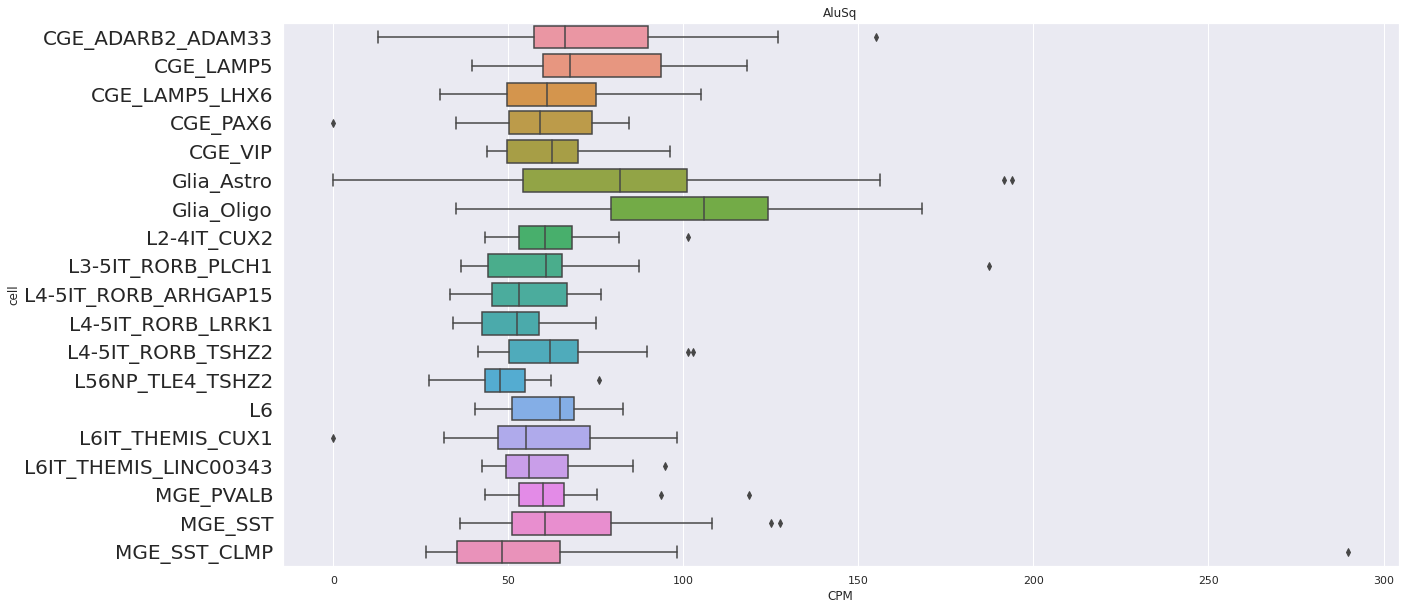

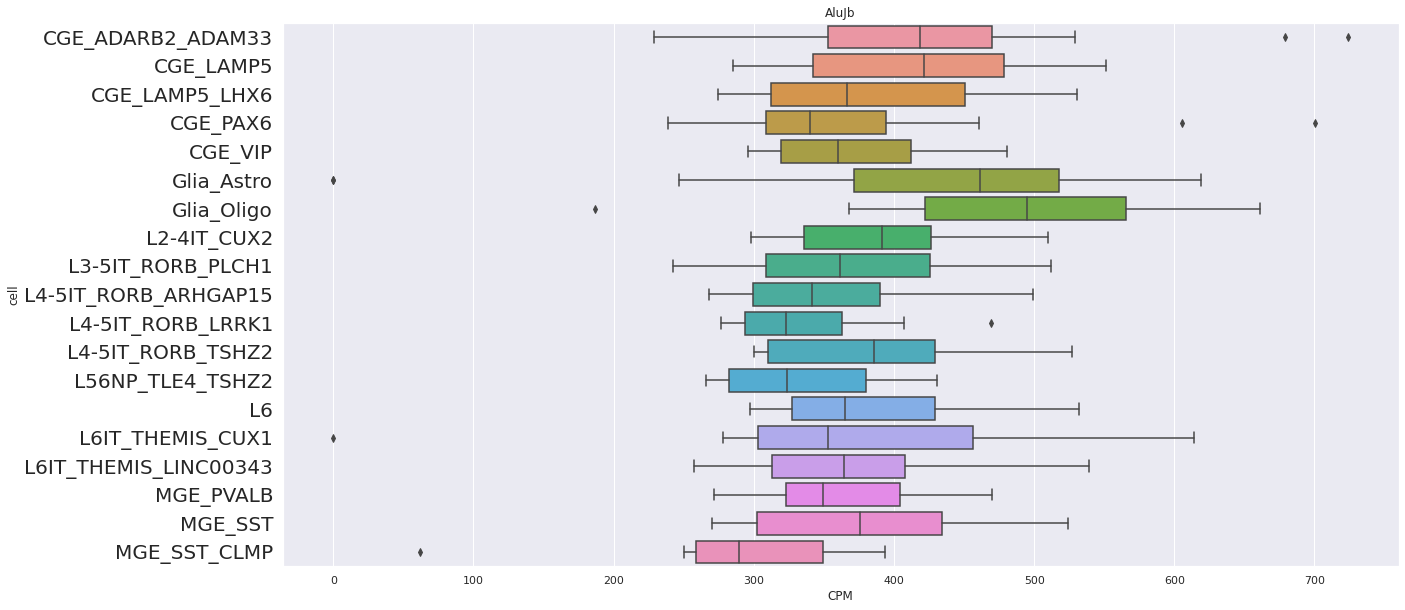

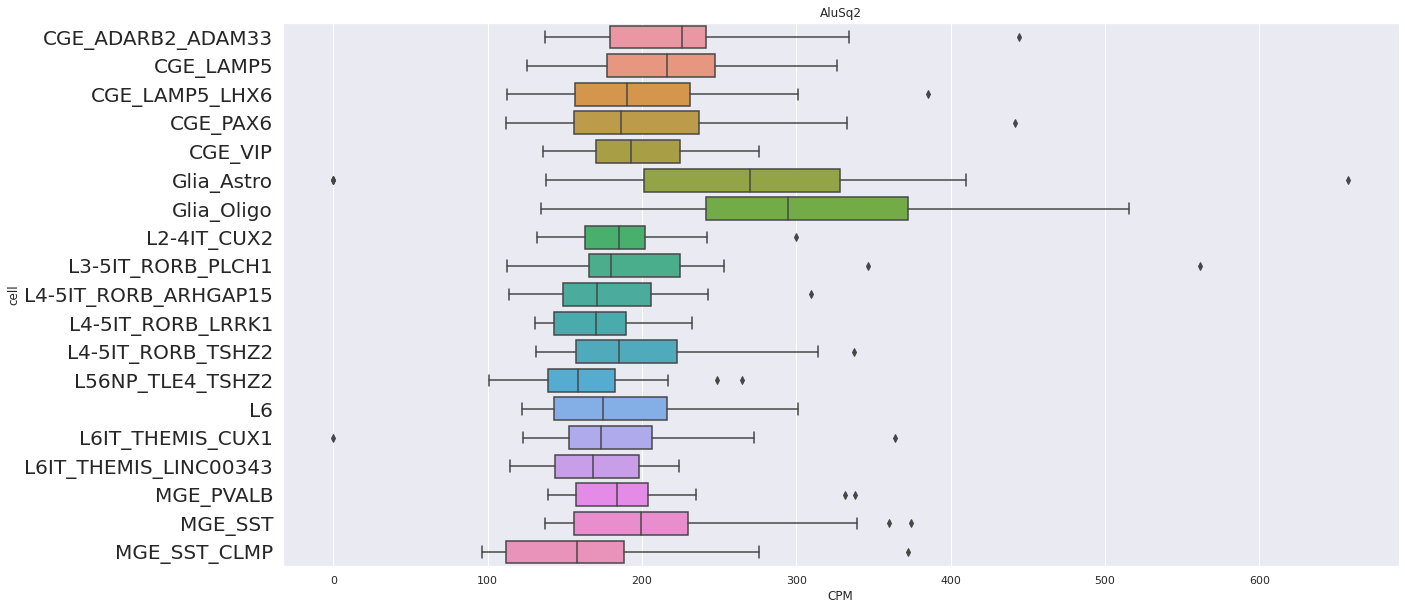

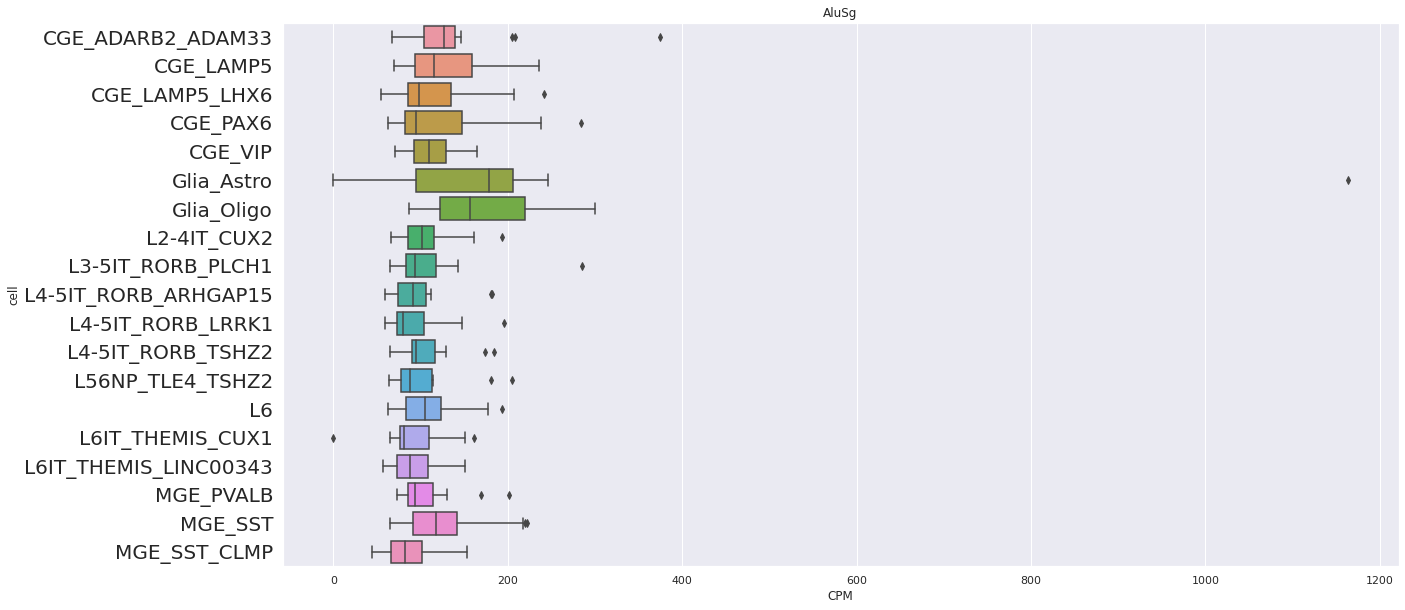

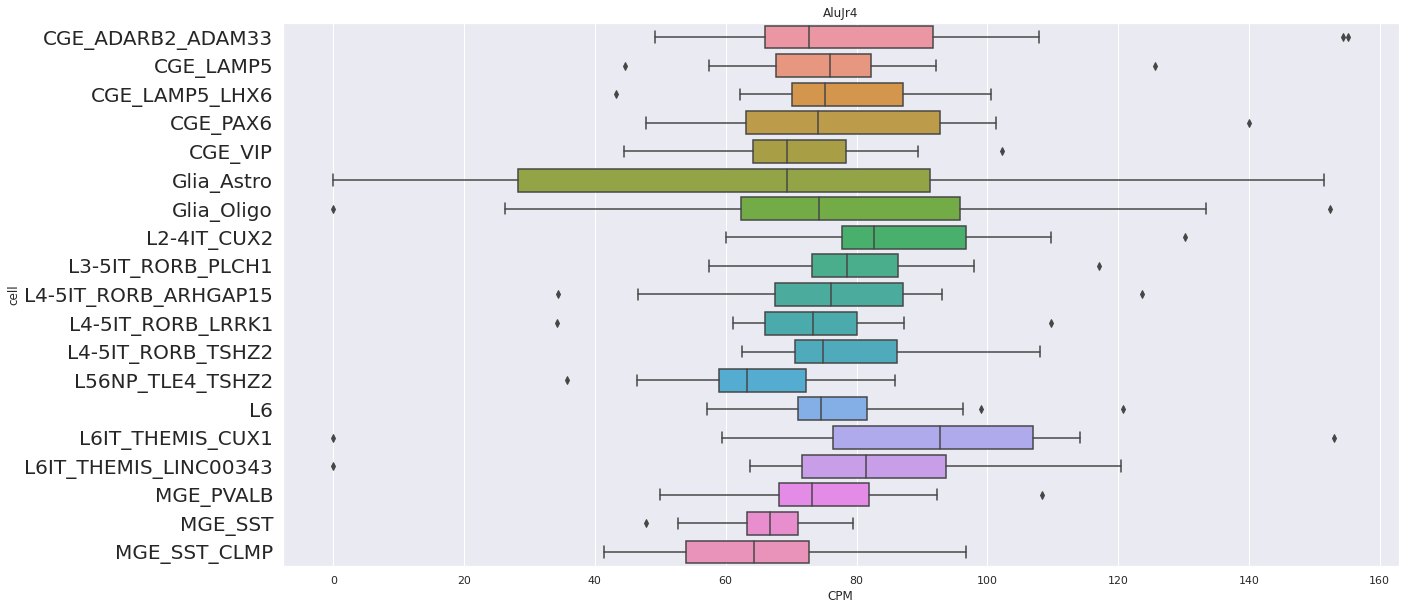

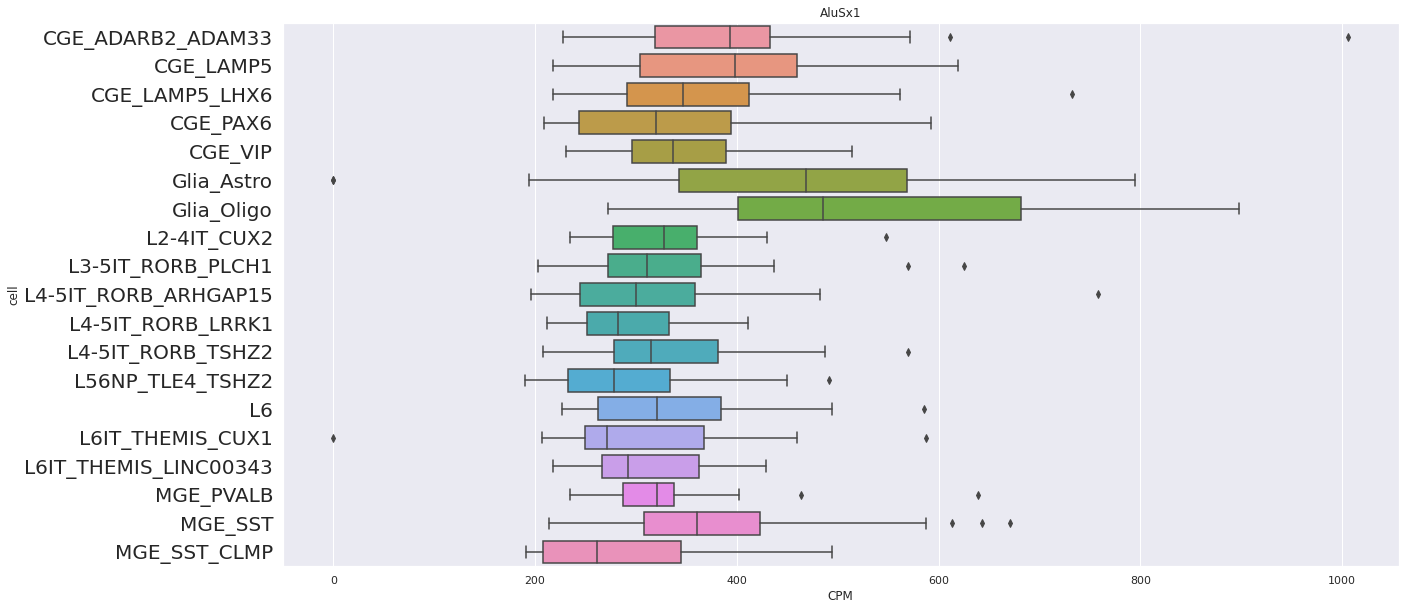

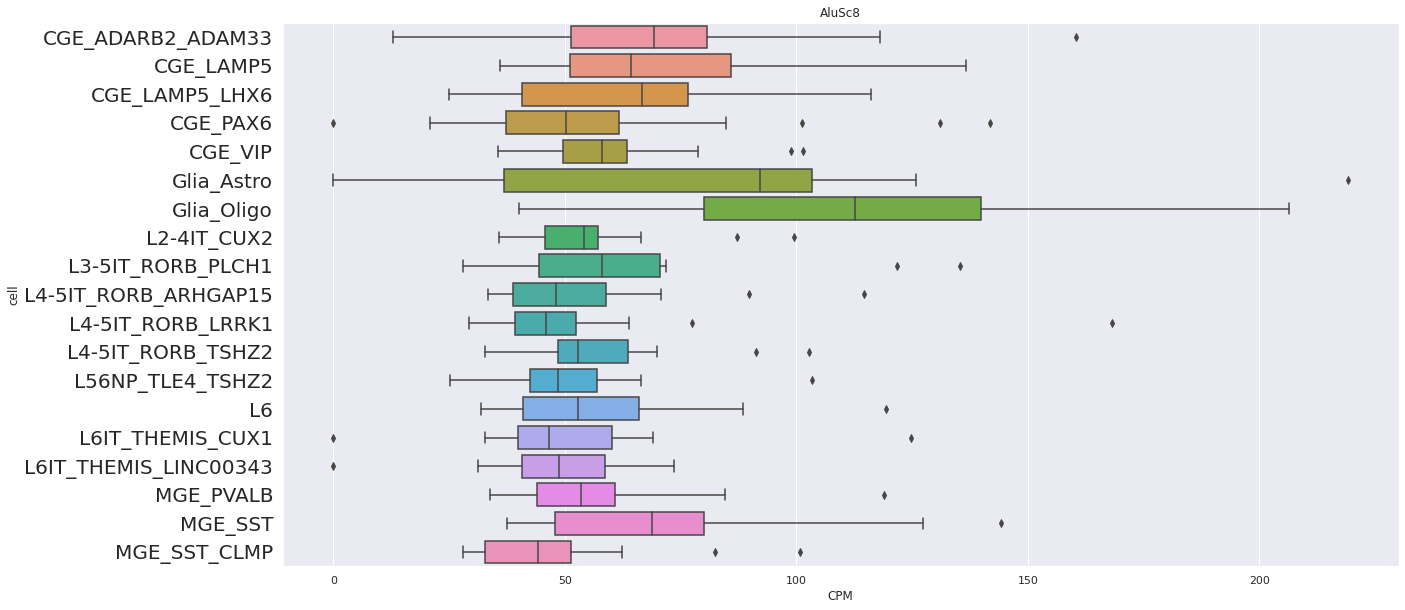

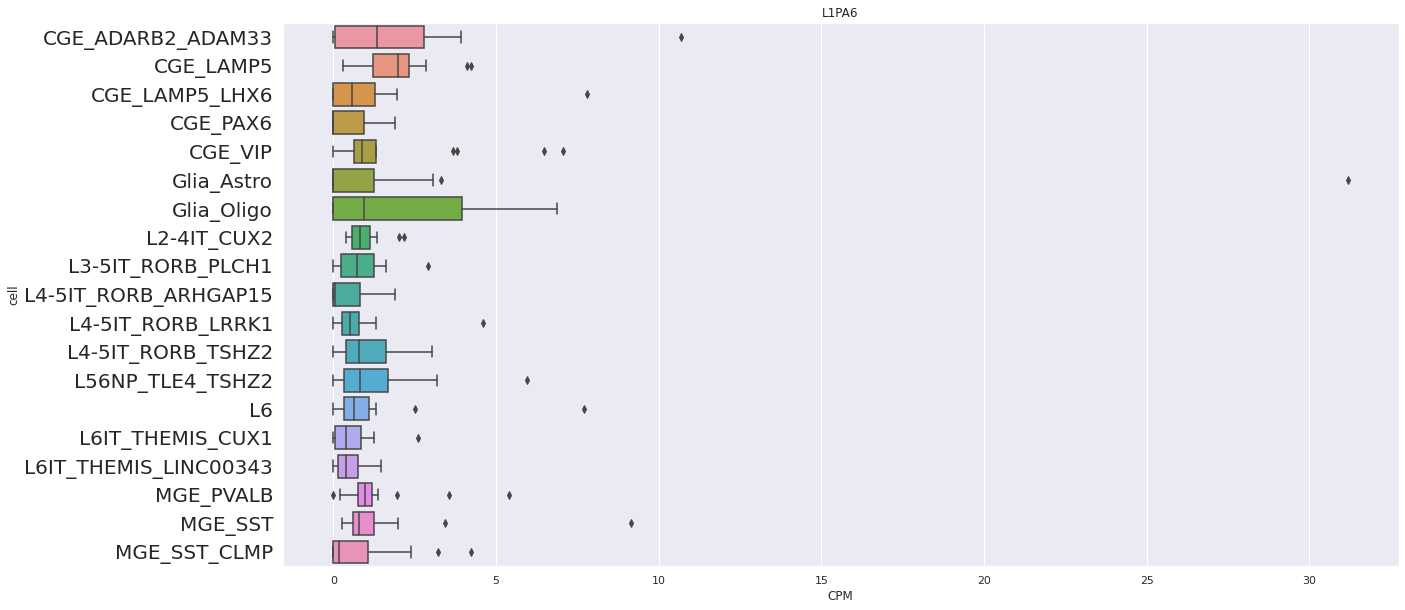

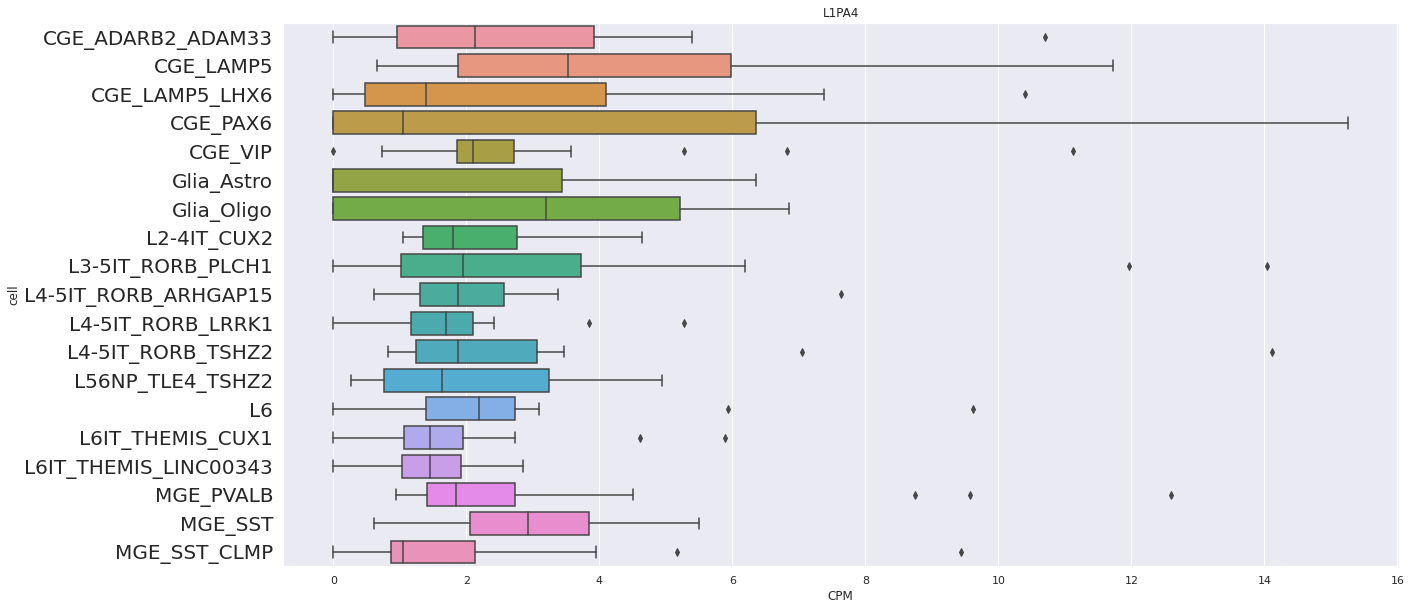

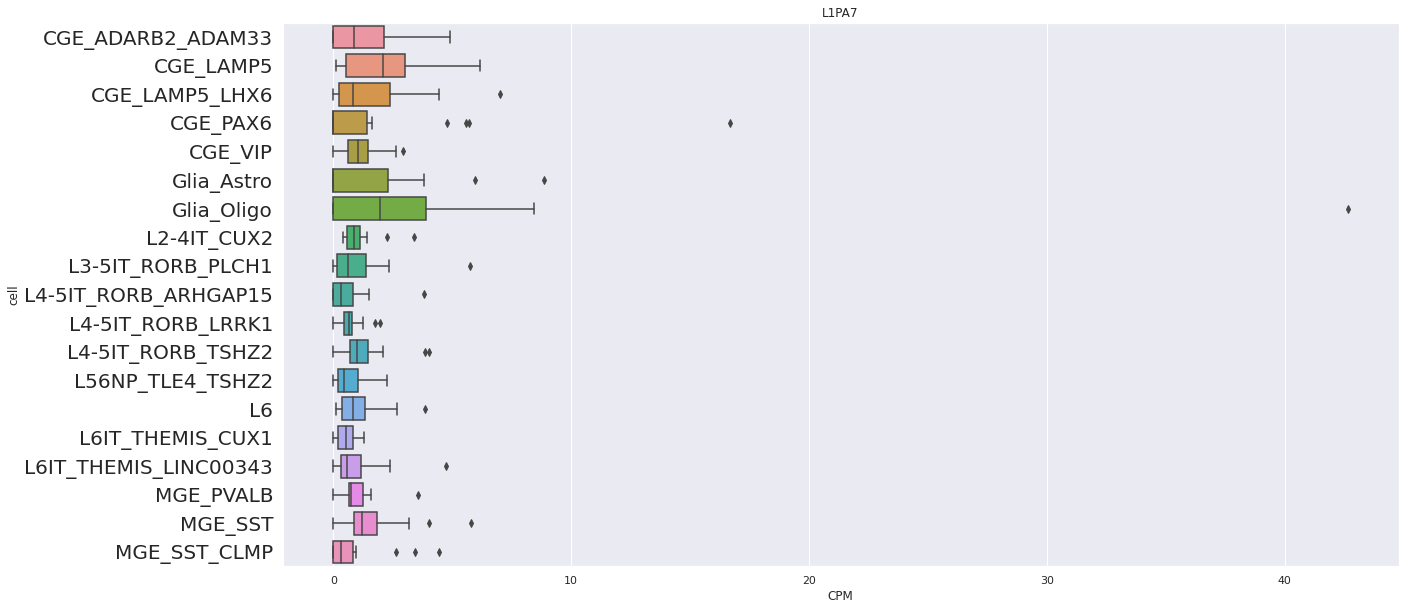

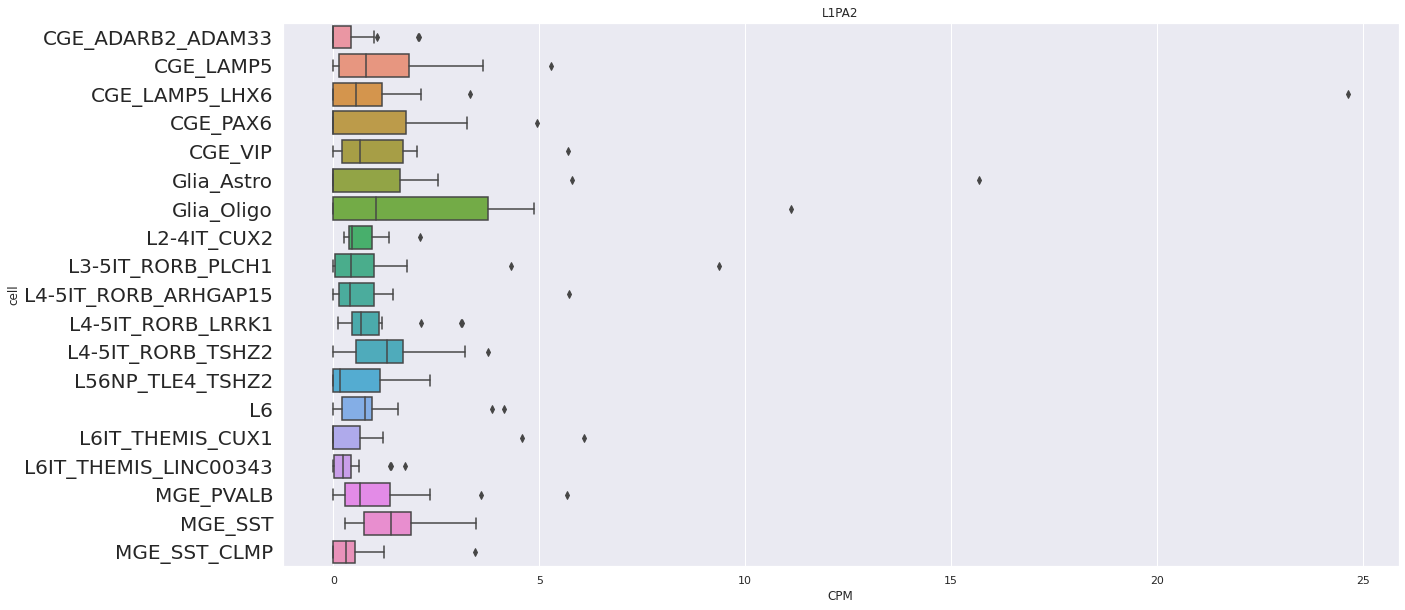

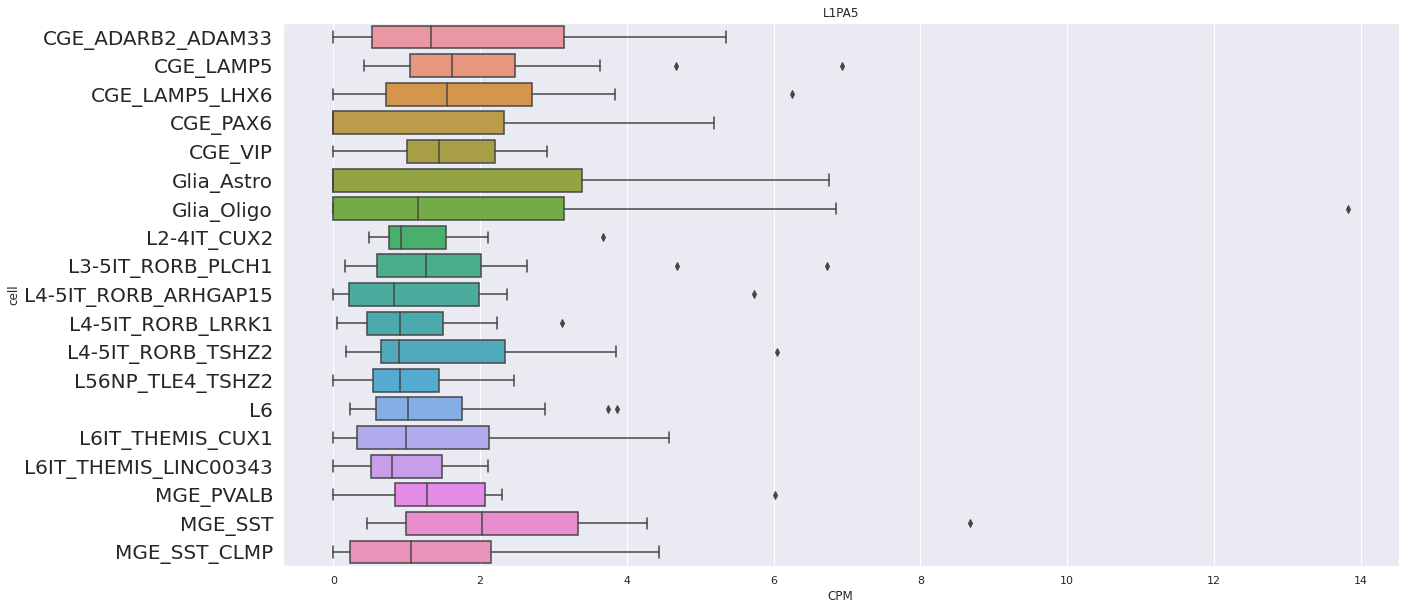

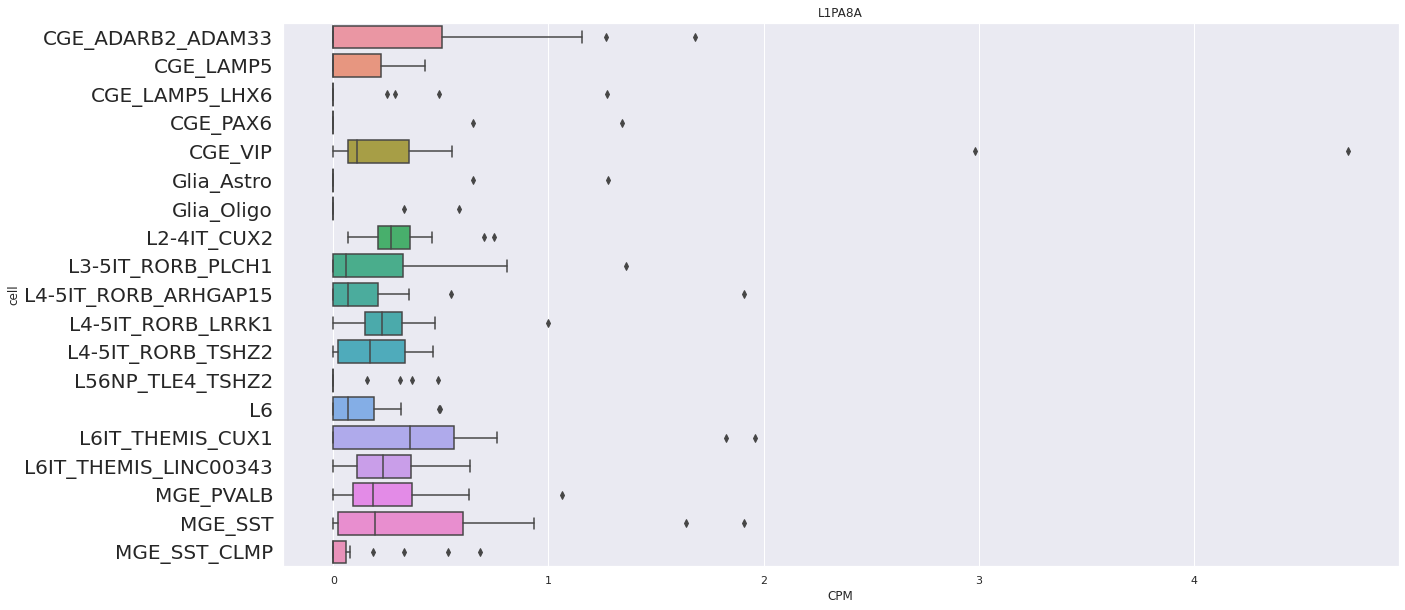

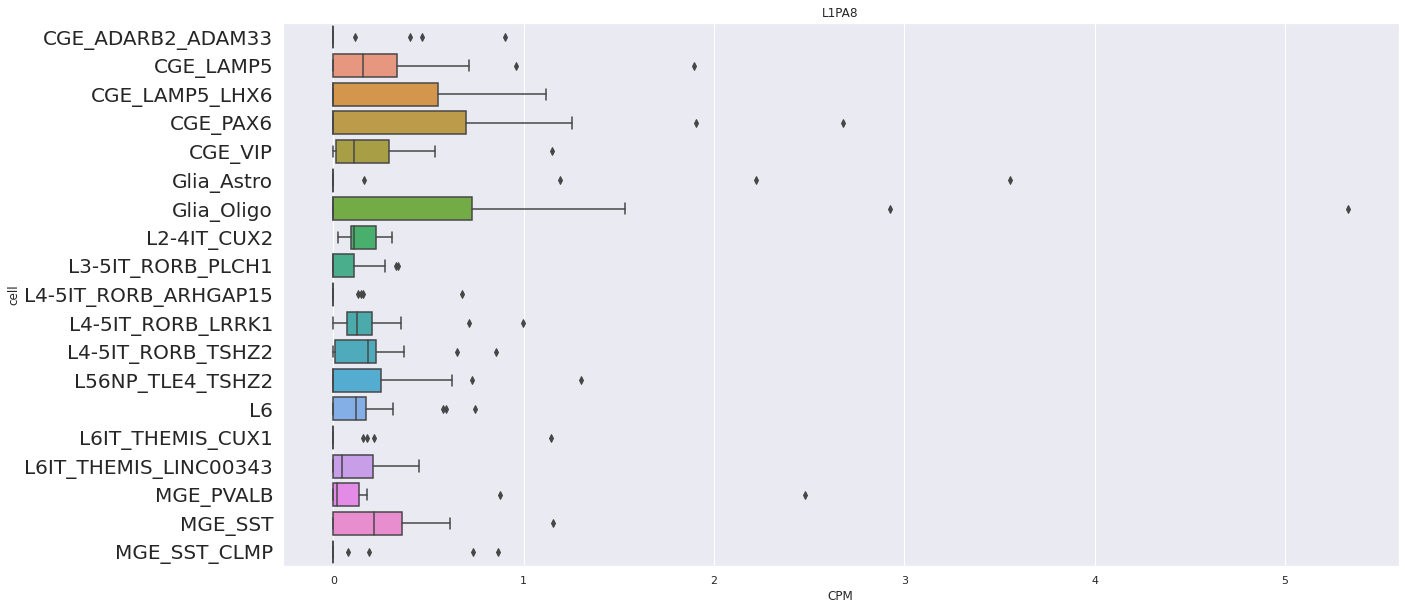

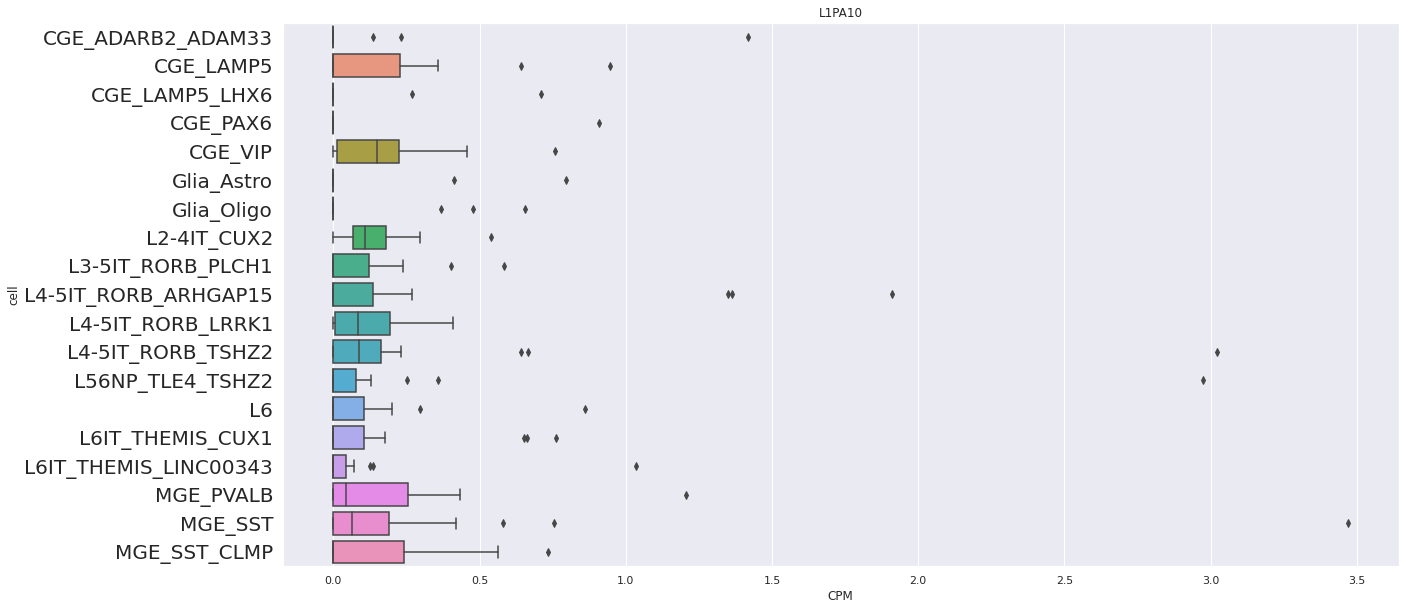

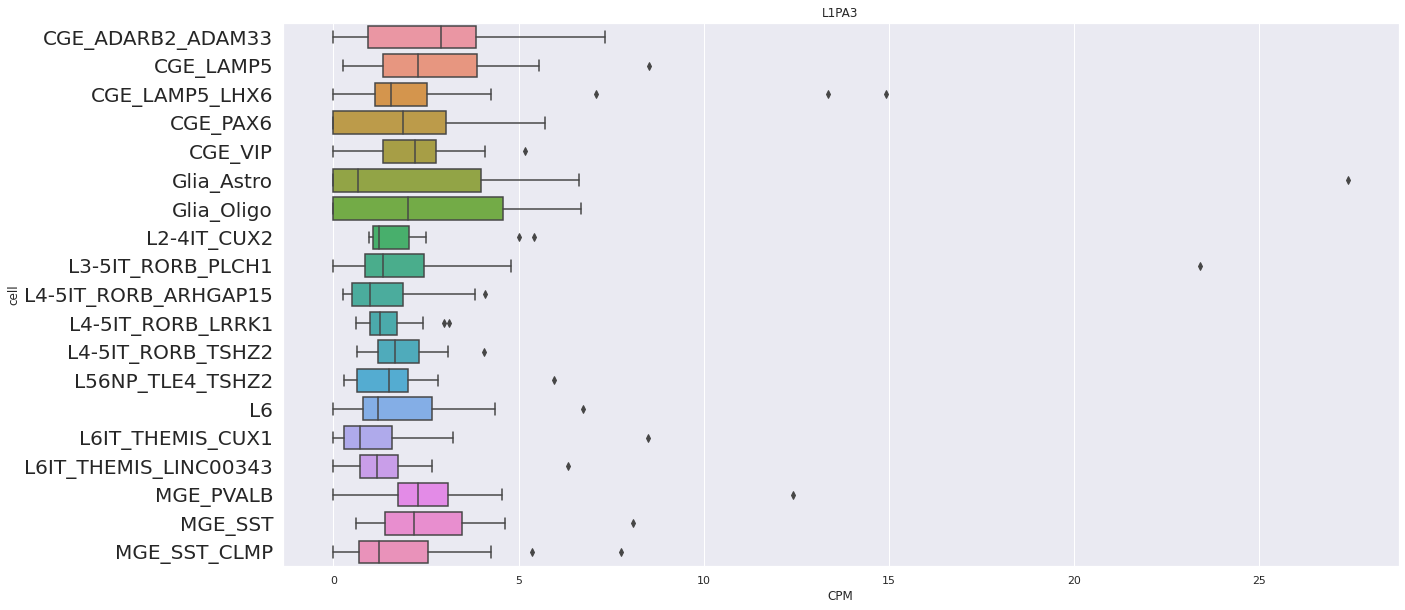

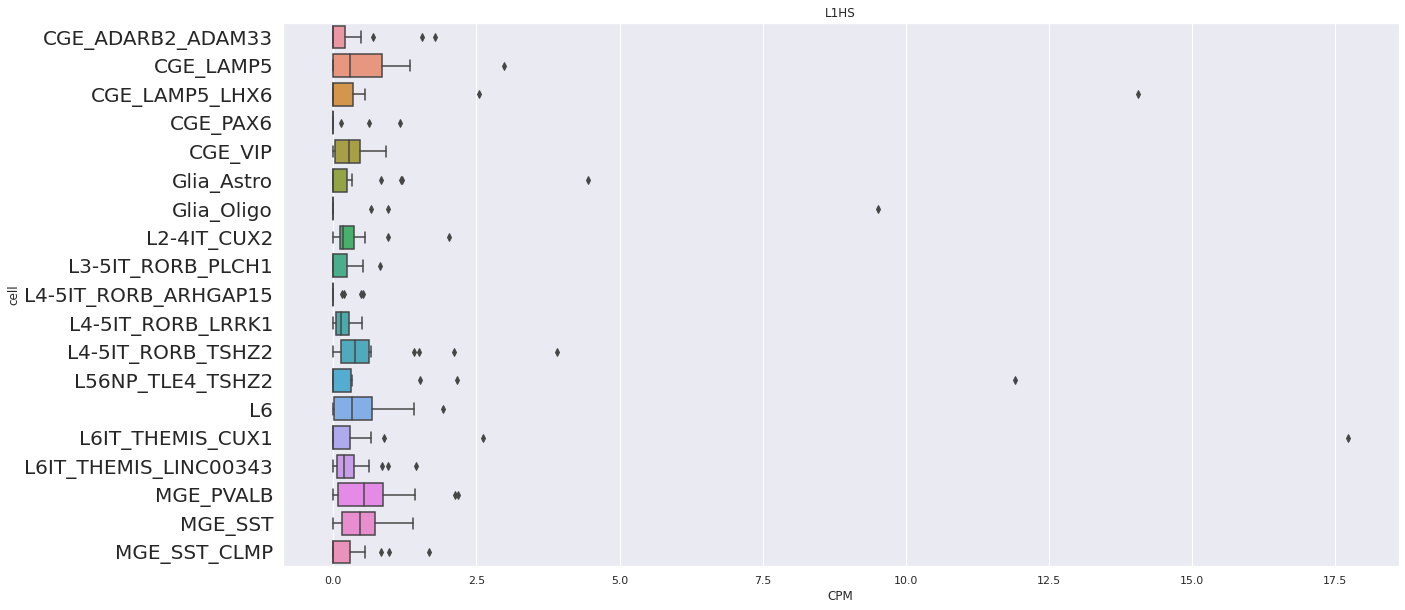

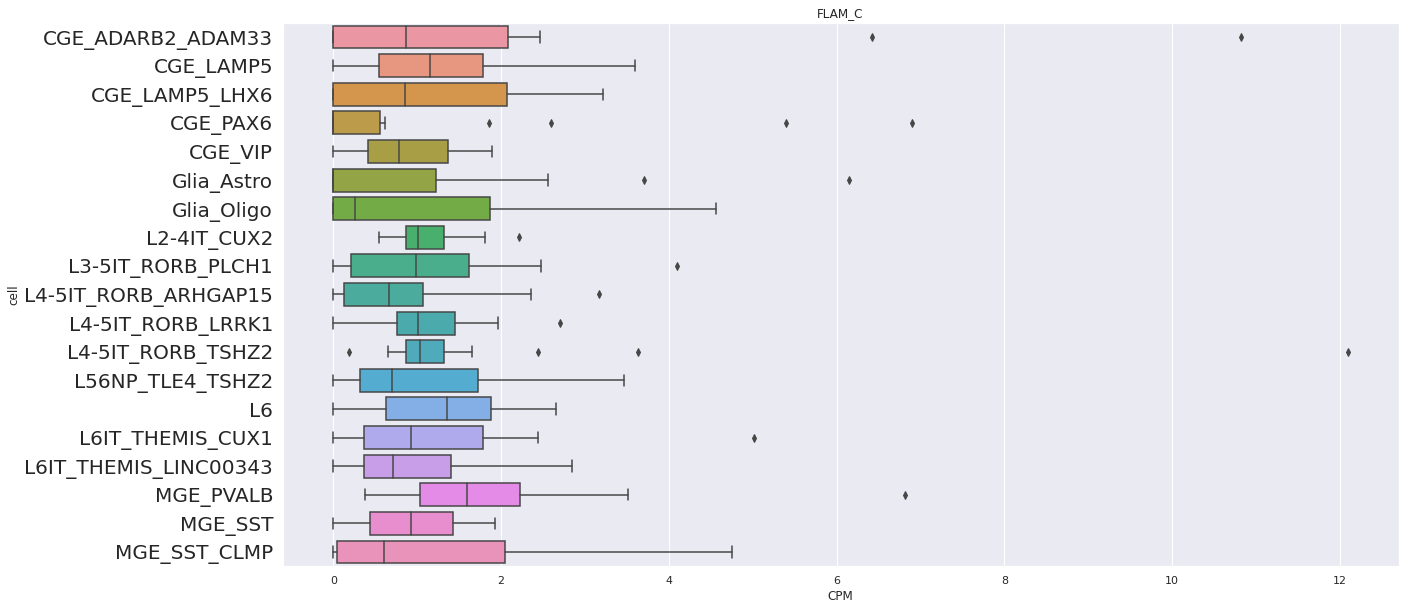

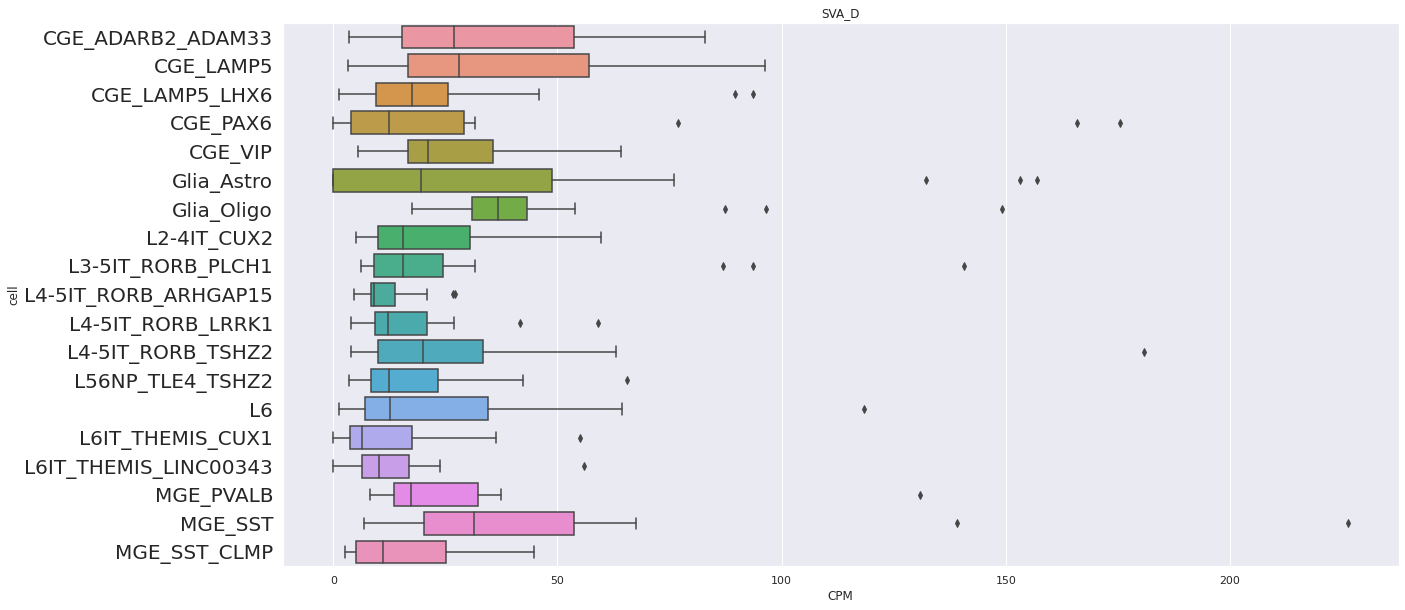

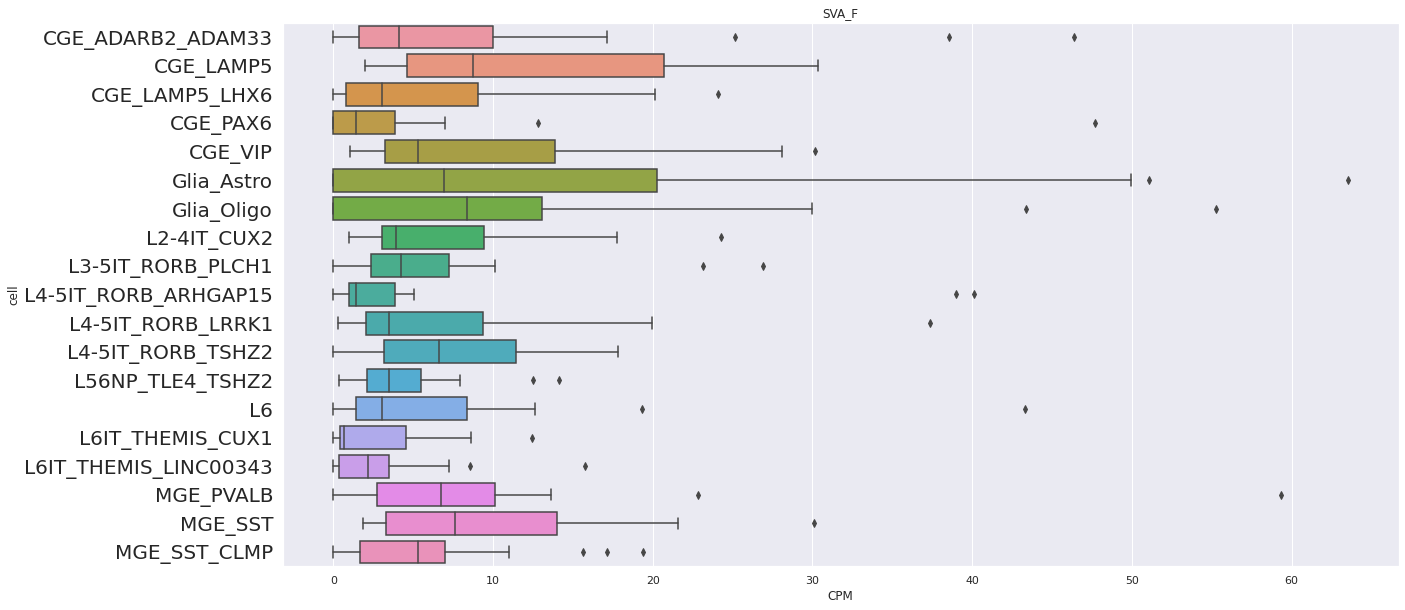

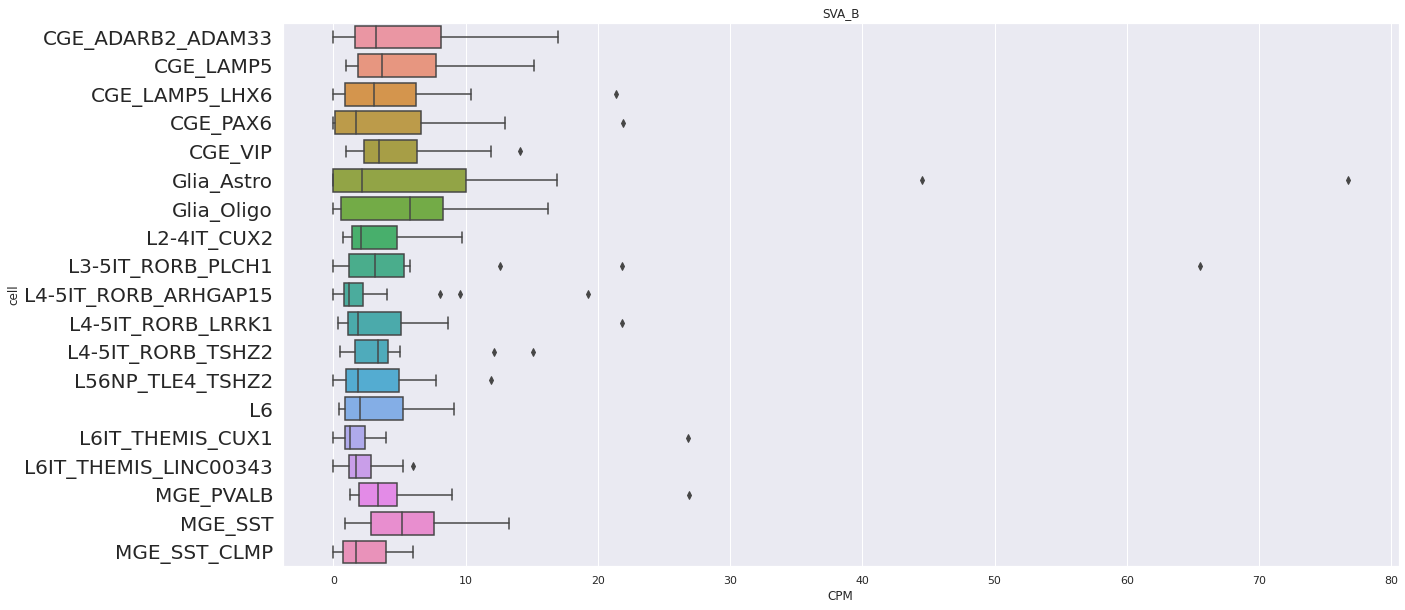

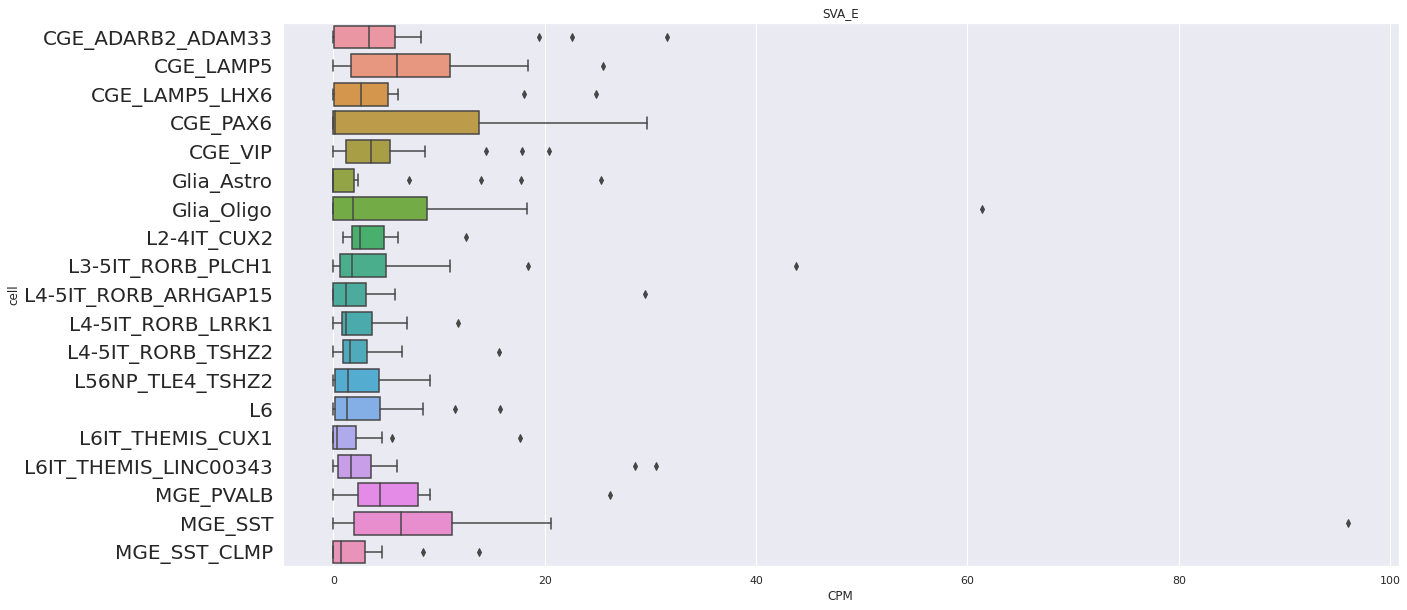

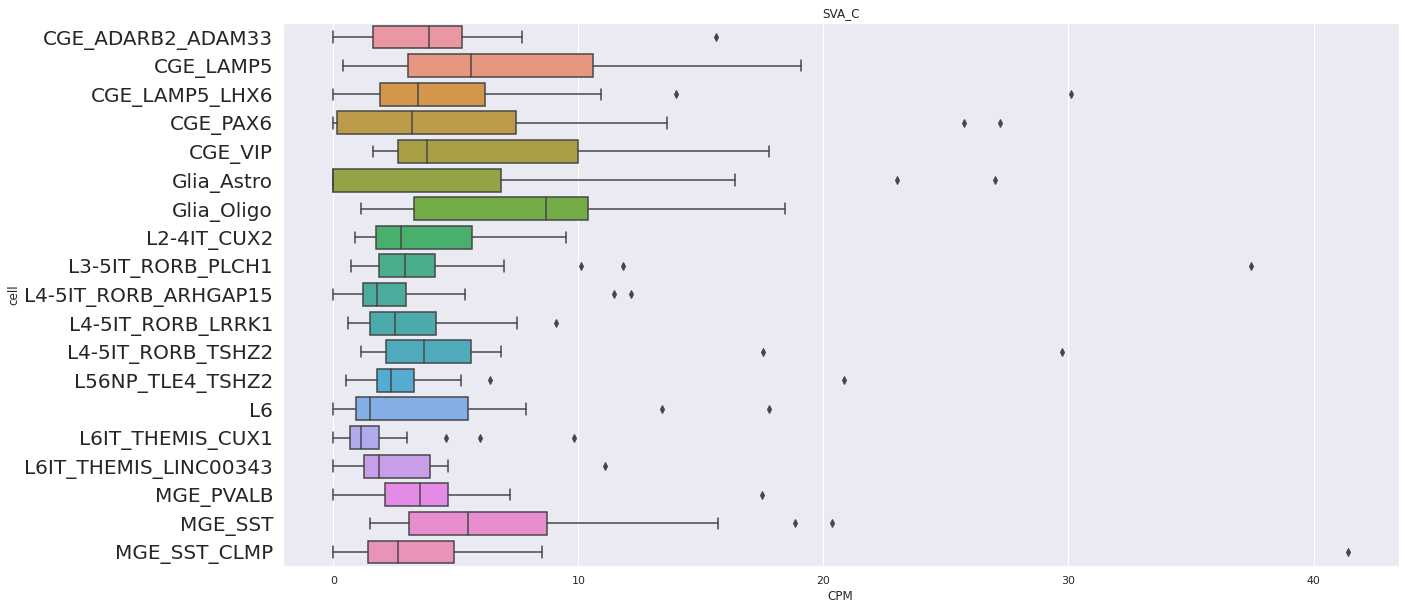

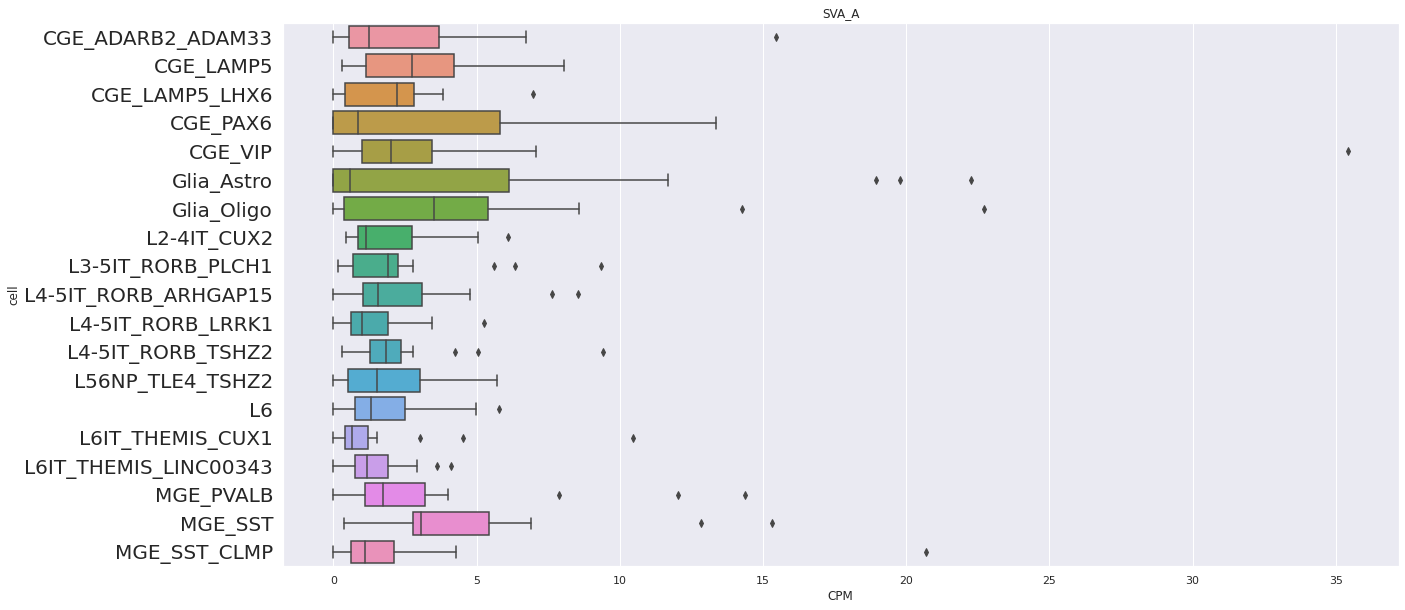

In [542]:
os.chdir('/cndd3/dburrows/DATA/te/rna/CZI.counts/ATEM/pseudobulk/')
te = sub_te
samp_l = dm['sequencing_id'].values

for t in te:
    
    dict = pd.DataFrame()
    all_counts = []
    all_names = []
    for cell in unq_cell:
        fill_v = []
        for s in samp_l:
            os.chdir(glob.glob('*' + s + '_*')[0])
            curr_cell = glob.glob(cell + '.*ATEM*')
            if len(curr_cell) == 0:
                fill_v = np.append(fill_v,0)
            else:
                count_mat = pd.read_csv(curr_cell[0], sep="\t", header=0) 
                count_sum = count_mat.groupby('gene_id').sum() #Sum counts for each element

                if t in count_sum.index:
                    fill_v = np.append(fill_v,count_sum.loc[t]['CPM'])

                else:
                    fill_v = np.append(fill_v,0)

            os.chdir('..')
        all_names = np.append(all_names,np.full(len(fill_v), cell))
        all_counts = np.append(all_counts, fill_v)

    dict['cell'] = all_names
    dict['CPM'] = all_counts

    fig,ax = plt.subplots(figsize=(20,10))
    sns.boxplot(data=dict, y = 'cell', x='CPM')
    plt.title(t)
    plt.yticks(fontsize=20)
    plt.show()